##### Copyright 2021 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Generate music with an RNN

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/audio/music_generation"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/audio/music_generation.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/audio/music_generation.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/audio/music_generation.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial shows you how to generate musical notes using a simple recurrent neural network (RNN). You will train a model using a collection of piano MIDI files from the [MAESTRO dataset](https://magenta.tensorflow.org/datasets/maestro). Given a sequence of notes, your model will learn to predict the next note in the sequence. You can generate longer sequences of notes by calling the model repeatedly.

This tutorial contains complete code to parse and create MIDI files. You can learn more about how RNNs work by visiting the [Text generation with an RNN](https://www.tensorflow.org/text/tutorials/text_generation) tutorial.

## Setup

This tutorial uses the [`pretty_midi`](https://github.com/craffel/pretty-midi) library to create and parse MIDI files, and [`pyfluidsynth`](https://github.com/nwhitehead/pyfluidsynth) for generating audio playback in Colab.

In [2]:
!sudo apt install -y fluidsynth

The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libparted-fs-resize0 libxmlb2
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  fluid-soundfont-gm libdouble-conversion3 libfluidsynth2 libinstpatch-1.0-2
  libpcre2-16-0 libqt5core5a libqt5dbus5 libqt5gui5 libqt5network5 libqt5svg5
  libqt5widgets5 libsdl2-2.0-0 qsynth qt5-gtk-platformtheme
  qttranslations5-l10n timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs timidity qt5-image-formats-plugins qtwayland5 jackd
  musescore


The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libdouble-conversion3 libfluidsynth2
  libinstpatch-1.0-2 libpcre2-16-0 libqt5core5a libqt5dbus5 libqt5gui5
  libqt5network5 libqt5svg5 libqt5widgets5 libsdl2-2.0-0 qsynth
  qt5-gtk-platformtheme qttranslations5-l10n timgm6mb-soundfont


0 upgraded, 17 newly installed, 0 to remove and 105 not upgraded.
Need to get 136 MB of archives.
After this operation, 202 MB of additional disk space will be used.


Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libdouble-conversion3 amd64 3.1.5-4ubuntu1 [37.9 kB]
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libpcre2-16-0 amd64 10.34-7ubuntu0.1 [181 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libqt5core5a amd64 5.12.8+dfsg-0ubuntu2.1 [2006 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libqt5dbus5 amd64 5.12.8+dfsg-0ubuntu2.1 [208 kB]
5% [4 libqt5dbus5 65.5 kB/208 kB 31%]

Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libqt5network5 amd64 5.12.8+dfsg-0ubuntu2.1 [673 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libqt5gui5 amd64 5.12.8+dfsg-0ubuntu2.1 [2971 kB]
8% [6 libqt5gui5 6632 B/2971 kB 0%]

Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libqt5widgets5 amd64 5.12.8+dfsg-0ubuntu2.1 [2295 kB]
11% [7 libqt5widgets5 13.8 kB/2295 kB 1%]

Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libqt5svg5 amd64 5.12.8-0ubuntu1 [131 kB]
14% [Waiting for headers]

Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 fluid-soundfont-gm all 3.1-5.1 [119 MB]
14% [9 fluid-soundfont-gm 2464 B/119 MB 0%]

17% [9 fluid-soundfont-gm 4376 kB/119 MB 4%]

30% [9 fluid-soundfont-gm 27.2 MB/119 MB 23%]

43% [9 fluid-soundfont-gm 49.0 MB/119 MB 41%]

56% [9 fluid-soundfont-gm 70.7 MB/119 MB 59%]

70% [9 fluid-soundfont-gm 93.9 MB/119 MB 79%]

82% [9 fluid-soundfont-gm 115 MB/119 MB 97%]

Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libinstpatch-1.0-2 amd64 1.1.2-2build1 [238 kB]
86% [10 libinstpatch-1.0-2 24.6 kB/238 kB 10%]

Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libsdl2-2.0-0 amd64 2.0.10+dfsg1-3 [407 kB]
89% [Waiting for headers]

Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 timgm6mb-soundfont all 1.3-3 [5420 kB]
89% [12 timgm6mb-soundfont 8041 B/5420 kB 0%]

Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libfluidsynth2 amd64 2.1.1-2 [198 kB]
94% [Waiting for headers]

Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 fluidsynth amd64 2.1.1-2 [25.6 kB]
95% [Waiting for headers]

Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 qsynth amd64 0.6.1-1build1 [245 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 qt5-gtk-platformtheme amd64 5.12.8+dfsg-0ubuntu2.1 [124 kB]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 qttranslations5-l10n all 5.12.8-0ubuntu1 [1486 kB]
98% [17 qttranslations5-l10n 13.7 kB/1486 kB 1%]

Fetched 136 MB in 4s (31.2 MB/s)



78

Selecting previously unselected package libdouble-conversion3:amd64.


(Reading database ... 143909 files and directories currently installed.)
Preparing to unpack .../00-libdouble-conversion3_3.1.5-4ubuntu1_amd64.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [  1%] [..........................................................] 8Unpacking libdouble-conversion3:amd64 (3.1.5-4ubuntu1) ...


7Progress: [  3%] [#.........................................................] 8Selecting previously unselected package libpcre2-16-0:amd64.


Preparing to unpack .../01-libpcre2-16-0_10.34-7ubuntu0.1_amd64.deb ...
7Progress: [  4%] [##........................................................] 8Unpacking libpcre2-16-0:amd64 (10.34-7ubuntu0.1) ...
7Progress: [  6%] [###.......................................................] 8

Selecting previously unselected package libqt5core5a:amd64.
Preparing to unpack .../02-libqt5core5a_5.12.8+dfsg-0ubuntu2.1_amd64.deb ...
7Progress: [  7%] [####......................................................] 8Unpacking libqt5core5a:amd64 (5.12.8+dfsg-0ubuntu2.1) ...


7Progress: [  9%] [#####.....................................................] 8Selecting previously unselected package libqt5dbus5:amd64.
Preparing to unpack .../03-libqt5dbus5_5.12.8+dfsg-0ubuntu2.1_amd64.deb ...
7Progress: [ 10%] [#####.....................................................] 8

Unpacking libqt5dbus5:amd64 (5.12.8+dfsg-0ubuntu2.1) ...
7Progress: [ 12%] [######....................................................] 8

Selecting previously unselected package libqt5network5:amd64.
Preparing to unpack .../04-libqt5network5_5.12.8+dfsg-0ubuntu2.1_amd64.deb ...
7Progress: [ 13%] [#######...................................................] 8Unpacking libqt5network5:amd64 (5.12.8+dfsg-0ubuntu2.1) ...


7Progress: [ 14%] [########..................................................] 8

Selecting previously unselected package libqt5gui5:amd64.
Preparing to unpack .../05-libqt5gui5_5.12.8+dfsg-0ubuntu2.1_amd64.deb ...
7Progress: [ 16%] [#########.................................................] 8

Unpacking libqt5gui5:amd64 (5.12.8+dfsg-0ubuntu2.1) ...


7Progress: [ 17%] [##########................................................] 8Selecting previously unselected package libqt5widgets5:amd64.


Preparing to unpack .../06-libqt5widgets5_5.12.8+dfsg-0ubuntu2.1_amd64.deb ...
7Progress: [ 19%] [##########................................................] 8Unpacking libqt5widgets5:amd64 (5.12.8+dfsg-0ubuntu2.1) ...


7Progress: [ 20%] [###########...............................................] 8Selecting previously unselected package libqt5svg5:amd64.


Preparing to unpack .../07-libqt5svg5_5.12.8-0ubuntu1_amd64.deb ...
7Progress: [ 22%] [############..............................................] 8Unpacking libqt5svg5:amd64 (5.12.8-0ubuntu1) ...
7Progress: [ 23%] [#############.............................................] 8

Selecting previously unselected package fluid-soundfont-gm.
Preparing to unpack .../08-fluid-soundfont-gm_3.1-5.1_all.deb ...
7Progress: [ 25%] [##############............................................] 8Unpacking fluid-soundfont-gm (3.1-5.1) ...


7Progress: [ 26%] [###############...........................................] 8

Selecting previously unselected package libinstpatch-1.0-2:amd64.
Preparing to unpack .../09-libinstpatch-1.0-2_1.1.2-2build1_amd64.deb ...
7Progress: [ 28%] [###############...........................................] 8Unpacking libinstpatch-1.0-2:amd64 (1.1.2-2build1) ...


7Progress: [ 29%] [################..........................................] 8Selecting previously unselected package libsdl2-2.0-0:amd64.
Preparing to unpack .../10-libsdl2-2.0-0_2.0.10+dfsg1-3_amd64.deb ...


7Progress: [ 30%] [#################.........................................] 8Unpacking libsdl2-2.0-0:amd64 (2.0.10+dfsg1-3) ...


7Progress: [ 32%] [##################........................................] 8Selecting previously unselected package timgm6mb-soundfont.
Preparing to unpack .../11-timgm6mb-soundfont_1.3-3_all.deb ...
7Progress: [ 33%] [###################.......................................] 8Unpacking timgm6mb-soundfont (1.3-3) ...


7Progress: [ 35%] [####################......................................] 8

Selecting previously unselected package libfluidsynth2:amd64.
Preparing to unpack .../12-libfluidsynth2_2.1.1-2_amd64.deb ...
7Progress: [ 36%] [#####################.....................................] 8Unpacking libfluidsynth2:amd64 (2.1.1-2) ...


7Progress: [ 38%] [#####################.....................................] 8Selecting previously unselected package fluidsynth.
Preparing to unpack .../13-fluidsynth_2.1.1-2_amd64.deb ...
7Progress: [ 39%] [######################....................................] 8Unpacking fluidsynth (2.1.1-2) ...


7Progress: [ 41%] [#######################...................................] 8Selecting previously unselected package qsynth.
Preparing to unpack .../14-qsynth_0.6.1-1build1_amd64.deb ...
7Progress: [ 42%] [########################..................................] 8

Unpacking qsynth (0.6.1-1build1) ...


7Progress: [ 43%] [#########################.................................] 8Selecting previously unselected package qt5-gtk-platformtheme:amd64.
Preparing to unpack .../15-qt5-gtk-platformtheme_5.12.8+dfsg-0ubuntu2.1_amd64.deb ...
7Progress: [ 45%] [##########################................................] 8Unpacking qt5-gtk-platformtheme:amd64 (5.12.8+dfsg-0ubuntu2.1) ...


7Progress: [ 46%] [##########################................................] 8Selecting previously unselected package qttranslations5-l10n.
Preparing to unpack .../16-qttranslations5-l10n_5.12.8-0ubuntu1_all.deb ...
7Progress: [ 48%] [###########################...............................] 8Unpacking qttranslations5-l10n (5.12.8-0ubuntu1) ...


7Progress: [ 49%] [############################..............................] 8

Setting up libdouble-conversion3:amd64 (3.1.5-4ubuntu1) ...
7Progress: [ 51%] [#############################.............................] 87Progress: [ 52%] [##############################............................] 8Setting up libpcre2-16-0:amd64 (10.34-7ubuntu0.1) ...
7Progress: [ 54%] [###############################...........................] 87Progress: [ 55%] [###############################...........................] 8Setting up qttranslations5-l10n (5.12.8-0ubuntu1) ...
7Progress: [ 57%] [################################..........................] 87Progress: [ 58%] [#################################.........................] 8Setting up libqt5core5a:amd64 (5.12.8+dfsg-0ubuntu2.1) ...
7Progress: [ 59%] [##################################........................] 8

7Progress: [ 61%] [###################################.......................] 8Setting up libqt5dbus5:amd64 (5.12.8+dfsg-0ubuntu2.1) ...
7Progress: [ 62%] [####################################......................] 87Progress: [ 64%] [####################################......................] 8Setting up fluid-soundfont-gm (3.1-5.1) ...
7Progress: [ 65%] [#####################################.....................] 87Progress: [ 67%] [######################################....................] 8Setting up libsdl2-2.0-0:amd64 (2.0.10+dfsg1-3) ...
7Progress: [ 68%] [#######################################...................] 87Progress: [ 70%] [########################################..................] 8Setting up timgm6mb-soundfont (1.3-3) ...
7Progress: [ 71%] [#########################################.................] 8

update-alternatives: using /usr/share/sounds/sf2/TimGM6mb.sf2 to provide /usr/share/sounds/sf2/default-GM.sf2 (default-GM.sf2) in auto mode


update-alternatives: using /usr/share/sounds/sf2/TimGM6mb.sf2 to provide /usr/share/sounds/sf3/default-GM.sf3 (default-GM.sf3) in auto mode
7Progress: [ 72%] [##########################################................] 8Setting up libinstpatch-1.0-2:amd64 (1.1.2-2build1) ...
7Progress: [ 74%] [##########################################................] 87Progress: [ 75%] [###########################################...............] 8Setting up libqt5network5:amd64 (5.12.8+dfsg-0ubuntu2.1) ...
7Progress: [ 77%] [############################################..............] 87Progress: [ 78%] [#############################################.............] 8Setting up libfluidsynth2:amd64 (2.1.1-2) ...
7Progress: [ 80%] [##############################################............] 87Progress: [ 81%] [###############################################...........] 8Setting up libqt5gui5:amd64 (5.12.8+dfsg-0ubuntu2.1) ...
7Progress: [ 83%] [##############################################

7Progress: [ 86%] [#################################################.........] 87Progress: [ 87%] [##################################################........] 8Setting up qt5-gtk-platformtheme:amd64 (5.12.8+dfsg-0ubuntu2.1) ...
7Progress: [ 88%] [###################################################.......] 87Progress: [ 90%] [####################################################......] 8Setting up fluidsynth (2.1.1-2) ...
7Progress: [ 91%] [####################################################......] 8

Created symlink /etc/systemd/user/multi-user.target.wants/fluidsynth.service → /usr/lib/systemd/user/fluidsynth.service.
7Progress: [ 93%] [#####################################################.....] 8

Setting up libqt5svg5:amd64 (5.12.8-0ubuntu1) ...
7Progress: [ 94%] [######################################################....] 87Progress: [ 96%] [#######################################################...] 8Setting up qsynth (0.6.1-1build1) ...
7Progress: [ 97%] [########################################################..] 87Progress: [ 99%] [#########################################################.] 8Processing triggers for desktop-file-utils (0.24-1ubuntu3) ...
Processing triggers for mime-support (3.64ubuntu1) ...
Processing triggers for hicolor-icon-theme (0.17-2) ...


Processing triggers for gnome-menus (3.36.0-1ubuntu1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...


Processing triggers for man-db (2.9.1-1) ...



78

In [3]:
!pip install --upgrade pyfluidsynth

In [4]:
!pip install pretty_midi

  Preparing metadata (setup.py) ... -

 done


  Obtaining dependency information for mido>=1.1.16 from https://files.pythonhosted.org/packages/b0/0e/b551e09391220208764c00ed2b382e198414329d8b6037eeb54a8008d737/mido-1.3.0-py3-none-any.whl.metadata


 \

 |

 done
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592289 sha256=e65c897ae8d4512f9aa28bdffa1bc5e124173ef747e43787993efd309ce1e80f
  Stored in directory: /home/kbuilder/.cache/pip/wheels/75/ec/20/b8e937a5bcf1de547ea5ce465db7de7f6761e15e6f0a01e25f


Successfully built pretty_midi


In [5]:
import collections
import datetime
import fluidsynth
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf

from IPython import display
from matplotlib import pyplot as plt
from typing import Optional

In [6]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Sampling rate for audio playback
_SAMPLING_RATE = 16000

## Download the Maestro dataset

In [7]:
data_dir = pathlib.Path('data/maestro-v2.0.0')
if not data_dir.exists():
  tf.keras.utils.get_file(
      'maestro-v2.0.0-midi.zip',
      origin='https://storage.googleapis.com/magentadata/datasets/maestro/v2.0.0/maestro-v2.0.0-midi.zip',
      extract=True,
      cache_dir='.', cache_subdir='data',
  )

    8192/59243107 [..............................] - ETA: 0s

 4202496/59243107 [=>............................] - ETA: 1s

 8396800/59243107 [===>..........................] - ETA: 3s

16785408/59243107 [=======>......................] - ETA: 1s

31244288/59243107 [==============>...............] - ETA: 0s

43302912/59243107 [====================>.........] - ETA: 0s

50339840/59243107 [========================>.....] - ETA: 0s

59243107/59243107 [==============================] - 1s 0us/step


The dataset contains about 1,200 MIDI files.

In [8]:
filenames = glob.glob(str(data_dir/'**/*.mid*'))
print('Number of files:', len(filenames))

Number of files: 1282


## Process a MIDI file

First, use ```pretty_midi``` to parse a single MIDI file and inspect the format of the notes. If you would like to download the MIDI file below to play on your computer, you can do so in colab by writing ```files.download(sample_file)```.


In [9]:
sample_file = filenames[1]
print(sample_file)

data/maestro-v2.0.0/2018/MIDI-Unprocessed_Chamber6_MID--AUDIO_20_R3_2018_wav--1.midi


Generate a `PrettyMIDI` object for the sample MIDI file.

In [10]:
pm = pretty_midi.PrettyMIDI(sample_file)

Play the sample file. The playback widget may take several seconds to load.

In [11]:
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

In [12]:
display_audio(pm)

fluidsynth: warning: SDL2 not initialized, SDL2 audio driver won't be usable
fluidsynth: error: Unknown integer parameter 'synth.sample-rate'


Do some inspection on the MIDI file. What kinds of instruments are used?

In [13]:
print('Number of instruments:', len(pm.instruments))
instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
print('Instrument name:', instrument_name)

Number of instruments: 1
Instrument name: Acoustic Grand Piano


## Extract notes

In [14]:
for i, note in enumerate(instrument.notes[:10]):
  note_name = pretty_midi.note_number_to_name(note.pitch)
  duration = note.end - note.start
  print(f'{i}: pitch={note.pitch}, note_name={note_name},'
        f' duration={duration:.4f}')

0: pitch=60, note_name=C4, duration=0.4414
1: pitch=72, note_name=C5, duration=0.6914
2: pitch=65, note_name=F4, duration=0.7852
3: pitch=74, note_name=D5, duration=0.2161
4: pitch=57, note_name=A3, duration=1.0456
5: pitch=72, note_name=C5, duration=0.9154
6: pitch=67, note_name=G4, duration=1.1081
7: pitch=60, note_name=C4, duration=1.2565
8: pitch=52, note_name=E3, duration=1.2448
9: pitch=70, note_name=A#4, duration=0.9076


You will use three variables to represent a note when training the model: `pitch`, `step` and `duration`. The pitch is the perceptual quality of the sound as a MIDI note number. 
The `step` is the time elapsed from the previous note or start of the track.
The `duration` is how long the note will be playing in seconds and is the difference between the note end and note start times. 


Extract the notes from the sample MIDI file.

In [15]:
def midi_to_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

In [16]:
raw_notes = midi_to_notes(sample_file)
raw_notes.head()

pitch     start       end      step  duration
0     72  1.049479  1.740885  0.000000  0.691406
1     57  1.110677  2.156250  0.061198  1.045573
2     60  1.118490  1.559896  0.007812  0.441406
3     65  1.132812  1.917969  0.014323  0.785156
4     74  1.765625  1.981771  0.632812  0.216146

It may be easier to interpret the note names rather than the pitches, so you can use the function below to convert from the numeric pitch values to note names. 
The note name shows the type of note, accidental and octave number
(e.g. C#4). 

In [17]:
get_note_names = np.vectorize(pretty_midi.note_number_to_name)
sample_note_names = get_note_names(raw_notes['pitch'])
sample_note_names[:10]

array(['C5', 'A3', 'C4', 'F4', 'D5', 'C5', 'G4', 'C4', 'E3', 'A#4'],
      dtype='<U3')

To visualize the musical piece, plot the note pitch, start and end across the length of the track (i.e. piano roll). Start with the first 100 notes

In [18]:
def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)

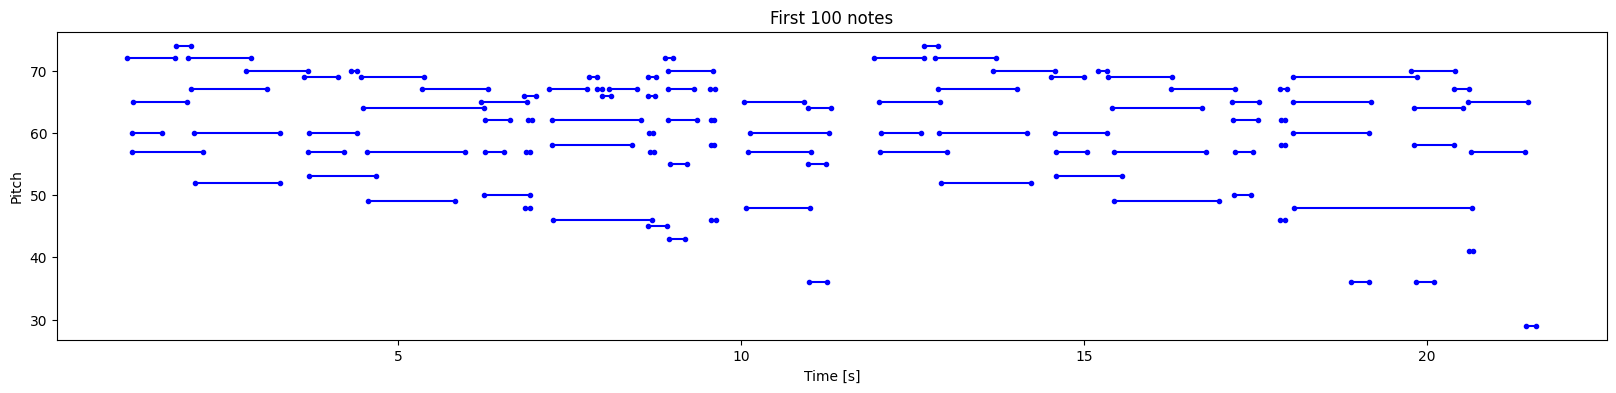

In [19]:
plot_piano_roll(raw_notes, count=100)

Plot the notes for the entire track.

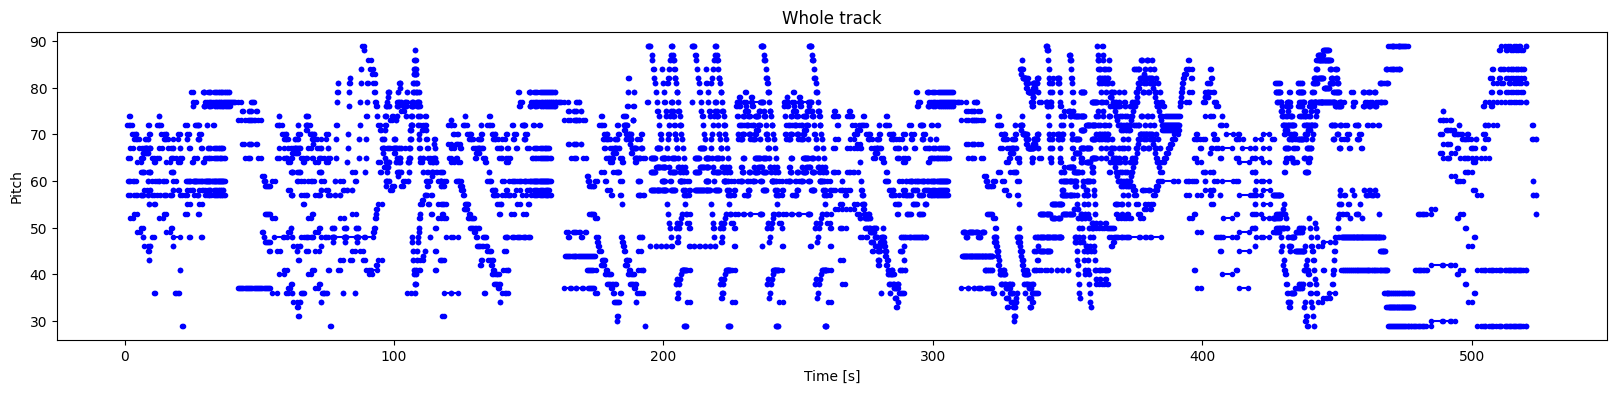

In [20]:
plot_piano_roll(raw_notes)

Check the distribution of each note variable.

In [21]:
def plot_distributions(notes: pd.DataFrame, drop_percentile=2.5):
  plt.figure(figsize=[15, 5])
  plt.subplot(1, 3, 1)
  sns.histplot(notes, x="pitch", bins=20)

  plt.subplot(1, 3, 2)
  max_step = np.percentile(notes['step'], 100 - drop_percentile)
  sns.histplot(notes, x="step", bins=np.linspace(0, max_step, 21))
  
  plt.subplot(1, 3, 3)
  max_duration = np.percentile(notes['duration'], 100 - drop_percentile)
  sns.histplot(notes, x="duration", bins=np.linspace(0, max_duration, 21))

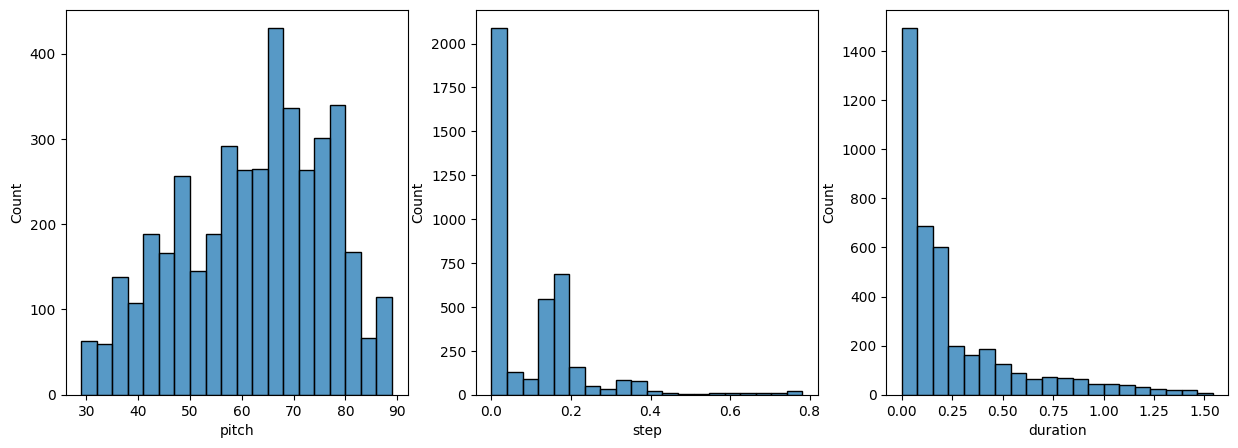

In [22]:
plot_distributions(raw_notes)

## Create a MIDI file

You can generate your own MIDI file from a list of notes using the function below.

In [23]:
def notes_to_midi(
  notes: pd.DataFrame,
  out_file: str, 
  instrument_name: str,
  velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(prev_start + note['step'])
    end = float(start + note['duration'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = start

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm

In [24]:
example_file = 'example.midi'
example_pm = notes_to_midi(
    raw_notes, out_file=example_file, instrument_name=instrument_name)

Play the generated MIDI file and see if there is any difference.

In [25]:
display_audio(example_pm)

fluidsynth: warning: SDL2 not initialized, SDL2 audio driver won't be usable
fluidsynth: error: Unknown integer parameter 'synth.sample-rate'


As before, you can write ```files.download(example_file)``` to download and play this file.

## Create the training dataset


Create the training dataset by extracting notes from the MIDI files. You can start by using a small number of files, and experiment later with more. This may take a couple minutes.

In [26]:
num_files = 5
all_notes = []
for f in filenames[:num_files]:
  notes = midi_to_notes(f)
  all_notes.append(notes)

all_notes = pd.concat(all_notes)

In [27]:
n_notes = len(all_notes)
print('Number of notes parsed:', n_notes)

Number of notes parsed: 42788


Next, create a `tf.data.Dataset` from the parsed notes.

In [28]:
key_order = ['pitch', 'step', 'duration']
train_notes = np.stack([all_notes[key] for key in key_order], axis=1)

In [29]:
notes_ds = tf.data.Dataset.from_tensor_slices(train_notes)
notes_ds.element_spec

TensorSpec(shape=(3,), dtype=tf.float64, name=None)

You will train the model on batches of sequences of notes. Each example will consist of a sequence of notes as the input features, and the next note as the label. In this way, the model will be trained to predict the next note in a sequence. You can find a diagram describing this process (and more details) in [Text classification with an RNN](https://www.tensorflow.org/text/tutorials/text_generation).

You can use the handy [window](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#window) function with size `seq_length` to create the features and labels in this format.

In [30]:
def create_sequences(
    dataset: tf.data.Dataset, 
    seq_length: int,
    vocab_size = 128,
) -> tf.data.Dataset:
  """Returns TF Dataset of sequence and label examples."""
  seq_length = seq_length+1

  # Take 1 extra for the labels
  windows = dataset.window(seq_length, shift=1, stride=1,
                              drop_remainder=True)

  # `flat_map` flattens the" dataset of datasets" into a dataset of tensors
  flatten = lambda x: x.batch(seq_length, drop_remainder=True)
  sequences = windows.flat_map(flatten)
  
  # Normalize note pitch
  def scale_pitch(x):
    x = x/[vocab_size,1.0,1.0]
    return x

  # Split the labels
  def split_labels(sequences):
    inputs = sequences[:-1]
    labels_dense = sequences[-1]
    labels = {key:labels_dense[i] for i,key in enumerate(key_order)}

    return scale_pitch(inputs), labels

  return sequences.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)

Set the sequence length for each example. Experiment with different lengths (e.g. 50, 100, 150) to see which one works best for the data, or use [hyperparameter tuning](https://www.tensorflow.org/tutorials/keras/keras_tuner). The size of the vocabulary (`vocab_size`) is set to 128 representing all the pitches supported by `pretty_midi`.

In [31]:
seq_length = 25
vocab_size = 128
seq_ds = create_sequences(notes_ds, seq_length, vocab_size)
seq_ds.element_spec

(TensorSpec(shape=(25, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})

The shape of the dataset is ```(100,1)```, meaning that the model will take 100 notes as input, and learn to predict the following note as output.

In [32]:
for seq, target in seq_ds.take(1):
  print('sequence shape:', seq.shape)
  print('sequence elements (first 10):', seq[0: 10])
  print()
  print('target:', target)

sequence shape: (25, 3)
sequence elements (first 10): tf.Tensor(
[[0.296875   0.         0.05989583]
 [0.578125   0.0078125  0.18229167]
 [0.2890625  0.203125   0.07161458]
 [0.5703125  0.00260417 0.08723958]
 [0.5546875  0.0546875  0.08854167]
 [0.2734375  0.01432292 0.0859375 ]
 [0.2578125  0.04166667 0.05729167]
 [0.5390625  0.01692708 0.03515625]
 [0.6171875  0.15234375 0.05859375]
 [0.3359375  0.01953125 0.03776042]], shape=(10, 3), dtype=float64)

target: {'pitch': <tf.Tensor: shape=(), dtype=float64, numpy=50.0>, 'step': <tf.Tensor: shape=(), dtype=float64, numpy=0.140625>, 'duration': <tf.Tensor: shape=(), dtype=float64, numpy=0.03255208333333304>}


Batch the examples, and configure the dataset for performance.

In [33]:
batch_size = 64
buffer_size = n_notes - seq_length  # the number of items in the dataset
train_ds = (seq_ds
            .shuffle(buffer_size)
            .batch(batch_size, drop_remainder=True)
            .cache()
            .prefetch(tf.data.experimental.AUTOTUNE))

In [34]:
train_ds.element_spec

(TensorSpec(shape=(64, 25, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(64,), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(64,), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(64,), dtype=tf.float64, name=None)})

## Create and train the model

The model will have three outputs, one for each note variable. For `step` and `duration`, you will use a custom loss function based on mean squared error that encourages the model to output non-negative values.

In [35]:
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
  mse = (y_true - y_pred) ** 2
  positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
  return tf.reduce_mean(mse + positive_pressure)

In [36]:
input_shape = (seq_length, 3)
learning_rate = 0.005

inputs = tf.keras.Input(input_shape)
x = tf.keras.layers.LSTM(128)(inputs)

outputs = {
  'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1, name='duration')(x),
}

model = tf.keras.Model(inputs, outputs)

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
}

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss, optimizer=optimizer)

model.summary()

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 25, 3)]              0         []                            


 lstm (LSTM)                 (None, 128)                  67584     ['input_1[0][0]']             


 duration (Dense)            (None, 1)                    129       ['lstm[0][0]']                


 pitch (Dense)               (None, 128)                  16512     ['lstm[0][0]']                


 step (Dense)                (None, 1)                    129       ['lstm[0][0]']                


Total params: 84354 (329.51 KB)


Trainable params: 84354 (329.51 KB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


Testing the `model.evaluate` function, you can see that the `pitch` loss is significantly greater than the `step` and `duration` losses. 
Note that `loss` is the total loss computed by summing all the other losses and is currently dominated by the `pitch` loss.

In [37]:
losses = model.evaluate(train_ds, return_dict=True)
losses

      1/Unknown - 5s 5s/step - loss: 5.7701 - duration_loss: 0.8499 - pitch_loss: 4.8571 - step_loss: 0.0632

     17/Unknown - 5s 3ms/step - loss: 5.9134 - duration_loss: 0.9657 - pitch_loss: 4.8516 - step_loss: 0.0961

     34/Unknown - 5s 3ms/step - loss: 5.9408 - duration_loss: 1.0086 - pitch_loss: 4.8522 - step_loss: 0.0800

     51/Unknown - 5s 3ms/step - loss: 5.9304 - duration_loss: 1.0072 - pitch_loss: 4.8519 - step_loss: 0.0712

     68/Unknown - 5s 3ms/step - loss: 6.1136 - duration_loss: 1.0279 - pitch_loss: 4.8520 - step_loss: 0.2338

     86/Unknown - 5s 3ms/step - loss: 6.0613 - duration_loss: 1.0132 - pitch_loss: 4.8520 - step_loss: 0.1961

    103/Unknown - 5s 3ms/step - loss: 6.0286 - duration_loss: 1.0052 - pitch_loss: 4.8523 - step_loss: 0.1711

    121/Unknown - 5s 3ms/step - loss: 6.0232 - duration_loss: 1.0148 - pitch_loss: 4.8524 - step_loss: 0.1561

    139/Unknown - 5s 3ms/step - loss: 6.0455 - duration_loss: 1.0461 - pitch_loss: 4.8523 - step_loss: 0.1472

    157/Unknown - 5s 3ms/step - loss: 6.0322 - duration_loss: 1.0400 - pitch_loss: 4.8526 - step_loss: 0.1397

    175/Unknown - 5s 3ms/step - loss: 6.0344 - duration_loss: 1.0418 - pitch_loss: 4.8528 - step_loss: 0.1398

    193/Unknown - 5s 3ms/step - loss: 6.0172 - duration_loss: 1.0330 - pitch_loss: 4.8527 - step_loss: 0.1314

    211/Unknown - 6s 3ms/step - loss: 6.0076 - duration_loss: 1.0286 - pitch_loss: 4.8527 - step_loss: 0.1263

    229/Unknown - 6s 3ms/step - loss: 5.9936 - duration_loss: 1.0209 - pitch_loss: 4.8526 - step_loss: 0.1202

    247/Unknown - 6s 3ms/step - loss: 5.9873 - duration_loss: 1.0187 - pitch_loss: 4.8527 - step_loss: 0.1159

    265/Unknown - 6s 3ms/step - loss: 6.0022 - duration_loss: 1.0161 - pitch_loss: 4.8525 - step_loss: 0.1336

    282/Unknown - 6s 3ms/step - loss: 5.9994 - duration_loss: 1.0147 - pitch_loss: 4.8525 - step_loss: 0.1321

    300/Unknown - 6s 3ms/step - loss: 5.9924 - duration_loss: 1.0122 - pitch_loss: 4.8525 - step_loss: 0.1278

    318/Unknown - 6s 3ms/step - loss: 5.9860 - duration_loss: 1.0102 - pitch_loss: 4.8523 - step_loss: 0.1235

    336/Unknown - 6s 3ms/step - loss: 5.9981 - duration_loss: 1.0167 - pitch_loss: 4.8523 - step_loss: 0.1291

    354/Unknown - 6s 3ms/step - loss: 5.9886 - duration_loss: 1.0096 - pitch_loss: 4.8523 - step_loss: 0.1266

    372/Unknown - 6s 3ms/step - loss: 5.9870 - duration_loss: 1.0082 - pitch_loss: 4.8525 - step_loss: 0.1263

    391/Unknown - 6s 3ms/step - loss: 5.9854 - duration_loss: 1.0083 - pitch_loss: 4.8525 - step_loss: 0.1245

    409/Unknown - 6s 3ms/step - loss: 5.9808 - duration_loss: 1.0065 - pitch_loss: 4.8525 - step_loss: 0.1218

    428/Unknown - 6s 3ms/step - loss: 5.9777 - duration_loss: 1.0064 - pitch_loss: 4.8525 - step_loss: 0.1188

    447/Unknown - 6s 3ms/step - loss: 5.9772 - duration_loss: 1.0058 - pitch_loss: 4.8524 - step_loss: 0.1190

    465/Unknown - 6s 3ms/step - loss: 5.9750 - duration_loss: 1.0055 - pitch_loss: 4.8524 - step_loss: 0.1171

    484/Unknown - 6s 3ms/step - loss: 5.9713 - duration_loss: 1.0034 - pitch_loss: 4.8524 - step_loss: 0.1154

    503/Unknown - 6s 3ms/step - loss: 5.9709 - duration_loss: 1.0050 - pitch_loss: 4.8524 - step_loss: 0.1135

    522/Unknown - 6s 3ms/step - loss: 5.9733 - duration_loss: 1.0090 - pitch_loss: 4.8525 - step_loss: 0.1118

    541/Unknown - 6s 3ms/step - loss: 5.9703 - duration_loss: 1.0071 - pitch_loss: 4.8525 - step_loss: 0.1107

    559/Unknown - 6s 3ms/step - loss: 5.9682 - duration_loss: 1.0066 - pitch_loss: 4.8524 - step_loss: 0.1091

    578/Unknown - 7s 3ms/step - loss: 5.9655 - duration_loss: 1.0060 - pitch_loss: 4.8524 - step_loss: 0.1071

    596/Unknown - 7s 3ms/step - loss: 5.9642 - duration_loss: 1.0049 - pitch_loss: 4.8525 - step_loss: 0.1069

    614/Unknown - 7s 3ms/step - loss: 5.9646 - duration_loss: 1.0070 - pitch_loss: 4.8525 - step_loss: 0.1050

    632/Unknown - 7s 3ms/step - loss: 5.9674 - duration_loss: 1.0071 - pitch_loss: 4.8526 - step_loss: 0.1078

    650/Unknown - 7s 3ms/step - loss: 5.9701 - duration_loss: 1.0098 - pitch_loss: 4.8525 - step_loss: 0.1078

668/668 [==============================] - 7s 3ms/step - loss: 5.9685 - duration_loss: 1.0087 - pitch_loss: 4.8525 - step_loss: 0.1073


{'loss': 5.968497276306152,
 'duration_loss': 1.0086997747421265,
 'pitch_loss': 4.852516174316406,
 'step_loss': 0.10727933794260025}

One way balance this is to use the `loss_weights` argument to compile:

In [38]:
model.compile(
    loss=loss,
    loss_weights={
        'pitch': 0.05,
        'step': 1.0,
        'duration':1.0,
    },
    optimizer=optimizer,
)

The `loss` then becomes the weighted sum of the individual losses.

In [39]:
model.evaluate(train_ds, return_dict=True)

      1/Unknown - 1s 735ms/step - loss: 1.1559 - duration_loss: 0.8499 - pitch_loss: 4.8571 - step_loss: 0.0632

     18/Unknown - 1s 3ms/step - loss: 1.3151 - duration_loss: 0.9808 - pitch_loss: 4.8514 - step_loss: 0.0917  

     37/Unknown - 1s 3ms/step - loss: 1.3356 - duration_loss: 1.0146 - pitch_loss: 4.8522 - step_loss: 0.0784

     56/Unknown - 1s 3ms/step - loss: 1.5090 - duration_loss: 0.9969 - pitch_loss: 4.8519 - step_loss: 0.2695

     74/Unknown - 1s 3ms/step - loss: 1.4860 - duration_loss: 1.0242 - pitch_loss: 4.8519 - step_loss: 0.2192

     92/Unknown - 1s 3ms/step - loss: 1.4368 - duration_loss: 1.0072 - pitch_loss: 4.8522 - step_loss: 0.1871

    110/Unknown - 1s 3ms/step - loss: 1.4195 - duration_loss: 1.0124 - pitch_loss: 4.8523 - step_loss: 0.1645

    128/Unknown - 1s 3ms/step - loss: 1.4216 - duration_loss: 1.0296 - pitch_loss: 4.8523 - step_loss: 0.1494

    146/Unknown - 1s 3ms/step - loss: 1.4258 - duration_loss: 1.0401 - pitch_loss: 4.8524 - step_loss: 0.1430

    164/Unknown - 1s 3ms/step - loss: 1.4154 - duration_loss: 1.0370 - pitch_loss: 4.8525 - step_loss: 0.1358

    183/Unknown - 1s 3ms/step - loss: 1.4149 - duration_loss: 1.0363 - pitch_loss: 4.8528 - step_loss: 0.1360

    201/Unknown - 1s 3ms/step - loss: 1.4044 - duration_loss: 1.0315 - pitch_loss: 4.8527 - step_loss: 0.1302

    219/Unknown - 1s 3ms/step - loss: 1.3876 - duration_loss: 1.0213 - pitch_loss: 4.8526 - step_loss: 0.1237

    237/Unknown - 1s 3ms/step - loss: 1.3811 - duration_loss: 1.0196 - pitch_loss: 4.8525 - step_loss: 0.1188

    256/Unknown - 1s 3ms/step - loss: 1.3831 - duration_loss: 1.0158 - pitch_loss: 4.8526 - step_loss: 0.1247

    275/Unknown - 2s 3ms/step - loss: 1.3920 - duration_loss: 1.0151 - pitch_loss: 4.8526 - step_loss: 0.1342

    293/Unknown - 2s 3ms/step - loss: 1.3843 - duration_loss: 1.0126 - pitch_loss: 4.8524 - step_loss: 0.1291

    311/Unknown - 2s 3ms/step - loss: 1.3791 - duration_loss: 1.0116 - pitch_loss: 4.8524 - step_loss: 0.1250

    330/Unknown - 2s 3ms/step - loss: 1.3874 - duration_loss: 1.0141 - pitch_loss: 4.8523 - step_loss: 0.1307

    348/Unknown - 2s 3ms/step - loss: 1.3818 - duration_loss: 1.0114 - pitch_loss: 4.8523 - step_loss: 0.1277

    366/Unknown - 2s 3ms/step - loss: 1.3761 - duration_loss: 1.0086 - pitch_loss: 4.8524 - step_loss: 0.1248

    384/Unknown - 2s 3ms/step - loss: 1.3774 - duration_loss: 1.0092 - pitch_loss: 4.8525 - step_loss: 0.1256

    402/Unknown - 2s 3ms/step - loss: 1.3730 - duration_loss: 1.0076 - pitch_loss: 4.8525 - step_loss: 0.1228

    420/Unknown - 2s 3ms/step - loss: 1.3684 - duration_loss: 1.0059 - pitch_loss: 4.8524 - step_loss: 0.1199

    438/Unknown - 2s 3ms/step - loss: 1.3658 - duration_loss: 1.0053 - pitch_loss: 4.8524 - step_loss: 0.1178

    456/Unknown - 2s 3ms/step - loss: 1.3678 - duration_loss: 1.0074 - pitch_loss: 4.8524 - step_loss: 0.1178

    474/Unknown - 2s 3ms/step - loss: 1.3635 - duration_loss: 1.0045 - pitch_loss: 4.8525 - step_loss: 0.1164

    492/Unknown - 2s 3ms/step - loss: 1.3595 - duration_loss: 1.0024 - pitch_loss: 4.8525 - step_loss: 0.1145

    511/Unknown - 2s 3ms/step - loss: 1.3634 - duration_loss: 1.0080 - pitch_loss: 4.8524 - step_loss: 0.1129

    530/Unknown - 2s 3ms/step - loss: 1.3615 - duration_loss: 1.0077 - pitch_loss: 4.8525 - step_loss: 0.1112

    549/Unknown - 2s 3ms/step - loss: 1.3591 - duration_loss: 1.0063 - pitch_loss: 4.8525 - step_loss: 0.1102

    567/Unknown - 2s 3ms/step - loss: 1.3566 - duration_loss: 1.0057 - pitch_loss: 4.8524 - step_loss: 0.1082

    585/Unknown - 2s 3ms/step - loss: 1.3554 - duration_loss: 1.0053 - pitch_loss: 4.8524 - step_loss: 0.1075

    603/Unknown - 2s 3ms/step - loss: 1.3563 - duration_loss: 1.0077 - pitch_loss: 4.8525 - step_loss: 0.1060

    621/Unknown - 2s 3ms/step - loss: 1.3541 - duration_loss: 1.0062 - pitch_loss: 4.8525 - step_loss: 0.1053

    640/Unknown - 3s 3ms/step - loss: 1.3581 - duration_loss: 1.0070 - pitch_loss: 4.8526 - step_loss: 0.1085

    658/Unknown - 3s 3ms/step - loss: 1.3586 - duration_loss: 1.0086 - pitch_loss: 4.8525 - step_loss: 0.1073

668/668 [==============================] - 3s 3ms/step - loss: 1.3586 - duration_loss: 1.0087 - pitch_loss: 4.8525 - step_loss: 0.1073


{'loss': 1.3586052656173706,
 'duration_loss': 1.0086997747421265,
 'pitch_loss': 4.852516174316406,
 'step_loss': 0.10727933794260025}

Train the model.

In [40]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./training_checkpoints/ckpt_{epoch}',
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]

In [41]:
%%time
epochs = 50

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/50


      1/Unknown - 2s 2s/step - loss: 1.1559 - duration_loss: 0.8499 - pitch_loss: 4.8571 - step_loss: 0.0632

     12/Unknown - 2s 5ms/step - loss: 0.5349 - duration_loss: 0.2040 - pitch_loss: 4.7968 - step_loss: 0.0911

     24/Unknown - 2s 4ms/step - loss: 0.5078 - duration_loss: 0.2008 - pitch_loss: 4.7420 - step_loss: 0.0699

     36/Unknown - 2s 4ms/step - loss: 0.4622 - duration_loss: 0.1696 - pitch_loss: 4.6896 - step_loss: 0.0582

     48/Unknown - 2s 4ms/step - loss: 0.4455 - duration_loss: 0.1622 - pitch_loss: 4.6362 - step_loss: 0.0514

     60/Unknown - 3s 4ms/step - loss: 0.6209 - duration_loss: 0.1540 - pitch_loss: 4.5907 - step_loss: 0.2373

     72/Unknown - 3s 4ms/step - loss: 0.6037 - duration_loss: 0.1721 - pitch_loss: 4.5430 - step_loss: 0.2045

     84/Unknown - 3s 4ms/step - loss: 0.5686 - duration_loss: 0.1617 - pitch_loss: 4.5031 - step_loss: 0.1817

     96/Unknown - 3s 4ms/step - loss: 0.5426 - duration_loss: 0.1564 - pitch_loss: 4.4695 - step_loss: 0.1627

    108/Unknown - 3s 4ms/step - loss: 0.5271 - duration_loss: 0.1565 - pitch_loss: 4.4379 - step_loss: 0.1488

    120/Unknown - 3s 4ms/step - loss: 0.5186 - duration_loss: 0.1590 - pitch_loss: 4.4113 - step_loss: 0.1390

    132/Unknown - 3s 4ms/step - loss: 0.5108 - duration_loss: 0.1626 - pitch_loss: 4.3887 - step_loss: 0.1288

    144/Unknown - 3s 4ms/step - loss: 0.5129 - duration_loss: 0.1680 - pitch_loss: 4.3680 - step_loss: 0.1265

    156/Unknown - 3s 4ms/step - loss: 0.5053 - duration_loss: 0.1657 - pitch_loss: 4.3521 - step_loss: 0.1220

    168/Unknown - 3s 4ms/step - loss: 0.4982 - duration_loss: 0.1634 - pitch_loss: 4.3405 - step_loss: 0.1178

    180/Unknown - 3s 4ms/step - loss: 0.4929 - duration_loss: 0.1592 - pitch_loss: 4.3267 - step_loss: 0.1173

    192/Unknown - 3s 4ms/step - loss: 0.4831 - duration_loss: 0.1546 - pitch_loss: 4.3158 - step_loss: 0.1127

    204/Unknown - 3s 4ms/step - loss: 0.4795 - duration_loss: 0.1543 - pitch_loss: 4.3066 - step_loss: 0.1099

    215/Unknown - 3s 4ms/step - loss: 0.4704 - duration_loss: 0.1498 - pitch_loss: 4.2970 - step_loss: 0.1057

    227/Unknown - 3s 4ms/step - loss: 0.4651 - duration_loss: 0.1489 - pitch_loss: 4.2892 - step_loss: 0.1017

    239/Unknown - 3s 4ms/step - loss: 0.4597 - duration_loss: 0.1462 - pitch_loss: 4.2807 - step_loss: 0.0994

    251/Unknown - 3s 4ms/step - loss: 0.4629 - duration_loss: 0.1433 - pitch_loss: 4.2737 - step_loss: 0.1060

    263/Unknown - 3s 4ms/step - loss: 0.4706 - duration_loss: 0.1439 - pitch_loss: 4.2686 - step_loss: 0.1132

    275/Unknown - 3s 4ms/step - loss: 0.4674 - duration_loss: 0.1419 - pitch_loss: 4.2648 - step_loss: 0.1123

    287/Unknown - 4s 4ms/step - loss: 0.4651 - duration_loss: 0.1424 - pitch_loss: 4.2592 - step_loss: 0.1098

    299/Unknown - 4s 4ms/step - loss: 0.4616 - duration_loss: 0.1420 - pitch_loss: 4.2535 - step_loss: 0.1068

    311/Unknown - 4s 4ms/step - loss: 0.4570 - duration_loss: 0.1406 - pitch_loss: 4.2497 - step_loss: 0.1040

    323/Unknown - 4s 4ms/step - loss: 0.4533 - duration_loss: 0.1397 - pitch_loss: 4.2446 - step_loss: 0.1013

    335/Unknown - 4s 4ms/step - loss: 0.4597 - duration_loss: 0.1400 - pitch_loss: 4.2423 - step_loss: 0.1076

    347/Unknown - 4s 4ms/step - loss: 0.4559 - duration_loss: 0.1381 - pitch_loss: 4.2382 - step_loss: 0.1059

    359/Unknown - 4s 4ms/step - loss: 0.4529 - duration_loss: 0.1365 - pitch_loss: 4.2339 - step_loss: 0.1048

    371/Unknown - 4s 4ms/step - loss: 0.4505 - duration_loss: 0.1344 - pitch_loss: 4.2300 - step_loss: 0.1046

    383/Unknown - 4s 4ms/step - loss: 0.4498 - duration_loss: 0.1344 - pitch_loss: 4.2274 - step_loss: 0.1040

    395/Unknown - 4s 4ms/step - loss: 0.4467 - duration_loss: 0.1329 - pitch_loss: 4.2249 - step_loss: 0.1025

    407/Unknown - 4s 4ms/step - loss: 0.4436 - duration_loss: 0.1317 - pitch_loss: 4.2231 - step_loss: 0.1007

    419/Unknown - 4s 4ms/step - loss: 0.4412 - duration_loss: 0.1313 - pitch_loss: 4.2215 - step_loss: 0.0988

    431/Unknown - 4s 4ms/step - loss: 0.4380 - duration_loss: 0.1300 - pitch_loss: 4.2187 - step_loss: 0.0971

    443/Unknown - 4s 4ms/step - loss: 0.4394 - duration_loss: 0.1304 - pitch_loss: 4.2166 - step_loss: 0.0981

    455/Unknown - 4s 4ms/step - loss: 0.4374 - duration_loss: 0.1301 - pitch_loss: 4.2141 - step_loss: 0.0966

    467/Unknown - 4s 4ms/step - loss: 0.4367 - duration_loss: 0.1301 - pitch_loss: 4.2112 - step_loss: 0.0960

    479/Unknown - 4s 4ms/step - loss: 0.4338 - duration_loss: 0.1289 - pitch_loss: 4.2094 - step_loss: 0.0945

    491/Unknown - 4s 4ms/step - loss: 0.4323 - duration_loss: 0.1283 - pitch_loss: 4.2081 - step_loss: 0.0936

    503/Unknown - 4s 4ms/step - loss: 0.4321 - duration_loss: 0.1295 - pitch_loss: 4.2058 - step_loss: 0.0923

    515/Unknown - 5s 4ms/step - loss: 0.4330 - duration_loss: 0.1317 - pitch_loss: 4.2038 - step_loss: 0.0911

    527/Unknown - 5s 4ms/step - loss: 0.4314 - duration_loss: 0.1309 - pitch_loss: 4.2017 - step_loss: 0.0904

    539/Unknown - 5s 4ms/step - loss: 0.4298 - duration_loss: 0.1303 - pitch_loss: 4.2003 - step_loss: 0.0895

    551/Unknown - 5s 4ms/step - loss: 0.4287 - duration_loss: 0.1300 - pitch_loss: 4.1993 - step_loss: 0.0887

    563/Unknown - 5s 4ms/step - loss: 0.4280 - duration_loss: 0.1306 - pitch_loss: 4.1974 - step_loss: 0.0875

    575/Unknown - 5s 4ms/step - loss: 0.4269 - duration_loss: 0.1308 - pitch_loss: 4.1961 - step_loss: 0.0862

    587/Unknown - 5s 4ms/step - loss: 0.4258 - duration_loss: 0.1300 - pitch_loss: 4.1948 - step_loss: 0.0861

    599/Unknown - 5s 4ms/step - loss: 0.4249 - duration_loss: 0.1299 - pitch_loss: 4.1929 - step_loss: 0.0854

    611/Unknown - 5s 4ms/step - loss: 0.4235 - duration_loss: 0.1296 - pitch_loss: 4.1904 - step_loss: 0.0844

    623/Unknown - 5s 4ms/step - loss: 0.4227 - duration_loss: 0.1292 - pitch_loss: 4.1890 - step_loss: 0.0840

    635/Unknown - 5s 4ms/step - loss: 0.4248 - duration_loss: 0.1289 - pitch_loss: 4.1869 - step_loss: 0.0866

    647/Unknown - 5s 4ms/step - loss: 0.4253 - duration_loss: 0.1294 - pitch_loss: 4.1856 - step_loss: 0.0867

    659/Unknown - 5s 4ms/step - loss: 0.4250 - duration_loss: 0.1297 - pitch_loss: 4.1842 - step_loss: 0.0861

668/668 [==============================] - 5s 5ms/step - loss: 0.4246 - duration_loss: 0.1293 - pitch_loss: 4.1837 - step_loss: 0.0861


Epoch 2/50


  1/668 [..............................] - ETA: 3s - loss: 0.2735 - duration_loss: 0.0316 - pitch_loss: 4.2030 - step_loss: 0.0318

 13/668 [..............................] - ETA: 2s - loss: 0.3618 - duration_loss: 0.0763 - pitch_loss: 4.1423 - step_loss: 0.0784

 25/668 [>.............................] - ETA: 2s - loss: 0.3999 - duration_loss: 0.1288 - pitch_loss: 4.1462 - step_loss: 0.0638

 37/668 [>.............................] - ETA: 2s - loss: 0.3827 - duration_loss: 0.1227 - pitch_loss: 4.1439 - step_loss: 0.0528

 49/668 [=>............................] - ETA: 2s - loss: 0.3760 - duration_loss: 0.1215 - pitch_loss: 4.1393 - step_loss: 0.0476

 61/668 [=>............................] - ETA: 2s - loss: 0.5610 - duration_loss: 0.1233 - pitch_loss: 4.1404 - step_loss: 0.2307

 73/668 [==>...........................] - ETA: 2s - loss: 0.5498 - duration_loss: 0.1439 - pitch_loss: 4.1308 - step_loss: 0.1994

 85/668 [==>...........................] - ETA: 2s - loss: 0.5196 - duration_loss: 0.1364 - pitch_loss: 4.1270 - step_loss: 0.1768

 97/668 [===>..........................] - ETA: 2s - loss: 0.4993 - duration_loss: 0.1342 - pitch_loss: 4.1277 - step_loss: 0.1587

109/668 [===>..........................] - ETA: 2s - loss: 0.4881 - duration_loss: 0.1370 - pitch_loss: 4.1229 - step_loss: 0.1450

121/668 [====>.........................] - ETA: 2s - loss: 0.4840 - duration_loss: 0.1425 - pitch_loss: 4.1219 - step_loss: 0.1355

133/668 [====>.........................] - ETA: 2s - loss: 0.4895 - duration_loss: 0.1564 - pitch_loss: 4.1206 - step_loss: 0.1270

145/668 [=====>........................] - ETA: 2s - loss: 0.4809 - duration_loss: 0.1525 - pitch_loss: 4.1181 - step_loss: 0.1225

157/668 [======>.......................] - ETA: 2s - loss: 0.4753 - duration_loss: 0.1509 - pitch_loss: 4.1181 - step_loss: 0.1185

169/668 [======>.......................] - ETA: 2s - loss: 0.4701 - duration_loss: 0.1501 - pitch_loss: 4.1196 - step_loss: 0.1140

181/668 [=======>......................] - ETA: 2s - loss: 0.4657 - duration_loss: 0.1463 - pitch_loss: 4.1163 - step_loss: 0.1136

193/668 [=======>......................] - ETA: 2s - loss: 0.4578 - duration_loss: 0.1430 - pitch_loss: 4.1140 - step_loss: 0.1092

205/668 [========>.....................] - ETA: 2s - loss: 0.4539 - duration_loss: 0.1421 - pitch_loss: 4.1129 - step_loss: 0.1061

217/668 [========>.....................] - ETA: 1s - loss: 0.4452 - duration_loss: 0.1378 - pitch_loss: 4.1116 - step_loss: 0.1017

229/668 [=========>....................] - ETA: 1s - loss: 0.4408 - duration_loss: 0.1374 - pitch_loss: 4.1109 - step_loss: 0.0979

241/668 [=========>....................] - ETA: 1s - loss: 0.4368 - duration_loss: 0.1356 - pitch_loss: 4.1084 - step_loss: 0.0958

253/668 [==========>...................] - ETA: 1s - loss: 0.4406 - duration_loss: 0.1330 - pitch_loss: 4.1060 - step_loss: 0.1023

265/668 [==========>...................] - ETA: 1s - loss: 0.4480 - duration_loss: 0.1335 - pitch_loss: 4.1061 - step_loss: 0.1092

277/668 [===========>..................] - ETA: 1s - loss: 0.4455 - duration_loss: 0.1322 - pitch_loss: 4.1055 - step_loss: 0.1080

289/668 [===========>..................] - ETA: 1s - loss: 0.4437 - duration_loss: 0.1330 - pitch_loss: 4.1016 - step_loss: 0.1056

301/668 [============>.................] - ETA: 1s - loss: 0.4419 - duration_loss: 0.1340 - pitch_loss: 4.0998 - step_loss: 0.1029

313/668 [=============>................] - ETA: 1s - loss: 0.4369 - duration_loss: 0.1317 - pitch_loss: 4.0998 - step_loss: 0.1002

325/668 [=============>................] - ETA: 1s - loss: 0.4341 - duration_loss: 0.1314 - pitch_loss: 4.0974 - step_loss: 0.0978

337/668 [==============>...............] - ETA: 1s - loss: 0.4424 - duration_loss: 0.1325 - pitch_loss: 4.0983 - step_loss: 0.1049

349/668 [==============>...............] - ETA: 1s - loss: 0.4380 - duration_loss: 0.1300 - pitch_loss: 4.0962 - step_loss: 0.1032

361/668 [===============>..............] - ETA: 1s - loss: 0.4356 - duration_loss: 0.1288 - pitch_loss: 4.0939 - step_loss: 0.1020

373/668 [===============>..............] - ETA: 1s - loss: 0.4345 - duration_loss: 0.1276 - pitch_loss: 4.0923 - step_loss: 0.1023

385/668 [================>.............] - ETA: 1s - loss: 0.4334 - duration_loss: 0.1270 - pitch_loss: 4.0905 - step_loss: 0.1018

397/668 [================>.............] - ETA: 1s - loss: 0.4299 - duration_loss: 0.1255 - pitch_loss: 4.0891 - step_loss: 0.1000

409/668 [=================>............] - ETA: 1s - loss: 0.4275 - duration_loss: 0.1248 - pitch_loss: 4.0869 - step_loss: 0.0983

421/668 [=================>............] - ETA: 1s - loss: 0.4251 - duration_loss: 0.1241 - pitch_loss: 4.0844 - step_loss: 0.0967

433/668 [==================>...........] - ETA: 1s - loss: 0.4221 - duration_loss: 0.1231 - pitch_loss: 4.0821 - step_loss: 0.0950

445/668 [==================>...........] - ETA: 0s - loss: 0.4234 - duration_loss: 0.1235 - pitch_loss: 4.0787 - step_loss: 0.0959

457/668 [===================>..........] - ETA: 0s - loss: 0.4224 - duration_loss: 0.1240 - pitch_loss: 4.0772 - step_loss: 0.0946

469/668 [====================>.........] - ETA: 0s - loss: 0.4214 - duration_loss: 0.1236 - pitch_loss: 4.0763 - step_loss: 0.0939

481/668 [====================>.........] - ETA: 0s - loss: 0.4184 - duration_loss: 0.1223 - pitch_loss: 4.0761 - step_loss: 0.0923

493/668 [=====================>........] - ETA: 0s - loss: 0.4170 - duration_loss: 0.1218 - pitch_loss: 4.0750 - step_loss: 0.0915

505/668 [=====================>........] - ETA: 0s - loss: 0.4185 - duration_loss: 0.1248 - pitch_loss: 4.0727 - step_loss: 0.0901

517/668 [======================>.......] - ETA: 0s - loss: 0.4177 - duration_loss: 0.1252 - pitch_loss: 4.0720 - step_loss: 0.0889

529/668 [======================>.......] - ETA: 0s - loss: 0.4167 - duration_loss: 0.1250 - pitch_loss: 4.0709 - step_loss: 0.0881

541/668 [=======================>......] - ETA: 0s - loss: 0.4153 - duration_loss: 0.1242 - pitch_loss: 4.0710 - step_loss: 0.0876

553/668 [=======================>......] - ETA: 0s - loss: 0.4138 - duration_loss: 0.1236 - pitch_loss: 4.0715 - step_loss: 0.0866

565/668 [========================>.....] - ETA: 0s - loss: 0.4135 - duration_loss: 0.1246 - pitch_loss: 4.0701 - step_loss: 0.0853

577/668 [========================>.....] - ETA: 0s - loss: 0.4127 - duration_loss: 0.1251 - pitch_loss: 4.0683 - step_loss: 0.0842

589/668 [=========================>....] - ETA: 0s - loss: 0.4124 - duration_loss: 0.1248 - pitch_loss: 4.0669 - step_loss: 0.0843

601/668 [=========================>....] - ETA: 0s - loss: 0.4111 - duration_loss: 0.1245 - pitch_loss: 4.0643 - step_loss: 0.0833

613/668 [==========================>...] - ETA: 0s - loss: 0.4096 - duration_loss: 0.1241 - pitch_loss: 4.0620 - step_loss: 0.0824

625/668 [===========================>..] - ETA: 0s - loss: 0.4092 - duration_loss: 0.1238 - pitch_loss: 4.0603 - step_loss: 0.0824

637/668 [===========================>..] - ETA: 0s - loss: 0.4122 - duration_loss: 0.1237 - pitch_loss: 4.0583 - step_loss: 0.0856

649/668 [============================>.] - ETA: 0s - loss: 0.4124 - duration_loss: 0.1247 - pitch_loss: 4.0567 - step_loss: 0.0849

661/668 [============================>.] - ETA: 0s - loss: 0.4115 - duration_loss: 0.1246 - pitch_loss: 4.0547 - step_loss: 0.0842

668/668 [==============================] - 3s 4ms/step - loss: 0.4114 - duration_loss: 0.1243 - pitch_loss: 4.0542 - step_loss: 0.0844


Epoch 3/50


  1/668 [..............................] - ETA: 3s - loss: 0.2615 - duration_loss: 0.0297 - pitch_loss: 4.0248 - step_loss: 0.0306

 13/668 [..............................] - ETA: 2s - loss: 0.3479 - duration_loss: 0.0720 - pitch_loss: 4.0319 - step_loss: 0.0743

 25/668 [>.............................] - ETA: 2s - loss: 0.3883 - duration_loss: 0.1237 - pitch_loss: 4.0346 - step_loss: 0.0629

 37/668 [>.............................] - ETA: 2s - loss: 0.3696 - duration_loss: 0.1168 - pitch_loss: 4.0158 - step_loss: 0.0520

 49/668 [=>............................] - ETA: 2s - loss: 0.3640 - duration_loss: 0.1172 - pitch_loss: 4.0052 - step_loss: 0.0465

 61/668 [=>............................] - ETA: 2s - loss: 0.5495 - duration_loss: 0.1195 - pitch_loss: 4.0029 - step_loss: 0.2298

 73/668 [==>...........................] - ETA: 2s - loss: 0.5390 - duration_loss: 0.1408 - pitch_loss: 3.9934 - step_loss: 0.1985

 85/668 [==>...........................] - ETA: 2s - loss: 0.5093 - duration_loss: 0.1333 - pitch_loss: 3.9940 - step_loss: 0.1763

 97/668 [===>..........................] - ETA: 2s - loss: 0.4896 - duration_loss: 0.1317 - pitch_loss: 3.9973 - step_loss: 0.1581

109/668 [===>..........................] - ETA: 2s - loss: 0.4786 - duration_loss: 0.1346 - pitch_loss: 3.9947 - step_loss: 0.1443

121/668 [====>.........................] - ETA: 2s - loss: 0.4743 - duration_loss: 0.1397 - pitch_loss: 3.9948 - step_loss: 0.1348

133/668 [====>.........................] - ETA: 2s - loss: 0.4782 - duration_loss: 0.1524 - pitch_loss: 3.9917 - step_loss: 0.1263

145/668 [=====>........................] - ETA: 2s - loss: 0.4693 - duration_loss: 0.1482 - pitch_loss: 3.9896 - step_loss: 0.1217

157/668 [======>.......................] - ETA: 2s - loss: 0.4637 - duration_loss: 0.1465 - pitch_loss: 3.9900 - step_loss: 0.1178

169/668 [======>.......................] - ETA: 2s - loss: 0.4586 - duration_loss: 0.1457 - pitch_loss: 3.9905 - step_loss: 0.1133

181/668 [=======>......................] - ETA: 2s - loss: 0.4539 - duration_loss: 0.1420 - pitch_loss: 3.9880 - step_loss: 0.1125

193/668 [=======>......................] - ETA: 2s - loss: 0.4464 - duration_loss: 0.1391 - pitch_loss: 3.9886 - step_loss: 0.1080

205/668 [========>.....................] - ETA: 2s - loss: 0.4426 - duration_loss: 0.1382 - pitch_loss: 3.9888 - step_loss: 0.1049

216/668 [========>.....................] - ETA: 1s - loss: 0.4347 - duration_loss: 0.1345 - pitch_loss: 3.9862 - step_loss: 0.1009

228/668 [=========>....................] - ETA: 1s - loss: 0.4302 - duration_loss: 0.1340 - pitch_loss: 3.9846 - step_loss: 0.0970

240/668 [=========>....................] - ETA: 1s - loss: 0.4257 - duration_loss: 0.1319 - pitch_loss: 3.9815 - step_loss: 0.0947

252/668 [==========>...................] - ETA: 1s - loss: 0.4304 - duration_loss: 0.1303 - pitch_loss: 3.9797 - step_loss: 0.1012

264/668 [==========>...................] - ETA: 1s - loss: 0.4382 - duration_loss: 0.1310 - pitch_loss: 3.9813 - step_loss: 0.1081

276/668 [===========>..................] - ETA: 1s - loss: 0.4356 - duration_loss: 0.1297 - pitch_loss: 3.9849 - step_loss: 0.1067

288/668 [===========>..................] - ETA: 1s - loss: 0.4339 - duration_loss: 0.1304 - pitch_loss: 3.9864 - step_loss: 0.1043

300/668 [============>.................] - ETA: 1s - loss: 0.4312 - duration_loss: 0.1302 - pitch_loss: 3.9876 - step_loss: 0.1016

312/668 [=============>................] - ETA: 1s - loss: 0.4277 - duration_loss: 0.1294 - pitch_loss: 3.9896 - step_loss: 0.0989

324/668 [=============>................] - ETA: 1s - loss: 0.4247 - duration_loss: 0.1289 - pitch_loss: 3.9883 - step_loss: 0.0964

337/668 [==============>...............] - ETA: 1s - loss: 0.4322 - duration_loss: 0.1300 - pitch_loss: 3.9888 - step_loss: 0.1028

349/668 [==============>...............] - ETA: 1s - loss: 0.4280 - duration_loss: 0.1276 - pitch_loss: 3.9877 - step_loss: 0.1010

361/668 [===============>..............] - ETA: 1s - loss: 0.4258 - duration_loss: 0.1266 - pitch_loss: 3.9867 - step_loss: 0.0999

373/668 [===============>..............] - ETA: 1s - loss: 0.4249 - duration_loss: 0.1255 - pitch_loss: 3.9865 - step_loss: 0.1001

385/668 [================>.............] - ETA: 1s - loss: 0.4239 - duration_loss: 0.1249 - pitch_loss: 3.9863 - step_loss: 0.0996

397/668 [================>.............] - ETA: 1s - loss: 0.4206 - duration_loss: 0.1235 - pitch_loss: 3.9863 - step_loss: 0.0978

409/668 [=================>............] - ETA: 1s - loss: 0.4183 - duration_loss: 0.1229 - pitch_loss: 3.9859 - step_loss: 0.0962

421/668 [=================>............] - ETA: 1s - loss: 0.4161 - duration_loss: 0.1222 - pitch_loss: 3.9850 - step_loss: 0.0947

433/668 [==================>...........] - ETA: 1s - loss: 0.4134 - duration_loss: 0.1212 - pitch_loss: 3.9840 - step_loss: 0.0930

445/668 [==================>...........] - ETA: 0s - loss: 0.4147 - duration_loss: 0.1216 - pitch_loss: 3.9823 - step_loss: 0.0940

457/668 [===================>..........] - ETA: 0s - loss: 0.4140 - duration_loss: 0.1222 - pitch_loss: 3.9821 - step_loss: 0.0926

469/668 [====================>.........] - ETA: 0s - loss: 0.4129 - duration_loss: 0.1218 - pitch_loss: 3.9814 - step_loss: 0.0920

481/668 [====================>.........] - ETA: 0s - loss: 0.4099 - duration_loss: 0.1205 - pitch_loss: 3.9808 - step_loss: 0.0904

493/668 [=====================>........] - ETA: 0s - loss: 0.4085 - duration_loss: 0.1199 - pitch_loss: 3.9810 - step_loss: 0.0895

505/668 [=====================>........] - ETA: 0s - loss: 0.4102 - duration_loss: 0.1230 - pitch_loss: 3.9798 - step_loss: 0.0882

517/668 [======================>.......] - ETA: 0s - loss: 0.4094 - duration_loss: 0.1234 - pitch_loss: 3.9787 - step_loss: 0.0870

529/668 [======================>.......] - ETA: 0s - loss: 0.4084 - duration_loss: 0.1232 - pitch_loss: 3.9780 - step_loss: 0.0863

541/668 [=======================>......] - ETA: 0s - loss: 0.4070 - duration_loss: 0.1224 - pitch_loss: 3.9785 - step_loss: 0.0857

553/668 [=======================>......] - ETA: 0s - loss: 0.4055 - duration_loss: 0.1218 - pitch_loss: 3.9792 - step_loss: 0.0848

565/668 [========================>.....] - ETA: 0s - loss: 0.4054 - duration_loss: 0.1229 - pitch_loss: 3.9778 - step_loss: 0.0836

577/668 [========================>.....] - ETA: 0s - loss: 0.4047 - duration_loss: 0.1234 - pitch_loss: 3.9766 - step_loss: 0.0825

589/668 [=========================>....] - ETA: 0s - loss: 0.4044 - duration_loss: 0.1232 - pitch_loss: 3.9761 - step_loss: 0.0824

601/668 [=========================>....] - ETA: 0s - loss: 0.4032 - duration_loss: 0.1229 - pitch_loss: 3.9746 - step_loss: 0.0816

613/668 [==========================>...] - ETA: 0s - loss: 0.4017 - duration_loss: 0.1224 - pitch_loss: 3.9733 - step_loss: 0.0807

625/668 [===========================>..] - ETA: 0s - loss: 0.4012 - duration_loss: 0.1220 - pitch_loss: 3.9728 - step_loss: 0.0806

637/668 [===========================>..] - ETA: 0s - loss: 0.4043 - duration_loss: 0.1220 - pitch_loss: 3.9712 - step_loss: 0.0838

649/668 [============================>.] - ETA: 0s - loss: 0.4046 - duration_loss: 0.1230 - pitch_loss: 3.9708 - step_loss: 0.0831

660/668 [============================>.] - ETA: 0s - loss: 0.4038 - duration_loss: 0.1228 - pitch_loss: 3.9705 - step_loss: 0.0825

668/668 [==============================] - 3s 4ms/step - loss: 0.4037 - duration_loss: 0.1225 - pitch_loss: 3.9705 - step_loss: 0.0826


Epoch 4/50


  1/668 [..............................] - ETA: 3s - loss: 0.2607 - duration_loss: 0.0342 - pitch_loss: 3.9180 - step_loss: 0.0306

 13/668 [..............................] - ETA: 2s - loss: 0.3437 - duration_loss: 0.0729 - pitch_loss: 3.9795 - step_loss: 0.0718

 25/668 [>.............................] - ETA: 2s - loss: 0.3799 - duration_loss: 0.1204 - pitch_loss: 3.9761 - step_loss: 0.0607

 37/668 [>.............................] - ETA: 2s - loss: 0.3614 - duration_loss: 0.1130 - pitch_loss: 3.9617 - step_loss: 0.0503

 49/668 [=>............................] - ETA: 2s - loss: 0.3571 - duration_loss: 0.1138 - pitch_loss: 3.9574 - step_loss: 0.0455

 61/668 [=>............................] - ETA: 2s - loss: 0.5432 - duration_loss: 0.1170 - pitch_loss: 3.9594 - step_loss: 0.2282

 73/668 [==>...........................] - ETA: 2s - loss: 0.5331 - duration_loss: 0.1383 - pitch_loss: 3.9524 - step_loss: 0.1972

 85/668 [==>...........................] - ETA: 2s - loss: 0.5043 - duration_loss: 0.1313 - pitch_loss: 3.9540 - step_loss: 0.1752

 97/668 [===>..........................] - ETA: 2s - loss: 0.4851 - duration_loss: 0.1301 - pitch_loss: 3.9572 - step_loss: 0.1571

109/668 [===>..........................] - ETA: 2s - loss: 0.4748 - duration_loss: 0.1333 - pitch_loss: 3.9606 - step_loss: 0.1435

121/668 [====>.........................] - ETA: 2s - loss: 0.4708 - duration_loss: 0.1385 - pitch_loss: 3.9647 - step_loss: 0.1340

133/668 [====>.........................] - ETA: 2s - loss: 0.4746 - duration_loss: 0.1508 - pitch_loss: 3.9632 - step_loss: 0.1257

145/668 [=====>........................] - ETA: 2s - loss: 0.4660 - duration_loss: 0.1465 - pitch_loss: 3.9653 - step_loss: 0.1212

157/668 [======>.......................] - ETA: 2s - loss: 0.4605 - duration_loss: 0.1449 - pitch_loss: 3.9683 - step_loss: 0.1172

169/668 [======>.......................] - ETA: 2s - loss: 0.4553 - duration_loss: 0.1441 - pitch_loss: 3.9717 - step_loss: 0.1126

181/668 [=======>......................] - ETA: 2s - loss: 0.4501 - duration_loss: 0.1401 - pitch_loss: 3.9703 - step_loss: 0.1115

193/668 [=======>......................] - ETA: 2s - loss: 0.4431 - duration_loss: 0.1375 - pitch_loss: 3.9683 - step_loss: 0.1072

205/668 [========>.....................] - ETA: 2s - loss: 0.4387 - duration_loss: 0.1366 - pitch_loss: 3.9671 - step_loss: 0.1037

217/668 [========>.....................] - ETA: 1s - loss: 0.4303 - duration_loss: 0.1326 - pitch_loss: 3.9644 - step_loss: 0.0994

229/668 [=========>....................] - ETA: 1s - loss: 0.4262 - duration_loss: 0.1323 - pitch_loss: 3.9646 - step_loss: 0.0957

241/668 [=========>....................] - ETA: 1s - loss: 0.4223 - duration_loss: 0.1306 - pitch_loss: 3.9609 - step_loss: 0.0936

253/668 [==========>...................] - ETA: 1s - loss: 0.4262 - duration_loss: 0.1283 - pitch_loss: 3.9617 - step_loss: 0.0999

265/668 [==========>...................] - ETA: 1s - loss: 0.4339 - duration_loss: 0.1290 - pitch_loss: 3.9650 - step_loss: 0.1066

277/668 [===========>..................] - ETA: 1s - loss: 0.4315 - duration_loss: 0.1281 - pitch_loss: 3.9683 - step_loss: 0.1050

289/668 [===========>..................] - ETA: 1s - loss: 0.4301 - duration_loss: 0.1290 - pitch_loss: 3.9690 - step_loss: 0.1026

301/668 [============>.................] - ETA: 1s - loss: 0.4283 - duration_loss: 0.1299 - pitch_loss: 3.9692 - step_loss: 0.1000

313/668 [=============>................] - ETA: 1s - loss: 0.4236 - duration_loss: 0.1278 - pitch_loss: 3.9705 - step_loss: 0.0973

325/668 [=============>................] - ETA: 1s - loss: 0.4209 - duration_loss: 0.1275 - pitch_loss: 3.9686 - step_loss: 0.0950

337/668 [==============>...............] - ETA: 1s - loss: 0.4284 - duration_loss: 0.1288 - pitch_loss: 3.9695 - step_loss: 0.1011

349/668 [==============>...............] - ETA: 1s - loss: 0.4242 - duration_loss: 0.1265 - pitch_loss: 3.9686 - step_loss: 0.0993

361/668 [===============>..............] - ETA: 1s - loss: 0.4221 - duration_loss: 0.1254 - pitch_loss: 3.9689 - step_loss: 0.0982

373/668 [===============>..............] - ETA: 1s - loss: 0.4214 - duration_loss: 0.1244 - pitch_loss: 3.9693 - step_loss: 0.0985

385/668 [================>.............] - ETA: 1s - loss: 0.4204 - duration_loss: 0.1238 - pitch_loss: 3.9699 - step_loss: 0.0980

397/668 [================>.............] - ETA: 1s - loss: 0.4172 - duration_loss: 0.1225 - pitch_loss: 3.9690 - step_loss: 0.0963

409/668 [=================>............] - ETA: 1s - loss: 0.4149 - duration_loss: 0.1217 - pitch_loss: 3.9683 - step_loss: 0.0948

421/668 [=================>............] - ETA: 1s - loss: 0.4127 - duration_loss: 0.1211 - pitch_loss: 3.9674 - step_loss: 0.0933

433/668 [==================>...........] - ETA: 1s - loss: 0.4100 - duration_loss: 0.1201 - pitch_loss: 3.9665 - step_loss: 0.0916

445/668 [==================>...........] - ETA: 0s - loss: 0.4113 - duration_loss: 0.1205 - pitch_loss: 3.9650 - step_loss: 0.0925

457/668 [===================>..........] - ETA: 0s - loss: 0.4104 - duration_loss: 0.1210 - pitch_loss: 3.9646 - step_loss: 0.0912

469/668 [====================>.........] - ETA: 0s - loss: 0.4094 - duration_loss: 0.1206 - pitch_loss: 3.9641 - step_loss: 0.0906

481/668 [====================>.........] - ETA: 0s - loss: 0.4065 - duration_loss: 0.1193 - pitch_loss: 3.9633 - step_loss: 0.0890

493/668 [=====================>........] - ETA: 0s - loss: 0.4051 - duration_loss: 0.1189 - pitch_loss: 3.9633 - step_loss: 0.0880

505/668 [=====================>........] - ETA: 0s - loss: 0.4063 - duration_loss: 0.1217 - pitch_loss: 3.9623 - step_loss: 0.0865

517/668 [======================>.......] - ETA: 0s - loss: 0.4058 - duration_loss: 0.1222 - pitch_loss: 3.9612 - step_loss: 0.0855

529/668 [======================>.......] - ETA: 0s - loss: 0.4048 - duration_loss: 0.1220 - pitch_loss: 3.9604 - step_loss: 0.0848

541/668 [=======================>......] - ETA: 0s - loss: 0.4035 - duration_loss: 0.1211 - pitch_loss: 3.9615 - step_loss: 0.0843

553/668 [=======================>......] - ETA: 0s - loss: 0.4022 - duration_loss: 0.1206 - pitch_loss: 3.9628 - step_loss: 0.0834

565/668 [========================>.....] - ETA: 0s - loss: 0.4021 - duration_loss: 0.1217 - pitch_loss: 3.9617 - step_loss: 0.0823

577/668 [========================>.....] - ETA: 0s - loss: 0.4014 - duration_loss: 0.1222 - pitch_loss: 3.9609 - step_loss: 0.0812

589/668 [=========================>....] - ETA: 0s - loss: 0.4011 - duration_loss: 0.1219 - pitch_loss: 3.9609 - step_loss: 0.0812

601/668 [=========================>....] - ETA: 0s - loss: 0.4000 - duration_loss: 0.1216 - pitch_loss: 3.9601 - step_loss: 0.0804

613/668 [==========================>...] - ETA: 0s - loss: 0.3986 - duration_loss: 0.1211 - pitch_loss: 3.9588 - step_loss: 0.0795

625/668 [===========================>..] - ETA: 0s - loss: 0.3981 - duration_loss: 0.1208 - pitch_loss: 3.9584 - step_loss: 0.0794

637/668 [===========================>..] - ETA: 0s - loss: 0.4012 - duration_loss: 0.1208 - pitch_loss: 3.9572 - step_loss: 0.0826

649/668 [============================>.] - ETA: 0s - loss: 0.4013 - duration_loss: 0.1216 - pitch_loss: 3.9568 - step_loss: 0.0819

661/668 [============================>.] - ETA: 0s - loss: 0.4004 - duration_loss: 0.1214 - pitch_loss: 3.9560 - step_loss: 0.0812

668/668 [==============================] - 3s 4ms/step - loss: 0.4002 - duration_loss: 0.1211 - pitch_loss: 3.9558 - step_loss: 0.0813


Epoch 5/50


  1/668 [..............................] - ETA: 3s - loss: 0.2523 - duration_loss: 0.0332 - pitch_loss: 3.8725 - step_loss: 0.0255

 13/668 [..............................] - ETA: 2s - loss: 0.3309 - duration_loss: 0.0736 - pitch_loss: 3.9428 - step_loss: 0.0601

 25/668 [>.............................] - ETA: 2s - loss: 0.3716 - duration_loss: 0.1205 - pitch_loss: 3.9582 - step_loss: 0.0533

 37/668 [>.............................] - ETA: 2s - loss: 0.3557 - duration_loss: 0.1126 - pitch_loss: 3.9429 - step_loss: 0.0460

 49/668 [=>............................] - ETA: 2s - loss: 0.3519 - duration_loss: 0.1129 - pitch_loss: 3.9420 - step_loss: 0.0419

 61/668 [=>............................] - ETA: 2s - loss: 0.5393 - duration_loss: 0.1168 - pitch_loss: 3.9446 - step_loss: 0.2253

 73/668 [==>...........................] - ETA: 2s - loss: 0.5297 - duration_loss: 0.1382 - pitch_loss: 3.9365 - step_loss: 0.1947

 85/668 [==>...........................] - ETA: 2s - loss: 0.5008 - duration_loss: 0.1307 - pitch_loss: 3.9406 - step_loss: 0.1731

 97/668 [===>..........................] - ETA: 2s - loss: 0.4820 - duration_loss: 0.1296 - pitch_loss: 3.9447 - step_loss: 0.1551

109/668 [===>..........................] - ETA: 2s - loss: 0.4721 - duration_loss: 0.1327 - pitch_loss: 3.9491 - step_loss: 0.1419

121/668 [====>.........................] - ETA: 2s - loss: 0.4676 - duration_loss: 0.1374 - pitch_loss: 3.9551 - step_loss: 0.1324

133/668 [====>.........................] - ETA: 2s - loss: 0.4688 - duration_loss: 0.1465 - pitch_loss: 3.9557 - step_loss: 0.1245

145/668 [=====>........................] - ETA: 2s - loss: 0.4624 - duration_loss: 0.1435 - pitch_loss: 3.9593 - step_loss: 0.1209

157/668 [======>.......................] - ETA: 2s - loss: 0.4570 - duration_loss: 0.1420 - pitch_loss: 3.9643 - step_loss: 0.1168

169/668 [======>.......................] - ETA: 2s - loss: 0.4522 - duration_loss: 0.1414 - pitch_loss: 3.9697 - step_loss: 0.1123

181/668 [=======>......................] - ETA: 2s - loss: 0.4472 - duration_loss: 0.1376 - pitch_loss: 3.9677 - step_loss: 0.1113

193/668 [=======>......................] - ETA: 2s - loss: 0.4402 - duration_loss: 0.1351 - pitch_loss: 3.9657 - step_loss: 0.1068

204/668 [========>.....................] - ETA: 2s - loss: 0.4366 - duration_loss: 0.1349 - pitch_loss: 3.9647 - step_loss: 0.1035

216/668 [========>.....................] - ETA: 1s - loss: 0.4282 - duration_loss: 0.1310 - pitch_loss: 3.9624 - step_loss: 0.0992

228/668 [=========>....................] - ETA: 1s - loss: 0.4240 - duration_loss: 0.1304 - pitch_loss: 3.9613 - step_loss: 0.0956

240/668 [=========>....................] - ETA: 1s - loss: 0.4196 - duration_loss: 0.1284 - pitch_loss: 3.9585 - step_loss: 0.0933

252/668 [==========>...................] - ETA: 1s - loss: 0.4245 - duration_loss: 0.1270 - pitch_loss: 3.9584 - step_loss: 0.0996

264/668 [==========>...................] - ETA: 1s - loss: 0.4321 - duration_loss: 0.1276 - pitch_loss: 3.9600 - step_loss: 0.1065

276/668 [===========>..................] - ETA: 1s - loss: 0.4293 - duration_loss: 0.1263 - pitch_loss: 3.9598 - step_loss: 0.1050

288/668 [===========>..................] - ETA: 1s - loss: 0.4275 - duration_loss: 0.1271 - pitch_loss: 3.9580 - step_loss: 0.1025

300/668 [============>.................] - ETA: 1s - loss: 0.4247 - duration_loss: 0.1268 - pitch_loss: 3.9573 - step_loss: 0.0999

312/668 [=============>................] - ETA: 1s - loss: 0.4213 - duration_loss: 0.1260 - pitch_loss: 3.9590 - step_loss: 0.0973

324/668 [=============>................] - ETA: 1s - loss: 0.4182 - duration_loss: 0.1256 - pitch_loss: 3.9576 - step_loss: 0.0948

336/668 [==============>...............] - ETA: 1s - loss: 0.4257 - duration_loss: 0.1269 - pitch_loss: 3.9579 - step_loss: 0.1008

348/668 [==============>...............] - ETA: 1s - loss: 0.4213 - duration_loss: 0.1245 - pitch_loss: 3.9575 - step_loss: 0.0990

360/668 [===============>..............] - ETA: 1s - loss: 0.4191 - duration_loss: 0.1233 - pitch_loss: 3.9579 - step_loss: 0.0979

372/668 [===============>..............] - ETA: 1s - loss: 0.4186 - duration_loss: 0.1226 - pitch_loss: 3.9580 - step_loss: 0.0982

384/668 [================>.............] - ETA: 1s - loss: 0.4175 - duration_loss: 0.1221 - pitch_loss: 3.9592 - step_loss: 0.0974

396/668 [================>.............] - ETA: 1s - loss: 0.4146 - duration_loss: 0.1207 - pitch_loss: 3.9584 - step_loss: 0.0960

408/668 [=================>............] - ETA: 1s - loss: 0.4123 - duration_loss: 0.1201 - pitch_loss: 3.9580 - step_loss: 0.0943

420/668 [=================>............] - ETA: 1s - loss: 0.4098 - duration_loss: 0.1193 - pitch_loss: 3.9574 - step_loss: 0.0926

432/668 [==================>...........] - ETA: 1s - loss: 0.4072 - duration_loss: 0.1182 - pitch_loss: 3.9566 - step_loss: 0.0911

444/668 [==================>...........] - ETA: 0s - loss: 0.4087 - duration_loss: 0.1189 - pitch_loss: 3.9557 - step_loss: 0.0920

456/668 [===================>..........] - ETA: 0s - loss: 0.4076 - duration_loss: 0.1194 - pitch_loss: 3.9550 - step_loss: 0.0904

468/668 [====================>.........] - ETA: 0s - loss: 0.4067 - duration_loss: 0.1190 - pitch_loss: 3.9545 - step_loss: 0.0900

480/668 [====================>.........] - ETA: 0s - loss: 0.4039 - duration_loss: 0.1176 - pitch_loss: 3.9547 - step_loss: 0.0885

492/668 [=====================>........] - ETA: 0s - loss: 0.4026 - duration_loss: 0.1172 - pitch_loss: 3.9547 - step_loss: 0.0876

504/668 [=====================>........] - ETA: 0s - loss: 0.4033 - duration_loss: 0.1193 - pitch_loss: 3.9542 - step_loss: 0.0863

516/668 [======================>.......] - ETA: 0s - loss: 0.4033 - duration_loss: 0.1205 - pitch_loss: 3.9531 - step_loss: 0.0852

527/668 [======================>.......] - ETA: 0s - loss: 0.4023 - duration_loss: 0.1201 - pitch_loss: 3.9522 - step_loss: 0.0846

539/668 [=======================>......] - ETA: 0s - loss: 0.4007 - duration_loss: 0.1192 - pitch_loss: 3.9525 - step_loss: 0.0838

551/668 [=======================>......] - ETA: 0s - loss: 0.3996 - duration_loss: 0.1189 - pitch_loss: 3.9529 - step_loss: 0.0831

563/668 [========================>.....] - ETA: 0s - loss: 0.3994 - duration_loss: 0.1198 - pitch_loss: 3.9517 - step_loss: 0.0820

575/668 [========================>.....] - ETA: 0s - loss: 0.3986 - duration_loss: 0.1202 - pitch_loss: 3.9507 - step_loss: 0.0808

587/668 [=========================>....] - ETA: 0s - loss: 0.3980 - duration_loss: 0.1196 - pitch_loss: 3.9503 - step_loss: 0.0808

599/668 [=========================>....] - ETA: 0s - loss: 0.3972 - duration_loss: 0.1196 - pitch_loss: 3.9491 - step_loss: 0.0801

611/668 [==========================>...] - ETA: 0s - loss: 0.3957 - duration_loss: 0.1192 - pitch_loss: 3.9468 - step_loss: 0.0792

623/668 [==========================>...] - ETA: 0s - loss: 0.3948 - duration_loss: 0.1189 - pitch_loss: 3.9462 - step_loss: 0.0787

635/668 [===========================>..] - ETA: 0s - loss: 0.3972 - duration_loss: 0.1188 - pitch_loss: 3.9452 - step_loss: 0.0812

646/668 [============================>.] - ETA: 0s - loss: 0.3977 - duration_loss: 0.1190 - pitch_loss: 3.9446 - step_loss: 0.0814

657/668 [============================>.] - ETA: 0s - loss: 0.3979 - duration_loss: 0.1198 - pitch_loss: 3.9443 - step_loss: 0.0809

668/668 [==============================] - 3s 4ms/step - loss: 0.3971 - duration_loss: 0.1192 - pitch_loss: 3.9447 - step_loss: 0.0807


Epoch 6/50


  1/668 [..............................] - ETA: 3s - loss: 0.2530 - duration_loss: 0.0346 - pitch_loss: 3.9688 - step_loss: 0.0199

 12/668 [..............................] - ETA: 3s - loss: 0.3403 - duration_loss: 0.0810 - pitch_loss: 3.9755 - step_loss: 0.0605

 24/668 [>.............................] - ETA: 2s - loss: 0.3807 - duration_loss: 0.1207 - pitch_loss: 3.9833 - step_loss: 0.0608

 36/668 [>.............................] - ETA: 2s - loss: 0.3602 - duration_loss: 0.1114 - pitch_loss: 3.9572 - step_loss: 0.0509

 48/668 [=>............................] - ETA: 2s - loss: 0.3555 - duration_loss: 0.1127 - pitch_loss: 3.9509 - step_loss: 0.0453

 60/668 [=>............................] - ETA: 2s - loss: 0.5438 - duration_loss: 0.1153 - pitch_loss: 3.9495 - step_loss: 0.2310

 72/668 [==>...........................] - ETA: 2s - loss: 0.5322 - duration_loss: 0.1365 - pitch_loss: 3.9371 - step_loss: 0.1988

 84/668 [==>...........................] - ETA: 2s - loss: 0.5025 - duration_loss: 0.1289 - pitch_loss: 3.9376 - step_loss: 0.1767

 96/668 [===>..........................] - ETA: 2s - loss: 0.4838 - duration_loss: 0.1289 - pitch_loss: 3.9399 - step_loss: 0.1579

108/668 [===>..........................] - ETA: 2s - loss: 0.4729 - duration_loss: 0.1317 - pitch_loss: 3.9440 - step_loss: 0.1440

120/668 [====>.........................] - ETA: 2s - loss: 0.4673 - duration_loss: 0.1358 - pitch_loss: 3.9482 - step_loss: 0.1341

132/668 [====>.........................] - ETA: 2s - loss: 0.4596 - duration_loss: 0.1381 - pitch_loss: 3.9463 - step_loss: 0.1242

144/668 [=====>........................] - ETA: 2s - loss: 0.4610 - duration_loss: 0.1429 - pitch_loss: 3.9458 - step_loss: 0.1208

156/668 [======>.......................] - ETA: 2s - loss: 0.4557 - duration_loss: 0.1417 - pitch_loss: 3.9482 - step_loss: 0.1165

168/668 [======>.......................] - ETA: 2s - loss: 0.4507 - duration_loss: 0.1409 - pitch_loss: 3.9513 - step_loss: 0.1123

180/668 [=======>......................] - ETA: 2s - loss: 0.4458 - duration_loss: 0.1373 - pitch_loss: 3.9497 - step_loss: 0.1110

192/668 [=======>......................] - ETA: 2s - loss: 0.4380 - duration_loss: 0.1343 - pitch_loss: 3.9476 - step_loss: 0.1063

203/668 [========>.....................] - ETA: 2s - loss: 0.4339 - duration_loss: 0.1335 - pitch_loss: 3.9472 - step_loss: 0.1030

215/668 [========>.....................] - ETA: 2s - loss: 0.4257 - duration_loss: 0.1297 - pitch_loss: 3.9439 - step_loss: 0.0988

227/668 [=========>....................] - ETA: 1s - loss: 0.4212 - duration_loss: 0.1291 - pitch_loss: 3.9430 - step_loss: 0.0949

239/668 [=========>....................] - ETA: 1s - loss: 0.4170 - duration_loss: 0.1271 - pitch_loss: 3.9406 - step_loss: 0.0928

251/668 [==========>...................] - ETA: 1s - loss: 0.4210 - duration_loss: 0.1252 - pitch_loss: 3.9404 - step_loss: 0.0987

263/668 [==========>...................] - ETA: 1s - loss: 0.4289 - duration_loss: 0.1262 - pitch_loss: 3.9412 - step_loss: 0.1056

275/668 [===========>..................] - ETA: 1s - loss: 0.4260 - duration_loss: 0.1248 - pitch_loss: 3.9417 - step_loss: 0.1041

287/668 [===========>..................] - ETA: 1s - loss: 0.4244 - duration_loss: 0.1257 - pitch_loss: 3.9405 - step_loss: 0.1016

299/668 [============>.................] - ETA: 1s - loss: 0.4213 - duration_loss: 0.1254 - pitch_loss: 3.9400 - step_loss: 0.0989

311/668 [============>.................] - ETA: 1s - loss: 0.4179 - duration_loss: 0.1246 - pitch_loss: 3.9416 - step_loss: 0.0962

323/668 [=============>................] - ETA: 1s - loss: 0.4150 - duration_loss: 0.1241 - pitch_loss: 3.9405 - step_loss: 0.0938

335/668 [==============>...............] - ETA: 1s - loss: 0.4212 - duration_loss: 0.1250 - pitch_loss: 3.9431 - step_loss: 0.0991

347/668 [==============>...............] - ETA: 1s - loss: 0.4179 - duration_loss: 0.1230 - pitch_loss: 3.9433 - step_loss: 0.0977

359/668 [===============>..............] - ETA: 1s - loss: 0.4162 - duration_loss: 0.1223 - pitch_loss: 3.9429 - step_loss: 0.0968

371/668 [===============>..............] - ETA: 1s - loss: 0.4150 - duration_loss: 0.1210 - pitch_loss: 3.9429 - step_loss: 0.0968

382/668 [================>.............] - ETA: 1s - loss: 0.4151 - duration_loss: 0.1212 - pitch_loss: 3.9446 - step_loss: 0.0966

394/668 [================>.............] - ETA: 1s - loss: 0.4125 - duration_loss: 0.1202 - pitch_loss: 3.9439 - step_loss: 0.0951

405/668 [=================>............] - ETA: 1s - loss: 0.4105 - duration_loss: 0.1195 - pitch_loss: 3.9443 - step_loss: 0.0938

417/668 [=================>............] - ETA: 1s - loss: 0.4082 - duration_loss: 0.1189 - pitch_loss: 3.9442 - step_loss: 0.0921

428/668 [==================>...........] - ETA: 1s - loss: 0.4061 - duration_loss: 0.1182 - pitch_loss: 3.9440 - step_loss: 0.0907

439/668 [==================>...........] - ETA: 1s - loss: 0.4057 - duration_loss: 0.1188 - pitch_loss: 3.9433 - step_loss: 0.0898

450/668 [===================>..........] - ETA: 0s - loss: 0.4059 - duration_loss: 0.1183 - pitch_loss: 3.9423 - step_loss: 0.0905

461/668 [===================>..........] - ETA: 0s - loss: 0.4051 - duration_loss: 0.1183 - pitch_loss: 3.9415 - step_loss: 0.0897

473/668 [====================>.........] - ETA: 0s - loss: 0.4033 - duration_loss: 0.1176 - pitch_loss: 3.9404 - step_loss: 0.0887

485/668 [====================>.........] - ETA: 0s - loss: 0.4017 - duration_loss: 0.1173 - pitch_loss: 3.9408 - step_loss: 0.0874

497/668 [=====================>........] - ETA: 0s - loss: 0.3991 - duration_loss: 0.1160 - pitch_loss: 3.9405 - step_loss: 0.0861

509/668 [=====================>........] - ETA: 0s - loss: 0.4008 - duration_loss: 0.1190 - pitch_loss: 3.9405 - step_loss: 0.0848

521/668 [======================>.......] - ETA: 0s - loss: 0.4007 - duration_loss: 0.1200 - pitch_loss: 3.9395 - step_loss: 0.0837

533/668 [======================>.......] - ETA: 0s - loss: 0.3986 - duration_loss: 0.1186 - pitch_loss: 3.9396 - step_loss: 0.0830

545/668 [=======================>......] - ETA: 0s - loss: 0.3978 - duration_loss: 0.1182 - pitch_loss: 3.9410 - step_loss: 0.0825

557/668 [========================>.....] - ETA: 0s - loss: 0.3981 - duration_loss: 0.1196 - pitch_loss: 3.9406 - step_loss: 0.0815

569/668 [========================>.....] - ETA: 0s - loss: 0.3959 - duration_loss: 0.1186 - pitch_loss: 3.9399 - step_loss: 0.0803

581/668 [=========================>....] - ETA: 0s - loss: 0.3965 - duration_loss: 0.1194 - pitch_loss: 3.9400 - step_loss: 0.0801

593/668 [=========================>....] - ETA: 0s - loss: 0.3952 - duration_loss: 0.1189 - pitch_loss: 3.9393 - step_loss: 0.0793

605/668 [==========================>...] - ETA: 0s - loss: 0.3947 - duration_loss: 0.1194 - pitch_loss: 3.9383 - step_loss: 0.0784

617/668 [==========================>...] - ETA: 0s - loss: 0.3931 - duration_loss: 0.1186 - pitch_loss: 3.9379 - step_loss: 0.0776

629/668 [===========================>..] - ETA: 0s - loss: 0.3960 - duration_loss: 0.1188 - pitch_loss: 3.9377 - step_loss: 0.0803

641/668 [===========================>..] - ETA: 0s - loss: 0.3961 - duration_loss: 0.1186 - pitch_loss: 3.9372 - step_loss: 0.0807

653/668 [============================>.] - ETA: 0s - loss: 0.3965 - duration_loss: 0.1195 - pitch_loss: 3.9374 - step_loss: 0.0802

665/668 [============================>.] - ETA: 0s - loss: 0.3952 - duration_loss: 0.1191 - pitch_loss: 3.9383 - step_loss: 0.0792

668/668 [==============================] - 3s 5ms/step - loss: 0.3955 - duration_loss: 0.1191 - pitch_loss: 3.9386 - step_loss: 0.0795


Epoch 7/50


  1/668 [..............................] - ETA: 3s - loss: 0.2574 - duration_loss: 0.0348 - pitch_loss: 4.0031 - step_loss: 0.0224

 13/668 [..............................] - ETA: 2s - loss: 0.3361 - duration_loss: 0.0770 - pitch_loss: 3.9837 - step_loss: 0.0599

 25/668 [>.............................] - ETA: 2s - loss: 0.3831 - duration_loss: 0.1220 - pitch_loss: 3.9899 - step_loss: 0.0616

 37/668 [>.............................] - ETA: 2s - loss: 0.3632 - duration_loss: 0.1135 - pitch_loss: 3.9694 - step_loss: 0.0512

 49/668 [=>............................] - ETA: 2s - loss: 0.3554 - duration_loss: 0.1113 - pitch_loss: 3.9576 - step_loss: 0.0462

 61/668 [=>............................] - ETA: 2s - loss: 0.5427 - duration_loss: 0.1166 - pitch_loss: 3.9515 - step_loss: 0.2286

 73/668 [==>...........................] - ETA: 2s - loss: 0.5310 - duration_loss: 0.1363 - pitch_loss: 3.9417 - step_loss: 0.1977

 85/668 [==>...........................] - ETA: 2s - loss: 0.5028 - duration_loss: 0.1292 - pitch_loss: 3.9431 - step_loss: 0.1765

 97/668 [===>..........................] - ETA: 2s - loss: 0.4846 - duration_loss: 0.1292 - pitch_loss: 3.9482 - step_loss: 0.1580

109/668 [===>..........................] - ETA: 2s - loss: 0.4734 - duration_loss: 0.1320 - pitch_loss: 3.9472 - step_loss: 0.1441

121/668 [====>.........................] - ETA: 2s - loss: 0.4683 - duration_loss: 0.1364 - pitch_loss: 3.9499 - step_loss: 0.1344

133/668 [====>.........................] - ETA: 2s - loss: 0.4647 - duration_loss: 0.1414 - pitch_loss: 3.9469 - step_loss: 0.1260

145/668 [=====>........................] - ETA: 2s - loss: 0.4565 - duration_loss: 0.1372 - pitch_loss: 3.9457 - step_loss: 0.1220

157/668 [======>.......................] - ETA: 2s - loss: 0.4525 - duration_loss: 0.1370 - pitch_loss: 3.9513 - step_loss: 0.1179

169/668 [======>.......................] - ETA: 2s - loss: 0.4475 - duration_loss: 0.1366 - pitch_loss: 3.9566 - step_loss: 0.1132

181/668 [=======>......................] - ETA: 2s - loss: 0.4419 - duration_loss: 0.1324 - pitch_loss: 3.9553 - step_loss: 0.1117

193/668 [=======>......................] - ETA: 2s - loss: 0.4345 - duration_loss: 0.1297 - pitch_loss: 3.9538 - step_loss: 0.1071

204/668 [========>.....................] - ETA: 2s - loss: 0.4304 - duration_loss: 0.1290 - pitch_loss: 3.9527 - step_loss: 0.1038

216/668 [========>.....................] - ETA: 2s - loss: 0.4226 - duration_loss: 0.1256 - pitch_loss: 3.9510 - step_loss: 0.0995

228/668 [=========>....................] - ETA: 1s - loss: 0.4185 - duration_loss: 0.1251 - pitch_loss: 3.9499 - step_loss: 0.0959

240/668 [=========>....................] - ETA: 1s - loss: 0.4143 - duration_loss: 0.1230 - pitch_loss: 3.9466 - step_loss: 0.0939

252/668 [==========>...................] - ETA: 1s - loss: 0.4192 - duration_loss: 0.1218 - pitch_loss: 3.9458 - step_loss: 0.1002

264/668 [==========>...................] - ETA: 1s - loss: 0.4259 - duration_loss: 0.1223 - pitch_loss: 3.9465 - step_loss: 0.1063

276/668 [===========>..................] - ETA: 1s - loss: 0.4235 - duration_loss: 0.1215 - pitch_loss: 3.9468 - step_loss: 0.1047

288/668 [===========>..................] - ETA: 1s - loss: 0.4216 - duration_loss: 0.1223 - pitch_loss: 3.9454 - step_loss: 0.1021

300/668 [============>.................] - ETA: 1s - loss: 0.4189 - duration_loss: 0.1222 - pitch_loss: 3.9447 - step_loss: 0.0994

312/668 [=============>................] - ETA: 1s - loss: 0.4157 - duration_loss: 0.1217 - pitch_loss: 3.9457 - step_loss: 0.0967

324/668 [=============>................] - ETA: 1s - loss: 0.4127 - duration_loss: 0.1214 - pitch_loss: 3.9444 - step_loss: 0.0941

336/668 [==============>...............] - ETA: 1s - loss: 0.4169 - duration_loss: 0.1231 - pitch_loss: 3.9448 - step_loss: 0.0965

348/668 [==============>...............] - ETA: 1s - loss: 0.4130 - duration_loss: 0.1207 - pitch_loss: 3.9435 - step_loss: 0.0952

360/668 [===============>..............] - ETA: 1s - loss: 0.4114 - duration_loss: 0.1199 - pitch_loss: 3.9431 - step_loss: 0.0944

372/668 [===============>..............] - ETA: 1s - loss: 0.4109 - duration_loss: 0.1192 - pitch_loss: 3.9427 - step_loss: 0.0946

384/668 [================>.............] - ETA: 1s - loss: 0.4100 - duration_loss: 0.1190 - pitch_loss: 3.9431 - step_loss: 0.0939

396/668 [================>.............] - ETA: 1s - loss: 0.4072 - duration_loss: 0.1176 - pitch_loss: 3.9423 - step_loss: 0.0924

408/668 [=================>............] - ETA: 1s - loss: 0.4049 - duration_loss: 0.1171 - pitch_loss: 3.9422 - step_loss: 0.0907

420/668 [=================>............] - ETA: 1s - loss: 0.4027 - duration_loss: 0.1164 - pitch_loss: 3.9418 - step_loss: 0.0891

432/668 [==================>...........] - ETA: 1s - loss: 0.4000 - duration_loss: 0.1152 - pitch_loss: 3.9410 - step_loss: 0.0877

444/668 [==================>...........] - ETA: 0s - loss: 0.4015 - duration_loss: 0.1159 - pitch_loss: 3.9400 - step_loss: 0.0887

456/668 [===================>..........] - ETA: 0s - loss: 0.4007 - duration_loss: 0.1165 - pitch_loss: 3.9393 - step_loss: 0.0873

467/668 [===================>..........] - ETA: 0s - loss: 0.3999 - duration_loss: 0.1161 - pitch_loss: 3.9387 - step_loss: 0.0869

479/668 [====================>.........] - ETA: 0s - loss: 0.3973 - duration_loss: 0.1149 - pitch_loss: 3.9380 - step_loss: 0.0855

491/668 [=====================>........] - ETA: 0s - loss: 0.3956 - duration_loss: 0.1143 - pitch_loss: 3.9381 - step_loss: 0.0844

503/668 [=====================>........] - ETA: 0s - loss: 0.3955 - duration_loss: 0.1156 - pitch_loss: 3.9373 - step_loss: 0.0831

515/668 [======================>.......] - ETA: 0s - loss: 0.3962 - duration_loss: 0.1174 - pitch_loss: 3.9364 - step_loss: 0.0820

527/668 [======================>.......] - ETA: 0s - loss: 0.3950 - duration_loss: 0.1168 - pitch_loss: 3.9353 - step_loss: 0.0813

539/668 [=======================>......] - ETA: 0s - loss: 0.3934 - duration_loss: 0.1160 - pitch_loss: 3.9360 - step_loss: 0.0806

551/668 [=======================>......] - ETA: 0s - loss: 0.3924 - duration_loss: 0.1157 - pitch_loss: 3.9366 - step_loss: 0.0799

563/668 [========================>.....] - ETA: 0s - loss: 0.3923 - duration_loss: 0.1166 - pitch_loss: 3.9357 - step_loss: 0.0789

575/668 [========================>.....] - ETA: 0s - loss: 0.3917 - duration_loss: 0.1172 - pitch_loss: 3.9346 - step_loss: 0.0778

587/668 [=========================>....] - ETA: 0s - loss: 0.3905 - duration_loss: 0.1166 - pitch_loss: 3.9344 - step_loss: 0.0772

599/668 [=========================>....] - ETA: 0s - loss: 0.3901 - duration_loss: 0.1166 - pitch_loss: 3.9338 - step_loss: 0.0768

611/668 [==========================>...] - ETA: 0s - loss: 0.3888 - duration_loss: 0.1163 - pitch_loss: 3.9325 - step_loss: 0.0759

623/668 [==========================>...] - ETA: 0s - loss: 0.3881 - duration_loss: 0.1159 - pitch_loss: 3.9325 - step_loss: 0.0756

635/668 [===========================>..] - ETA: 0s - loss: 0.3906 - duration_loss: 0.1160 - pitch_loss: 3.9318 - step_loss: 0.0780

647/668 [============================>.] - ETA: 0s - loss: 0.3912 - duration_loss: 0.1164 - pitch_loss: 3.9316 - step_loss: 0.0782

659/668 [============================>.] - ETA: 0s - loss: 0.3911 - duration_loss: 0.1168 - pitch_loss: 3.9311 - step_loss: 0.0778

668/668 [==============================] - 3s 4ms/step - loss: 0.3904 - duration_loss: 0.1163 - pitch_loss: 3.9312 - step_loss: 0.0775


Epoch 8/50


  1/668 [..............................] - ETA: 3s - loss: 0.2497 - duration_loss: 0.0335 - pitch_loss: 3.8691 - step_loss: 0.0227

 13/668 [..............................] - ETA: 2s - loss: 0.3264 - duration_loss: 0.0769 - pitch_loss: 3.9144 - step_loss: 0.0537

 25/668 [>.............................] - ETA: 2s - loss: 0.3621 - duration_loss: 0.1102 - pitch_loss: 3.9319 - step_loss: 0.0554

 37/668 [>.............................] - ETA: 2s - loss: 0.3464 - duration_loss: 0.1039 - pitch_loss: 3.9141 - step_loss: 0.0468

 49/668 [=>............................] - ETA: 2s - loss: 0.3394 - duration_loss: 0.1012 - pitch_loss: 3.9139 - step_loss: 0.0425

 61/668 [=>............................] - ETA: 2s - loss: 0.5293 - duration_loss: 0.1081 - pitch_loss: 3.9158 - step_loss: 0.2254

 73/668 [==>...........................] - ETA: 2s - loss: 0.5174 - duration_loss: 0.1273 - pitch_loss: 3.9065 - step_loss: 0.1947

 85/668 [==>...........................] - ETA: 2s - loss: 0.4921 - duration_loss: 0.1214 - pitch_loss: 3.9120 - step_loss: 0.1751

 97/668 [===>..........................] - ETA: 2s - loss: 0.4748 - duration_loss: 0.1221 - pitch_loss: 3.9162 - step_loss: 0.1569

109/668 [===>..........................] - ETA: 2s - loss: 0.4657 - duration_loss: 0.1266 - pitch_loss: 3.9181 - step_loss: 0.1432

121/668 [====>.........................] - ETA: 2s - loss: 0.4607 - duration_loss: 0.1311 - pitch_loss: 3.9227 - step_loss: 0.1335

133/668 [====>.........................] - ETA: 2s - loss: 0.4601 - duration_loss: 0.1387 - pitch_loss: 3.9241 - step_loss: 0.1253

145/668 [=====>........................] - ETA: 2s - loss: 0.4525 - duration_loss: 0.1348 - pitch_loss: 3.9257 - step_loss: 0.1214

157/668 [======>.......................] - ETA: 2s - loss: 0.4470 - duration_loss: 0.1338 - pitch_loss: 3.9289 - step_loss: 0.1168

169/668 [======>.......................] - ETA: 2s - loss: 0.4424 - duration_loss: 0.1337 - pitch_loss: 3.9344 - step_loss: 0.1120

181/668 [=======>......................] - ETA: 2s - loss: 0.4371 - duration_loss: 0.1297 - pitch_loss: 3.9345 - step_loss: 0.1107

193/668 [=======>......................] - ETA: 2s - loss: 0.4295 - duration_loss: 0.1267 - pitch_loss: 3.9349 - step_loss: 0.1060

204/668 [========>.....................] - ETA: 2s - loss: 0.4245 - duration_loss: 0.1254 - pitch_loss: 3.9347 - step_loss: 0.1025

216/668 [========>.....................] - ETA: 2s - loss: 0.4168 - duration_loss: 0.1219 - pitch_loss: 3.9325 - step_loss: 0.0983

228/668 [=========>....................] - ETA: 1s - loss: 0.4127 - duration_loss: 0.1214 - pitch_loss: 3.9315 - step_loss: 0.0947

240/668 [=========>....................] - ETA: 1s - loss: 0.4091 - duration_loss: 0.1203 - pitch_loss: 3.9294 - step_loss: 0.0924

252/668 [==========>...................] - ETA: 1s - loss: 0.4135 - duration_loss: 0.1188 - pitch_loss: 3.9288 - step_loss: 0.0982

264/668 [==========>...................] - ETA: 1s - loss: 0.4203 - duration_loss: 0.1195 - pitch_loss: 3.9297 - step_loss: 0.1043

276/668 [===========>..................] - ETA: 1s - loss: 0.4179 - duration_loss: 0.1185 - pitch_loss: 3.9292 - step_loss: 0.1030

288/668 [===========>..................] - ETA: 1s - loss: 0.4161 - duration_loss: 0.1194 - pitch_loss: 3.9273 - step_loss: 0.1003

300/668 [============>.................] - ETA: 1s - loss: 0.4135 - duration_loss: 0.1194 - pitch_loss: 3.9262 - step_loss: 0.0977

312/668 [=============>................] - ETA: 1s - loss: 0.4103 - duration_loss: 0.1188 - pitch_loss: 3.9274 - step_loss: 0.0951

324/668 [=============>................] - ETA: 1s - loss: 0.4075 - duration_loss: 0.1186 - pitch_loss: 3.9260 - step_loss: 0.0926

336/668 [==============>...............] - ETA: 1s - loss: 0.4106 - duration_loss: 0.1191 - pitch_loss: 3.9277 - step_loss: 0.0952

348/668 [==============>...............] - ETA: 1s - loss: 0.4067 - duration_loss: 0.1167 - pitch_loss: 3.9270 - step_loss: 0.0936

360/668 [===============>..............] - ETA: 1s - loss: 0.4053 - duration_loss: 0.1160 - pitch_loss: 3.9266 - step_loss: 0.0929

372/668 [===============>..............] - ETA: 1s - loss: 0.4050 - duration_loss: 0.1154 - pitch_loss: 3.9263 - step_loss: 0.0933

384/668 [================>.............] - ETA: 1s - loss: 0.4042 - duration_loss: 0.1152 - pitch_loss: 3.9269 - step_loss: 0.0927

396/668 [================>.............] - ETA: 1s - loss: 0.4016 - duration_loss: 0.1138 - pitch_loss: 3.9264 - step_loss: 0.0914

408/668 [=================>............] - ETA: 1s - loss: 0.3994 - duration_loss: 0.1132 - pitch_loss: 3.9267 - step_loss: 0.0899

420/668 [=================>............] - ETA: 1s - loss: 0.3974 - duration_loss: 0.1127 - pitch_loss: 3.9271 - step_loss: 0.0883

432/668 [==================>...........] - ETA: 1s - loss: 0.3967 - duration_loss: 0.1117 - pitch_loss: 3.9265 - step_loss: 0.0887

444/668 [==================>...........] - ETA: 0s - loss: 0.3986 - duration_loss: 0.1125 - pitch_loss: 3.9258 - step_loss: 0.0898

456/668 [===================>..........] - ETA: 0s - loss: 0.3979 - duration_loss: 0.1132 - pitch_loss: 3.9252 - step_loss: 0.0884

468/668 [====================>.........] - ETA: 0s - loss: 0.3971 - duration_loss: 0.1130 - pitch_loss: 3.9246 - step_loss: 0.0879

480/668 [====================>.........] - ETA: 0s - loss: 0.3943 - duration_loss: 0.1117 - pitch_loss: 3.9245 - step_loss: 0.0864

492/668 [=====================>........] - ETA: 0s - loss: 0.3931 - duration_loss: 0.1113 - pitch_loss: 3.9246 - step_loss: 0.0855

504/668 [=====================>........] - ETA: 0s - loss: 0.3938 - duration_loss: 0.1135 - pitch_loss: 3.9239 - step_loss: 0.0841

516/668 [======================>.......] - ETA: 0s - loss: 0.3937 - duration_loss: 0.1146 - pitch_loss: 3.9229 - step_loss: 0.0830

528/668 [======================>.......] - ETA: 0s - loss: 0.3925 - duration_loss: 0.1141 - pitch_loss: 3.9223 - step_loss: 0.0823

540/668 [=======================>......] - ETA: 0s - loss: 0.3912 - duration_loss: 0.1135 - pitch_loss: 3.9230 - step_loss: 0.0816

552/668 [=======================>......] - ETA: 0s - loss: 0.3902 - duration_loss: 0.1131 - pitch_loss: 3.9245 - step_loss: 0.0809

564/668 [========================>.....] - ETA: 0s - loss: 0.3901 - duration_loss: 0.1141 - pitch_loss: 3.9239 - step_loss: 0.0798

576/668 [========================>.....] - ETA: 0s - loss: 0.3897 - duration_loss: 0.1148 - pitch_loss: 3.9236 - step_loss: 0.0787

588/668 [=========================>....] - ETA: 0s - loss: 0.3887 - duration_loss: 0.1141 - pitch_loss: 3.9237 - step_loss: 0.0784

599/668 [=========================>....] - ETA: 0s - loss: 0.3880 - duration_loss: 0.1142 - pitch_loss: 3.9230 - step_loss: 0.0777

611/668 [==========================>...] - ETA: 0s - loss: 0.3866 - duration_loss: 0.1137 - pitch_loss: 3.9214 - step_loss: 0.0768

623/668 [==========================>...] - ETA: 0s - loss: 0.3858 - duration_loss: 0.1134 - pitch_loss: 3.9216 - step_loss: 0.0763

635/668 [===========================>..] - ETA: 0s - loss: 0.3881 - duration_loss: 0.1134 - pitch_loss: 3.9219 - step_loss: 0.0786

647/668 [============================>.] - ETA: 0s - loss: 0.3886 - duration_loss: 0.1137 - pitch_loss: 3.9217 - step_loss: 0.0789

659/668 [============================>.] - ETA: 0s - loss: 0.3884 - duration_loss: 0.1140 - pitch_loss: 3.9212 - step_loss: 0.0784

668/668 [==============================] - 3s 4ms/step - loss: 0.3876 - duration_loss: 0.1135 - pitch_loss: 3.9215 - step_loss: 0.0780


Epoch 9/50


  1/668 [..............................] - ETA: 3s - loss: 0.2426 - duration_loss: 0.0283 - pitch_loss: 3.8954 - step_loss: 0.0196

 13/668 [..............................] - ETA: 2s - loss: 0.3205 - duration_loss: 0.0799 - pitch_loss: 3.9229 - step_loss: 0.0444

 24/668 [>.............................] - ETA: 2s - loss: 0.3463 - duration_loss: 0.1027 - pitch_loss: 3.9397 - step_loss: 0.0466

 35/668 [>.............................] - ETA: 2s - loss: 0.3327 - duration_loss: 0.0955 - pitch_loss: 3.9171 - step_loss: 0.0413

 46/668 [=>............................] - ETA: 2s - loss: 0.3349 - duration_loss: 0.1001 - pitch_loss: 3.9242 - step_loss: 0.0386

 57/668 [=>............................] - ETA: 2s - loss: 0.5278 - duration_loss: 0.0969 - pitch_loss: 3.9320 - step_loss: 0.2343

 68/668 [==>...........................] - ETA: 2s - loss: 0.5238 - duration_loss: 0.1242 - pitch_loss: 3.9244 - step_loss: 0.2034

 79/668 [==>...........................] - ETA: 2s - loss: 0.4968 - duration_loss: 0.1189 - pitch_loss: 3.9201 - step_loss: 0.1820

 90/668 [===>..........................] - ETA: 2s - loss: 0.4779 - duration_loss: 0.1175 - pitch_loss: 3.9258 - step_loss: 0.1641

101/668 [===>..........................] - ETA: 2s - loss: 0.4629 - duration_loss: 0.1175 - pitch_loss: 3.9288 - step_loss: 0.1490

112/668 [====>.........................] - ETA: 2s - loss: 0.4618 - duration_loss: 0.1274 - pitch_loss: 3.9276 - step_loss: 0.1380

123/668 [====>.........................] - ETA: 2s - loss: 0.4538 - duration_loss: 0.1280 - pitch_loss: 3.9373 - step_loss: 0.1290

135/668 [=====>........................] - ETA: 2s - loss: 0.4550 - duration_loss: 0.1331 - pitch_loss: 3.9375 - step_loss: 0.1250

147/668 [=====>........................] - ETA: 2s - loss: 0.4440 - duration_loss: 0.1287 - pitch_loss: 3.9383 - step_loss: 0.1183

159/668 [======>.......................] - ETA: 2s - loss: 0.4398 - duration_loss: 0.1283 - pitch_loss: 3.9408 - step_loss: 0.1145

171/668 [======>.......................] - ETA: 2s - loss: 0.4345 - duration_loss: 0.1278 - pitch_loss: 3.9427 - step_loss: 0.1096

183/668 [=======>......................] - ETA: 2s - loss: 0.4309 - duration_loss: 0.1252 - pitch_loss: 3.9406 - step_loss: 0.1087

194/668 [=======>......................] - ETA: 2s - loss: 0.4241 - duration_loss: 0.1223 - pitch_loss: 3.9386 - step_loss: 0.1049

206/668 [========>.....................] - ETA: 2s - loss: 0.4194 - duration_loss: 0.1208 - pitch_loss: 3.9374 - step_loss: 0.1017

217/668 [========>.....................] - ETA: 2s - loss: 0.4124 - duration_loss: 0.1179 - pitch_loss: 3.9347 - step_loss: 0.0978

229/668 [=========>....................] - ETA: 2s - loss: 0.4088 - duration_loss: 0.1179 - pitch_loss: 3.9354 - step_loss: 0.0941

240/668 [=========>....................] - ETA: 1s - loss: 0.4050 - duration_loss: 0.1166 - pitch_loss: 3.9309 - step_loss: 0.0918

252/668 [==========>...................] - ETA: 1s - loss: 0.4098 - duration_loss: 0.1154 - pitch_loss: 3.9287 - step_loss: 0.0980

264/668 [==========>...................] - ETA: 1s - loss: 0.4165 - duration_loss: 0.1157 - pitch_loss: 3.9280 - step_loss: 0.1044

276/668 [===========>..................] - ETA: 1s - loss: 0.4144 - duration_loss: 0.1150 - pitch_loss: 3.9270 - step_loss: 0.1030

287/668 [===========>..................] - ETA: 1s - loss: 0.4131 - duration_loss: 0.1164 - pitch_loss: 3.9248 - step_loss: 0.1005

299/668 [============>.................] - ETA: 1s - loss: 0.4105 - duration_loss: 0.1165 - pitch_loss: 3.9231 - step_loss: 0.0978

310/668 [============>.................] - ETA: 1s - loss: 0.4074 - duration_loss: 0.1157 - pitch_loss: 3.9235 - step_loss: 0.0955

321/668 [=============>................] - ETA: 1s - loss: 0.4051 - duration_loss: 0.1159 - pitch_loss: 3.9231 - step_loss: 0.0931

333/668 [=============>................] - ETA: 1s - loss: 0.4084 - duration_loss: 0.1161 - pitch_loss: 3.9228 - step_loss: 0.0962

345/668 [==============>...............] - ETA: 1s - loss: 0.4046 - duration_loss: 0.1138 - pitch_loss: 3.9222 - step_loss: 0.0947

357/668 [===============>..............] - ETA: 1s - loss: 0.4016 - duration_loss: 0.1128 - pitch_loss: 3.9215 - step_loss: 0.0927

369/668 [===============>..............] - ETA: 1s - loss: 0.4010 - duration_loss: 0.1115 - pitch_loss: 3.9212 - step_loss: 0.0934

381/668 [================>.............] - ETA: 1s - loss: 0.4011 - duration_loss: 0.1119 - pitch_loss: 3.9215 - step_loss: 0.0932

393/668 [================>.............] - ETA: 1s - loss: 0.3989 - duration_loss: 0.1111 - pitch_loss: 3.9210 - step_loss: 0.0917

405/668 [=================>............] - ETA: 1s - loss: 0.3964 - duration_loss: 0.1103 - pitch_loss: 3.9211 - step_loss: 0.0901

417/668 [=================>............] - ETA: 1s - loss: 0.3944 - duration_loss: 0.1099 - pitch_loss: 3.9212 - step_loss: 0.0885

429/668 [==================>...........] - ETA: 1s - loss: 0.3923 - duration_loss: 0.1090 - pitch_loss: 3.9209 - step_loss: 0.0872

441/668 [==================>...........] - ETA: 1s - loss: 0.3934 - duration_loss: 0.1096 - pitch_loss: 3.9205 - step_loss: 0.0877

453/668 [===================>..........] - ETA: 0s - loss: 0.3931 - duration_loss: 0.1101 - pitch_loss: 3.9202 - step_loss: 0.0870

465/668 [===================>..........] - ETA: 0s - loss: 0.3922 - duration_loss: 0.1102 - pitch_loss: 3.9190 - step_loss: 0.0861

477/668 [====================>.........] - ETA: 0s - loss: 0.3902 - duration_loss: 0.1092 - pitch_loss: 3.9188 - step_loss: 0.0850

489/668 [====================>.........] - ETA: 0s - loss: 0.3889 - duration_loss: 0.1089 - pitch_loss: 3.9194 - step_loss: 0.0840

501/668 [=====================>........] - ETA: 0s - loss: 0.3871 - duration_loss: 0.1085 - pitch_loss: 3.9185 - step_loss: 0.0827

512/668 [=====================>........] - ETA: 0s - loss: 0.3886 - duration_loss: 0.1109 - pitch_loss: 3.9189 - step_loss: 0.0817

524/668 [======================>.......] - ETA: 0s - loss: 0.3887 - duration_loss: 0.1119 - pitch_loss: 3.9182 - step_loss: 0.0809

536/668 [=======================>......] - ETA: 0s - loss: 0.3867 - duration_loss: 0.1107 - pitch_loss: 3.9184 - step_loss: 0.0801

548/668 [=======================>......] - ETA: 0s - loss: 0.3863 - duration_loss: 0.1106 - pitch_loss: 3.9200 - step_loss: 0.0797

560/668 [========================>.....] - ETA: 0s - loss: 0.3863 - duration_loss: 0.1117 - pitch_loss: 3.9206 - step_loss: 0.0786

572/668 [========================>.....] - ETA: 0s - loss: 0.3861 - duration_loss: 0.1126 - pitch_loss: 3.9204 - step_loss: 0.0775

584/668 [=========================>....] - ETA: 0s - loss: 0.3854 - duration_loss: 0.1121 - pitch_loss: 3.9208 - step_loss: 0.0773

596/668 [=========================>....] - ETA: 0s - loss: 0.3848 - duration_loss: 0.1122 - pitch_loss: 3.9201 - step_loss: 0.0766

608/668 [==========================>...] - ETA: 0s - loss: 0.3835 - duration_loss: 0.1118 - pitch_loss: 3.9185 - step_loss: 0.0758

620/668 [==========================>...] - ETA: 0s - loss: 0.3828 - duration_loss: 0.1114 - pitch_loss: 3.9175 - step_loss: 0.0756

632/668 [===========================>..] - ETA: 0s - loss: 0.3853 - duration_loss: 0.1116 - pitch_loss: 3.9177 - step_loss: 0.0778

644/668 [===========================>..] - ETA: 0s - loss: 0.3857 - duration_loss: 0.1117 - pitch_loss: 3.9171 - step_loss: 0.0782

656/668 [============================>.] - ETA: 0s - loss: 0.3853 - duration_loss: 0.1119 - pitch_loss: 3.9167 - step_loss: 0.0777

667/668 [============================>.] - ETA: 0s - loss: 0.3845 - duration_loss: 0.1114 - pitch_loss: 3.9169 - step_loss: 0.0773

668/668 [==============================] - 3s 5ms/step - loss: 0.3844 - duration_loss: 0.1113 - pitch_loss: 3.9170 - step_loss: 0.0772


Epoch 10/50


  1/668 [..............................] - ETA: 3s - loss: 0.2653 - duration_loss: 0.0364 - pitch_loss: 3.8916 - step_loss: 0.0344

 13/668 [..............................] - ETA: 2s - loss: 0.3182 - duration_loss: 0.0786 - pitch_loss: 3.9162 - step_loss: 0.0438

 25/668 [>.............................] - ETA: 2s - loss: 0.3641 - duration_loss: 0.1151 - pitch_loss: 3.9307 - step_loss: 0.0525

 37/668 [>.............................] - ETA: 2s - loss: 0.3468 - duration_loss: 0.1060 - pitch_loss: 3.9164 - step_loss: 0.0450

 49/668 [=>............................] - ETA: 2s - loss: 0.3381 - duration_loss: 0.1020 - pitch_loss: 3.9110 - step_loss: 0.0405

 61/668 [=>............................] - ETA: 2s - loss: 0.5258 - duration_loss: 0.1068 - pitch_loss: 3.9106 - step_loss: 0.2235

 73/668 [==>...........................] - ETA: 2s - loss: 0.5149 - duration_loss: 0.1272 - pitch_loss: 3.9021 - step_loss: 0.1926

 85/668 [==>...........................] - ETA: 2s - loss: 0.4879 - duration_loss: 0.1206 - pitch_loss: 3.9071 - step_loss: 0.1720

 97/668 [===>..........................] - ETA: 2s - loss: 0.4722 - duration_loss: 0.1223 - pitch_loss: 3.9104 - step_loss: 0.1543

109/668 [===>..........................] - ETA: 2s - loss: 0.4640 - duration_loss: 0.1277 - pitch_loss: 3.9128 - step_loss: 0.1406

121/668 [====>.........................] - ETA: 2s - loss: 0.4586 - duration_loss: 0.1319 - pitch_loss: 3.9173 - step_loss: 0.1309

133/668 [====>.........................] - ETA: 2s - loss: 0.4552 - duration_loss: 0.1368 - pitch_loss: 3.9163 - step_loss: 0.1226

145/668 [=====>........................] - ETA: 2s - loss: 0.4465 - duration_loss: 0.1324 - pitch_loss: 3.9148 - step_loss: 0.1183

157/668 [======>.......................] - ETA: 2s - loss: 0.4413 - duration_loss: 0.1314 - pitch_loss: 3.9157 - step_loss: 0.1141

169/668 [======>.......................] - ETA: 2s - loss: 0.4359 - duration_loss: 0.1314 - pitch_loss: 3.9193 - step_loss: 0.1085

181/668 [=======>......................] - ETA: 2s - loss: 0.4320 - duration_loss: 0.1275 - pitch_loss: 3.9179 - step_loss: 0.1086

193/668 [=======>......................] - ETA: 2s - loss: 0.4241 - duration_loss: 0.1245 - pitch_loss: 3.9158 - step_loss: 0.1039

205/668 [========>.....................] - ETA: 2s - loss: 0.4185 - duration_loss: 0.1228 - pitch_loss: 3.9145 - step_loss: 0.0999

217/668 [========>.....................] - ETA: 1s - loss: 0.4111 - duration_loss: 0.1194 - pitch_loss: 3.9127 - step_loss: 0.0960

229/668 [=========>....................] - ETA: 1s - loss: 0.4076 - duration_loss: 0.1192 - pitch_loss: 3.9148 - step_loss: 0.0926

241/668 [=========>....................] - ETA: 1s - loss: 0.4042 - duration_loss: 0.1182 - pitch_loss: 3.9123 - step_loss: 0.0904

253/668 [==========>...................] - ETA: 1s - loss: 0.4081 - duration_loss: 0.1162 - pitch_loss: 3.9106 - step_loss: 0.0964

265/668 [==========>...................] - ETA: 1s - loss: 0.4136 - duration_loss: 0.1165 - pitch_loss: 3.9109 - step_loss: 0.1016

277/668 [===========>..................] - ETA: 1s - loss: 0.4123 - duration_loss: 0.1156 - pitch_loss: 3.9108 - step_loss: 0.1011

289/668 [===========>..................] - ETA: 1s - loss: 0.4106 - duration_loss: 0.1167 - pitch_loss: 3.9098 - step_loss: 0.0984

301/668 [============>.................] - ETA: 1s - loss: 0.4092 - duration_loss: 0.1178 - pitch_loss: 3.9088 - step_loss: 0.0959

313/668 [=============>................] - ETA: 1s - loss: 0.4047 - duration_loss: 0.1160 - pitch_loss: 3.9102 - step_loss: 0.0932

325/668 [=============>................] - ETA: 1s - loss: 0.4024 - duration_loss: 0.1161 - pitch_loss: 3.9087 - step_loss: 0.0909

337/668 [==============>...............] - ETA: 1s - loss: 0.4055 - duration_loss: 0.1165 - pitch_loss: 3.9100 - step_loss: 0.0935

349/668 [==============>...............] - ETA: 1s - loss: 0.4021 - duration_loss: 0.1145 - pitch_loss: 3.9091 - step_loss: 0.0922

361/668 [===============>..............] - ETA: 1s - loss: 0.4005 - duration_loss: 0.1138 - pitch_loss: 3.9091 - step_loss: 0.0913

373/668 [===============>..............] - ETA: 1s - loss: 0.4003 - duration_loss: 0.1130 - pitch_loss: 3.9095 - step_loss: 0.0918

385/668 [================>.............] - ETA: 1s - loss: 0.3998 - duration_loss: 0.1127 - pitch_loss: 3.9099 - step_loss: 0.0916

397/668 [================>.............] - ETA: 1s - loss: 0.3968 - duration_loss: 0.1114 - pitch_loss: 3.9101 - step_loss: 0.0899

409/668 [=================>............] - ETA: 1s - loss: 0.3944 - duration_loss: 0.1106 - pitch_loss: 3.9101 - step_loss: 0.0882

421/668 [=================>............] - ETA: 1s - loss: 0.3927 - duration_loss: 0.1101 - pitch_loss: 3.9099 - step_loss: 0.0871

433/668 [==================>...........] - ETA: 1s - loss: 0.3900 - duration_loss: 0.1089 - pitch_loss: 3.9094 - step_loss: 0.0856

445/668 [==================>...........] - ETA: 0s - loss: 0.3918 - duration_loss: 0.1097 - pitch_loss: 3.9086 - step_loss: 0.0866

457/668 [===================>..........] - ETA: 0s - loss: 0.3915 - duration_loss: 0.1104 - pitch_loss: 3.9096 - step_loss: 0.0856

469/668 [====================>.........] - ETA: 0s - loss: 0.3907 - duration_loss: 0.1101 - pitch_loss: 3.9100 - step_loss: 0.0850

481/668 [====================>.........] - ETA: 0s - loss: 0.3879 - duration_loss: 0.1089 - pitch_loss: 3.9100 - step_loss: 0.0835

493/668 [=====================>........] - ETA: 0s - loss: 0.3868 - duration_loss: 0.1085 - pitch_loss: 3.9108 - step_loss: 0.0828

506/668 [=====================>........] - ETA: 0s - loss: 0.3881 - duration_loss: 0.1112 - pitch_loss: 3.9104 - step_loss: 0.0814

518/668 [======================>.......] - ETA: 0s - loss: 0.3872 - duration_loss: 0.1114 - pitch_loss: 3.9102 - step_loss: 0.0802

530/668 [======================>.......] - ETA: 0s - loss: 0.3861 - duration_loss: 0.1111 - pitch_loss: 3.9101 - step_loss: 0.0796

542/668 [=======================>......] - ETA: 0s - loss: 0.3850 - duration_loss: 0.1103 - pitch_loss: 3.9105 - step_loss: 0.0792

554/668 [=======================>......] - ETA: 0s - loss: 0.3849 - duration_loss: 0.1110 - pitch_loss: 3.9111 - step_loss: 0.0783

566/668 [========================>.....] - ETA: 0s - loss: 0.3841 - duration_loss: 0.1113 - pitch_loss: 3.9097 - step_loss: 0.0773

578/668 [========================>.....] - ETA: 0s - loss: 0.3838 - duration_loss: 0.1120 - pitch_loss: 3.9094 - step_loss: 0.0764

590/668 [=========================>....] - ETA: 0s - loss: 0.3833 - duration_loss: 0.1123 - pitch_loss: 3.9091 - step_loss: 0.0755

602/668 [==========================>...] - ETA: 0s - loss: 0.3823 - duration_loss: 0.1123 - pitch_loss: 3.9079 - step_loss: 0.0746

614/668 [==========================>...] - ETA: 0s - loss: 0.3803 - duration_loss: 0.1112 - pitch_loss: 3.9062 - step_loss: 0.0738

626/668 [===========================>..] - ETA: 0s - loss: 0.3798 - duration_loss: 0.1110 - pitch_loss: 3.9066 - step_loss: 0.0734

638/668 [===========================>..] - ETA: 0s - loss: 0.3834 - duration_loss: 0.1115 - pitch_loss: 3.9054 - step_loss: 0.0766

650/668 [============================>.] - ETA: 0s - loss: 0.3838 - duration_loss: 0.1126 - pitch_loss: 3.9057 - step_loss: 0.0760

662/668 [============================>.] - ETA: 0s - loss: 0.3827 - duration_loss: 0.1120 - pitch_loss: 3.9055 - step_loss: 0.0754

668/668 [==============================] - 3s 4ms/step - loss: 0.3822 - duration_loss: 0.1116 - pitch_loss: 3.9058 - step_loss: 0.0753


Epoch 11/50


  1/668 [..............................] - ETA: 3s - loss: 0.2611 - duration_loss: 0.0350 - pitch_loss: 3.8729 - step_loss: 0.0324

 13/668 [..............................] - ETA: 2s - loss: 0.3165 - duration_loss: 0.0778 - pitch_loss: 3.9012 - step_loss: 0.0436

 25/668 [>.............................] - ETA: 2s - loss: 0.3373 - duration_loss: 0.0947 - pitch_loss: 3.9206 - step_loss: 0.0466

 37/668 [>.............................] - ETA: 2s - loss: 0.3304 - duration_loss: 0.0939 - pitch_loss: 3.9081 - step_loss: 0.0412

 49/668 [=>............................] - ETA: 2s - loss: 0.3263 - duration_loss: 0.0930 - pitch_loss: 3.9068 - step_loss: 0.0379

 62/668 [=>............................] - ETA: 2s - loss: 0.5120 - duration_loss: 0.0984 - pitch_loss: 3.9069 - step_loss: 0.2183

 75/668 [==>...........................] - ETA: 2s - loss: 0.5011 - duration_loss: 0.1192 - pitch_loss: 3.8973 - step_loss: 0.1871

 87/668 [==>...........................] - ETA: 2s - loss: 0.4759 - duration_loss: 0.1144 - pitch_loss: 3.9028 - step_loss: 0.1664

 99/668 [===>..........................] - ETA: 2s - loss: 0.4600 - duration_loss: 0.1148 - pitch_loss: 3.9037 - step_loss: 0.1501

112/668 [====>.........................] - ETA: 2s - loss: 0.4567 - duration_loss: 0.1251 - pitch_loss: 3.9030 - step_loss: 0.1364

124/668 [====>.........................] - ETA: 2s - loss: 0.4467 - duration_loss: 0.1249 - pitch_loss: 3.9077 - step_loss: 0.1265

136/668 [=====>........................] - ETA: 2s - loss: 0.4491 - duration_loss: 0.1304 - pitch_loss: 3.9093 - step_loss: 0.1232

148/668 [=====>........................] - ETA: 2s - loss: 0.4386 - duration_loss: 0.1263 - pitch_loss: 3.9081 - step_loss: 0.1169

160/668 [======>.......................] - ETA: 2s - loss: 0.4345 - duration_loss: 0.1262 - pitch_loss: 3.9090 - step_loss: 0.1129

172/668 [======>.......................] - ETA: 2s - loss: 0.4290 - duration_loss: 0.1261 - pitch_loss: 3.9120 - step_loss: 0.1073

184/668 [=======>......................] - ETA: 2s - loss: 0.4243 - duration_loss: 0.1229 - pitch_loss: 3.9120 - step_loss: 0.1058

196/668 [=======>......................] - ETA: 2s - loss: 0.4183 - duration_loss: 0.1212 - pitch_loss: 3.9094 - step_loss: 0.1017

208/668 [========>.....................] - ETA: 1s - loss: 0.4120 - duration_loss: 0.1190 - pitch_loss: 3.9107 - step_loss: 0.0975

220/668 [========>.....................] - ETA: 1s - loss: 0.4072 - duration_loss: 0.1180 - pitch_loss: 3.9088 - step_loss: 0.0938

232/668 [=========>....................] - ETA: 1s - loss: 0.4014 - duration_loss: 0.1157 - pitch_loss: 3.9088 - step_loss: 0.0903

244/668 [=========>....................] - ETA: 1s - loss: 0.3989 - duration_loss: 0.1154 - pitch_loss: 3.9078 - step_loss: 0.0882

256/668 [==========>...................] - ETA: 1s - loss: 0.4035 - duration_loss: 0.1135 - pitch_loss: 3.9069 - step_loss: 0.0947

268/668 [===========>..................] - ETA: 1s - loss: 0.4104 - duration_loss: 0.1138 - pitch_loss: 3.9084 - step_loss: 0.1013

280/668 [===========>..................] - ETA: 1s - loss: 0.4083 - duration_loss: 0.1141 - pitch_loss: 3.9073 - step_loss: 0.0988

292/668 [============>.................] - ETA: 1s - loss: 0.4049 - duration_loss: 0.1135 - pitch_loss: 3.9056 - step_loss: 0.0961

304/668 [============>.................] - ETA: 1s - loss: 0.4040 - duration_loss: 0.1148 - pitch_loss: 3.9044 - step_loss: 0.0940

316/668 [=============>................] - ETA: 1s - loss: 0.4011 - duration_loss: 0.1143 - pitch_loss: 3.9055 - step_loss: 0.0915

328/668 [=============>................] - ETA: 1s - loss: 0.4049 - duration_loss: 0.1153 - pitch_loss: 3.9038 - step_loss: 0.0944

341/668 [==============>...............] - ETA: 1s - loss: 0.4006 - duration_loss: 0.1134 - pitch_loss: 3.9046 - step_loss: 0.0920

353/668 [==============>...............] - ETA: 1s - loss: 0.3973 - duration_loss: 0.1116 - pitch_loss: 3.9041 - step_loss: 0.0906

365/668 [===============>..............] - ETA: 1s - loss: 0.3958 - duration_loss: 0.1111 - pitch_loss: 3.9046 - step_loss: 0.0895

377/668 [===============>..............] - ETA: 1s - loss: 0.3958 - duration_loss: 0.1102 - pitch_loss: 3.9045 - step_loss: 0.0904

389/668 [================>.............] - ETA: 1s - loss: 0.3947 - duration_loss: 0.1101 - pitch_loss: 3.9046 - step_loss: 0.0894

401/668 [=================>............] - ETA: 1s - loss: 0.3921 - duration_loss: 0.1090 - pitch_loss: 3.9057 - step_loss: 0.0878

413/668 [=================>............] - ETA: 1s - loss: 0.3904 - duration_loss: 0.1087 - pitch_loss: 3.9064 - step_loss: 0.0863

425/668 [==================>...........] - ETA: 1s - loss: 0.3887 - duration_loss: 0.1079 - pitch_loss: 3.9064 - step_loss: 0.0854

437/668 [==================>...........] - ETA: 0s - loss: 0.3872 - duration_loss: 0.1077 - pitch_loss: 3.9049 - step_loss: 0.0842

449/668 [===================>..........] - ETA: 0s - loss: 0.3886 - duration_loss: 0.1084 - pitch_loss: 3.9045 - step_loss: 0.0850

461/668 [===================>..........] - ETA: 0s - loss: 0.3879 - duration_loss: 0.1084 - pitch_loss: 3.9042 - step_loss: 0.0843

473/668 [====================>.........] - ETA: 0s - loss: 0.3861 - duration_loss: 0.1077 - pitch_loss: 3.9035 - step_loss: 0.0832

485/668 [====================>.........] - ETA: 0s - loss: 0.3849 - duration_loss: 0.1077 - pitch_loss: 3.9044 - step_loss: 0.0820

497/668 [=====================>........] - ETA: 0s - loss: 0.3824 - duration_loss: 0.1065 - pitch_loss: 3.9047 - step_loss: 0.0807

509/668 [=====================>........] - ETA: 0s - loss: 0.3843 - duration_loss: 0.1093 - pitch_loss: 3.9047 - step_loss: 0.0798

521/668 [======================>.......] - ETA: 0s - loss: 0.3838 - duration_loss: 0.1098 - pitch_loss: 3.9039 - step_loss: 0.0787

533/668 [======================>.......] - ETA: 0s - loss: 0.3818 - duration_loss: 0.1085 - pitch_loss: 3.9039 - step_loss: 0.0781

545/668 [=======================>......] - ETA: 0s - loss: 0.3811 - duration_loss: 0.1083 - pitch_loss: 3.9050 - step_loss: 0.0775

557/668 [========================>.....] - ETA: 0s - loss: 0.3815 - duration_loss: 0.1097 - pitch_loss: 3.9046 - step_loss: 0.0766

569/668 [========================>.....] - ETA: 0s - loss: 0.3796 - duration_loss: 0.1089 - pitch_loss: 3.9042 - step_loss: 0.0755

581/668 [=========================>....] - ETA: 0s - loss: 0.3802 - duration_loss: 0.1099 - pitch_loss: 3.9048 - step_loss: 0.0750

593/668 [=========================>....] - ETA: 0s - loss: 0.3789 - duration_loss: 0.1096 - pitch_loss: 3.9041 - step_loss: 0.0741

605/668 [==========================>...] - ETA: 0s - loss: 0.3780 - duration_loss: 0.1097 - pitch_loss: 3.9026 - step_loss: 0.0732

617/668 [==========================>...] - ETA: 0s - loss: 0.3764 - duration_loss: 0.1089 - pitch_loss: 3.9015 - step_loss: 0.0725

629/668 [===========================>..] - ETA: 0s - loss: 0.3788 - duration_loss: 0.1089 - pitch_loss: 3.9013 - step_loss: 0.0748

641/668 [===========================>..] - ETA: 0s - loss: 0.3791 - duration_loss: 0.1087 - pitch_loss: 3.9009 - step_loss: 0.0753

652/668 [============================>.] - ETA: 0s - loss: 0.3795 - duration_loss: 0.1096 - pitch_loss: 3.9012 - step_loss: 0.0748

664/668 [============================>.] - ETA: 0s - loss: 0.3783 - duration_loss: 0.1092 - pitch_loss: 3.9011 - step_loss: 0.0741

668/668 [==============================] - 3s 4ms/step - loss: 0.3778 - duration_loss: 0.1088 - pitch_loss: 3.9014 - step_loss: 0.0739


Epoch 12/50


  1/668 [..............................] - ETA: 3s - loss: 0.2637 - duration_loss: 0.0286 - pitch_loss: 3.8930 - step_loss: 0.0404

 13/668 [..............................] - ETA: 2s - loss: 0.3029 - duration_loss: 0.0723 - pitch_loss: 3.9156 - step_loss: 0.0349

 25/668 [>.............................] - ETA: 2s - loss: 0.3268 - duration_loss: 0.0942 - pitch_loss: 3.9300 - step_loss: 0.0361

 37/668 [>.............................] - ETA: 2s - loss: 0.3225 - duration_loss: 0.0927 - pitch_loss: 3.9149 - step_loss: 0.0340

 49/668 [=>............................] - ETA: 2s - loss: 0.3181 - duration_loss: 0.0901 - pitch_loss: 3.9091 - step_loss: 0.0325

 61/668 [=>............................] - ETA: 2s - loss: 0.5098 - duration_loss: 0.0972 - pitch_loss: 3.9101 - step_loss: 0.2171

 73/668 [==>...........................] - ETA: 2s - loss: 0.4986 - duration_loss: 0.1159 - pitch_loss: 3.8996 - step_loss: 0.1877

 85/668 [==>...........................] - ETA: 2s - loss: 0.4764 - duration_loss: 0.1111 - pitch_loss: 3.9014 - step_loss: 0.1702

 97/668 [===>..........................] - ETA: 2s - loss: 0.4603 - duration_loss: 0.1121 - pitch_loss: 3.9027 - step_loss: 0.1530

109/668 [===>..........................] - ETA: 2s - loss: 0.4529 - duration_loss: 0.1181 - pitch_loss: 3.9060 - step_loss: 0.1395

120/668 [====>.........................] - ETA: 2s - loss: 0.4483 - duration_loss: 0.1218 - pitch_loss: 3.9116 - step_loss: 0.1310

132/668 [====>.........................] - ETA: 2s - loss: 0.4388 - duration_loss: 0.1216 - pitch_loss: 3.9101 - step_loss: 0.1218

144/668 [=====>........................] - ETA: 2s - loss: 0.4391 - duration_loss: 0.1251 - pitch_loss: 3.9099 - step_loss: 0.1184

156/668 [======>.......................] - ETA: 2s - loss: 0.4339 - duration_loss: 0.1242 - pitch_loss: 3.9108 - step_loss: 0.1141

168/668 [======>.......................] - ETA: 2s - loss: 0.4292 - duration_loss: 0.1242 - pitch_loss: 3.9143 - step_loss: 0.1093

180/668 [=======>......................] - ETA: 2s - loss: 0.4244 - duration_loss: 0.1215 - pitch_loss: 3.9137 - step_loss: 0.1072

192/668 [=======>......................] - ETA: 2s - loss: 0.4172 - duration_loss: 0.1189 - pitch_loss: 3.9112 - step_loss: 0.1027

204/668 [========>.....................] - ETA: 2s - loss: 0.4134 - duration_loss: 0.1186 - pitch_loss: 3.9104 - step_loss: 0.0993

216/668 [========>.....................] - ETA: 1s - loss: 0.4059 - duration_loss: 0.1151 - pitch_loss: 3.9097 - step_loss: 0.0953

228/668 [=========>....................] - ETA: 1s - loss: 0.4033 - duration_loss: 0.1154 - pitch_loss: 3.9090 - step_loss: 0.0924

240/668 [=========>....................] - ETA: 1s - loss: 0.3996 - duration_loss: 0.1140 - pitch_loss: 3.9063 - step_loss: 0.0902

252/668 [==========>...................] - ETA: 1s - loss: 0.4045 - duration_loss: 0.1128 - pitch_loss: 3.9051 - step_loss: 0.0964

264/668 [==========>...................] - ETA: 1s - loss: 0.4098 - duration_loss: 0.1127 - pitch_loss: 3.9044 - step_loss: 0.1019

276/668 [===========>..................] - ETA: 1s - loss: 0.4076 - duration_loss: 0.1121 - pitch_loss: 3.9042 - step_loss: 0.1004

288/668 [===========>..................] - ETA: 1s - loss: 0.4060 - duration_loss: 0.1132 - pitch_loss: 3.9040 - step_loss: 0.0976

300/668 [============>.................] - ETA: 1s - loss: 0.4035 - duration_loss: 0.1131 - pitch_loss: 3.9026 - step_loss: 0.0952

312/668 [=============>................] - ETA: 1s - loss: 0.4005 - duration_loss: 0.1126 - pitch_loss: 3.9039 - step_loss: 0.0927

324/668 [=============>................] - ETA: 1s - loss: 0.3979 - duration_loss: 0.1125 - pitch_loss: 3.9025 - step_loss: 0.0902

336/668 [==============>...............] - ETA: 1s - loss: 0.4001 - duration_loss: 0.1131 - pitch_loss: 3.9041 - step_loss: 0.0918

348/668 [==============>...............] - ETA: 1s - loss: 0.3964 - duration_loss: 0.1110 - pitch_loss: 3.9037 - step_loss: 0.0902

360/668 [===============>..............] - ETA: 1s - loss: 0.3950 - duration_loss: 0.1105 - pitch_loss: 3.9040 - step_loss: 0.0893

372/668 [===============>..............] - ETA: 1s - loss: 0.3945 - duration_loss: 0.1098 - pitch_loss: 3.9036 - step_loss: 0.0895

384/668 [================>.............] - ETA: 1s - loss: 0.3932 - duration_loss: 0.1093 - pitch_loss: 3.9046 - step_loss: 0.0886

396/668 [================>.............] - ETA: 1s - loss: 0.3908 - duration_loss: 0.1082 - pitch_loss: 3.9048 - step_loss: 0.0873

408/668 [=================>............] - ETA: 1s - loss: 0.3884 - duration_loss: 0.1074 - pitch_loss: 3.9054 - step_loss: 0.0858

420/668 [=================>............] - ETA: 1s - loss: 0.3864 - duration_loss: 0.1069 - pitch_loss: 3.9056 - step_loss: 0.0842

432/668 [==================>...........] - ETA: 1s - loss: 0.3837 - duration_loss: 0.1057 - pitch_loss: 3.9046 - step_loss: 0.0828

444/668 [==================>...........] - ETA: 0s - loss: 0.3852 - duration_loss: 0.1062 - pitch_loss: 3.9038 - step_loss: 0.0838

456/668 [===================>..........] - ETA: 0s - loss: 0.3845 - duration_loss: 0.1068 - pitch_loss: 3.9034 - step_loss: 0.0825

468/668 [====================>.........] - ETA: 0s - loss: 0.3836 - duration_loss: 0.1065 - pitch_loss: 3.9029 - step_loss: 0.0820

480/668 [====================>.........] - ETA: 0s - loss: 0.3810 - duration_loss: 0.1053 - pitch_loss: 3.9029 - step_loss: 0.0806

492/668 [=====================>........] - ETA: 0s - loss: 0.3798 - duration_loss: 0.1051 - pitch_loss: 3.9031 - step_loss: 0.0796

504/668 [=====================>........] - ETA: 0s - loss: 0.3807 - duration_loss: 0.1072 - pitch_loss: 3.9032 - step_loss: 0.0783

516/668 [======================>.......] - ETA: 0s - loss: 0.3803 - duration_loss: 0.1079 - pitch_loss: 3.9027 - step_loss: 0.0773

528/668 [======================>.......] - ETA: 0s - loss: 0.3790 - duration_loss: 0.1072 - pitch_loss: 3.9023 - step_loss: 0.0767

540/668 [=======================>......] - ETA: 0s - loss: 0.3778 - duration_loss: 0.1066 - pitch_loss: 3.9032 - step_loss: 0.0760

552/668 [=======================>......] - ETA: 0s - loss: 0.3768 - duration_loss: 0.1063 - pitch_loss: 3.9035 - step_loss: 0.0753

564/668 [========================>.....] - ETA: 0s - loss: 0.3768 - duration_loss: 0.1073 - pitch_loss: 3.9023 - step_loss: 0.0744

576/668 [========================>.....] - ETA: 0s - loss: 0.3768 - duration_loss: 0.1082 - pitch_loss: 3.9022 - step_loss: 0.0734

588/668 [=========================>....] - ETA: 0s - loss: 0.3758 - duration_loss: 0.1076 - pitch_loss: 3.9026 - step_loss: 0.0730

600/668 [=========================>....] - ETA: 0s - loss: 0.3750 - duration_loss: 0.1077 - pitch_loss: 3.9018 - step_loss: 0.0722

612/668 [==========================>...] - ETA: 0s - loss: 0.3736 - duration_loss: 0.1071 - pitch_loss: 3.9002 - step_loss: 0.0715

624/668 [===========================>..] - ETA: 0s - loss: 0.3724 - duration_loss: 0.1068 - pitch_loss: 3.9003 - step_loss: 0.0706

636/668 [===========================>..] - ETA: 0s - loss: 0.3760 - duration_loss: 0.1069 - pitch_loss: 3.8998 - step_loss: 0.0741

648/668 [============================>.] - ETA: 0s - loss: 0.3760 - duration_loss: 0.1076 - pitch_loss: 3.8997 - step_loss: 0.0734

660/668 [============================>.] - ETA: 0s - loss: 0.3751 - duration_loss: 0.1072 - pitch_loss: 3.8993 - step_loss: 0.0729

668/668 [==============================] - 3s 4ms/step - loss: 0.3742 - duration_loss: 0.1068 - pitch_loss: 3.8995 - step_loss: 0.0724


Epoch 13/50


  1/668 [..............................] - ETA: 3s - loss: 0.2528 - duration_loss: 0.0353 - pitch_loss: 3.8693 - step_loss: 0.0240

 13/668 [..............................] - ETA: 2s - loss: 0.3201 - duration_loss: 0.0693 - pitch_loss: 3.9186 - step_loss: 0.0550

 25/668 [>.............................] - ETA: 2s - loss: 0.3274 - duration_loss: 0.0853 - pitch_loss: 3.9289 - step_loss: 0.0457

 37/668 [>.............................] - ETA: 2s - loss: 0.3208 - duration_loss: 0.0852 - pitch_loss: 3.9111 - step_loss: 0.0400

 49/668 [=>............................] - ETA: 2s - loss: 0.3178 - duration_loss: 0.0851 - pitch_loss: 3.9084 - step_loss: 0.0373

 61/668 [=>............................] - ETA: 2s - loss: 0.5088 - duration_loss: 0.0924 - pitch_loss: 3.9129 - step_loss: 0.2208

 73/668 [==>...........................] - ETA: 2s - loss: 0.4944 - duration_loss: 0.1088 - pitch_loss: 3.9025 - step_loss: 0.1905

 85/668 [==>...........................] - ETA: 2s - loss: 0.4781 - duration_loss: 0.1057 - pitch_loss: 3.9088 - step_loss: 0.1769

 97/668 [===>..........................] - ETA: 2s - loss: 0.4601 - duration_loss: 0.1061 - pitch_loss: 3.9080 - step_loss: 0.1586

109/668 [===>..........................] - ETA: 2s - loss: 0.4523 - duration_loss: 0.1127 - pitch_loss: 3.9081 - step_loss: 0.1442

121/668 [====>.........................] - ETA: 2s - loss: 0.4451 - duration_loss: 0.1155 - pitch_loss: 3.9130 - step_loss: 0.1339

133/668 [====>.........................] - ETA: 2s - loss: 0.4481 - duration_loss: 0.1239 - pitch_loss: 3.9138 - step_loss: 0.1285

145/668 [=====>........................] - ETA: 2s - loss: 0.4408 - duration_loss: 0.1212 - pitch_loss: 3.9189 - step_loss: 0.1236

157/668 [======>.......................] - ETA: 2s - loss: 0.4364 - duration_loss: 0.1213 - pitch_loss: 3.9236 - step_loss: 0.1190

169/668 [======>.......................] - ETA: 2s - loss: 0.4317 - duration_loss: 0.1220 - pitch_loss: 3.9281 - step_loss: 0.1134

181/668 [=======>......................] - ETA: 2s - loss: 0.4259 - duration_loss: 0.1181 - pitch_loss: 3.9270 - step_loss: 0.1115

193/668 [=======>......................] - ETA: 2s - loss: 0.4183 - duration_loss: 0.1153 - pitch_loss: 3.9262 - step_loss: 0.1067

205/668 [========>.....................] - ETA: 2s - loss: 0.4131 - duration_loss: 0.1142 - pitch_loss: 3.9252 - step_loss: 0.1026

217/668 [========>.....................] - ETA: 1s - loss: 0.4056 - duration_loss: 0.1110 - pitch_loss: 3.9231 - step_loss: 0.0984

229/668 [=========>....................] - ETA: 1s - loss: 0.4031 - duration_loss: 0.1115 - pitch_loss: 3.9247 - step_loss: 0.0954

241/668 [=========>....................] - ETA: 1s - loss: 0.4001 - duration_loss: 0.1112 - pitch_loss: 3.9221 - step_loss: 0.0928

253/668 [==========>...................] - ETA: 1s - loss: 0.4038 - duration_loss: 0.1092 - pitch_loss: 3.9206 - step_loss: 0.0986

265/668 [==========>...................] - ETA: 1s - loss: 0.4079 - duration_loss: 0.1090 - pitch_loss: 3.9196 - step_loss: 0.1029

277/668 [===========>..................] - ETA: 1s - loss: 0.4060 - duration_loss: 0.1087 - pitch_loss: 3.9193 - step_loss: 0.1013

289/668 [===========>..................] - ETA: 1s - loss: 0.4045 - duration_loss: 0.1099 - pitch_loss: 3.9177 - step_loss: 0.0986

301/668 [============>.................] - ETA: 1s - loss: 0.4032 - duration_loss: 0.1112 - pitch_loss: 3.9164 - step_loss: 0.0962

313/668 [=============>................] - ETA: 1s - loss: 0.3991 - duration_loss: 0.1097 - pitch_loss: 3.9175 - step_loss: 0.0935

325/668 [=============>................] - ETA: 1s - loss: 0.3967 - duration_loss: 0.1098 - pitch_loss: 3.9157 - step_loss: 0.0911

337/668 [==============>...............] - ETA: 1s - loss: 0.3998 - duration_loss: 0.1103 - pitch_loss: 3.9166 - step_loss: 0.0936

349/668 [==============>...............] - ETA: 1s - loss: 0.3961 - duration_loss: 0.1083 - pitch_loss: 3.9153 - step_loss: 0.0921

361/668 [===============>..............] - ETA: 1s - loss: 0.3945 - duration_loss: 0.1078 - pitch_loss: 3.9151 - step_loss: 0.0910

373/668 [===============>..............] - ETA: 1s - loss: 0.3938 - duration_loss: 0.1070 - pitch_loss: 3.9152 - step_loss: 0.0910

385/668 [================>.............] - ETA: 1s - loss: 0.3926 - duration_loss: 0.1063 - pitch_loss: 3.9157 - step_loss: 0.0905

397/668 [================>.............] - ETA: 1s - loss: 0.3902 - duration_loss: 0.1054 - pitch_loss: 3.9162 - step_loss: 0.0890

409/668 [=================>............] - ETA: 1s - loss: 0.3879 - duration_loss: 0.1047 - pitch_loss: 3.9169 - step_loss: 0.0874

421/668 [=================>............] - ETA: 1s - loss: 0.3861 - duration_loss: 0.1043 - pitch_loss: 3.9166 - step_loss: 0.0860

433/668 [==================>...........] - ETA: 1s - loss: 0.3838 - duration_loss: 0.1035 - pitch_loss: 3.9153 - step_loss: 0.0845

445/668 [==================>...........] - ETA: 0s - loss: 0.3851 - duration_loss: 0.1042 - pitch_loss: 3.9137 - step_loss: 0.0852

457/668 [===================>..........] - ETA: 0s - loss: 0.3847 - duration_loss: 0.1049 - pitch_loss: 3.9137 - step_loss: 0.0841

469/668 [====================>.........] - ETA: 0s - loss: 0.3836 - duration_loss: 0.1046 - pitch_loss: 3.9131 - step_loss: 0.0834

481/668 [====================>.........] - ETA: 0s - loss: 0.3809 - duration_loss: 0.1034 - pitch_loss: 3.9127 - step_loss: 0.0819

493/668 [=====================>........] - ETA: 0s - loss: 0.3797 - duration_loss: 0.1031 - pitch_loss: 3.9129 - step_loss: 0.0810

505/668 [=====================>........] - ETA: 0s - loss: 0.3810 - duration_loss: 0.1057 - pitch_loss: 3.9123 - step_loss: 0.0796

517/668 [======================>.......] - ETA: 0s - loss: 0.3802 - duration_loss: 0.1061 - pitch_loss: 3.9114 - step_loss: 0.0785

529/668 [======================>.......] - ETA: 0s - loss: 0.3788 - duration_loss: 0.1054 - pitch_loss: 3.9110 - step_loss: 0.0778

541/668 [=======================>......] - ETA: 0s - loss: 0.3775 - duration_loss: 0.1045 - pitch_loss: 3.9116 - step_loss: 0.0773

553/668 [=======================>......] - ETA: 0s - loss: 0.3764 - duration_loss: 0.1043 - pitch_loss: 3.9123 - step_loss: 0.0765

565/668 [========================>.....] - ETA: 0s - loss: 0.3765 - duration_loss: 0.1055 - pitch_loss: 3.9112 - step_loss: 0.0754

577/668 [========================>.....] - ETA: 0s - loss: 0.3762 - duration_loss: 0.1062 - pitch_loss: 3.9107 - step_loss: 0.0744

589/668 [=========================>....] - ETA: 0s - loss: 0.3758 - duration_loss: 0.1061 - pitch_loss: 3.9114 - step_loss: 0.0742

601/668 [=========================>....] - ETA: 0s - loss: 0.3747 - duration_loss: 0.1059 - pitch_loss: 3.9105 - step_loss: 0.0732

613/668 [==========================>...] - ETA: 0s - loss: 0.3731 - duration_loss: 0.1053 - pitch_loss: 3.9089 - step_loss: 0.0724

625/668 [===========================>..] - ETA: 0s - loss: 0.3725 - duration_loss: 0.1050 - pitch_loss: 3.9088 - step_loss: 0.0720

637/668 [===========================>..] - ETA: 0s - loss: 0.3763 - duration_loss: 0.1056 - pitch_loss: 3.9078 - step_loss: 0.0752

649/668 [============================>.] - ETA: 0s - loss: 0.3762 - duration_loss: 0.1063 - pitch_loss: 3.9075 - step_loss: 0.0746

661/668 [============================>.] - ETA: 0s - loss: 0.3752 - duration_loss: 0.1059 - pitch_loss: 3.9067 - step_loss: 0.0740

668/668 [==============================] - 3s 4ms/step - loss: 0.3743 - duration_loss: 0.1055 - pitch_loss: 3.9070 - step_loss: 0.0734


Epoch 14/50


  1/668 [..............................] - ETA: 3s - loss: 0.2485 - duration_loss: 0.0322 - pitch_loss: 3.8706 - step_loss: 0.0227

 13/668 [..............................] - ETA: 2s - loss: 0.3182 - duration_loss: 0.0889 - pitch_loss: 3.8990 - step_loss: 0.0344

 25/668 [>.............................] - ETA: 2s - loss: 0.3327 - duration_loss: 0.0982 - pitch_loss: 3.9129 - step_loss: 0.0389

 37/668 [>.............................] - ETA: 2s - loss: 0.3264 - duration_loss: 0.0959 - pitch_loss: 3.8975 - step_loss: 0.0357

 49/668 [=>............................] - ETA: 2s - loss: 0.3207 - duration_loss: 0.0926 - pitch_loss: 3.8946 - step_loss: 0.0333

 61/668 [=>............................] - ETA: 2s - loss: 0.5088 - duration_loss: 0.0974 - pitch_loss: 3.8961 - step_loss: 0.2166

 73/668 [==>...........................] - ETA: 2s - loss: 0.4971 - duration_loss: 0.1158 - pitch_loss: 3.8885 - step_loss: 0.1868

 85/668 [==>...........................] - ETA: 2s - loss: 0.4754 - duration_loss: 0.1103 - pitch_loss: 3.8946 - step_loss: 0.1705

 97/668 [===>..........................] - ETA: 2s - loss: 0.4579 - duration_loss: 0.1101 - pitch_loss: 3.8956 - step_loss: 0.1530

109/668 [===>..........................] - ETA: 2s - loss: 0.4515 - duration_loss: 0.1173 - pitch_loss: 3.8979 - step_loss: 0.1393

121/668 [====>.........................] - ETA: 2s - loss: 0.4458 - duration_loss: 0.1207 - pitch_loss: 3.9046 - step_loss: 0.1298

133/668 [====>.........................] - ETA: 2s - loss: 0.4428 - duration_loss: 0.1247 - pitch_loss: 3.9056 - step_loss: 0.1228

145/668 [=====>........................] - ETA: 2s - loss: 0.4347 - duration_loss: 0.1219 - pitch_loss: 3.9048 - step_loss: 0.1176

157/668 [======>.......................] - ETA: 2s - loss: 0.4303 - duration_loss: 0.1216 - pitch_loss: 3.9067 - step_loss: 0.1133

169/668 [======>.......................] - ETA: 2s - loss: 0.4253 - duration_loss: 0.1221 - pitch_loss: 3.9105 - step_loss: 0.1076

181/668 [=======>......................] - ETA: 2s - loss: 0.4201 - duration_loss: 0.1185 - pitch_loss: 3.9086 - step_loss: 0.1062

193/668 [=======>......................] - ETA: 2s - loss: 0.4146 - duration_loss: 0.1166 - pitch_loss: 3.9057 - step_loss: 0.1027

205/668 [========>.....................] - ETA: 2s - loss: 0.4090 - duration_loss: 0.1148 - pitch_loss: 3.9042 - step_loss: 0.0990

217/668 [========>.....................] - ETA: 1s - loss: 0.4019 - duration_loss: 0.1114 - pitch_loss: 3.9027 - step_loss: 0.0953

229/668 [=========>....................] - ETA: 1s - loss: 0.3989 - duration_loss: 0.1115 - pitch_loss: 3.9037 - step_loss: 0.0922

241/668 [=========>....................] - ETA: 1s - loss: 0.3963 - duration_loss: 0.1112 - pitch_loss: 3.9000 - step_loss: 0.0900

253/668 [==========>...................] - ETA: 1s - loss: 0.4000 - duration_loss: 0.1093 - pitch_loss: 3.8986 - step_loss: 0.0958

265/668 [==========>...................] - ETA: 1s - loss: 0.4037 - duration_loss: 0.1087 - pitch_loss: 3.8985 - step_loss: 0.1001

277/668 [===========>..................] - ETA: 1s - loss: 0.4023 - duration_loss: 0.1085 - pitch_loss: 3.8981 - step_loss: 0.0989

289/668 [===========>..................] - ETA: 1s - loss: 0.4013 - duration_loss: 0.1099 - pitch_loss: 3.8974 - step_loss: 0.0965

301/668 [============>.................] - ETA: 1s - loss: 0.4002 - duration_loss: 0.1112 - pitch_loss: 3.8961 - step_loss: 0.0942

313/668 [=============>................] - ETA: 1s - loss: 0.3959 - duration_loss: 0.1095 - pitch_loss: 3.8973 - step_loss: 0.0915

325/668 [=============>................] - ETA: 1s - loss: 0.3939 - duration_loss: 0.1096 - pitch_loss: 3.8954 - step_loss: 0.0895

337/668 [==============>...............] - ETA: 1s - loss: 0.4011 - duration_loss: 0.1106 - pitch_loss: 3.8977 - step_loss: 0.0956

349/668 [==============>...............] - ETA: 1s - loss: 0.3973 - duration_loss: 0.1084 - pitch_loss: 3.8981 - step_loss: 0.0940

361/668 [===============>..............] - ETA: 1s - loss: 0.3959 - duration_loss: 0.1079 - pitch_loss: 3.8987 - step_loss: 0.0931

373/668 [===============>..............] - ETA: 1s - loss: 0.3960 - duration_loss: 0.1075 - pitch_loss: 3.8994 - step_loss: 0.0935

385/668 [================>.............] - ETA: 1s - loss: 0.3957 - duration_loss: 0.1074 - pitch_loss: 3.9006 - step_loss: 0.0933

397/668 [================>.............] - ETA: 1s - loss: 0.3932 - duration_loss: 0.1065 - pitch_loss: 3.9010 - step_loss: 0.0916

409/668 [=================>............] - ETA: 1s - loss: 0.3915 - duration_loss: 0.1063 - pitch_loss: 3.9016 - step_loss: 0.0901

421/668 [=================>............] - ETA: 1s - loss: 0.3899 - duration_loss: 0.1058 - pitch_loss: 3.9017 - step_loss: 0.0890

433/668 [==================>...........] - ETA: 1s - loss: 0.3878 - duration_loss: 0.1052 - pitch_loss: 3.9009 - step_loss: 0.0875

445/668 [==================>...........] - ETA: 0s - loss: 0.3892 - duration_loss: 0.1058 - pitch_loss: 3.8994 - step_loss: 0.0885

457/668 [===================>..........] - ETA: 0s - loss: 0.3889 - duration_loss: 0.1066 - pitch_loss: 3.9002 - step_loss: 0.0874

469/668 [====================>.........] - ETA: 0s - loss: 0.3881 - duration_loss: 0.1062 - pitch_loss: 3.9003 - step_loss: 0.0868

481/668 [====================>.........] - ETA: 0s - loss: 0.3854 - duration_loss: 0.1052 - pitch_loss: 3.9002 - step_loss: 0.0852

493/668 [=====================>........] - ETA: 0s - loss: 0.3843 - duration_loss: 0.1050 - pitch_loss: 3.9009 - step_loss: 0.0843

505/668 [=====================>........] - ETA: 0s - loss: 0.3855 - duration_loss: 0.1075 - pitch_loss: 3.9004 - step_loss: 0.0829

517/668 [======================>.......] - ETA: 0s - loss: 0.3849 - duration_loss: 0.1081 - pitch_loss: 3.9001 - step_loss: 0.0818

529/668 [======================>.......] - ETA: 0s - loss: 0.3831 - duration_loss: 0.1071 - pitch_loss: 3.8998 - step_loss: 0.0811

541/668 [=======================>......] - ETA: 0s - loss: 0.3818 - duration_loss: 0.1063 - pitch_loss: 3.9002 - step_loss: 0.0805

553/668 [=======================>......] - ETA: 0s - loss: 0.3805 - duration_loss: 0.1058 - pitch_loss: 3.9008 - step_loss: 0.0797

565/668 [========================>.....] - ETA: 0s - loss: 0.3806 - duration_loss: 0.1070 - pitch_loss: 3.8994 - step_loss: 0.0786

577/668 [========================>.....] - ETA: 0s - loss: 0.3804 - duration_loss: 0.1079 - pitch_loss: 3.8989 - step_loss: 0.0775

589/668 [=========================>....] - ETA: 0s - loss: 0.3797 - duration_loss: 0.1076 - pitch_loss: 3.8993 - step_loss: 0.0771

601/668 [=========================>....] - ETA: 0s - loss: 0.3784 - duration_loss: 0.1074 - pitch_loss: 3.8985 - step_loss: 0.0761

613/668 [==========================>...] - ETA: 0s - loss: 0.3768 - duration_loss: 0.1067 - pitch_loss: 3.8968 - step_loss: 0.0752

625/668 [===========================>..] - ETA: 0s - loss: 0.3762 - duration_loss: 0.1064 - pitch_loss: 3.8966 - step_loss: 0.0749

637/668 [===========================>..] - ETA: 0s - loss: 0.3793 - duration_loss: 0.1064 - pitch_loss: 3.8956 - step_loss: 0.0781

649/668 [============================>.] - ETA: 0s - loss: 0.3795 - duration_loss: 0.1074 - pitch_loss: 3.8956 - step_loss: 0.0774

661/668 [============================>.] - ETA: 0s - loss: 0.3784 - duration_loss: 0.1069 - pitch_loss: 3.8949 - step_loss: 0.0767

668/668 [==============================] - 3s 4ms/step - loss: 0.3779 - duration_loss: 0.1066 - pitch_loss: 3.8950 - step_loss: 0.0766


Epoch 15/50


  1/668 [..............................] - ETA: 3s - loss: 0.2400 - duration_loss: 0.0302 - pitch_loss: 3.8322 - step_loss: 0.0181

 13/668 [..............................] - ETA: 2s - loss: 0.3231 - duration_loss: 0.0737 - pitch_loss: 3.8866 - step_loss: 0.0551

 25/668 [>.............................] - ETA: 2s - loss: 0.3401 - duration_loss: 0.0912 - pitch_loss: 3.9041 - step_loss: 0.0537

 37/668 [>.............................] - ETA: 2s - loss: 0.3315 - duration_loss: 0.0913 - pitch_loss: 3.8940 - step_loss: 0.0455

 49/668 [=>............................] - ETA: 2s - loss: 0.3251 - duration_loss: 0.0899 - pitch_loss: 3.8909 - step_loss: 0.0407

 61/668 [=>............................] - ETA: 2s - loss: 0.5142 - duration_loss: 0.0968 - pitch_loss: 3.8942 - step_loss: 0.2227

 73/668 [==>...........................] - ETA: 2s - loss: 0.5016 - duration_loss: 0.1155 - pitch_loss: 3.8831 - step_loss: 0.1920

 85/668 [==>...........................] - ETA: 2s - loss: 0.4747 - duration_loss: 0.1106 - pitch_loss: 3.8856 - step_loss: 0.1698

 97/668 [===>..........................] - ETA: 2s - loss: 0.4584 - duration_loss: 0.1118 - pitch_loss: 3.8871 - step_loss: 0.1522

109/668 [===>..........................] - ETA: 2s - loss: 0.4475 - duration_loss: 0.1147 - pitch_loss: 3.8892 - step_loss: 0.1384

121/668 [====>.........................] - ETA: 2s - loss: 0.4428 - duration_loss: 0.1184 - pitch_loss: 3.8983 - step_loss: 0.1294

133/668 [====>.........................] - ETA: 2s - loss: 0.4375 - duration_loss: 0.1197 - pitch_loss: 3.9011 - step_loss: 0.1227

145/668 [=====>........................] - ETA: 2s - loss: 0.4299 - duration_loss: 0.1173 - pitch_loss: 3.9008 - step_loss: 0.1176

157/668 [======>.......................] - ETA: 2s - loss: 0.4255 - duration_loss: 0.1171 - pitch_loss: 3.9030 - step_loss: 0.1133

169/668 [======>.......................] - ETA: 2s - loss: 0.4207 - duration_loss: 0.1177 - pitch_loss: 3.9063 - step_loss: 0.1076

181/668 [=======>......................] - ETA: 2s - loss: 0.4145 - duration_loss: 0.1141 - pitch_loss: 3.9041 - step_loss: 0.1052

193/668 [=======>......................] - ETA: 2s - loss: 0.4076 - duration_loss: 0.1114 - pitch_loss: 3.9020 - step_loss: 0.1011

205/668 [========>.....................] - ETA: 2s - loss: 0.4034 - duration_loss: 0.1111 - pitch_loss: 3.9000 - step_loss: 0.0973

217/668 [========>.....................] - ETA: 1s - loss: 0.3966 - duration_loss: 0.1083 - pitch_loss: 3.8979 - step_loss: 0.0934

229/668 [=========>....................] - ETA: 1s - loss: 0.3938 - duration_loss: 0.1085 - pitch_loss: 3.8996 - step_loss: 0.0903

241/668 [=========>....................] - ETA: 1s - loss: 0.3910 - duration_loss: 0.1081 - pitch_loss: 3.8965 - step_loss: 0.0881

253/668 [==========>...................] - ETA: 1s - loss: 0.3945 - duration_loss: 0.1061 - pitch_loss: 3.8959 - step_loss: 0.0936

265/668 [==========>...................] - ETA: 1s - loss: 0.3977 - duration_loss: 0.1054 - pitch_loss: 3.8958 - step_loss: 0.0975

277/668 [===========>..................] - ETA: 1s - loss: 0.3961 - duration_loss: 0.1053 - pitch_loss: 3.8950 - step_loss: 0.0960

289/668 [===========>..................] - ETA: 1s - loss: 0.3947 - duration_loss: 0.1066 - pitch_loss: 3.8941 - step_loss: 0.0934

301/668 [============>.................] - ETA: 1s - loss: 0.3940 - duration_loss: 0.1081 - pitch_loss: 3.8936 - step_loss: 0.0911

313/668 [=============>................] - ETA: 1s - loss: 0.3900 - duration_loss: 0.1066 - pitch_loss: 3.8949 - step_loss: 0.0886

325/668 [=============>................] - ETA: 1s - loss: 0.3879 - duration_loss: 0.1067 - pitch_loss: 3.8938 - step_loss: 0.0865

337/668 [==============>...............] - ETA: 1s - loss: 0.3922 - duration_loss: 0.1076 - pitch_loss: 3.8950 - step_loss: 0.0899

349/668 [==============>...............] - ETA: 1s - loss: 0.3886 - duration_loss: 0.1055 - pitch_loss: 3.8941 - step_loss: 0.0884

361/668 [===============>..............] - ETA: 1s - loss: 0.3871 - duration_loss: 0.1049 - pitch_loss: 3.8942 - step_loss: 0.0875

373/668 [===============>..............] - ETA: 1s - loss: 0.3872 - duration_loss: 0.1043 - pitch_loss: 3.8950 - step_loss: 0.0882

385/668 [================>.............] - ETA: 1s - loss: 0.3863 - duration_loss: 0.1038 - pitch_loss: 3.8959 - step_loss: 0.0877

397/668 [================>.............] - ETA: 1s - loss: 0.3840 - duration_loss: 0.1030 - pitch_loss: 3.8961 - step_loss: 0.0862

409/668 [=================>............] - ETA: 1s - loss: 0.3820 - duration_loss: 0.1023 - pitch_loss: 3.8969 - step_loss: 0.0848

421/668 [=================>............] - ETA: 1s - loss: 0.3802 - duration_loss: 0.1019 - pitch_loss: 3.8970 - step_loss: 0.0835

433/668 [==================>...........] - ETA: 1s - loss: 0.3778 - duration_loss: 0.1009 - pitch_loss: 3.8960 - step_loss: 0.0821

445/668 [==================>...........] - ETA: 0s - loss: 0.3792 - duration_loss: 0.1014 - pitch_loss: 3.8945 - step_loss: 0.0831

457/668 [===================>..........] - ETA: 0s - loss: 0.3789 - duration_loss: 0.1021 - pitch_loss: 3.8946 - step_loss: 0.0821

469/668 [====================>.........] - ETA: 0s - loss: 0.3780 - duration_loss: 0.1018 - pitch_loss: 3.8944 - step_loss: 0.0814

481/668 [====================>.........] - ETA: 0s - loss: 0.3754 - duration_loss: 0.1007 - pitch_loss: 3.8941 - step_loss: 0.0800

493/668 [=====================>........] - ETA: 0s - loss: 0.3742 - duration_loss: 0.1005 - pitch_loss: 3.8947 - step_loss: 0.0790

505/668 [=====================>........] - ETA: 0s - loss: 0.3755 - duration_loss: 0.1030 - pitch_loss: 3.8944 - step_loss: 0.0778

517/668 [======================>.......] - ETA: 0s - loss: 0.3748 - duration_loss: 0.1035 - pitch_loss: 3.8939 - step_loss: 0.0766

529/668 [======================>.......] - ETA: 0s - loss: 0.3731 - duration_loss: 0.1025 - pitch_loss: 3.8934 - step_loss: 0.0759

541/668 [=======================>......] - ETA: 0s - loss: 0.3721 - duration_loss: 0.1018 - pitch_loss: 3.8941 - step_loss: 0.0756

553/668 [=======================>......] - ETA: 0s - loss: 0.3712 - duration_loss: 0.1015 - pitch_loss: 3.8949 - step_loss: 0.0749

565/668 [========================>.....] - ETA: 0s - loss: 0.3714 - duration_loss: 0.1028 - pitch_loss: 3.8933 - step_loss: 0.0739

577/668 [========================>.....] - ETA: 0s - loss: 0.3711 - duration_loss: 0.1035 - pitch_loss: 3.8930 - step_loss: 0.0729

589/668 [=========================>....] - ETA: 0s - loss: 0.3708 - duration_loss: 0.1034 - pitch_loss: 3.8932 - step_loss: 0.0727

601/668 [=========================>....] - ETA: 0s - loss: 0.3700 - duration_loss: 0.1034 - pitch_loss: 3.8922 - step_loss: 0.0719

613/668 [==========================>...] - ETA: 0s - loss: 0.3683 - duration_loss: 0.1026 - pitch_loss: 3.8904 - step_loss: 0.0712

625/668 [===========================>..] - ETA: 0s - loss: 0.3679 - duration_loss: 0.1026 - pitch_loss: 3.8903 - step_loss: 0.0707

637/668 [===========================>..] - ETA: 0s - loss: 0.3713 - duration_loss: 0.1029 - pitch_loss: 3.8892 - step_loss: 0.0740

649/668 [============================>.] - ETA: 0s - loss: 0.3712 - duration_loss: 0.1035 - pitch_loss: 3.8891 - step_loss: 0.0733

661/668 [============================>.] - ETA: 0s - loss: 0.3700 - duration_loss: 0.1031 - pitch_loss: 3.8882 - step_loss: 0.0726

668/668 [==============================] - 3s 4ms/step - loss: 0.3694 - duration_loss: 0.1027 - pitch_loss: 3.8886 - step_loss: 0.0722


Epoch 16/50


  1/668 [..............................] - ETA: 3s - loss: 0.2604 - duration_loss: 0.0233 - pitch_loss: 3.8416 - step_loss: 0.0449

 13/668 [..............................] - ETA: 2s - loss: 0.3028 - duration_loss: 0.0721 - pitch_loss: 3.8699 - step_loss: 0.0372

 25/668 [>.............................] - ETA: 2s - loss: 0.3171 - duration_loss: 0.0861 - pitch_loss: 3.8861 - step_loss: 0.0366

 37/668 [>.............................] - ETA: 2s - loss: 0.3138 - duration_loss: 0.0866 - pitch_loss: 3.8760 - step_loss: 0.0334

 49/668 [=>............................] - ETA: 2s - loss: 0.3097 - duration_loss: 0.0845 - pitch_loss: 3.8734 - step_loss: 0.0316

 61/668 [=>............................] - ETA: 2s - loss: 0.5036 - duration_loss: 0.0947 - pitch_loss: 3.8790 - step_loss: 0.2149

 73/668 [==>...........................] - ETA: 2s - loss: 0.4922 - duration_loss: 0.1128 - pitch_loss: 3.8776 - step_loss: 0.1855

 85/668 [==>...........................] - ETA: 2s - loss: 0.4702 - duration_loss: 0.1079 - pitch_loss: 3.8837 - step_loss: 0.1682

 97/668 [===>..........................] - ETA: 2s - loss: 0.4552 - duration_loss: 0.1101 - pitch_loss: 3.8881 - step_loss: 0.1507

109/668 [===>..........................] - ETA: 2s - loss: 0.4464 - duration_loss: 0.1147 - pitch_loss: 3.8885 - step_loss: 0.1373

121/668 [====>.........................] - ETA: 2s - loss: 0.4413 - duration_loss: 0.1188 - pitch_loss: 3.8944 - step_loss: 0.1277

133/668 [====>.........................] - ETA: 2s - loss: 0.4382 - duration_loss: 0.1219 - pitch_loss: 3.8937 - step_loss: 0.1216

145/668 [=====>........................] - ETA: 2s - loss: 0.4293 - duration_loss: 0.1186 - pitch_loss: 3.8962 - step_loss: 0.1159

157/668 [======>.......................] - ETA: 2s - loss: 0.4247 - duration_loss: 0.1179 - pitch_loss: 3.8986 - step_loss: 0.1119

169/668 [======>.......................] - ETA: 2s - loss: 0.4203 - duration_loss: 0.1184 - pitch_loss: 3.9016 - step_loss: 0.1069

181/668 [=======>......................] - ETA: 2s - loss: 0.4129 - duration_loss: 0.1147 - pitch_loss: 3.8993 - step_loss: 0.1032

193/668 [=======>......................] - ETA: 2s - loss: 0.4060 - duration_loss: 0.1120 - pitch_loss: 3.8975 - step_loss: 0.0990

205/668 [========>.....................] - ETA: 2s - loss: 0.4011 - duration_loss: 0.1113 - pitch_loss: 3.8956 - step_loss: 0.0950

217/668 [========>.....................] - ETA: 1s - loss: 0.3942 - duration_loss: 0.1081 - pitch_loss: 3.8942 - step_loss: 0.0913

229/668 [=========>....................] - ETA: 1s - loss: 0.3911 - duration_loss: 0.1079 - pitch_loss: 3.8947 - step_loss: 0.0884

241/668 [=========>....................] - ETA: 1s - loss: 0.3883 - duration_loss: 0.1075 - pitch_loss: 3.8901 - step_loss: 0.0862

253/668 [==========>...................] - ETA: 1s - loss: 0.3918 - duration_loss: 0.1057 - pitch_loss: 3.8890 - step_loss: 0.0917

265/668 [==========>...................] - ETA: 1s - loss: 0.3947 - duration_loss: 0.1052 - pitch_loss: 3.8887 - step_loss: 0.0951

277/668 [===========>..................] - ETA: 1s - loss: 0.3929 - duration_loss: 0.1049 - pitch_loss: 3.8877 - step_loss: 0.0936

289/668 [===========>..................] - ETA: 1s - loss: 0.3919 - duration_loss: 0.1063 - pitch_loss: 3.8856 - step_loss: 0.0913

301/668 [============>.................] - ETA: 1s - loss: 0.3908 - duration_loss: 0.1075 - pitch_loss: 3.8842 - step_loss: 0.0891

313/668 [=============>................] - ETA: 1s - loss: 0.3873 - duration_loss: 0.1064 - pitch_loss: 3.8857 - step_loss: 0.0867

325/668 [=============>................] - ETA: 1s - loss: 0.3853 - duration_loss: 0.1066 - pitch_loss: 3.8837 - step_loss: 0.0846

337/668 [==============>...............] - ETA: 1s - loss: 0.3889 - duration_loss: 0.1078 - pitch_loss: 3.8851 - step_loss: 0.0868

349/668 [==============>...............] - ETA: 1s - loss: 0.3854 - duration_loss: 0.1057 - pitch_loss: 3.8848 - step_loss: 0.0854

361/668 [===============>..............] - ETA: 1s - loss: 0.3840 - duration_loss: 0.1053 - pitch_loss: 3.8848 - step_loss: 0.0845

373/668 [===============>..............] - ETA: 1s - loss: 0.3836 - duration_loss: 0.1045 - pitch_loss: 3.8851 - step_loss: 0.0849

385/668 [================>.............] - ETA: 1s - loss: 0.3827 - duration_loss: 0.1040 - pitch_loss: 3.8859 - step_loss: 0.0844

397/668 [================>.............] - ETA: 1s - loss: 0.3804 - duration_loss: 0.1031 - pitch_loss: 3.8861 - step_loss: 0.0830

409/668 [=================>............] - ETA: 1s - loss: 0.3786 - duration_loss: 0.1026 - pitch_loss: 3.8872 - step_loss: 0.0817

421/668 [=================>............] - ETA: 1s - loss: 0.3767 - duration_loss: 0.1020 - pitch_loss: 3.8868 - step_loss: 0.0803

433/668 [==================>...........] - ETA: 1s - loss: 0.3748 - duration_loss: 0.1013 - pitch_loss: 3.8854 - step_loss: 0.0792

445/668 [==================>...........] - ETA: 0s - loss: 0.3759 - duration_loss: 0.1016 - pitch_loss: 3.8837 - step_loss: 0.0801

457/668 [===================>..........] - ETA: 0s - loss: 0.3756 - duration_loss: 0.1023 - pitch_loss: 3.8841 - step_loss: 0.0792

469/668 [====================>.........] - ETA: 0s - loss: 0.3748 - duration_loss: 0.1020 - pitch_loss: 3.8841 - step_loss: 0.0786

481/668 [====================>.........] - ETA: 0s - loss: 0.3724 - duration_loss: 0.1010 - pitch_loss: 3.8834 - step_loss: 0.0772

493/668 [=====================>........] - ETA: 0s - loss: 0.3712 - duration_loss: 0.1008 - pitch_loss: 3.8842 - step_loss: 0.0763

505/668 [=====================>........] - ETA: 0s - loss: 0.3728 - duration_loss: 0.1033 - pitch_loss: 3.8840 - step_loss: 0.0752

517/668 [======================>.......] - ETA: 0s - loss: 0.3719 - duration_loss: 0.1037 - pitch_loss: 3.8836 - step_loss: 0.0741

529/668 [======================>.......] - ETA: 0s - loss: 0.3703 - duration_loss: 0.1028 - pitch_loss: 3.8833 - step_loss: 0.0734

541/668 [=======================>......] - ETA: 0s - loss: 0.3692 - duration_loss: 0.1021 - pitch_loss: 3.8840 - step_loss: 0.0729

553/668 [=======================>......] - ETA: 0s - loss: 0.3681 - duration_loss: 0.1016 - pitch_loss: 3.8850 - step_loss: 0.0722

565/668 [========================>.....] - ETA: 0s - loss: 0.3685 - duration_loss: 0.1029 - pitch_loss: 3.8838 - step_loss: 0.0714

577/668 [========================>.....] - ETA: 0s - loss: 0.3682 - duration_loss: 0.1035 - pitch_loss: 3.8836 - step_loss: 0.0705

589/668 [=========================>....] - ETA: 0s - loss: 0.3676 - duration_loss: 0.1033 - pitch_loss: 3.8841 - step_loss: 0.0701

601/668 [=========================>....] - ETA: 0s - loss: 0.3665 - duration_loss: 0.1032 - pitch_loss: 3.8832 - step_loss: 0.0692

613/668 [==========================>...] - ETA: 0s - loss: 0.3649 - duration_loss: 0.1024 - pitch_loss: 3.8817 - step_loss: 0.0684

625/668 [===========================>..] - ETA: 0s - loss: 0.3643 - duration_loss: 0.1022 - pitch_loss: 3.8817 - step_loss: 0.0680

637/668 [===========================>..] - ETA: 0s - loss: 0.3678 - duration_loss: 0.1025 - pitch_loss: 3.8808 - step_loss: 0.0713

649/668 [============================>.] - ETA: 0s - loss: 0.3678 - duration_loss: 0.1030 - pitch_loss: 3.8811 - step_loss: 0.0707

661/668 [============================>.] - ETA: 0s - loss: 0.3667 - duration_loss: 0.1026 - pitch_loss: 3.8807 - step_loss: 0.0701

668/668 [==============================] - 3s 4ms/step - loss: 0.3659 - duration_loss: 0.1022 - pitch_loss: 3.8809 - step_loss: 0.0697


Epoch 17/50


  1/668 [..............................] - ETA: 3s - loss: 0.2551 - duration_loss: 0.0332 - pitch_loss: 3.8119 - step_loss: 0.0313

 13/668 [..............................] - ETA: 2s - loss: 0.2926 - duration_loss: 0.0675 - pitch_loss: 3.8716 - step_loss: 0.0316

 25/668 [>.............................] - ETA: 2s - loss: 0.3060 - duration_loss: 0.0780 - pitch_loss: 3.8893 - step_loss: 0.0336

 37/668 [>.............................] - ETA: 2s - loss: 0.3075 - duration_loss: 0.0820 - pitch_loss: 3.8823 - step_loss: 0.0314

 49/668 [=>............................] - ETA: 2s - loss: 0.3054 - duration_loss: 0.0813 - pitch_loss: 3.8788 - step_loss: 0.0302

 61/668 [=>............................] - ETA: 2s - loss: 0.4960 - duration_loss: 0.0884 - pitch_loss: 3.8824 - step_loss: 0.2136

 73/668 [==>...........................] - ETA: 2s - loss: 0.4831 - duration_loss: 0.1053 - pitch_loss: 3.8787 - step_loss: 0.1839

 85/668 [==>...........................] - ETA: 2s - loss: 0.4599 - duration_loss: 0.1018 - pitch_loss: 3.8853 - step_loss: 0.1638

 97/668 [===>..........................] - ETA: 2s - loss: 0.4450 - duration_loss: 0.1037 - pitch_loss: 3.8905 - step_loss: 0.1468

109/668 [===>..........................] - ETA: 2s - loss: 0.4361 - duration_loss: 0.1083 - pitch_loss: 3.8894 - step_loss: 0.1333

121/668 [====>.........................] - ETA: 2s - loss: 0.4309 - duration_loss: 0.1121 - pitch_loss: 3.8955 - step_loss: 0.1241

133/668 [====>.........................] - ETA: 2s - loss: 0.4316 - duration_loss: 0.1171 - pitch_loss: 3.8947 - step_loss: 0.1198

145/668 [=====>........................] - ETA: 2s - loss: 0.4235 - duration_loss: 0.1142 - pitch_loss: 3.8948 - step_loss: 0.1146

157/668 [======>.......................] - ETA: 2s - loss: 0.4194 - duration_loss: 0.1142 - pitch_loss: 3.8979 - step_loss: 0.1103

169/668 [======>.......................] - ETA: 2s - loss: 0.4151 - duration_loss: 0.1152 - pitch_loss: 3.9019 - step_loss: 0.1048

181/668 [=======>......................] - ETA: 2s - loss: 0.4094 - duration_loss: 0.1124 - pitch_loss: 3.8995 - step_loss: 0.1021

193/668 [=======>......................] - ETA: 2s - loss: 0.4024 - duration_loss: 0.1097 - pitch_loss: 3.8978 - step_loss: 0.0978

205/668 [========>.....................] - ETA: 2s - loss: 0.3971 - duration_loss: 0.1084 - pitch_loss: 3.8961 - step_loss: 0.0939

217/668 [========>.....................] - ETA: 1s - loss: 0.3902 - duration_loss: 0.1054 - pitch_loss: 3.8943 - step_loss: 0.0901

229/668 [=========>....................] - ETA: 1s - loss: 0.3871 - duration_loss: 0.1056 - pitch_loss: 3.8953 - step_loss: 0.0868

241/668 [=========>....................] - ETA: 1s - loss: 0.3845 - duration_loss: 0.1052 - pitch_loss: 3.8911 - step_loss: 0.0847

253/668 [==========>...................] - ETA: 1s - loss: 0.3875 - duration_loss: 0.1034 - pitch_loss: 3.8898 - step_loss: 0.0896

265/668 [==========>...................] - ETA: 1s - loss: 0.3898 - duration_loss: 0.1024 - pitch_loss: 3.8892 - step_loss: 0.0929

277/668 [===========>..................] - ETA: 1s - loss: 0.3880 - duration_loss: 0.1022 - pitch_loss: 3.8883 - step_loss: 0.0913

289/668 [===========>..................] - ETA: 1s - loss: 0.3870 - duration_loss: 0.1035 - pitch_loss: 3.8864 - step_loss: 0.0892

301/668 [============>.................] - ETA: 1s - loss: 0.3858 - duration_loss: 0.1046 - pitch_loss: 3.8853 - step_loss: 0.0870

313/668 [=============>................] - ETA: 1s - loss: 0.3819 - duration_loss: 0.1030 - pitch_loss: 3.8870 - step_loss: 0.0845

325/668 [=============>................] - ETA: 1s - loss: 0.3800 - duration_loss: 0.1033 - pitch_loss: 3.8851 - step_loss: 0.0825

337/668 [==============>...............] - ETA: 1s - loss: 0.3822 - duration_loss: 0.1043 - pitch_loss: 3.8857 - step_loss: 0.0836

349/668 [==============>...............] - ETA: 1s - loss: 0.3787 - duration_loss: 0.1023 - pitch_loss: 3.8848 - step_loss: 0.0822

361/668 [===============>..............] - ETA: 1s - loss: 0.3776 - duration_loss: 0.1018 - pitch_loss: 3.8846 - step_loss: 0.0816

373/668 [===============>..............] - ETA: 1s - loss: 0.3779 - duration_loss: 0.1013 - pitch_loss: 3.8848 - step_loss: 0.0823

385/668 [================>.............] - ETA: 1s - loss: 0.3770 - duration_loss: 0.1007 - pitch_loss: 3.8855 - step_loss: 0.0820

397/668 [================>.............] - ETA: 1s - loss: 0.3747 - duration_loss: 0.0998 - pitch_loss: 3.8855 - step_loss: 0.0806

409/668 [=================>............] - ETA: 1s - loss: 0.3731 - duration_loss: 0.0991 - pitch_loss: 3.8862 - step_loss: 0.0796

421/668 [=================>............] - ETA: 1s - loss: 0.3717 - duration_loss: 0.0988 - pitch_loss: 3.8860 - step_loss: 0.0786

433/668 [==================>...........] - ETA: 1s - loss: 0.3698 - duration_loss: 0.0982 - pitch_loss: 3.8849 - step_loss: 0.0774

445/668 [==================>...........] - ETA: 0s - loss: 0.3712 - duration_loss: 0.0988 - pitch_loss: 3.8834 - step_loss: 0.0783

457/668 [===================>..........] - ETA: 0s - loss: 0.3711 - duration_loss: 0.0996 - pitch_loss: 3.8836 - step_loss: 0.0773

469/668 [====================>.........] - ETA: 0s - loss: 0.3703 - duration_loss: 0.0993 - pitch_loss: 3.8832 - step_loss: 0.0769

481/668 [====================>.........] - ETA: 0s - loss: 0.3679 - duration_loss: 0.0983 - pitch_loss: 3.8828 - step_loss: 0.0755

493/668 [=====================>........] - ETA: 0s - loss: 0.3669 - duration_loss: 0.0982 - pitch_loss: 3.8835 - step_loss: 0.0746

505/668 [=====================>........] - ETA: 0s - loss: 0.3682 - duration_loss: 0.1006 - pitch_loss: 3.8832 - step_loss: 0.0735

517/668 [======================>.......] - ETA: 0s - loss: 0.3675 - duration_loss: 0.1010 - pitch_loss: 3.8827 - step_loss: 0.0724

529/668 [======================>.......] - ETA: 0s - loss: 0.3662 - duration_loss: 0.1002 - pitch_loss: 3.8836 - step_loss: 0.0718

541/668 [=======================>......] - ETA: 0s - loss: 0.3654 - duration_loss: 0.0997 - pitch_loss: 3.8848 - step_loss: 0.0714

553/668 [=======================>......] - ETA: 0s - loss: 0.3644 - duration_loss: 0.0994 - pitch_loss: 3.8860 - step_loss: 0.0707

565/668 [========================>.....] - ETA: 0s - loss: 0.3646 - duration_loss: 0.1007 - pitch_loss: 3.8848 - step_loss: 0.0698

577/668 [========================>.....] - ETA: 0s - loss: 0.3644 - duration_loss: 0.1013 - pitch_loss: 3.8847 - step_loss: 0.0689

589/668 [=========================>....] - ETA: 0s - loss: 0.3641 - duration_loss: 0.1012 - pitch_loss: 3.8851 - step_loss: 0.0686

601/668 [=========================>....] - ETA: 0s - loss: 0.3633 - duration_loss: 0.1013 - pitch_loss: 3.8843 - step_loss: 0.0678

613/668 [==========================>...] - ETA: 0s - loss: 0.3617 - duration_loss: 0.1004 - pitch_loss: 3.8828 - step_loss: 0.0672

625/668 [===========================>..] - ETA: 0s - loss: 0.3612 - duration_loss: 0.1003 - pitch_loss: 3.8828 - step_loss: 0.0667

637/668 [===========================>..] - ETA: 0s - loss: 0.3646 - duration_loss: 0.1006 - pitch_loss: 3.8819 - step_loss: 0.0700

649/668 [============================>.] - ETA: 0s - loss: 0.3647 - duration_loss: 0.1012 - pitch_loss: 3.8818 - step_loss: 0.0694

661/668 [============================>.] - ETA: 0s - loss: 0.3636 - duration_loss: 0.1008 - pitch_loss: 3.8809 - step_loss: 0.0688

668/668 [==============================] - 3s 4ms/step - loss: 0.3629 - duration_loss: 0.1005 - pitch_loss: 3.8812 - step_loss: 0.0684


Epoch 18/50


  1/668 [..............................] - ETA: 3s - loss: 0.2491 - duration_loss: 0.0291 - pitch_loss: 3.7892 - step_loss: 0.0305

 13/668 [..............................] - ETA: 2s - loss: 0.3179 - duration_loss: 0.0722 - pitch_loss: 3.8719 - step_loss: 0.0521

 25/668 [>.............................] - ETA: 2s - loss: 0.3345 - duration_loss: 0.0834 - pitch_loss: 3.8894 - step_loss: 0.0566

 37/668 [>.............................] - ETA: 2s - loss: 0.3272 - duration_loss: 0.0861 - pitch_loss: 3.8756 - step_loss: 0.0473

 49/668 [=>............................] - ETA: 2s - loss: 0.3197 - duration_loss: 0.0839 - pitch_loss: 3.8741 - step_loss: 0.0421

 61/668 [=>............................] - ETA: 2s - loss: 0.5108 - duration_loss: 0.0938 - pitch_loss: 3.8776 - step_loss: 0.2232

 73/668 [==>...........................] - ETA: 2s - loss: 0.4983 - duration_loss: 0.1131 - pitch_loss: 3.8683 - step_loss: 0.1918

 85/668 [==>...........................] - ETA: 2s - loss: 0.4735 - duration_loss: 0.1078 - pitch_loss: 3.8732 - step_loss: 0.1720

 97/668 [===>..........................] - ETA: 2s - loss: 0.4569 - duration_loss: 0.1093 - pitch_loss: 3.8738 - step_loss: 0.1539

109/668 [===>..........................] - ETA: 2s - loss: 0.4469 - duration_loss: 0.1132 - pitch_loss: 3.8755 - step_loss: 0.1400

121/668 [====>.........................] - ETA: 2s - loss: 0.4407 - duration_loss: 0.1165 - pitch_loss: 3.8820 - step_loss: 0.1301

133/668 [====>.........................] - ETA: 2s - loss: 0.4374 - duration_loss: 0.1193 - pitch_loss: 3.8824 - step_loss: 0.1240

145/668 [=====>........................] - ETA: 2s - loss: 0.4282 - duration_loss: 0.1156 - pitch_loss: 3.8826 - step_loss: 0.1185

157/668 [======>.......................] - ETA: 2s - loss: 0.4235 - duration_loss: 0.1152 - pitch_loss: 3.8843 - step_loss: 0.1141

169/668 [======>.......................] - ETA: 2s - loss: 0.4181 - duration_loss: 0.1156 - pitch_loss: 3.8871 - step_loss: 0.1081

181/668 [=======>......................] - ETA: 2s - loss: 0.4108 - duration_loss: 0.1122 - pitch_loss: 3.8845 - step_loss: 0.1044

193/668 [=======>......................] - ETA: 2s - loss: 0.4037 - duration_loss: 0.1097 - pitch_loss: 3.8821 - step_loss: 0.0998

205/668 [========>.....................] - ETA: 2s - loss: 0.3987 - duration_loss: 0.1091 - pitch_loss: 3.8804 - step_loss: 0.0956

217/668 [========>.....................] - ETA: 1s - loss: 0.3916 - duration_loss: 0.1060 - pitch_loss: 3.8798 - step_loss: 0.0917

229/668 [=========>....................] - ETA: 1s - loss: 0.3887 - duration_loss: 0.1064 - pitch_loss: 3.8808 - step_loss: 0.0882

241/668 [=========>....................] - ETA: 1s - loss: 0.3857 - duration_loss: 0.1058 - pitch_loss: 3.8772 - step_loss: 0.0860

253/668 [==========>...................] - ETA: 1s - loss: 0.3881 - duration_loss: 0.1040 - pitch_loss: 3.8757 - step_loss: 0.0904

265/668 [==========>...................] - ETA: 1s - loss: 0.3876 - duration_loss: 0.1029 - pitch_loss: 3.8754 - step_loss: 0.0910

277/668 [===========>..................] - ETA: 1s - loss: 0.3854 - duration_loss: 0.1026 - pitch_loss: 3.8743 - step_loss: 0.0891

289/668 [===========>..................] - ETA: 1s - loss: 0.3841 - duration_loss: 0.1040 - pitch_loss: 3.8724 - step_loss: 0.0865

301/668 [============>.................] - ETA: 1s - loss: 0.3829 - duration_loss: 0.1049 - pitch_loss: 3.8712 - step_loss: 0.0844

313/668 [=============>................] - ETA: 1s - loss: 0.3791 - duration_loss: 0.1034 - pitch_loss: 3.8728 - step_loss: 0.0820

325/668 [=============>................] - ETA: 1s - loss: 0.3771 - duration_loss: 0.1035 - pitch_loss: 3.8715 - step_loss: 0.0800

337/668 [==============>...............] - ETA: 1s - loss: 0.3781 - duration_loss: 0.1043 - pitch_loss: 3.8729 - step_loss: 0.0801

349/668 [==============>...............] - ETA: 1s - loss: 0.3755 - duration_loss: 0.1025 - pitch_loss: 3.8739 - step_loss: 0.0793

361/668 [===============>..............] - ETA: 1s - loss: 0.3745 - duration_loss: 0.1020 - pitch_loss: 3.8743 - step_loss: 0.0788

373/668 [===============>..............] - ETA: 1s - loss: 0.3744 - duration_loss: 0.1013 - pitch_loss: 3.8753 - step_loss: 0.0793

385/668 [================>.............] - ETA: 1s - loss: 0.3736 - duration_loss: 0.1009 - pitch_loss: 3.8764 - step_loss: 0.0790

397/668 [================>.............] - ETA: 1s - loss: 0.3717 - duration_loss: 0.1000 - pitch_loss: 3.8765 - step_loss: 0.0778

409/668 [=================>............] - ETA: 1s - loss: 0.3700 - duration_loss: 0.0994 - pitch_loss: 3.8774 - step_loss: 0.0767

421/668 [=================>............] - ETA: 1s - loss: 0.3685 - duration_loss: 0.0992 - pitch_loss: 3.8769 - step_loss: 0.0755

433/668 [==================>...........] - ETA: 1s - loss: 0.3669 - duration_loss: 0.0987 - pitch_loss: 3.8760 - step_loss: 0.0744

445/668 [==================>...........] - ETA: 0s - loss: 0.3684 - duration_loss: 0.0992 - pitch_loss: 3.8742 - step_loss: 0.0754

457/668 [===================>..........] - ETA: 0s - loss: 0.3683 - duration_loss: 0.1000 - pitch_loss: 3.8746 - step_loss: 0.0746

469/668 [====================>.........] - ETA: 0s - loss: 0.3674 - duration_loss: 0.0995 - pitch_loss: 3.8745 - step_loss: 0.0741

481/668 [====================>.........] - ETA: 0s - loss: 0.3650 - duration_loss: 0.0986 - pitch_loss: 3.8741 - step_loss: 0.0728

493/668 [=====================>........] - ETA: 0s - loss: 0.3638 - duration_loss: 0.0983 - pitch_loss: 3.8747 - step_loss: 0.0718

505/668 [=====================>........] - ETA: 0s - loss: 0.3650 - duration_loss: 0.1006 - pitch_loss: 3.8739 - step_loss: 0.0707

517/668 [======================>.......] - ETA: 0s - loss: 0.3643 - duration_loss: 0.1010 - pitch_loss: 3.8736 - step_loss: 0.0697

529/668 [======================>.......] - ETA: 0s - loss: 0.3628 - duration_loss: 0.1000 - pitch_loss: 3.8736 - step_loss: 0.0691

541/668 [=======================>......] - ETA: 0s - loss: 0.3619 - duration_loss: 0.0993 - pitch_loss: 3.8742 - step_loss: 0.0689

553/668 [=======================>......] - ETA: 0s - loss: 0.3610 - duration_loss: 0.0990 - pitch_loss: 3.8752 - step_loss: 0.0683

565/668 [========================>.....] - ETA: 0s - loss: 0.3614 - duration_loss: 0.1003 - pitch_loss: 3.8742 - step_loss: 0.0674

577/668 [========================>.....] - ETA: 0s - loss: 0.3611 - duration_loss: 0.1009 - pitch_loss: 3.8740 - step_loss: 0.0665

589/668 [=========================>....] - ETA: 0s - loss: 0.3609 - duration_loss: 0.1008 - pitch_loss: 3.8745 - step_loss: 0.0663

601/668 [=========================>....] - ETA: 0s - loss: 0.3598 - duration_loss: 0.1006 - pitch_loss: 3.8739 - step_loss: 0.0656

613/668 [==========================>...] - ETA: 0s - loss: 0.3583 - duration_loss: 0.0997 - pitch_loss: 3.8725 - step_loss: 0.0649

625/668 [===========================>..] - ETA: 0s - loss: 0.3578 - duration_loss: 0.0996 - pitch_loss: 3.8728 - step_loss: 0.0645

637/668 [===========================>..] - ETA: 0s - loss: 0.3613 - duration_loss: 0.0999 - pitch_loss: 3.8718 - step_loss: 0.0678

649/668 [============================>.] - ETA: 0s - loss: 0.3616 - duration_loss: 0.1006 - pitch_loss: 3.8722 - step_loss: 0.0674

661/668 [============================>.] - ETA: 0s - loss: 0.3606 - duration_loss: 0.1002 - pitch_loss: 3.8716 - step_loss: 0.0668

668/668 [==============================] - 3s 4ms/step - loss: 0.3602 - duration_loss: 0.0999 - pitch_loss: 3.8719 - step_loss: 0.0667


Epoch 19/50


  1/668 [..............................] - ETA: 3s - loss: 0.2698 - duration_loss: 0.0329 - pitch_loss: 3.8022 - step_loss: 0.0468

 13/668 [..............................] - ETA: 2s - loss: 0.3143 - duration_loss: 0.0842 - pitch_loss: 3.8630 - step_loss: 0.0370

 25/668 [>.............................] - ETA: 2s - loss: 0.3305 - duration_loss: 0.0964 - pitch_loss: 3.8832 - step_loss: 0.0400

 37/668 [>.............................] - ETA: 2s - loss: 0.3274 - duration_loss: 0.0971 - pitch_loss: 3.8792 - step_loss: 0.0363

 49/668 [=>............................] - ETA: 2s - loss: 0.3230 - duration_loss: 0.0950 - pitch_loss: 3.8765 - step_loss: 0.0342

 61/668 [=>............................] - ETA: 2s - loss: 0.5096 - duration_loss: 0.0987 - pitch_loss: 3.8788 - step_loss: 0.2170

 73/668 [==>...........................] - ETA: 2s - loss: 0.4953 - duration_loss: 0.1155 - pitch_loss: 3.8671 - step_loss: 0.1865

 85/668 [==>...........................] - ETA: 2s - loss: 0.4778 - duration_loss: 0.1102 - pitch_loss: 3.8707 - step_loss: 0.1741

 97/668 [===>..........................] - ETA: 2s - loss: 0.4605 - duration_loss: 0.1109 - pitch_loss: 3.8718 - step_loss: 0.1560

109/668 [===>..........................] - ETA: 2s - loss: 0.4489 - duration_loss: 0.1137 - pitch_loss: 3.8706 - step_loss: 0.1417

121/668 [====>.........................] - ETA: 2s - loss: 0.4420 - duration_loss: 0.1165 - pitch_loss: 3.8782 - step_loss: 0.1316

133/668 [====>.........................] - ETA: 2s - loss: 0.4361 - duration_loss: 0.1184 - pitch_loss: 3.8791 - step_loss: 0.1237

145/668 [=====>........................] - ETA: 2s - loss: 0.4270 - duration_loss: 0.1153 - pitch_loss: 3.8786 - step_loss: 0.1177

157/668 [======>.......................] - ETA: 2s - loss: 0.4228 - duration_loss: 0.1157 - pitch_loss: 3.8813 - step_loss: 0.1130

169/668 [======>.......................] - ETA: 2s - loss: 0.4173 - duration_loss: 0.1163 - pitch_loss: 3.8859 - step_loss: 0.1067

181/668 [=======>......................] - ETA: 2s - loss: 0.4102 - duration_loss: 0.1129 - pitch_loss: 3.8831 - step_loss: 0.1031

193/668 [=======>......................] - ETA: 2s - loss: 0.4028 - duration_loss: 0.1102 - pitch_loss: 3.8803 - step_loss: 0.0986

205/668 [========>.....................] - ETA: 2s - loss: 0.3975 - duration_loss: 0.1089 - pitch_loss: 3.8783 - step_loss: 0.0947

217/668 [========>.....................] - ETA: 1s - loss: 0.3905 - duration_loss: 0.1059 - pitch_loss: 3.8764 - step_loss: 0.0908

229/668 [=========>....................] - ETA: 1s - loss: 0.3873 - duration_loss: 0.1056 - pitch_loss: 3.8770 - step_loss: 0.0878

241/668 [=========>....................] - ETA: 1s - loss: 0.3848 - duration_loss: 0.1052 - pitch_loss: 3.8727 - step_loss: 0.0859

253/668 [==========>...................] - ETA: 1s - loss: 0.3871 - duration_loss: 0.1034 - pitch_loss: 3.8715 - step_loss: 0.0901

265/668 [==========>...................] - ETA: 1s - loss: 0.3867 - duration_loss: 0.1019 - pitch_loss: 3.8715 - step_loss: 0.0912

277/668 [===========>..................] - ETA: 1s - loss: 0.3843 - duration_loss: 0.1014 - pitch_loss: 3.8707 - step_loss: 0.0894

289/668 [===========>..................] - ETA: 1s - loss: 0.3833 - duration_loss: 0.1027 - pitch_loss: 3.8691 - step_loss: 0.0871

301/668 [============>.................] - ETA: 1s - loss: 0.3824 - duration_loss: 0.1039 - pitch_loss: 3.8680 - step_loss: 0.0852

313/668 [=============>................] - ETA: 1s - loss: 0.3784 - duration_loss: 0.1022 - pitch_loss: 3.8711 - step_loss: 0.0827

325/668 [=============>................] - ETA: 1s - loss: 0.3766 - duration_loss: 0.1024 - pitch_loss: 3.8697 - step_loss: 0.0807

337/668 [==============>...............] - ETA: 1s - loss: 0.3791 - duration_loss: 0.1034 - pitch_loss: 3.8702 - step_loss: 0.0822

349/668 [==============>...............] - ETA: 1s - loss: 0.3759 - duration_loss: 0.1015 - pitch_loss: 3.8702 - step_loss: 0.0808

361/668 [===============>..............] - ETA: 1s - loss: 0.3750 - duration_loss: 0.1012 - pitch_loss: 3.8702 - step_loss: 0.0802

373/668 [===============>..............] - ETA: 1s - loss: 0.3747 - duration_loss: 0.1004 - pitch_loss: 3.8703 - step_loss: 0.0808

385/668 [================>.............] - ETA: 1s - loss: 0.3738 - duration_loss: 0.0999 - pitch_loss: 3.8710 - step_loss: 0.0803

397/668 [================>.............] - ETA: 1s - loss: 0.3718 - duration_loss: 0.0992 - pitch_loss: 3.8709 - step_loss: 0.0790

409/668 [=================>............] - ETA: 1s - loss: 0.3697 - duration_loss: 0.0983 - pitch_loss: 3.8714 - step_loss: 0.0778

420/668 [=================>............] - ETA: 1s - loss: 0.3682 - duration_loss: 0.0980 - pitch_loss: 3.8712 - step_loss: 0.0767

431/668 [==================>...........] - ETA: 1s - loss: 0.3683 - duration_loss: 0.0970 - pitch_loss: 3.8698 - step_loss: 0.0778

442/668 [==================>...........] - ETA: 1s - loss: 0.3702 - duration_loss: 0.0980 - pitch_loss: 3.8693 - step_loss: 0.0788

453/668 [===================>..........] - ETA: 0s - loss: 0.3696 - duration_loss: 0.0981 - pitch_loss: 3.8697 - step_loss: 0.0781

465/668 [===================>..........] - ETA: 0s - loss: 0.3688 - duration_loss: 0.0981 - pitch_loss: 3.8686 - step_loss: 0.0773

477/668 [====================>.........] - ETA: 0s - loss: 0.3671 - duration_loss: 0.0973 - pitch_loss: 3.8684 - step_loss: 0.0763

488/668 [====================>.........] - ETA: 0s - loss: 0.3662 - duration_loss: 0.0974 - pitch_loss: 3.8693 - step_loss: 0.0753

499/668 [=====================>........] - ETA: 0s - loss: 0.3642 - duration_loss: 0.0965 - pitch_loss: 3.8684 - step_loss: 0.0743

510/668 [=====================>........] - ETA: 0s - loss: 0.3660 - duration_loss: 0.0991 - pitch_loss: 3.8688 - step_loss: 0.0734

522/668 [======================>.......] - ETA: 0s - loss: 0.3648 - duration_loss: 0.0989 - pitch_loss: 3.8679 - step_loss: 0.0725

534/668 [======================>.......] - ETA: 0s - loss: 0.3632 - duration_loss: 0.0979 - pitch_loss: 3.8681 - step_loss: 0.0719

546/668 [=======================>......] - ETA: 0s - loss: 0.3623 - duration_loss: 0.0976 - pitch_loss: 3.8690 - step_loss: 0.0713

558/668 [========================>.....] - ETA: 0s - loss: 0.3627 - duration_loss: 0.0988 - pitch_loss: 3.8682 - step_loss: 0.0705

570/668 [========================>.....] - ETA: 0s - loss: 0.3614 - duration_loss: 0.0986 - pitch_loss: 3.8679 - step_loss: 0.0695

582/668 [=========================>....] - ETA: 0s - loss: 0.3612 - duration_loss: 0.0990 - pitch_loss: 3.8684 - step_loss: 0.0688

594/668 [=========================>....] - ETA: 0s - loss: 0.3601 - duration_loss: 0.0986 - pitch_loss: 3.8680 - step_loss: 0.0680

606/668 [==========================>...] - ETA: 0s - loss: 0.3589 - duration_loss: 0.0985 - pitch_loss: 3.8666 - step_loss: 0.0671

618/668 [==========================>...] - ETA: 0s - loss: 0.3578 - duration_loss: 0.0981 - pitch_loss: 3.8657 - step_loss: 0.0664

630/668 [===========================>..] - ETA: 0s - loss: 0.3605 - duration_loss: 0.0980 - pitch_loss: 3.8651 - step_loss: 0.0692

642/668 [===========================>..] - ETA: 0s - loss: 0.3605 - duration_loss: 0.0978 - pitch_loss: 3.8648 - step_loss: 0.0695

654/668 [============================>.] - ETA: 0s - loss: 0.3608 - duration_loss: 0.0985 - pitch_loss: 3.8648 - step_loss: 0.0690

666/668 [============================>.] - ETA: 0s - loss: 0.3595 - duration_loss: 0.0979 - pitch_loss: 3.8648 - step_loss: 0.0683

668/668 [==============================] - 3s 4ms/step - loss: 0.3591 - duration_loss: 0.0977 - pitch_loss: 3.8649 - step_loss: 0.0681


Epoch 20/50


  1/668 [..............................] - ETA: 3s - loss: 0.2382 - duration_loss: 0.0286 - pitch_loss: 3.7398 - step_loss: 0.0226

 13/668 [..............................] - ETA: 2s - loss: 0.2929 - duration_loss: 0.0708 - pitch_loss: 3.8428 - step_loss: 0.0299

 25/668 [>.............................] - ETA: 2s - loss: 0.3047 - duration_loss: 0.0804 - pitch_loss: 3.8679 - step_loss: 0.0308

 37/668 [>.............................] - ETA: 2s - loss: 0.3087 - duration_loss: 0.0842 - pitch_loss: 3.9016 - step_loss: 0.0294

 49/668 [=>............................] - ETA: 2s - loss: 0.3056 - duration_loss: 0.0826 - pitch_loss: 3.8932 - step_loss: 0.0283

 61/668 [=>............................] - ETA: 2s - loss: 0.4955 - duration_loss: 0.0883 - pitch_loss: 3.9000 - step_loss: 0.2122

 73/668 [==>...........................] - ETA: 2s - loss: 0.4825 - duration_loss: 0.1058 - pitch_loss: 3.8854 - step_loss: 0.1825

 85/668 [==>...........................] - ETA: 2s - loss: 0.4605 - duration_loss: 0.1018 - pitch_loss: 3.8858 - step_loss: 0.1644

 97/668 [===>..........................] - ETA: 2s - loss: 0.4446 - duration_loss: 0.1029 - pitch_loss: 3.8845 - step_loss: 0.1475

109/668 [===>..........................] - ETA: 2s - loss: 0.4321 - duration_loss: 0.1040 - pitch_loss: 3.8821 - step_loss: 0.1340

121/668 [====>.........................] - ETA: 2s - loss: 0.4250 - duration_loss: 0.1062 - pitch_loss: 3.8868 - step_loss: 0.1245

133/668 [====>.........................] - ETA: 2s - loss: 0.4209 - duration_loss: 0.1083 - pitch_loss: 3.8862 - step_loss: 0.1183

145/668 [=====>........................] - ETA: 2s - loss: 0.4134 - duration_loss: 0.1064 - pitch_loss: 3.8858 - step_loss: 0.1127

157/668 [======>.......................] - ETA: 2s - loss: 0.4108 - duration_loss: 0.1071 - pitch_loss: 3.8887 - step_loss: 0.1092

169/668 [======>.......................] - ETA: 2s - loss: 0.4079 - duration_loss: 0.1080 - pitch_loss: 3.8938 - step_loss: 0.1052

181/668 [=======>......................] - ETA: 2s - loss: 0.4014 - duration_loss: 0.1053 - pitch_loss: 3.8926 - step_loss: 0.1015

193/668 [=======>......................] - ETA: 2s - loss: 0.3949 - duration_loss: 0.1032 - pitch_loss: 3.8904 - step_loss: 0.0971

205/668 [========>.....................] - ETA: 2s - loss: 0.3898 - duration_loss: 0.1025 - pitch_loss: 3.8882 - step_loss: 0.0930

217/668 [========>.....................] - ETA: 1s - loss: 0.3833 - duration_loss: 0.0998 - pitch_loss: 3.8863 - step_loss: 0.0892

229/668 [=========>....................] - ETA: 1s - loss: 0.3804 - duration_loss: 0.0999 - pitch_loss: 3.8871 - step_loss: 0.0862

241/668 [=========>....................] - ETA: 1s - loss: 0.3780 - duration_loss: 0.0996 - pitch_loss: 3.8828 - step_loss: 0.0843

253/668 [==========>...................] - ETA: 1s - loss: 0.3807 - duration_loss: 0.0978 - pitch_loss: 3.8817 - step_loss: 0.0888

265/668 [==========>...................] - ETA: 1s - loss: 0.3832 - duration_loss: 0.0968 - pitch_loss: 3.8812 - step_loss: 0.0923

277/668 [===========>..................] - ETA: 1s - loss: 0.3819 - duration_loss: 0.0972 - pitch_loss: 3.8806 - step_loss: 0.0906

289/668 [===========>..................] - ETA: 1s - loss: 0.3805 - duration_loss: 0.0984 - pitch_loss: 3.8786 - step_loss: 0.0882

301/668 [============>.................] - ETA: 1s - loss: 0.3794 - duration_loss: 0.0995 - pitch_loss: 3.8768 - step_loss: 0.0860

313/668 [=============>................] - ETA: 1s - loss: 0.3757 - duration_loss: 0.0982 - pitch_loss: 3.8781 - step_loss: 0.0836

325/668 [=============>................] - ETA: 1s - loss: 0.3742 - duration_loss: 0.0987 - pitch_loss: 3.8762 - step_loss: 0.0817

337/668 [==============>...............] - ETA: 1s - loss: 0.3781 - duration_loss: 0.0991 - pitch_loss: 3.8772 - step_loss: 0.0852

349/668 [==============>...............] - ETA: 1s - loss: 0.3751 - duration_loss: 0.0974 - pitch_loss: 3.8769 - step_loss: 0.0839

361/668 [===============>..............] - ETA: 1s - loss: 0.3740 - duration_loss: 0.0972 - pitch_loss: 3.8769 - step_loss: 0.0830

373/668 [===============>..............] - ETA: 1s - loss: 0.3738 - duration_loss: 0.0965 - pitch_loss: 3.8773 - step_loss: 0.0834

385/668 [================>.............] - ETA: 1s - loss: 0.3729 - duration_loss: 0.0961 - pitch_loss: 3.8777 - step_loss: 0.0830

397/668 [================>.............] - ETA: 1s - loss: 0.3708 - duration_loss: 0.0954 - pitch_loss: 3.8773 - step_loss: 0.0815

409/668 [=================>............] - ETA: 1s - loss: 0.3689 - duration_loss: 0.0949 - pitch_loss: 3.8776 - step_loss: 0.0802

421/668 [=================>............] - ETA: 1s - loss: 0.3674 - duration_loss: 0.0947 - pitch_loss: 3.8769 - step_loss: 0.0789

433/668 [==================>...........] - ETA: 1s - loss: 0.3656 - duration_loss: 0.0941 - pitch_loss: 3.8753 - step_loss: 0.0777

445/668 [==================>...........] - ETA: 0s - loss: 0.3666 - duration_loss: 0.0944 - pitch_loss: 3.8733 - step_loss: 0.0785

457/668 [===================>..........] - ETA: 0s - loss: 0.3664 - duration_loss: 0.0951 - pitch_loss: 3.8736 - step_loss: 0.0776

469/668 [====================>.........] - ETA: 0s - loss: 0.3655 - duration_loss: 0.0948 - pitch_loss: 3.8728 - step_loss: 0.0771

481/668 [====================>.........] - ETA: 0s - loss: 0.3631 - duration_loss: 0.0939 - pitch_loss: 3.8723 - step_loss: 0.0757

493/668 [=====================>........] - ETA: 0s - loss: 0.3620 - duration_loss: 0.0938 - pitch_loss: 3.8727 - step_loss: 0.0746

505/668 [=====================>........] - ETA: 0s - loss: 0.3633 - duration_loss: 0.0963 - pitch_loss: 3.8720 - step_loss: 0.0734

517/668 [======================>.......] - ETA: 0s - loss: 0.3626 - duration_loss: 0.0967 - pitch_loss: 3.8713 - step_loss: 0.0724

529/668 [======================>.......] - ETA: 0s - loss: 0.3611 - duration_loss: 0.0958 - pitch_loss: 3.8710 - step_loss: 0.0718

541/668 [=======================>......] - ETA: 0s - loss: 0.3600 - duration_loss: 0.0951 - pitch_loss: 3.8710 - step_loss: 0.0713

553/668 [=======================>......] - ETA: 0s - loss: 0.3588 - duration_loss: 0.0947 - pitch_loss: 3.8714 - step_loss: 0.0706

565/668 [========================>.....] - ETA: 0s - loss: 0.3590 - duration_loss: 0.0959 - pitch_loss: 3.8699 - step_loss: 0.0696

577/668 [========================>.....] - ETA: 0s - loss: 0.3587 - duration_loss: 0.0965 - pitch_loss: 3.8694 - step_loss: 0.0687

589/668 [=========================>....] - ETA: 0s - loss: 0.3581 - duration_loss: 0.0965 - pitch_loss: 3.8695 - step_loss: 0.0681

600/668 [=========================>....] - ETA: 0s - loss: 0.3570 - duration_loss: 0.0963 - pitch_loss: 3.8688 - step_loss: 0.0673

612/668 [==========================>...] - ETA: 0s - loss: 0.3556 - duration_loss: 0.0956 - pitch_loss: 3.8671 - step_loss: 0.0666

624/668 [===========================>..] - ETA: 0s - loss: 0.3546 - duration_loss: 0.0954 - pitch_loss: 3.8668 - step_loss: 0.0658

636/668 [===========================>..] - ETA: 0s - loss: 0.3582 - duration_loss: 0.0955 - pitch_loss: 3.8657 - step_loss: 0.0694

648/668 [============================>.] - ETA: 0s - loss: 0.3578 - duration_loss: 0.0958 - pitch_loss: 3.8654 - step_loss: 0.0687

660/668 [============================>.] - ETA: 0s - loss: 0.3568 - duration_loss: 0.0955 - pitch_loss: 3.8647 - step_loss: 0.0680

668/668 [==============================] - 3s 4ms/step - loss: 0.3561 - duration_loss: 0.0952 - pitch_loss: 3.8650 - step_loss: 0.0676


Epoch 21/50


  1/668 [..............................] - ETA: 3s - loss: 0.2356 - duration_loss: 0.0297 - pitch_loss: 3.7639 - step_loss: 0.0177

 13/668 [..............................] - ETA: 2s - loss: 0.2970 - duration_loss: 0.0701 - pitch_loss: 3.8358 - step_loss: 0.0351

 25/668 [>.............................] - ETA: 2s - loss: 0.3046 - duration_loss: 0.0792 - pitch_loss: 3.8544 - step_loss: 0.0327

 37/668 [>.............................] - ETA: 2s - loss: 0.3069 - duration_loss: 0.0829 - pitch_loss: 3.8727 - step_loss: 0.0304

 49/668 [=>............................] - ETA: 2s - loss: 0.3023 - duration_loss: 0.0801 - pitch_loss: 3.8682 - step_loss: 0.0287

 61/668 [=>............................] - ETA: 2s - loss: 0.4958 - duration_loss: 0.0898 - pitch_loss: 3.8759 - step_loss: 0.2122

 72/668 [==>...........................] - ETA: 2s - loss: 0.4859 - duration_loss: 0.1074 - pitch_loss: 3.8700 - step_loss: 0.1850

 84/668 [==>...........................] - ETA: 2s - loss: 0.4641 - duration_loss: 0.1022 - pitch_loss: 3.8721 - step_loss: 0.1683

 95/668 [===>..........................] - ETA: 2s - loss: 0.4491 - duration_loss: 0.1034 - pitch_loss: 3.8731 - step_loss: 0.1521

107/668 [===>..........................] - ETA: 2s - loss: 0.4378 - duration_loss: 0.1064 - pitch_loss: 3.8716 - step_loss: 0.1378

119/668 [====>.........................] - ETA: 2s - loss: 0.4285 - duration_loss: 0.1079 - pitch_loss: 3.8768 - step_loss: 0.1268

131/668 [====>.........................] - ETA: 2s - loss: 0.4245 - duration_loss: 0.1070 - pitch_loss: 3.8744 - step_loss: 0.1238

143/668 [=====>........................] - ETA: 2s - loss: 0.4208 - duration_loss: 0.1091 - pitch_loss: 3.8717 - step_loss: 0.1181

155/668 [=====>........................] - ETA: 2s - loss: 0.4163 - duration_loss: 0.1088 - pitch_loss: 3.8725 - step_loss: 0.1139

167/668 [======>.......................] - ETA: 2s - loss: 0.4109 - duration_loss: 0.1093 - pitch_loss: 3.8739 - step_loss: 0.1078

179/668 [=======>......................] - ETA: 2s - loss: 0.4035 - duration_loss: 0.1066 - pitch_loss: 3.8726 - step_loss: 0.1034

191/668 [=======>......................] - ETA: 2s - loss: 0.3962 - duration_loss: 0.1044 - pitch_loss: 3.8683 - step_loss: 0.0984

203/668 [========>.....................] - ETA: 2s - loss: 0.3905 - duration_loss: 0.1027 - pitch_loss: 3.8667 - step_loss: 0.0944

215/668 [========>.....................] - ETA: 2s - loss: 0.3839 - duration_loss: 0.1001 - pitch_loss: 3.8645 - step_loss: 0.0906

227/668 [=========>....................] - ETA: 1s - loss: 0.3801 - duration_loss: 0.1000 - pitch_loss: 3.8634 - step_loss: 0.0870

239/668 [=========>....................] - ETA: 1s - loss: 0.3770 - duration_loss: 0.0992 - pitch_loss: 3.8599 - step_loss: 0.0849

251/668 [==========>...................] - ETA: 1s - loss: 0.3784 - duration_loss: 0.0978 - pitch_loss: 3.8581 - step_loss: 0.0877

263/668 [==========>...................] - ETA: 1s - loss: 0.3768 - duration_loss: 0.0966 - pitch_loss: 3.8573 - step_loss: 0.0873

275/668 [===========>..................] - ETA: 1s - loss: 0.3745 - duration_loss: 0.0963 - pitch_loss: 3.8574 - step_loss: 0.0854

287/668 [===========>..................] - ETA: 1s - loss: 0.3732 - duration_loss: 0.0974 - pitch_loss: 3.8550 - step_loss: 0.0830

299/668 [============>.................] - ETA: 1s - loss: 0.3713 - duration_loss: 0.0976 - pitch_loss: 3.8531 - step_loss: 0.0810

311/668 [============>.................] - ETA: 1s - loss: 0.3688 - duration_loss: 0.0972 - pitch_loss: 3.8538 - step_loss: 0.0789

323/668 [=============>................] - ETA: 1s - loss: 0.3669 - duration_loss: 0.0975 - pitch_loss: 3.8529 - step_loss: 0.0768

335/668 [==============>...............] - ETA: 1s - loss: 0.3684 - duration_loss: 0.0984 - pitch_loss: 3.8534 - step_loss: 0.0774

347/668 [==============>...............] - ETA: 1s - loss: 0.3655 - duration_loss: 0.0965 - pitch_loss: 3.8534 - step_loss: 0.0763

359/668 [===============>..............] - ETA: 1s - loss: 0.3645 - duration_loss: 0.0962 - pitch_loss: 3.8530 - step_loss: 0.0757

371/668 [===============>..............] - ETA: 1s - loss: 0.3637 - duration_loss: 0.0951 - pitch_loss: 3.8523 - step_loss: 0.0760

383/668 [================>.............] - ETA: 1s - loss: 0.3628 - duration_loss: 0.0946 - pitch_loss: 3.8536 - step_loss: 0.0755

395/668 [================>.............] - ETA: 1s - loss: 0.3612 - duration_loss: 0.0939 - pitch_loss: 3.8522 - step_loss: 0.0747

407/668 [=================>............] - ETA: 1s - loss: 0.3591 - duration_loss: 0.0928 - pitch_loss: 3.8533 - step_loss: 0.0736

419/668 [=================>............] - ETA: 1s - loss: 0.3581 - duration_loss: 0.0929 - pitch_loss: 3.8531 - step_loss: 0.0725

431/668 [==================>...........] - ETA: 1s - loss: 0.3558 - duration_loss: 0.0919 - pitch_loss: 3.8518 - step_loss: 0.0713

443/668 [==================>...........] - ETA: 0s - loss: 0.3574 - duration_loss: 0.0923 - pitch_loss: 3.8509 - step_loss: 0.0725

455/668 [===================>..........] - ETA: 0s - loss: 0.3564 - duration_loss: 0.0924 - pitch_loss: 3.8508 - step_loss: 0.0714

467/668 [===================>..........] - ETA: 0s - loss: 0.3564 - duration_loss: 0.0928 - pitch_loss: 3.8505 - step_loss: 0.0711

479/668 [====================>.........] - ETA: 0s - loss: 0.3546 - duration_loss: 0.0922 - pitch_loss: 3.8500 - step_loss: 0.0700

491/668 [=====================>........] - ETA: 0s - loss: 0.3536 - duration_loss: 0.0921 - pitch_loss: 3.8508 - step_loss: 0.0690

503/668 [=====================>........] - ETA: 0s - loss: 0.3540 - duration_loss: 0.0936 - pitch_loss: 3.8502 - step_loss: 0.0679

515/668 [======================>.......] - ETA: 0s - loss: 0.3544 - duration_loss: 0.0949 - pitch_loss: 3.8500 - step_loss: 0.0669

527/668 [======================>.......] - ETA: 0s - loss: 0.3528 - duration_loss: 0.0938 - pitch_loss: 3.8500 - step_loss: 0.0665

539/668 [=======================>......] - ETA: 0s - loss: 0.3518 - duration_loss: 0.0934 - pitch_loss: 3.8507 - step_loss: 0.0659

551/668 [=======================>......] - ETA: 0s - loss: 0.3510 - duration_loss: 0.0930 - pitch_loss: 3.8513 - step_loss: 0.0654

563/668 [========================>.....] - ETA: 0s - loss: 0.3511 - duration_loss: 0.0939 - pitch_loss: 3.8503 - step_loss: 0.0647

575/668 [========================>.....] - ETA: 0s - loss: 0.3508 - duration_loss: 0.0945 - pitch_loss: 3.8500 - step_loss: 0.0638

587/668 [=========================>....] - ETA: 0s - loss: 0.3499 - duration_loss: 0.0941 - pitch_loss: 3.8508 - step_loss: 0.0633

599/668 [=========================>....] - ETA: 0s - loss: 0.3494 - duration_loss: 0.0943 - pitch_loss: 3.8500 - step_loss: 0.0625

611/668 [==========================>...] - ETA: 0s - loss: 0.3480 - duration_loss: 0.0936 - pitch_loss: 3.8482 - step_loss: 0.0619

623/668 [==========================>...] - ETA: 0s - loss: 0.3471 - duration_loss: 0.0935 - pitch_loss: 3.8479 - step_loss: 0.0612

635/668 [===========================>..] - ETA: 0s - loss: 0.3498 - duration_loss: 0.0936 - pitch_loss: 3.8472 - step_loss: 0.0638

647/668 [============================>.] - ETA: 0s - loss: 0.3502 - duration_loss: 0.0937 - pitch_loss: 3.8473 - step_loss: 0.0642

659/668 [============================>.] - ETA: 0s - loss: 0.3497 - duration_loss: 0.0936 - pitch_loss: 3.8467 - step_loss: 0.0637

668/668 [==============================] - 3s 4ms/step - loss: 0.3488 - duration_loss: 0.0932 - pitch_loss: 3.8472 - step_loss: 0.0632


Epoch 22/50


  1/668 [..............................] - ETA: 3s - loss: 0.2394 - duration_loss: 0.0334 - pitch_loss: 3.7366 - step_loss: 0.0192

 13/668 [..............................] - ETA: 2s - loss: 0.2807 - duration_loss: 0.0693 - pitch_loss: 3.8314 - step_loss: 0.0198

 25/668 [>.............................] - ETA: 2s - loss: 0.2989 - duration_loss: 0.0810 - pitch_loss: 3.8507 - step_loss: 0.0253

 37/668 [>.............................] - ETA: 2s - loss: 0.3012 - duration_loss: 0.0838 - pitch_loss: 3.8443 - step_loss: 0.0253

 49/668 [=>............................] - ETA: 2s - loss: 0.2990 - duration_loss: 0.0813 - pitch_loss: 3.8404 - step_loss: 0.0258

 61/668 [=>............................] - ETA: 2s - loss: 0.4886 - duration_loss: 0.0861 - pitch_loss: 3.8472 - step_loss: 0.2101

 73/668 [==>...........................] - ETA: 2s - loss: 0.4720 - duration_loss: 0.0998 - pitch_loss: 3.8377 - step_loss: 0.1804

 85/668 [==>...........................] - ETA: 2s - loss: 0.4532 - duration_loss: 0.0965 - pitch_loss: 3.8426 - step_loss: 0.1645

 97/668 [===>..........................] - ETA: 2s - loss: 0.4373 - duration_loss: 0.0973 - pitch_loss: 3.8441 - step_loss: 0.1478

109/668 [===>..........................] - ETA: 2s - loss: 0.4291 - duration_loss: 0.1024 - pitch_loss: 3.8459 - step_loss: 0.1344

121/668 [====>.........................] - ETA: 2s - loss: 0.4228 - duration_loss: 0.1049 - pitch_loss: 3.8532 - step_loss: 0.1252

133/668 [====>.........................] - ETA: 2s - loss: 0.4174 - duration_loss: 0.1063 - pitch_loss: 3.8523 - step_loss: 0.1185

145/668 [=====>........................] - ETA: 2s - loss: 0.4094 - duration_loss: 0.1036 - pitch_loss: 3.8530 - step_loss: 0.1131

157/668 [======>.......................] - ETA: 2s - loss: 0.4057 - duration_loss: 0.1043 - pitch_loss: 3.8555 - step_loss: 0.1086

169/668 [======>.......................] - ETA: 2s - loss: 0.4014 - duration_loss: 0.1055 - pitch_loss: 3.8587 - step_loss: 0.1030

181/668 [=======>......................] - ETA: 2s - loss: 0.3946 - duration_loss: 0.1033 - pitch_loss: 3.8563 - step_loss: 0.0985

193/668 [=======>......................] - ETA: 2s - loss: 0.3884 - duration_loss: 0.1011 - pitch_loss: 3.8536 - step_loss: 0.0946

205/668 [========>.....................] - ETA: 2s - loss: 0.3837 - duration_loss: 0.1003 - pitch_loss: 3.8512 - step_loss: 0.0908

217/668 [========>.....................] - ETA: 1s - loss: 0.3776 - duration_loss: 0.0980 - pitch_loss: 3.8494 - step_loss: 0.0871

229/668 [=========>....................] - ETA: 1s - loss: 0.3744 - duration_loss: 0.0980 - pitch_loss: 3.8507 - step_loss: 0.0838

241/668 [=========>....................] - ETA: 1s - loss: 0.3722 - duration_loss: 0.0980 - pitch_loss: 3.8463 - step_loss: 0.0819

253/668 [==========>...................] - ETA: 1s - loss: 0.3733 - duration_loss: 0.0964 - pitch_loss: 3.8451 - step_loss: 0.0847

265/668 [==========>...................] - ETA: 1s - loss: 0.3702 - duration_loss: 0.0949 - pitch_loss: 3.8449 - step_loss: 0.0831

277/668 [===========>..................] - ETA: 1s - loss: 0.3685 - duration_loss: 0.0944 - pitch_loss: 3.8459 - step_loss: 0.0818

289/668 [===========>..................] - ETA: 1s - loss: 0.3675 - duration_loss: 0.0956 - pitch_loss: 3.8440 - step_loss: 0.0797

301/668 [============>.................] - ETA: 1s - loss: 0.3671 - duration_loss: 0.0970 - pitch_loss: 3.8430 - step_loss: 0.0780

313/668 [=============>................] - ETA: 1s - loss: 0.3639 - duration_loss: 0.0958 - pitch_loss: 3.8444 - step_loss: 0.0759

325/668 [=============>................] - ETA: 1s - loss: 0.3625 - duration_loss: 0.0962 - pitch_loss: 3.8436 - step_loss: 0.0742

337/668 [==============>...............] - ETA: 1s - loss: 0.3628 - duration_loss: 0.0968 - pitch_loss: 3.8447 - step_loss: 0.0737

349/668 [==============>...............] - ETA: 1s - loss: 0.3599 - duration_loss: 0.0950 - pitch_loss: 3.8447 - step_loss: 0.0726

361/668 [===============>..............] - ETA: 1s - loss: 0.3591 - duration_loss: 0.0948 - pitch_loss: 3.8451 - step_loss: 0.0721

373/668 [===============>..............] - ETA: 1s - loss: 0.3589 - duration_loss: 0.0939 - pitch_loss: 3.8456 - step_loss: 0.0727

385/668 [================>.............] - ETA: 1s - loss: 0.3584 - duration_loss: 0.0935 - pitch_loss: 3.8464 - step_loss: 0.0726

397/668 [================>.............] - ETA: 1s - loss: 0.3566 - duration_loss: 0.0928 - pitch_loss: 3.8468 - step_loss: 0.0714

409/668 [=================>............] - ETA: 1s - loss: 0.3552 - duration_loss: 0.0924 - pitch_loss: 3.8481 - step_loss: 0.0704

421/668 [=================>............] - ETA: 1s - loss: 0.3538 - duration_loss: 0.0920 - pitch_loss: 3.8485 - step_loss: 0.0694

433/668 [==================>...........] - ETA: 1s - loss: 0.3523 - duration_loss: 0.0914 - pitch_loss: 3.8477 - step_loss: 0.0685

445/668 [==================>...........] - ETA: 0s - loss: 0.3535 - duration_loss: 0.0917 - pitch_loss: 3.8461 - step_loss: 0.0695

457/668 [===================>..........] - ETA: 0s - loss: 0.3534 - duration_loss: 0.0924 - pitch_loss: 3.8466 - step_loss: 0.0687

469/668 [====================>.........] - ETA: 0s - loss: 0.3528 - duration_loss: 0.0923 - pitch_loss: 3.8466 - step_loss: 0.0683

481/668 [====================>.........] - ETA: 0s - loss: 0.3507 - duration_loss: 0.0913 - pitch_loss: 3.8462 - step_loss: 0.0671

493/668 [=====================>........] - ETA: 0s - loss: 0.3499 - duration_loss: 0.0913 - pitch_loss: 3.8472 - step_loss: 0.0662

505/668 [=====================>........] - ETA: 0s - loss: 0.3513 - duration_loss: 0.0938 - pitch_loss: 3.8468 - step_loss: 0.0652

518/668 [======================>.......] - ETA: 0s - loss: 0.3506 - duration_loss: 0.0941 - pitch_loss: 3.8465 - step_loss: 0.0642

530/668 [======================>.......] - ETA: 0s - loss: 0.3493 - duration_loss: 0.0933 - pitch_loss: 3.8462 - step_loss: 0.0637

542/668 [=======================>......] - ETA: 0s - loss: 0.3486 - duration_loss: 0.0926 - pitch_loss: 3.8467 - step_loss: 0.0636

554/668 [=======================>......] - ETA: 0s - loss: 0.3485 - duration_loss: 0.0932 - pitch_loss: 3.8474 - step_loss: 0.0630

566/668 [========================>.....] - ETA: 0s - loss: 0.3478 - duration_loss: 0.0933 - pitch_loss: 3.8461 - step_loss: 0.0622

578/668 [========================>.....] - ETA: 0s - loss: 0.3475 - duration_loss: 0.0939 - pitch_loss: 3.8461 - step_loss: 0.0614

591/668 [=========================>....] - ETA: 0s - loss: 0.3467 - duration_loss: 0.0937 - pitch_loss: 3.8468 - step_loss: 0.0606

603/668 [==========================>...] - ETA: 0s - loss: 0.3459 - duration_loss: 0.0937 - pitch_loss: 3.8454 - step_loss: 0.0599

615/668 [==========================>...] - ETA: 0s - loss: 0.3444 - duration_loss: 0.0928 - pitch_loss: 3.8438 - step_loss: 0.0594

627/668 [===========================>..] - ETA: 0s - loss: 0.3469 - duration_loss: 0.0931 - pitch_loss: 3.8443 - step_loss: 0.0616

639/668 [===========================>..] - ETA: 0s - loss: 0.3474 - duration_loss: 0.0930 - pitch_loss: 3.8433 - step_loss: 0.0623

651/668 [============================>.] - ETA: 0s - loss: 0.3474 - duration_loss: 0.0935 - pitch_loss: 3.8437 - step_loss: 0.0617

663/668 [============================>.] - ETA: 0s - loss: 0.3465 - duration_loss: 0.0931 - pitch_loss: 3.8429 - step_loss: 0.0612

668/668 [==============================] - 3s 4ms/step - loss: 0.3461 - duration_loss: 0.0927 - pitch_loss: 3.8433 - step_loss: 0.0612


Epoch 23/50


  1/668 [..............................] - ETA: 3s - loss: 0.2456 - duration_loss: 0.0357 - pitch_loss: 3.7348 - step_loss: 0.0231

 13/668 [..............................] - ETA: 2s - loss: 0.2912 - duration_loss: 0.0715 - pitch_loss: 3.8281 - step_loss: 0.0283

 25/668 [>.............................] - ETA: 2s - loss: 0.3027 - duration_loss: 0.0793 - pitch_loss: 3.8475 - step_loss: 0.0310

 37/668 [>.............................] - ETA: 2s - loss: 0.3042 - duration_loss: 0.0821 - pitch_loss: 3.8378 - step_loss: 0.0302

 49/668 [=>............................] - ETA: 2s - loss: 0.3022 - duration_loss: 0.0813 - pitch_loss: 3.8366 - step_loss: 0.0291

 61/668 [=>............................] - ETA: 2s - loss: 0.4911 - duration_loss: 0.0862 - pitch_loss: 3.8439 - step_loss: 0.2126

 73/668 [==>...........................] - ETA: 2s - loss: 0.4795 - duration_loss: 0.1052 - pitch_loss: 3.8346 - step_loss: 0.1826

 85/668 [==>...........................] - ETA: 2s - loss: 0.4565 - duration_loss: 0.1001 - pitch_loss: 3.8411 - step_loss: 0.1644

 97/668 [===>..........................] - ETA: 2s - loss: 0.4423 - duration_loss: 0.1020 - pitch_loss: 3.8438 - step_loss: 0.1481

109/668 [===>..........................] - ETA: 2s - loss: 0.4317 - duration_loss: 0.1051 - pitch_loss: 3.8451 - step_loss: 0.1344

121/668 [====>.........................] - ETA: 2s - loss: 0.4255 - duration_loss: 0.1080 - pitch_loss: 3.8536 - step_loss: 0.1248

133/668 [====>.........................] - ETA: 2s - loss: 0.4280 - duration_loss: 0.1111 - pitch_loss: 3.8540 - step_loss: 0.1241

145/668 [=====>........................] - ETA: 2s - loss: 0.4186 - duration_loss: 0.1080 - pitch_loss: 3.8537 - step_loss: 0.1179

157/668 [======>.......................] - ETA: 2s - loss: 0.4145 - duration_loss: 0.1086 - pitch_loss: 3.8556 - step_loss: 0.1132

169/668 [======>.......................] - ETA: 2s - loss: 0.4098 - duration_loss: 0.1096 - pitch_loss: 3.8586 - step_loss: 0.1073

181/668 [=======>......................] - ETA: 2s - loss: 0.4020 - duration_loss: 0.1066 - pitch_loss: 3.8552 - step_loss: 0.1026

193/668 [=======>......................] - ETA: 2s - loss: 0.3949 - duration_loss: 0.1039 - pitch_loss: 3.8519 - step_loss: 0.0984

205/668 [========>.....................] - ETA: 2s - loss: 0.3892 - duration_loss: 0.1023 - pitch_loss: 3.8487 - step_loss: 0.0945

217/668 [========>.....................] - ETA: 2s - loss: 0.3825 - duration_loss: 0.0996 - pitch_loss: 3.8476 - step_loss: 0.0906

229/668 [=========>....................] - ETA: 1s - loss: 0.3794 - duration_loss: 0.0995 - pitch_loss: 3.8482 - step_loss: 0.0875

241/668 [=========>....................] - ETA: 1s - loss: 0.3767 - duration_loss: 0.0993 - pitch_loss: 3.8435 - step_loss: 0.0853

253/668 [==========>...................] - ETA: 1s - loss: 0.3770 - duration_loss: 0.0976 - pitch_loss: 3.8418 - step_loss: 0.0873

265/668 [==========>...................] - ETA: 1s - loss: 0.3752 - duration_loss: 0.0961 - pitch_loss: 3.8411 - step_loss: 0.0871

277/668 [===========>..................] - ETA: 1s - loss: 0.3732 - duration_loss: 0.0957 - pitch_loss: 3.8413 - step_loss: 0.0855

289/668 [===========>..................] - ETA: 1s - loss: 0.3731 - duration_loss: 0.0969 - pitch_loss: 3.8406 - step_loss: 0.0842

301/668 [============>.................] - ETA: 1s - loss: 0.3724 - duration_loss: 0.0982 - pitch_loss: 3.8396 - step_loss: 0.0823

313/668 [=============>................] - ETA: 1s - loss: 0.3688 - duration_loss: 0.0968 - pitch_loss: 3.8411 - step_loss: 0.0799

325/668 [=============>................] - ETA: 1s - loss: 0.3671 - duration_loss: 0.0971 - pitch_loss: 3.8398 - step_loss: 0.0780

337/668 [==============>...............] - ETA: 1s - loss: 0.3669 - duration_loss: 0.0976 - pitch_loss: 3.8404 - step_loss: 0.0773

349/668 [==============>...............] - ETA: 1s - loss: 0.3639 - duration_loss: 0.0958 - pitch_loss: 3.8403 - step_loss: 0.0761

361/668 [===============>..............] - ETA: 1s - loss: 0.3627 - duration_loss: 0.0953 - pitch_loss: 3.8403 - step_loss: 0.0754

373/668 [===============>..............] - ETA: 1s - loss: 0.3627 - duration_loss: 0.0946 - pitch_loss: 3.8403 - step_loss: 0.0760

385/668 [================>.............] - ETA: 1s - loss: 0.3616 - duration_loss: 0.0940 - pitch_loss: 3.8410 - step_loss: 0.0756

397/668 [================>.............] - ETA: 1s - loss: 0.3597 - duration_loss: 0.0934 - pitch_loss: 3.8405 - step_loss: 0.0743

408/668 [=================>............] - ETA: 1s - loss: 0.3579 - duration_loss: 0.0926 - pitch_loss: 3.8410 - step_loss: 0.0732

420/668 [=================>............] - ETA: 1s - loss: 0.3568 - duration_loss: 0.0922 - pitch_loss: 3.8416 - step_loss: 0.0725

432/668 [==================>...........] - ETA: 1s - loss: 0.3547 - duration_loss: 0.0914 - pitch_loss: 3.8403 - step_loss: 0.0713

444/668 [==================>...........] - ETA: 0s - loss: 0.3561 - duration_loss: 0.0919 - pitch_loss: 3.8391 - step_loss: 0.0722

456/668 [===================>..........] - ETA: 0s - loss: 0.3557 - duration_loss: 0.0925 - pitch_loss: 3.8388 - step_loss: 0.0713

468/668 [====================>.........] - ETA: 0s - loss: 0.3550 - duration_loss: 0.0920 - pitch_loss: 3.8386 - step_loss: 0.0710

480/668 [====================>.........] - ETA: 0s - loss: 0.3533 - duration_loss: 0.0914 - pitch_loss: 3.8385 - step_loss: 0.0700

492/668 [=====================>........] - ETA: 0s - loss: 0.3523 - duration_loss: 0.0914 - pitch_loss: 3.8388 - step_loss: 0.0689

504/668 [=====================>........] - ETA: 0s - loss: 0.3534 - duration_loss: 0.0935 - pitch_loss: 3.8386 - step_loss: 0.0679

516/668 [======================>.......] - ETA: 0s - loss: 0.3530 - duration_loss: 0.0941 - pitch_loss: 3.8382 - step_loss: 0.0670

528/668 [======================>.......] - ETA: 0s - loss: 0.3514 - duration_loss: 0.0930 - pitch_loss: 3.8383 - step_loss: 0.0664

540/668 [=======================>......] - ETA: 0s - loss: 0.3503 - duration_loss: 0.0926 - pitch_loss: 3.8385 - step_loss: 0.0658

552/668 [=======================>......] - ETA: 0s - loss: 0.3494 - duration_loss: 0.0922 - pitch_loss: 3.8385 - step_loss: 0.0653

564/668 [========================>.....] - ETA: 0s - loss: 0.3492 - duration_loss: 0.0929 - pitch_loss: 3.8371 - step_loss: 0.0645

576/668 [========================>.....] - ETA: 0s - loss: 0.3489 - duration_loss: 0.0933 - pitch_loss: 3.8374 - step_loss: 0.0637

588/668 [=========================>....] - ETA: 0s - loss: 0.3484 - duration_loss: 0.0931 - pitch_loss: 3.8384 - step_loss: 0.0633

600/668 [=========================>....] - ETA: 0s - loss: 0.3481 - duration_loss: 0.0935 - pitch_loss: 3.8383 - step_loss: 0.0627

612/668 [==========================>...] - ETA: 0s - loss: 0.3468 - duration_loss: 0.0929 - pitch_loss: 3.8369 - step_loss: 0.0621

624/668 [===========================>..] - ETA: 0s - loss: 0.3461 - duration_loss: 0.0927 - pitch_loss: 3.8371 - step_loss: 0.0615

636/668 [===========================>..] - ETA: 0s - loss: 0.3498 - duration_loss: 0.0930 - pitch_loss: 3.8363 - step_loss: 0.0650

648/668 [============================>.] - ETA: 0s - loss: 0.3496 - duration_loss: 0.0933 - pitch_loss: 3.8364 - step_loss: 0.0645

660/668 [============================>.] - ETA: 0s - loss: 0.3487 - duration_loss: 0.0929 - pitch_loss: 3.8362 - step_loss: 0.0639

668/668 [==============================] - 3s 4ms/step - loss: 0.3482 - duration_loss: 0.0927 - pitch_loss: 3.8367 - step_loss: 0.0637


Epoch 24/50


  1/668 [..............................] - ETA: 3s - loss: 0.2254 - duration_loss: 0.0277 - pitch_loss: 3.7418 - step_loss: 0.0106

 13/668 [..............................] - ETA: 2s - loss: 0.2988 - duration_loss: 0.0658 - pitch_loss: 3.8221 - step_loss: 0.0419

 25/668 [>.............................] - ETA: 2s - loss: 0.3096 - duration_loss: 0.0785 - pitch_loss: 3.8384 - step_loss: 0.0392

 37/668 [>.............................] - ETA: 2s - loss: 0.3114 - duration_loss: 0.0837 - pitch_loss: 3.8444 - step_loss: 0.0355

 49/668 [=>............................] - ETA: 2s - loss: 0.3059 - duration_loss: 0.0812 - pitch_loss: 3.8403 - step_loss: 0.0328

 61/668 [=>............................] - ETA: 2s - loss: 0.4973 - duration_loss: 0.0898 - pitch_loss: 3.8508 - step_loss: 0.2150

 73/668 [==>...........................] - ETA: 2s - loss: 0.4829 - duration_loss: 0.1055 - pitch_loss: 3.8429 - step_loss: 0.1852

 85/668 [==>...........................] - ETA: 2s - loss: 0.4600 - duration_loss: 0.1025 - pitch_loss: 3.8535 - step_loss: 0.1649

 97/668 [===>..........................] - ETA: 2s - loss: 0.4438 - duration_loss: 0.1030 - pitch_loss: 3.8565 - step_loss: 0.1479

109/668 [===>..........................] - ETA: 2s - loss: 0.4340 - duration_loss: 0.1065 - pitch_loss: 3.8577 - step_loss: 0.1347

121/668 [====>.........................] - ETA: 2s - loss: 0.4280 - duration_loss: 0.1098 - pitch_loss: 3.8643 - step_loss: 0.1250

133/668 [====>.........................] - ETA: 2s - loss: 0.4204 - duration_loss: 0.1107 - pitch_loss: 3.8629 - step_loss: 0.1166

145/668 [=====>........................] - ETA: 2s - loss: 0.4133 - duration_loss: 0.1082 - pitch_loss: 3.8636 - step_loss: 0.1120

157/668 [======>.......................] - ETA: 2s - loss: 0.4109 - duration_loss: 0.1089 - pitch_loss: 3.8669 - step_loss: 0.1087

169/668 [======>.......................] - ETA: 2s - loss: 0.4070 - duration_loss: 0.1102 - pitch_loss: 3.8703 - step_loss: 0.1033

181/668 [=======>......................] - ETA: 2s - loss: 0.3991 - duration_loss: 0.1068 - pitch_loss: 3.8668 - step_loss: 0.0989

193/668 [=======>......................] - ETA: 2s - loss: 0.3923 - duration_loss: 0.1043 - pitch_loss: 3.8628 - step_loss: 0.0949

205/668 [========>.....................] - ETA: 2s - loss: 0.3865 - duration_loss: 0.1025 - pitch_loss: 3.8599 - step_loss: 0.0910

217/668 [========>.....................] - ETA: 1s - loss: 0.3801 - duration_loss: 0.0998 - pitch_loss: 3.8576 - step_loss: 0.0874

229/668 [=========>....................] - ETA: 1s - loss: 0.3764 - duration_loss: 0.0997 - pitch_loss: 3.8575 - step_loss: 0.0839

241/668 [=========>....................] - ETA: 1s - loss: 0.3739 - duration_loss: 0.0990 - pitch_loss: 3.8523 - step_loss: 0.0823

253/668 [==========>...................] - ETA: 1s - loss: 0.3730 - duration_loss: 0.0973 - pitch_loss: 3.8497 - step_loss: 0.0831

265/668 [==========>...................] - ETA: 1s - loss: 0.3697 - duration_loss: 0.0957 - pitch_loss: 3.8483 - step_loss: 0.0816

277/668 [===========>..................] - ETA: 1s - loss: 0.3684 - duration_loss: 0.0958 - pitch_loss: 3.8479 - step_loss: 0.0801

289/668 [===========>..................] - ETA: 1s - loss: 0.3679 - duration_loss: 0.0974 - pitch_loss: 3.8452 - step_loss: 0.0782

301/668 [============>.................] - ETA: 1s - loss: 0.3671 - duration_loss: 0.0986 - pitch_loss: 3.8426 - step_loss: 0.0764

313/668 [=============>................] - ETA: 1s - loss: 0.3636 - duration_loss: 0.0970 - pitch_loss: 3.8448 - step_loss: 0.0743

325/668 [=============>................] - ETA: 1s - loss: 0.3620 - duration_loss: 0.0973 - pitch_loss: 3.8428 - step_loss: 0.0726

337/668 [==============>...............] - ETA: 1s - loss: 0.3612 - duration_loss: 0.0976 - pitch_loss: 3.8428 - step_loss: 0.0715

349/668 [==============>...............] - ETA: 1s - loss: 0.3583 - duration_loss: 0.0957 - pitch_loss: 3.8427 - step_loss: 0.0705

361/668 [===============>..............] - ETA: 1s - loss: 0.3573 - duration_loss: 0.0952 - pitch_loss: 3.8424 - step_loss: 0.0699

373/668 [===============>..............] - ETA: 1s - loss: 0.3575 - duration_loss: 0.0948 - pitch_loss: 3.8423 - step_loss: 0.0706

385/668 [================>.............] - ETA: 1s - loss: 0.3565 - duration_loss: 0.0942 - pitch_loss: 3.8429 - step_loss: 0.0702

397/668 [================>.............] - ETA: 1s - loss: 0.3544 - duration_loss: 0.0933 - pitch_loss: 3.8423 - step_loss: 0.0690

409/668 [=================>............] - ETA: 1s - loss: 0.3527 - duration_loss: 0.0925 - pitch_loss: 3.8427 - step_loss: 0.0681

422/668 [=================>............] - ETA: 1s - loss: 0.3514 - duration_loss: 0.0921 - pitch_loss: 3.8423 - step_loss: 0.0672

434/668 [==================>...........] - ETA: 1s - loss: 0.3501 - duration_loss: 0.0919 - pitch_loss: 3.8405 - step_loss: 0.0662

446/668 [===================>..........] - ETA: 0s - loss: 0.3507 - duration_loss: 0.0918 - pitch_loss: 3.8385 - step_loss: 0.0669

458/668 [===================>..........] - ETA: 0s - loss: 0.3500 - duration_loss: 0.0920 - pitch_loss: 3.8390 - step_loss: 0.0661

470/668 [====================>.........] - ETA: 0s - loss: 0.3493 - duration_loss: 0.0916 - pitch_loss: 3.8382 - step_loss: 0.0658

482/668 [====================>.........] - ETA: 0s - loss: 0.3476 - duration_loss: 0.0910 - pitch_loss: 3.8380 - step_loss: 0.0647

494/668 [=====================>........] - ETA: 0s - loss: 0.3465 - duration_loss: 0.0908 - pitch_loss: 3.8380 - step_loss: 0.0638

506/668 [=====================>........] - ETA: 0s - loss: 0.3481 - duration_loss: 0.0933 - pitch_loss: 3.8373 - step_loss: 0.0629

518/668 [======================>.......] - ETA: 0s - loss: 0.3474 - duration_loss: 0.0934 - pitch_loss: 3.8372 - step_loss: 0.0621

530/668 [======================>.......] - ETA: 0s - loss: 0.3465 - duration_loss: 0.0927 - pitch_loss: 3.8381 - step_loss: 0.0618

542/668 [=======================>......] - ETA: 0s - loss: 0.3459 - duration_loss: 0.0921 - pitch_loss: 3.8387 - step_loss: 0.0618

554/668 [=======================>......] - ETA: 0s - loss: 0.3461 - duration_loss: 0.0928 - pitch_loss: 3.8391 - step_loss: 0.0614

566/668 [========================>.....] - ETA: 0s - loss: 0.3456 - duration_loss: 0.0928 - pitch_loss: 3.8380 - step_loss: 0.0609

578/668 [========================>.....] - ETA: 0s - loss: 0.3454 - duration_loss: 0.0934 - pitch_loss: 3.8380 - step_loss: 0.0602

590/668 [=========================>....] - ETA: 0s - loss: 0.3452 - duration_loss: 0.0933 - pitch_loss: 3.8383 - step_loss: 0.0599

602/668 [==========================>...] - ETA: 0s - loss: 0.3446 - duration_loss: 0.0935 - pitch_loss: 3.8372 - step_loss: 0.0593

614/668 [==========================>...] - ETA: 0s - loss: 0.3431 - duration_loss: 0.0926 - pitch_loss: 3.8355 - step_loss: 0.0587

626/668 [===========================>..] - ETA: 0s - loss: 0.3427 - duration_loss: 0.0926 - pitch_loss: 3.8361 - step_loss: 0.0583

638/668 [===========================>..] - ETA: 0s - loss: 0.3461 - duration_loss: 0.0928 - pitch_loss: 3.8348 - step_loss: 0.0615

650/668 [============================>.] - ETA: 0s - loss: 0.3463 - duration_loss: 0.0934 - pitch_loss: 3.8348 - step_loss: 0.0612

662/668 [============================>.] - ETA: 0s - loss: 0.3455 - duration_loss: 0.0931 - pitch_loss: 3.8345 - step_loss: 0.0607

668/668 [==============================] - 3s 4ms/step - loss: 0.3448 - duration_loss: 0.0926 - pitch_loss: 3.8350 - step_loss: 0.0605


Epoch 25/50


  1/668 [..............................] - ETA: 3s - loss: 0.2116 - duration_loss: 0.0141 - pitch_loss: 3.7131 - step_loss: 0.0118

 13/668 [..............................] - ETA: 2s - loss: 0.3037 - duration_loss: 0.0708 - pitch_loss: 3.8098 - step_loss: 0.0424

 25/668 [>.............................] - ETA: 2s - loss: 0.3258 - duration_loss: 0.0873 - pitch_loss: 3.8278 - step_loss: 0.0471

 37/668 [>.............................] - ETA: 2s - loss: 0.3198 - duration_loss: 0.0877 - pitch_loss: 3.8435 - step_loss: 0.0399

 49/668 [=>............................] - ETA: 2s - loss: 0.3119 - duration_loss: 0.0843 - pitch_loss: 3.8408 - step_loss: 0.0356

 61/668 [=>............................] - ETA: 2s - loss: 0.5007 - duration_loss: 0.0909 - pitch_loss: 3.8485 - step_loss: 0.2173

 73/668 [==>...........................] - ETA: 2s - loss: 0.4787 - duration_loss: 0.1004 - pitch_loss: 3.8383 - step_loss: 0.1864

 85/668 [==>...........................] - ETA: 2s - loss: 0.4542 - duration_loss: 0.0963 - pitch_loss: 3.8415 - step_loss: 0.1658

 96/668 [===>..........................] - ETA: 2s - loss: 0.4410 - duration_loss: 0.0991 - pitch_loss: 3.8424 - step_loss: 0.1498

108/668 [===>..........................] - ETA: 2s - loss: 0.4318 - duration_loss: 0.1031 - pitch_loss: 3.8428 - step_loss: 0.1366

120/668 [====>.........................] - ETA: 2s - loss: 0.4239 - duration_loss: 0.1048 - pitch_loss: 3.8493 - step_loss: 0.1266

132/668 [====>.........................] - ETA: 2s - loss: 0.4137 - duration_loss: 0.1037 - pitch_loss: 3.8461 - step_loss: 0.1177

144/668 [=====>........................] - ETA: 2s - loss: 0.4082 - duration_loss: 0.1029 - pitch_loss: 3.8452 - step_loss: 0.1130

156/668 [======>.......................] - ETA: 2s - loss: 0.4052 - duration_loss: 0.1034 - pitch_loss: 3.8471 - step_loss: 0.1095

168/668 [======>.......................] - ETA: 2s - loss: 0.4010 - duration_loss: 0.1046 - pitch_loss: 3.8498 - step_loss: 0.1039

180/668 [=======>......................] - ETA: 2s - loss: 0.3953 - duration_loss: 0.1027 - pitch_loss: 3.8490 - step_loss: 0.1002

192/668 [=======>......................] - ETA: 2s - loss: 0.3882 - duration_loss: 0.1002 - pitch_loss: 3.8454 - step_loss: 0.0957

203/668 [========>.....................] - ETA: 2s - loss: 0.3835 - duration_loss: 0.0993 - pitch_loss: 3.8431 - step_loss: 0.0921

215/668 [========>.....................] - ETA: 2s - loss: 0.3772 - duration_loss: 0.0969 - pitch_loss: 3.8423 - step_loss: 0.0882

227/668 [=========>....................] - ETA: 1s - loss: 0.3736 - duration_loss: 0.0969 - pitch_loss: 3.8411 - step_loss: 0.0847

239/668 [=========>....................] - ETA: 1s - loss: 0.3709 - duration_loss: 0.0964 - pitch_loss: 3.8373 - step_loss: 0.0826

251/668 [==========>...................] - ETA: 1s - loss: 0.3688 - duration_loss: 0.0948 - pitch_loss: 3.8354 - step_loss: 0.0822

263/668 [==========>...................] - ETA: 1s - loss: 0.3657 - duration_loss: 0.0934 - pitch_loss: 3.8341 - step_loss: 0.0805

275/668 [===========>..................] - ETA: 1s - loss: 0.3632 - duration_loss: 0.0930 - pitch_loss: 3.8347 - step_loss: 0.0784

287/668 [===========>..................] - ETA: 1s - loss: 0.3622 - duration_loss: 0.0944 - pitch_loss: 3.8317 - step_loss: 0.0763

299/668 [============>.................] - ETA: 1s - loss: 0.3606 - duration_loss: 0.0946 - pitch_loss: 3.8294 - step_loss: 0.0745

311/668 [============>.................] - ETA: 1s - loss: 0.3587 - duration_loss: 0.0947 - pitch_loss: 3.8303 - step_loss: 0.0725

323/668 [=============>................] - ETA: 1s - loss: 0.3568 - duration_loss: 0.0947 - pitch_loss: 3.8302 - step_loss: 0.0706

335/668 [==============>...............] - ETA: 1s - loss: 0.3562 - duration_loss: 0.0954 - pitch_loss: 3.8316 - step_loss: 0.0692

347/668 [==============>...............] - ETA: 1s - loss: 0.3534 - duration_loss: 0.0935 - pitch_loss: 3.8325 - step_loss: 0.0683

359/668 [===============>..............] - ETA: 1s - loss: 0.3527 - duration_loss: 0.0932 - pitch_loss: 3.8326 - step_loss: 0.0678

371/668 [===============>..............] - ETA: 1s - loss: 0.3521 - duration_loss: 0.0922 - pitch_loss: 3.8320 - step_loss: 0.0682

383/668 [================>.............] - ETA: 1s - loss: 0.3514 - duration_loss: 0.0920 - pitch_loss: 3.8337 - step_loss: 0.0677

395/668 [================>.............] - ETA: 1s - loss: 0.3497 - duration_loss: 0.0912 - pitch_loss: 3.8324 - step_loss: 0.0668

407/668 [=================>............] - ETA: 1s - loss: 0.3478 - duration_loss: 0.0901 - pitch_loss: 3.8338 - step_loss: 0.0660

419/668 [=================>............] - ETA: 1s - loss: 0.3469 - duration_loss: 0.0901 - pitch_loss: 3.8335 - step_loss: 0.0651

431/668 [==================>...........] - ETA: 1s - loss: 0.3447 - duration_loss: 0.0891 - pitch_loss: 3.8322 - step_loss: 0.0640

443/668 [==================>...........] - ETA: 0s - loss: 0.3462 - duration_loss: 0.0897 - pitch_loss: 3.8309 - step_loss: 0.0650

455/668 [===================>..........] - ETA: 0s - loss: 0.3455 - duration_loss: 0.0898 - pitch_loss: 3.8312 - step_loss: 0.0641

466/668 [===================>..........] - ETA: 0s - loss: 0.3453 - duration_loss: 0.0898 - pitch_loss: 3.8310 - step_loss: 0.0639

478/668 [====================>.........] - ETA: 0s - loss: 0.3438 - duration_loss: 0.0893 - pitch_loss: 3.8299 - step_loss: 0.0631

490/668 [=====================>........] - ETA: 0s - loss: 0.3430 - duration_loss: 0.0892 - pitch_loss: 3.8306 - step_loss: 0.0622

502/668 [=====================>........] - ETA: 0s - loss: 0.3415 - duration_loss: 0.0888 - pitch_loss: 3.8301 - step_loss: 0.0613

514/668 [======================>.......] - ETA: 0s - loss: 0.3436 - duration_loss: 0.0916 - pitch_loss: 3.8300 - step_loss: 0.0605

526/668 [======================>.......] - ETA: 0s - loss: 0.3421 - duration_loss: 0.0907 - pitch_loss: 3.8302 - step_loss: 0.0599

538/668 [=======================>......] - ETA: 0s - loss: 0.3413 - duration_loss: 0.0900 - pitch_loss: 3.8299 - step_loss: 0.0597

550/668 [=======================>......] - ETA: 0s - loss: 0.3406 - duration_loss: 0.0898 - pitch_loss: 3.8301 - step_loss: 0.0593

562/668 [========================>.....] - ETA: 0s - loss: 0.3405 - duration_loss: 0.0904 - pitch_loss: 3.8288 - step_loss: 0.0587

574/668 [========================>.....] - ETA: 0s - loss: 0.3402 - duration_loss: 0.0909 - pitch_loss: 3.8283 - step_loss: 0.0579

586/668 [=========================>....] - ETA: 0s - loss: 0.3396 - duration_loss: 0.0905 - pitch_loss: 3.8281 - step_loss: 0.0577

598/668 [=========================>....] - ETA: 0s - loss: 0.3396 - duration_loss: 0.0908 - pitch_loss: 3.8277 - step_loss: 0.0575

610/668 [==========================>...] - ETA: 0s - loss: 0.3384 - duration_loss: 0.0902 - pitch_loss: 3.8259 - step_loss: 0.0569

622/668 [==========================>...] - ETA: 0s - loss: 0.3376 - duration_loss: 0.0901 - pitch_loss: 3.8253 - step_loss: 0.0563

634/668 [===========================>..] - ETA: 0s - loss: 0.3406 - duration_loss: 0.0904 - pitch_loss: 3.8252 - step_loss: 0.0590

646/668 [============================>.] - ETA: 0s - loss: 0.3408 - duration_loss: 0.0904 - pitch_loss: 3.8251 - step_loss: 0.0591

658/668 [============================>.] - ETA: 0s - loss: 0.3404 - duration_loss: 0.0904 - pitch_loss: 3.8250 - step_loss: 0.0588

668/668 [==============================] - 3s 4ms/step - loss: 0.3396 - duration_loss: 0.0901 - pitch_loss: 3.8250 - step_loss: 0.0583


Epoch 26/50


  1/668 [..............................] - ETA: 3s - loss: 0.2201 - duration_loss: 0.0184 - pitch_loss: 3.6982 - step_loss: 0.0168

 12/668 [..............................] - ETA: 3s - loss: 0.2948 - duration_loss: 0.0773 - pitch_loss: 3.8146 - step_loss: 0.0267

 24/668 [>.............................] - ETA: 2s - loss: 0.2989 - duration_loss: 0.0788 - pitch_loss: 3.8268 - step_loss: 0.0288

 36/668 [>.............................] - ETA: 2s - loss: 0.2978 - duration_loss: 0.0785 - pitch_loss: 3.8199 - step_loss: 0.0283

 48/668 [=>............................] - ETA: 2s - loss: 0.3004 - duration_loss: 0.0815 - pitch_loss: 3.8247 - step_loss: 0.0277

 60/668 [=>............................] - ETA: 2s - loss: 0.4899 - duration_loss: 0.0844 - pitch_loss: 3.8308 - step_loss: 0.2139

 72/668 [==>...........................] - ETA: 2s - loss: 0.4788 - duration_loss: 0.1038 - pitch_loss: 3.8182 - step_loss: 0.1841

 84/668 [==>...........................] - ETA: 2s - loss: 0.4545 - duration_loss: 0.1002 - pitch_loss: 3.8202 - step_loss: 0.1634

 96/668 [===>..........................] - ETA: 2s - loss: 0.4379 - duration_loss: 0.1006 - pitch_loss: 3.8213 - step_loss: 0.1462

107/668 [===>..........................] - ETA: 2s - loss: 0.4294 - duration_loss: 0.1044 - pitch_loss: 3.8216 - step_loss: 0.1339

118/668 [====>.........................] - ETA: 2s - loss: 0.4218 - duration_loss: 0.1059 - pitch_loss: 3.8326 - step_loss: 0.1242

129/668 [====>.........................] - ETA: 2s - loss: 0.4125 - duration_loss: 0.1047 - pitch_loss: 3.8296 - step_loss: 0.1164

141/668 [=====>........................] - ETA: 2s - loss: 0.4078 - duration_loss: 0.1050 - pitch_loss: 3.8285 - step_loss: 0.1114

153/668 [=====>........................] - ETA: 2s - loss: 0.4010 - duration_loss: 0.1030 - pitch_loss: 3.8315 - step_loss: 0.1064

165/668 [======>.......................] - ETA: 2s - loss: 0.3985 - duration_loss: 0.1051 - pitch_loss: 3.8354 - step_loss: 0.1016

177/668 [======>.......................] - ETA: 2s - loss: 0.3921 - duration_loss: 0.1032 - pitch_loss: 3.8356 - step_loss: 0.0972

189/668 [=======>......................] - ETA: 2s - loss: 0.3853 - duration_loss: 0.1010 - pitch_loss: 3.8317 - step_loss: 0.0927

201/668 [========>.....................] - ETA: 2s - loss: 0.3801 - duration_loss: 0.0991 - pitch_loss: 3.8287 - step_loss: 0.0895

213/668 [========>.....................] - ETA: 2s - loss: 0.3739 - duration_loss: 0.0970 - pitch_loss: 3.8280 - step_loss: 0.0856

225/668 [=========>....................] - ETA: 1s - loss: 0.3706 - duration_loss: 0.0964 - pitch_loss: 3.8268 - step_loss: 0.0828

237/668 [=========>....................] - ETA: 1s - loss: 0.3675 - duration_loss: 0.0956 - pitch_loss: 3.8241 - step_loss: 0.0807

249/668 [==========>...................] - ETA: 1s - loss: 0.3723 - duration_loss: 0.0949 - pitch_loss: 3.8209 - step_loss: 0.0864

261/668 [==========>...................] - ETA: 1s - loss: 0.3697 - duration_loss: 0.0943 - pitch_loss: 3.8214 - step_loss: 0.0844

273/668 [===========>..................] - ETA: 1s - loss: 0.3684 - duration_loss: 0.0936 - pitch_loss: 3.8219 - step_loss: 0.0837

285/668 [===========>..................] - ETA: 1s - loss: 0.3657 - duration_loss: 0.0933 - pitch_loss: 3.8193 - step_loss: 0.0814

297/668 [============>.................] - ETA: 1s - loss: 0.3645 - duration_loss: 0.0942 - pitch_loss: 3.8190 - step_loss: 0.0793

309/668 [============>.................] - ETA: 1s - loss: 0.3626 - duration_loss: 0.0943 - pitch_loss: 3.8187 - step_loss: 0.0774

321/668 [=============>................] - ETA: 1s - loss: 0.3614 - duration_loss: 0.0952 - pitch_loss: 3.8186 - step_loss: 0.0753

333/668 [=============>................] - ETA: 1s - loss: 0.3602 - duration_loss: 0.0958 - pitch_loss: 3.8185 - step_loss: 0.0734

345/668 [==============>...............] - ETA: 1s - loss: 0.3575 - duration_loss: 0.0939 - pitch_loss: 3.8181 - step_loss: 0.0726

357/668 [===============>..............] - ETA: 1s - loss: 0.3559 - duration_loss: 0.0937 - pitch_loss: 3.8186 - step_loss: 0.0712

369/668 [===============>..............] - ETA: 1s - loss: 0.3560 - duration_loss: 0.0925 - pitch_loss: 3.8194 - step_loss: 0.0726

381/668 [================>.............] - ETA: 1s - loss: 0.3553 - duration_loss: 0.0922 - pitch_loss: 3.8215 - step_loss: 0.0720

393/668 [================>.............] - ETA: 1s - loss: 0.3534 - duration_loss: 0.0914 - pitch_loss: 3.8216 - step_loss: 0.0709

405/668 [=================>............] - ETA: 1s - loss: 0.3516 - duration_loss: 0.0904 - pitch_loss: 3.8231 - step_loss: 0.0701

417/668 [=================>............] - ETA: 1s - loss: 0.3503 - duration_loss: 0.0902 - pitch_loss: 3.8227 - step_loss: 0.0689

429/668 [==================>...........] - ETA: 1s - loss: 0.3484 - duration_loss: 0.0896 - pitch_loss: 3.8223 - step_loss: 0.0678

441/668 [==================>...........] - ETA: 1s - loss: 0.3493 - duration_loss: 0.0900 - pitch_loss: 3.8210 - step_loss: 0.0683

453/668 [===================>..........] - ETA: 0s - loss: 0.3482 - duration_loss: 0.0897 - pitch_loss: 3.8206 - step_loss: 0.0675

465/668 [===================>..........] - ETA: 0s - loss: 0.3472 - duration_loss: 0.0894 - pitch_loss: 3.8192 - step_loss: 0.0668

477/668 [====================>.........] - ETA: 0s - loss: 0.3457 - duration_loss: 0.0888 - pitch_loss: 3.8190 - step_loss: 0.0660

489/668 [====================>.........] - ETA: 0s - loss: 0.3448 - duration_loss: 0.0888 - pitch_loss: 3.8193 - step_loss: 0.0650

501/668 [=====================>........] - ETA: 0s - loss: 0.3434 - duration_loss: 0.0885 - pitch_loss: 3.8182 - step_loss: 0.0640

513/668 [======================>.......] - ETA: 0s - loss: 0.3453 - duration_loss: 0.0912 - pitch_loss: 3.8184 - step_loss: 0.0632

525/668 [======================>.......] - ETA: 0s - loss: 0.3438 - duration_loss: 0.0903 - pitch_loss: 3.8185 - step_loss: 0.0626

537/668 [=======================>......] - ETA: 0s - loss: 0.3425 - duration_loss: 0.0895 - pitch_loss: 3.8182 - step_loss: 0.0621

549/668 [=======================>......] - ETA: 0s - loss: 0.3421 - duration_loss: 0.0895 - pitch_loss: 3.8185 - step_loss: 0.0617

561/668 [========================>.....] - ETA: 0s - loss: 0.3419 - duration_loss: 0.0900 - pitch_loss: 3.8172 - step_loss: 0.0611

573/668 [========================>.....] - ETA: 0s - loss: 0.3415 - duration_loss: 0.0904 - pitch_loss: 3.8168 - step_loss: 0.0603

585/668 [=========================>....] - ETA: 0s - loss: 0.3408 - duration_loss: 0.0901 - pitch_loss: 3.8169 - step_loss: 0.0599

597/668 [=========================>....] - ETA: 0s - loss: 0.3405 - duration_loss: 0.0903 - pitch_loss: 3.8172 - step_loss: 0.0593

609/668 [==========================>...] - ETA: 0s - loss: 0.3392 - duration_loss: 0.0896 - pitch_loss: 3.8161 - step_loss: 0.0587

621/668 [==========================>...] - ETA: 0s - loss: 0.3386 - duration_loss: 0.0896 - pitch_loss: 3.8157 - step_loss: 0.0582

633/668 [===========================>..] - ETA: 0s - loss: 0.3413 - duration_loss: 0.0898 - pitch_loss: 3.8159 - step_loss: 0.0607

645/668 [===========================>..] - ETA: 0s - loss: 0.3416 - duration_loss: 0.0900 - pitch_loss: 3.8157 - step_loss: 0.0609

657/668 [============================>.] - ETA: 0s - loss: 0.3410 - duration_loss: 0.0898 - pitch_loss: 3.8155 - step_loss: 0.0604

668/668 [==============================] - 3s 4ms/step - loss: 0.3400 - duration_loss: 0.0893 - pitch_loss: 3.8158 - step_loss: 0.0599


Epoch 27/50


  1/668 [..............................] - ETA: 3s - loss: 0.2150 - duration_loss: 0.0189 - pitch_loss: 3.6711 - step_loss: 0.0126

 13/668 [..............................] - ETA: 2s - loss: 0.2831 - duration_loss: 0.0678 - pitch_loss: 3.7908 - step_loss: 0.0258

 25/668 [>.............................] - ETA: 2s - loss: 0.2954 - duration_loss: 0.0748 - pitch_loss: 3.8053 - step_loss: 0.0303

 37/668 [>.............................] - ETA: 2s - loss: 0.2968 - duration_loss: 0.0780 - pitch_loss: 3.7976 - step_loss: 0.0289

 49/668 [=>............................] - ETA: 2s - loss: 0.2932 - duration_loss: 0.0757 - pitch_loss: 3.7984 - step_loss: 0.0276

 61/668 [=>............................] - ETA: 2s - loss: 0.4817 - duration_loss: 0.0811 - pitch_loss: 3.8084 - step_loss: 0.2101

 72/668 [==>...........................] - ETA: 2s - loss: 0.4630 - duration_loss: 0.0903 - pitch_loss: 3.7992 - step_loss: 0.1827

 84/668 [==>...........................] - ETA: 2s - loss: 0.4462 - duration_loss: 0.0877 - pitch_loss: 3.8024 - step_loss: 0.1683

 96/668 [===>..........................] - ETA: 2s - loss: 0.4314 - duration_loss: 0.0901 - pitch_loss: 3.8043 - step_loss: 0.1511

108/668 [===>..........................] - ETA: 2s - loss: 0.4219 - duration_loss: 0.0943 - pitch_loss: 3.8090 - step_loss: 0.1372

120/668 [====>.........................] - ETA: 2s - loss: 0.4161 - duration_loss: 0.0976 - pitch_loss: 3.8163 - step_loss: 0.1276

132/668 [====>.........................] - ETA: 2s - loss: 0.4058 - duration_loss: 0.0960 - pitch_loss: 3.8165 - step_loss: 0.1191

144/668 [=====>........................] - ETA: 2s - loss: 0.4047 - duration_loss: 0.0994 - pitch_loss: 3.8149 - step_loss: 0.1145

156/668 [======>.......................] - ETA: 2s - loss: 0.3999 - duration_loss: 0.0994 - pitch_loss: 3.8176 - step_loss: 0.1097

168/668 [======>.......................] - ETA: 2s - loss: 0.3961 - duration_loss: 0.1004 - pitch_loss: 3.8200 - step_loss: 0.1047

180/668 [=======>......................] - ETA: 2s - loss: 0.3899 - duration_loss: 0.0985 - pitch_loss: 3.8179 - step_loss: 0.1005

191/668 [=======>......................] - ETA: 2s - loss: 0.3832 - duration_loss: 0.0964 - pitch_loss: 3.8146 - step_loss: 0.0960

202/668 [========>.....................] - ETA: 2s - loss: 0.3790 - duration_loss: 0.0954 - pitch_loss: 3.8138 - step_loss: 0.0929

213/668 [========>.....................] - ETA: 2s - loss: 0.3730 - duration_loss: 0.0933 - pitch_loss: 3.8124 - step_loss: 0.0891

224/668 [=========>....................] - ETA: 1s - loss: 0.3700 - duration_loss: 0.0930 - pitch_loss: 3.8108 - step_loss: 0.0865

235/668 [=========>....................] - ETA: 1s - loss: 0.3665 - duration_loss: 0.0921 - pitch_loss: 3.8086 - step_loss: 0.0840

246/668 [==========>...................] - ETA: 1s - loss: 0.3643 - duration_loss: 0.0919 - pitch_loss: 3.8057 - step_loss: 0.0821

257/668 [==========>...................] - ETA: 1s - loss: 0.3659 - duration_loss: 0.0911 - pitch_loss: 3.8057 - step_loss: 0.0845

268/668 [===========>..................] - ETA: 1s - loss: 0.3646 - duration_loss: 0.0900 - pitch_loss: 3.8085 - step_loss: 0.0841

279/668 [===========>..................] - ETA: 1s - loss: 0.3626 - duration_loss: 0.0901 - pitch_loss: 3.8093 - step_loss: 0.0821

290/668 [============>.................] - ETA: 1s - loss: 0.3611 - duration_loss: 0.0908 - pitch_loss: 3.8078 - step_loss: 0.0799

301/668 [============>.................] - ETA: 1s - loss: 0.3611 - duration_loss: 0.0926 - pitch_loss: 3.8077 - step_loss: 0.0781

313/668 [=============>................] - ETA: 1s - loss: 0.3576 - duration_loss: 0.0912 - pitch_loss: 3.8087 - step_loss: 0.0760

325/668 [=============>................] - ETA: 1s - loss: 0.3563 - duration_loss: 0.0916 - pitch_loss: 3.8077 - step_loss: 0.0743

337/668 [==============>...............] - ETA: 1s - loss: 0.3557 - duration_loss: 0.0921 - pitch_loss: 3.8086 - step_loss: 0.0732

349/668 [==============>...............] - ETA: 1s - loss: 0.3529 - duration_loss: 0.0904 - pitch_loss: 3.8087 - step_loss: 0.0721

361/668 [===============>..............] - ETA: 1s - loss: 0.3521 - duration_loss: 0.0899 - pitch_loss: 3.8090 - step_loss: 0.0717

373/668 [===============>..............] - ETA: 1s - loss: 0.3518 - duration_loss: 0.0894 - pitch_loss: 3.8092 - step_loss: 0.0720

385/668 [================>.............] - ETA: 1s - loss: 0.3512 - duration_loss: 0.0891 - pitch_loss: 3.8099 - step_loss: 0.0716

397/668 [================>.............] - ETA: 1s - loss: 0.3492 - duration_loss: 0.0884 - pitch_loss: 3.8089 - step_loss: 0.0704

409/668 [=================>............] - ETA: 1s - loss: 0.3474 - duration_loss: 0.0876 - pitch_loss: 3.8098 - step_loss: 0.0693

421/668 [=================>............] - ETA: 1s - loss: 0.3460 - duration_loss: 0.0873 - pitch_loss: 3.8096 - step_loss: 0.0682

433/668 [==================>...........] - ETA: 1s - loss: 0.3445 - duration_loss: 0.0867 - pitch_loss: 3.8085 - step_loss: 0.0673

445/668 [==================>...........] - ETA: 1s - loss: 0.3451 - duration_loss: 0.0873 - pitch_loss: 3.8070 - step_loss: 0.0675

457/668 [===================>..........] - ETA: 0s - loss: 0.3444 - duration_loss: 0.0872 - pitch_loss: 3.8091 - step_loss: 0.0668

469/668 [====================>.........] - ETA: 0s - loss: 0.3438 - duration_loss: 0.0871 - pitch_loss: 3.8097 - step_loss: 0.0663

481/668 [====================>.........] - ETA: 0s - loss: 0.3419 - duration_loss: 0.0861 - pitch_loss: 3.8094 - step_loss: 0.0653

493/668 [=====================>........] - ETA: 0s - loss: 0.3412 - duration_loss: 0.0862 - pitch_loss: 3.8106 - step_loss: 0.0645

505/668 [=====================>........] - ETA: 0s - loss: 0.3424 - duration_loss: 0.0884 - pitch_loss: 3.8105 - step_loss: 0.0635

516/668 [======================>.......] - ETA: 0s - loss: 0.3420 - duration_loss: 0.0888 - pitch_loss: 3.8104 - step_loss: 0.0627

528/668 [======================>.......] - ETA: 0s - loss: 0.3406 - duration_loss: 0.0879 - pitch_loss: 3.8106 - step_loss: 0.0622

540/668 [=======================>......] - ETA: 0s - loss: 0.3400 - duration_loss: 0.0876 - pitch_loss: 3.8102 - step_loss: 0.0619

552/668 [=======================>......] - ETA: 0s - loss: 0.3389 - duration_loss: 0.0871 - pitch_loss: 3.8106 - step_loss: 0.0612

564/668 [========================>.....] - ETA: 0s - loss: 0.3389 - duration_loss: 0.0878 - pitch_loss: 3.8098 - step_loss: 0.0605

575/668 [========================>.....] - ETA: 0s - loss: 0.3385 - duration_loss: 0.0882 - pitch_loss: 3.8096 - step_loss: 0.0598

587/668 [=========================>....] - ETA: 0s - loss: 0.3378 - duration_loss: 0.0878 - pitch_loss: 3.8101 - step_loss: 0.0595

599/668 [=========================>....] - ETA: 0s - loss: 0.3375 - duration_loss: 0.0882 - pitch_loss: 3.8093 - step_loss: 0.0589

611/668 [==========================>...] - ETA: 0s - loss: 0.3360 - duration_loss: 0.0875 - pitch_loss: 3.8073 - step_loss: 0.0581

623/668 [==========================>...] - ETA: 0s - loss: 0.3354 - duration_loss: 0.0875 - pitch_loss: 3.8073 - step_loss: 0.0575

635/668 [===========================>..] - ETA: 0s - loss: 0.3383 - duration_loss: 0.0878 - pitch_loss: 3.8067 - step_loss: 0.0602

647/668 [============================>.] - ETA: 0s - loss: 0.3382 - duration_loss: 0.0878 - pitch_loss: 3.8070 - step_loss: 0.0600

659/668 [============================>.] - ETA: 0s - loss: 0.3376 - duration_loss: 0.0876 - pitch_loss: 3.8078 - step_loss: 0.0596

668/668 [==============================] - 3s 5ms/step - loss: 0.3368 - duration_loss: 0.0873 - pitch_loss: 3.8089 - step_loss: 0.0590


Epoch 28/50


  1/668 [..............................] - ETA: 3s - loss: 0.2239 - duration_loss: 0.0245 - pitch_loss: 3.7640 - step_loss: 0.0113

 13/668 [..............................] - ETA: 2s - loss: 0.2868 - duration_loss: 0.0631 - pitch_loss: 3.8208 - step_loss: 0.0327

 25/668 [>.............................] - ETA: 2s - loss: 0.2956 - duration_loss: 0.0725 - pitch_loss: 3.8241 - step_loss: 0.0318

 37/668 [>.............................] - ETA: 2s - loss: 0.2993 - duration_loss: 0.0773 - pitch_loss: 3.8128 - step_loss: 0.0314

 49/668 [=>............................] - ETA: 2s - loss: 0.2964 - duration_loss: 0.0765 - pitch_loss: 3.8109 - step_loss: 0.0294

 61/668 [=>............................] - ETA: 2s - loss: 0.4851 - duration_loss: 0.0819 - pitch_loss: 3.8165 - step_loss: 0.2124

 73/668 [==>...........................] - ETA: 2s - loss: 0.4599 - duration_loss: 0.0871 - pitch_loss: 3.8082 - step_loss: 0.1823

 85/668 [==>...........................] - ETA: 2s - loss: 0.4388 - duration_loss: 0.0852 - pitch_loss: 3.8126 - step_loss: 0.1630

 97/668 [===>..........................] - ETA: 2s - loss: 0.4243 - duration_loss: 0.0873 - pitch_loss: 3.8139 - step_loss: 0.1463

109/668 [===>..........................] - ETA: 2s - loss: 0.4158 - duration_loss: 0.0918 - pitch_loss: 3.8164 - step_loss: 0.1332

121/668 [====>.........................] - ETA: 2s - loss: 0.4089 - duration_loss: 0.0940 - pitch_loss: 3.8237 - step_loss: 0.1237

133/668 [====>.........................] - ETA: 2s - loss: 0.3987 - duration_loss: 0.0926 - pitch_loss: 3.8217 - step_loss: 0.1151

145/668 [=====>........................] - ETA: 2s - loss: 0.3908 - duration_loss: 0.0908 - pitch_loss: 3.8198 - step_loss: 0.1091

157/668 [======>.......................] - ETA: 2s - loss: 0.3877 - duration_loss: 0.0918 - pitch_loss: 3.8216 - step_loss: 0.1048

169/668 [======>.......................] - ETA: 2s - loss: 0.3843 - duration_loss: 0.0936 - pitch_loss: 3.8243 - step_loss: 0.0994

181/668 [=======>......................] - ETA: 2s - loss: 0.3771 - duration_loss: 0.0917 - pitch_loss: 3.8212 - step_loss: 0.0944

193/668 [=======>......................] - ETA: 2s - loss: 0.3711 - duration_loss: 0.0897 - pitch_loss: 3.8182 - step_loss: 0.0904

205/668 [========>.....................] - ETA: 2s - loss: 0.3668 - duration_loss: 0.0890 - pitch_loss: 3.8156 - step_loss: 0.0870

217/668 [========>.....................] - ETA: 1s - loss: 0.3610 - duration_loss: 0.0867 - pitch_loss: 3.8141 - step_loss: 0.0836

229/668 [=========>....................] - ETA: 1s - loss: 0.3574 - duration_loss: 0.0860 - pitch_loss: 3.8148 - step_loss: 0.0807

241/668 [=========>....................] - ETA: 1s - loss: 0.3554 - duration_loss: 0.0861 - pitch_loss: 3.8100 - step_loss: 0.0788

253/668 [==========>...................] - ETA: 1s - loss: 0.3537 - duration_loss: 0.0847 - pitch_loss: 3.8088 - step_loss: 0.0786

265/668 [==========>...................] - ETA: 1s - loss: 0.3508 - duration_loss: 0.0841 - pitch_loss: 3.8085 - step_loss: 0.0763

276/668 [===========>..................] - ETA: 1s - loss: 0.3497 - duration_loss: 0.0840 - pitch_loss: 3.8094 - step_loss: 0.0752

288/668 [===========>..................] - ETA: 1s - loss: 0.3493 - duration_loss: 0.0856 - pitch_loss: 3.8071 - step_loss: 0.0734

300/668 [============>.................] - ETA: 1s - loss: 0.3480 - duration_loss: 0.0861 - pitch_loss: 3.8052 - step_loss: 0.0717

312/668 [=============>................] - ETA: 1s - loss: 0.3461 - duration_loss: 0.0860 - pitch_loss: 3.8056 - step_loss: 0.0698

323/668 [=============>................] - ETA: 1s - loss: 0.3447 - duration_loss: 0.0864 - pitch_loss: 3.8044 - step_loss: 0.0680

335/668 [==============>...............] - ETA: 1s - loss: 0.3446 - duration_loss: 0.0876 - pitch_loss: 3.8051 - step_loss: 0.0668

347/668 [==============>...............] - ETA: 1s - loss: 0.3423 - duration_loss: 0.0860 - pitch_loss: 3.8053 - step_loss: 0.0661

359/668 [===============>..............] - ETA: 1s - loss: 0.3418 - duration_loss: 0.0858 - pitch_loss: 3.8049 - step_loss: 0.0657

371/668 [===============>..............] - ETA: 1s - loss: 0.3405 - duration_loss: 0.0850 - pitch_loss: 3.8041 - step_loss: 0.0653

383/668 [================>.............] - ETA: 1s - loss: 0.3401 - duration_loss: 0.0849 - pitch_loss: 3.8072 - step_loss: 0.0649

395/668 [================>.............] - ETA: 1s - loss: 0.3384 - duration_loss: 0.0842 - pitch_loss: 3.8055 - step_loss: 0.0639

407/668 [=================>............] - ETA: 1s - loss: 0.3367 - duration_loss: 0.0833 - pitch_loss: 3.8067 - step_loss: 0.0631

419/668 [=================>............] - ETA: 1s - loss: 0.3360 - duration_loss: 0.0834 - pitch_loss: 3.8064 - step_loss: 0.0623

431/668 [==================>...........] - ETA: 1s - loss: 0.3343 - duration_loss: 0.0827 - pitch_loss: 3.8050 - step_loss: 0.0613

443/668 [==================>...........] - ETA: 0s - loss: 0.3351 - duration_loss: 0.0834 - pitch_loss: 3.8039 - step_loss: 0.0616

455/668 [===================>..........] - ETA: 0s - loss: 0.3339 - duration_loss: 0.0831 - pitch_loss: 3.8039 - step_loss: 0.0607

467/668 [===================>..........] - ETA: 0s - loss: 0.3335 - duration_loss: 0.0830 - pitch_loss: 3.8035 - step_loss: 0.0603

479/668 [====================>.........] - ETA: 0s - loss: 0.3319 - duration_loss: 0.0823 - pitch_loss: 3.8030 - step_loss: 0.0595

491/668 [=====================>........] - ETA: 0s - loss: 0.3313 - duration_loss: 0.0824 - pitch_loss: 3.8037 - step_loss: 0.0587

503/668 [=====================>........] - ETA: 0s - loss: 0.3320 - duration_loss: 0.0840 - pitch_loss: 3.8037 - step_loss: 0.0578

515/668 [======================>.......] - ETA: 0s - loss: 0.3322 - duration_loss: 0.0849 - pitch_loss: 3.8037 - step_loss: 0.0570

527/668 [======================>.......] - ETA: 0s - loss: 0.3310 - duration_loss: 0.0841 - pitch_loss: 3.8043 - step_loss: 0.0567

539/668 [=======================>......] - ETA: 0s - loss: 0.3303 - duration_loss: 0.0838 - pitch_loss: 3.8046 - step_loss: 0.0562

551/668 [=======================>......] - ETA: 0s - loss: 0.3296 - duration_loss: 0.0835 - pitch_loss: 3.8045 - step_loss: 0.0559

563/668 [========================>.....] - ETA: 0s - loss: 0.3297 - duration_loss: 0.0842 - pitch_loss: 3.8038 - step_loss: 0.0553

575/668 [========================>.....] - ETA: 0s - loss: 0.3293 - duration_loss: 0.0845 - pitch_loss: 3.8034 - step_loss: 0.0546

587/668 [=========================>....] - ETA: 0s - loss: 0.3286 - duration_loss: 0.0842 - pitch_loss: 3.8041 - step_loss: 0.0542

599/668 [=========================>....] - ETA: 0s - loss: 0.3282 - duration_loss: 0.0844 - pitch_loss: 3.8034 - step_loss: 0.0536

611/668 [==========================>...] - ETA: 0s - loss: 0.3270 - duration_loss: 0.0839 - pitch_loss: 3.8016 - step_loss: 0.0530

623/668 [==========================>...] - ETA: 0s - loss: 0.3268 - duration_loss: 0.0840 - pitch_loss: 3.8015 - step_loss: 0.0528

635/668 [===========================>..] - ETA: 0s - loss: 0.3298 - duration_loss: 0.0842 - pitch_loss: 3.8011 - step_loss: 0.0555

647/668 [============================>.] - ETA: 0s - loss: 0.3294 - duration_loss: 0.0843 - pitch_loss: 3.8009 - step_loss: 0.0550

659/668 [============================>.] - ETA: 0s - loss: 0.3286 - duration_loss: 0.0840 - pitch_loss: 3.8008 - step_loss: 0.0546

668/668 [==============================] - 3s 4ms/step - loss: 0.3279 - duration_loss: 0.0836 - pitch_loss: 3.8012 - step_loss: 0.0542


Epoch 29/50


  1/668 [..............................] - ETA: 3s - loss: 0.2107 - duration_loss: 0.0146 - pitch_loss: 3.7072 - step_loss: 0.0108

 13/668 [..............................] - ETA: 2s - loss: 0.2898 - duration_loss: 0.0655 - pitch_loss: 3.7766 - step_loss: 0.0355

 25/668 [>.............................] - ETA: 2s - loss: 0.2985 - duration_loss: 0.0740 - pitch_loss: 3.8000 - step_loss: 0.0344

 37/668 [>.............................] - ETA: 2s - loss: 0.2995 - duration_loss: 0.0774 - pitch_loss: 3.8082 - step_loss: 0.0317

 49/668 [=>............................] - ETA: 2s - loss: 0.2969 - duration_loss: 0.0769 - pitch_loss: 3.8067 - step_loss: 0.0296

 61/668 [=>............................] - ETA: 2s - loss: 0.4845 - duration_loss: 0.0815 - pitch_loss: 3.8167 - step_loss: 0.2121

 73/668 [==>...........................] - ETA: 2s - loss: 0.4559 - duration_loss: 0.0827 - pitch_loss: 3.8103 - step_loss: 0.1827

 85/668 [==>...........................] - ETA: 2s - loss: 0.4339 - duration_loss: 0.0814 - pitch_loss: 3.8155 - step_loss: 0.1617

 97/668 [===>..........................] - ETA: 2s - loss: 0.4200 - duration_loss: 0.0841 - pitch_loss: 3.8179 - step_loss: 0.1450

109/668 [===>..........................] - ETA: 2s - loss: 0.4117 - duration_loss: 0.0885 - pitch_loss: 3.8192 - step_loss: 0.1322

121/668 [====>.........................] - ETA: 2s - loss: 0.4048 - duration_loss: 0.0909 - pitch_loss: 3.8240 - step_loss: 0.1227

133/668 [====>.........................] - ETA: 2s - loss: 0.3954 - duration_loss: 0.0901 - pitch_loss: 3.8213 - step_loss: 0.1142

145/668 [=====>........................] - ETA: 2s - loss: 0.3879 - duration_loss: 0.0885 - pitch_loss: 3.8220 - step_loss: 0.1084

157/668 [======>.......................] - ETA: 2s - loss: 0.3858 - duration_loss: 0.0904 - pitch_loss: 3.8236 - step_loss: 0.1043

169/668 [======>.......................] - ETA: 2s - loss: 0.3819 - duration_loss: 0.0920 - pitch_loss: 3.8262 - step_loss: 0.0986

181/668 [=======>......................] - ETA: 2s - loss: 0.3748 - duration_loss: 0.0899 - pitch_loss: 3.8231 - step_loss: 0.0937

193/668 [=======>......................] - ETA: 2s - loss: 0.3688 - duration_loss: 0.0880 - pitch_loss: 3.8197 - step_loss: 0.0898

205/668 [========>.....................] - ETA: 2s - loss: 0.3643 - duration_loss: 0.0873 - pitch_loss: 3.8161 - step_loss: 0.0862

217/668 [========>.....................] - ETA: 1s - loss: 0.3586 - duration_loss: 0.0853 - pitch_loss: 3.8136 - step_loss: 0.0827

229/668 [=========>....................] - ETA: 1s - loss: 0.3555 - duration_loss: 0.0851 - pitch_loss: 3.8136 - step_loss: 0.0797

241/668 [=========>....................] - ETA: 1s - loss: 0.3534 - duration_loss: 0.0850 - pitch_loss: 3.8086 - step_loss: 0.0779

253/668 [==========>...................] - ETA: 1s - loss: 0.3505 - duration_loss: 0.0835 - pitch_loss: 3.8074 - step_loss: 0.0766

265/668 [==========>...................] - ETA: 1s - loss: 0.3481 - duration_loss: 0.0829 - pitch_loss: 3.8067 - step_loss: 0.0749

277/668 [===========>..................] - ETA: 1s - loss: 0.3462 - duration_loss: 0.0825 - pitch_loss: 3.8070 - step_loss: 0.0734

289/668 [===========>..................] - ETA: 1s - loss: 0.3454 - duration_loss: 0.0839 - pitch_loss: 3.8043 - step_loss: 0.0713

301/668 [============>.................] - ETA: 1s - loss: 0.3455 - duration_loss: 0.0857 - pitch_loss: 3.8023 - step_loss: 0.0697

313/668 [=============>................] - ETA: 1s - loss: 0.3426 - duration_loss: 0.0844 - pitch_loss: 3.8030 - step_loss: 0.0681

325/668 [=============>................] - ETA: 1s - loss: 0.3417 - duration_loss: 0.0850 - pitch_loss: 3.8019 - step_loss: 0.0666

337/668 [==============>...............] - ETA: 1s - loss: 0.3409 - duration_loss: 0.0857 - pitch_loss: 3.8026 - step_loss: 0.0651

349/668 [==============>...............] - ETA: 1s - loss: 0.3384 - duration_loss: 0.0841 - pitch_loss: 3.8026 - step_loss: 0.0642

361/668 [===============>..............] - ETA: 1s - loss: 0.3378 - duration_loss: 0.0837 - pitch_loss: 3.8022 - step_loss: 0.0639

373/668 [===============>..............] - ETA: 1s - loss: 0.3371 - duration_loss: 0.0831 - pitch_loss: 3.8037 - step_loss: 0.0639

385/668 [================>.............] - ETA: 1s - loss: 0.3370 - duration_loss: 0.0830 - pitch_loss: 3.8066 - step_loss: 0.0637

397/668 [================>.............] - ETA: 1s - loss: 0.3353 - duration_loss: 0.0824 - pitch_loss: 3.8060 - step_loss: 0.0626

409/668 [=================>............] - ETA: 1s - loss: 0.3338 - duration_loss: 0.0818 - pitch_loss: 3.8073 - step_loss: 0.0617

421/668 [=================>............] - ETA: 1s - loss: 0.3327 - duration_loss: 0.0817 - pitch_loss: 3.8069 - step_loss: 0.0607

433/668 [==================>...........] - ETA: 1s - loss: 0.3314 - duration_loss: 0.0811 - pitch_loss: 3.8062 - step_loss: 0.0600

445/668 [==================>...........] - ETA: 0s - loss: 0.3321 - duration_loss: 0.0815 - pitch_loss: 3.8045 - step_loss: 0.0603

457/668 [===================>..........] - ETA: 0s - loss: 0.3314 - duration_loss: 0.0816 - pitch_loss: 3.8050 - step_loss: 0.0596

469/668 [====================>.........] - ETA: 0s - loss: 0.3310 - duration_loss: 0.0814 - pitch_loss: 3.8043 - step_loss: 0.0594

481/668 [====================>.........] - ETA: 0s - loss: 0.3290 - duration_loss: 0.0804 - pitch_loss: 3.8039 - step_loss: 0.0584

493/668 [=====================>........] - ETA: 0s - loss: 0.3283 - duration_loss: 0.0805 - pitch_loss: 3.8047 - step_loss: 0.0576

505/668 [=====================>........] - ETA: 0s - loss: 0.3297 - duration_loss: 0.0828 - pitch_loss: 3.8045 - step_loss: 0.0568

517/668 [======================>.......] - ETA: 0s - loss: 0.3286 - duration_loss: 0.0824 - pitch_loss: 3.8041 - step_loss: 0.0560

529/668 [======================>.......] - ETA: 0s - loss: 0.3273 - duration_loss: 0.0816 - pitch_loss: 3.8040 - step_loss: 0.0555

541/668 [=======================>......] - ETA: 0s - loss: 0.3266 - duration_loss: 0.0811 - pitch_loss: 3.8040 - step_loss: 0.0552

553/668 [=======================>......] - ETA: 0s - loss: 0.3258 - duration_loss: 0.0807 - pitch_loss: 3.8042 - step_loss: 0.0549

565/668 [========================>.....] - ETA: 0s - loss: 0.3261 - duration_loss: 0.0816 - pitch_loss: 3.8035 - step_loss: 0.0543

577/668 [========================>.....] - ETA: 0s - loss: 0.3258 - duration_loss: 0.0821 - pitch_loss: 3.8032 - step_loss: 0.0536

589/668 [=========================>....] - ETA: 0s - loss: 0.3251 - duration_loss: 0.0819 - pitch_loss: 3.8033 - step_loss: 0.0531

601/668 [=========================>....] - ETA: 0s - loss: 0.3243 - duration_loss: 0.0817 - pitch_loss: 3.8025 - step_loss: 0.0525

613/668 [==========================>...] - ETA: 0s - loss: 0.3232 - duration_loss: 0.0812 - pitch_loss: 3.8006 - step_loss: 0.0519

625/668 [===========================>..] - ETA: 0s - loss: 0.3227 - duration_loss: 0.0813 - pitch_loss: 3.8007 - step_loss: 0.0514

637/668 [===========================>..] - ETA: 0s - loss: 0.3258 - duration_loss: 0.0817 - pitch_loss: 3.7999 - step_loss: 0.0541

649/668 [============================>.] - ETA: 0s - loss: 0.3261 - duration_loss: 0.0823 - pitch_loss: 3.8016 - step_loss: 0.0537

661/668 [============================>.] - ETA: 0s - loss: 0.3252 - duration_loss: 0.0818 - pitch_loss: 3.8017 - step_loss: 0.0533

668/668 [==============================] - 3s 4ms/step - loss: 0.3246 - duration_loss: 0.0816 - pitch_loss: 3.8020 - step_loss: 0.0530


Epoch 30/50


  1/668 [..............................] - ETA: 3s - loss: 0.2169 - duration_loss: 0.0192 - pitch_loss: 3.7453 - step_loss: 0.0105

 13/668 [..............................] - ETA: 2s - loss: 0.2783 - duration_loss: 0.0647 - pitch_loss: 3.7934 - step_loss: 0.0240

 25/668 [>.............................] - ETA: 2s - loss: 0.2912 - duration_loss: 0.0721 - pitch_loss: 3.7935 - step_loss: 0.0294

 37/668 [>.............................] - ETA: 2s - loss: 0.2943 - duration_loss: 0.0755 - pitch_loss: 3.7979 - step_loss: 0.0290

 49/668 [=>............................] - ETA: 2s - loss: 0.2929 - duration_loss: 0.0749 - pitch_loss: 3.7988 - step_loss: 0.0281

 61/668 [=>............................] - ETA: 2s - loss: 0.4804 - duration_loss: 0.0795 - pitch_loss: 3.8069 - step_loss: 0.2106

 72/668 [==>...........................] - ETA: 2s - loss: 0.4613 - duration_loss: 0.0884 - pitch_loss: 3.7990 - step_loss: 0.1829

 83/668 [==>...........................] - ETA: 2s - loss: 0.4399 - duration_loss: 0.0873 - pitch_loss: 3.7963 - step_loss: 0.1628

 94/668 [===>..........................] - ETA: 2s - loss: 0.4257 - duration_loss: 0.0884 - pitch_loss: 3.8018 - step_loss: 0.1472

105/668 [===>..........................] - ETA: 2s - loss: 0.4144 - duration_loss: 0.0903 - pitch_loss: 3.8013 - step_loss: 0.1341

117/668 [====>.........................] - ETA: 2s - loss: 0.4066 - duration_loss: 0.0924 - pitch_loss: 3.8089 - step_loss: 0.1238

128/668 [====>.........................] - ETA: 2s - loss: 0.3975 - duration_loss: 0.0911 - pitch_loss: 3.8068 - step_loss: 0.1160

139/668 [=====>........................] - ETA: 2s - loss: 0.3932 - duration_loss: 0.0923 - pitch_loss: 3.8051 - step_loss: 0.1106

150/668 [=====>........................] - ETA: 2s - loss: 0.3881 - duration_loss: 0.0916 - pitch_loss: 3.8059 - step_loss: 0.1062

162/668 [======>.......................] - ETA: 2s - loss: 0.3839 - duration_loss: 0.0921 - pitch_loss: 3.8094 - step_loss: 0.1014

173/668 [======>.......................] - ETA: 2s - loss: 0.3788 - duration_loss: 0.0920 - pitch_loss: 3.8110 - step_loss: 0.0963

185/668 [=======>......................] - ETA: 2s - loss: 0.3724 - duration_loss: 0.0902 - pitch_loss: 3.8079 - step_loss: 0.0918

197/668 [=======>......................] - ETA: 2s - loss: 0.3675 - duration_loss: 0.0885 - pitch_loss: 3.8043 - step_loss: 0.0887

209/668 [========>.....................] - ETA: 2s - loss: 0.3628 - duration_loss: 0.0878 - pitch_loss: 3.8037 - step_loss: 0.0849

221/668 [========>.....................] - ETA: 2s - loss: 0.3573 - duration_loss: 0.0859 - pitch_loss: 3.8016 - step_loss: 0.0813

233/668 [=========>....................] - ETA: 1s - loss: 0.3532 - duration_loss: 0.0849 - pitch_loss: 3.7990 - step_loss: 0.0783

245/668 [==========>...................] - ETA: 1s - loss: 0.3511 - duration_loss: 0.0845 - pitch_loss: 3.7964 - step_loss: 0.0768

257/668 [==========>...................] - ETA: 1s - loss: 0.3489 - duration_loss: 0.0836 - pitch_loss: 3.7953 - step_loss: 0.0755

269/668 [===========>..................] - ETA: 1s - loss: 0.3460 - duration_loss: 0.0823 - pitch_loss: 3.7954 - step_loss: 0.0739

281/668 [===========>..................] - ETA: 1s - loss: 0.3448 - duration_loss: 0.0833 - pitch_loss: 3.7944 - step_loss: 0.0717

293/668 [============>.................] - ETA: 1s - loss: 0.3423 - duration_loss: 0.0832 - pitch_loss: 3.7915 - step_loss: 0.0695

305/668 [============>.................] - ETA: 1s - loss: 0.3424 - duration_loss: 0.0848 - pitch_loss: 3.7894 - step_loss: 0.0682

317/668 [=============>................] - ETA: 1s - loss: 0.3404 - duration_loss: 0.0845 - pitch_loss: 3.7901 - step_loss: 0.0664

329/668 [=============>................] - ETA: 1s - loss: 0.3400 - duration_loss: 0.0858 - pitch_loss: 3.7889 - step_loss: 0.0648

341/668 [==============>...............] - ETA: 1s - loss: 0.3376 - duration_loss: 0.0847 - pitch_loss: 3.7889 - step_loss: 0.0634

353/668 [==============>...............] - ETA: 1s - loss: 0.3354 - duration_loss: 0.0833 - pitch_loss: 3.7890 - step_loss: 0.0627

365/668 [===============>..............] - ETA: 1s - loss: 0.3348 - duration_loss: 0.0830 - pitch_loss: 3.7888 - step_loss: 0.0623

376/668 [===============>..............] - ETA: 1s - loss: 0.3346 - duration_loss: 0.0823 - pitch_loss: 3.7896 - step_loss: 0.0627

388/668 [================>.............] - ETA: 1s - loss: 0.3335 - duration_loss: 0.0820 - pitch_loss: 3.7883 - step_loss: 0.0621

400/668 [================>.............] - ETA: 1s - loss: 0.3318 - duration_loss: 0.0813 - pitch_loss: 3.7880 - step_loss: 0.0611

412/668 [=================>............] - ETA: 1s - loss: 0.3305 - duration_loss: 0.0807 - pitch_loss: 3.7885 - step_loss: 0.0604

424/668 [==================>...........] - ETA: 1s - loss: 0.3295 - duration_loss: 0.0805 - pitch_loss: 3.7884 - step_loss: 0.0596

436/668 [==================>...........] - ETA: 1s - loss: 0.3285 - duration_loss: 0.0804 - pitch_loss: 3.7865 - step_loss: 0.0588

448/668 [===================>..........] - ETA: 0s - loss: 0.3286 - duration_loss: 0.0805 - pitch_loss: 3.7854 - step_loss: 0.0588

460/668 [===================>..........] - ETA: 0s - loss: 0.3276 - duration_loss: 0.0803 - pitch_loss: 3.7860 - step_loss: 0.0581

472/668 [====================>.........] - ETA: 0s - loss: 0.3267 - duration_loss: 0.0797 - pitch_loss: 3.7850 - step_loss: 0.0577

484/668 [====================>.........] - ETA: 0s - loss: 0.3258 - duration_loss: 0.0797 - pitch_loss: 3.7851 - step_loss: 0.0568

496/668 [=====================>........] - ETA: 0s - loss: 0.3245 - duration_loss: 0.0791 - pitch_loss: 3.7858 - step_loss: 0.0561

508/668 [=====================>........] - ETA: 0s - loss: 0.3262 - duration_loss: 0.0814 - pitch_loss: 3.7865 - step_loss: 0.0555

520/668 [======================>.......] - ETA: 0s - loss: 0.3246 - duration_loss: 0.0806 - pitch_loss: 3.7856 - step_loss: 0.0547

532/668 [======================>.......] - ETA: 0s - loss: 0.3232 - duration_loss: 0.0798 - pitch_loss: 3.7857 - step_loss: 0.0541

544/668 [=======================>......] - ETA: 0s - loss: 0.3232 - duration_loss: 0.0800 - pitch_loss: 3.7856 - step_loss: 0.0539

556/668 [=======================>......] - ETA: 0s - loss: 0.3234 - duration_loss: 0.0806 - pitch_loss: 3.7855 - step_loss: 0.0535

568/668 [========================>.....] - ETA: 0s - loss: 0.3224 - duration_loss: 0.0803 - pitch_loss: 3.7846 - step_loss: 0.0529

580/668 [=========================>....] - ETA: 0s - loss: 0.3221 - duration_loss: 0.0806 - pitch_loss: 3.7847 - step_loss: 0.0523

592/668 [=========================>....] - ETA: 0s - loss: 0.3213 - duration_loss: 0.0804 - pitch_loss: 3.7843 - step_loss: 0.0517

604/668 [==========================>...] - ETA: 0s - loss: 0.3206 - duration_loss: 0.0804 - pitch_loss: 3.7830 - step_loss: 0.0511

616/668 [==========================>...] - ETA: 0s - loss: 0.3195 - duration_loss: 0.0800 - pitch_loss: 3.7810 - step_loss: 0.0505

628/668 [===========================>..] - ETA: 0s - loss: 0.3223 - duration_loss: 0.0803 - pitch_loss: 3.7812 - step_loss: 0.0529

640/668 [===========================>..] - ETA: 0s - loss: 0.3222 - duration_loss: 0.0804 - pitch_loss: 3.7810 - step_loss: 0.0527

652/668 [============================>.] - ETA: 0s - loss: 0.3223 - duration_loss: 0.0809 - pitch_loss: 3.7818 - step_loss: 0.0523

664/668 [============================>.] - ETA: 0s - loss: 0.3213 - duration_loss: 0.0805 - pitch_loss: 3.7819 - step_loss: 0.0517

668/668 [==============================] - 3s 4ms/step - loss: 0.3208 - duration_loss: 0.0802 - pitch_loss: 3.7821 - step_loss: 0.0515


Epoch 31/50


  1/668 [..............................] - ETA: 3s - loss: 0.2393 - duration_loss: 0.0467 - pitch_loss: 3.6624 - step_loss: 0.0095

 13/668 [..............................] - ETA: 2s - loss: 0.2806 - duration_loss: 0.0674 - pitch_loss: 3.7702 - step_loss: 0.0247

 25/668 [>.............................] - ETA: 2s - loss: 0.2924 - duration_loss: 0.0745 - pitch_loss: 3.7696 - step_loss: 0.0294

 37/668 [>.............................] - ETA: 2s - loss: 0.2951 - duration_loss: 0.0776 - pitch_loss: 3.7940 - step_loss: 0.0278

 49/668 [=>............................] - ETA: 2s - loss: 0.2917 - duration_loss: 0.0757 - pitch_loss: 3.7945 - step_loss: 0.0263

 61/668 [=>............................] - ETA: 2s - loss: 0.4804 - duration_loss: 0.0814 - pitch_loss: 3.8019 - step_loss: 0.2090

 74/668 [==>...........................] - ETA: 2s - loss: 0.4460 - duration_loss: 0.0793 - pitch_loss: 3.7952 - step_loss: 0.1769

 86/668 [==>...........................] - ETA: 2s - loss: 0.4264 - duration_loss: 0.0781 - pitch_loss: 3.7977 - step_loss: 0.1584

 98/668 [===>..........................] - ETA: 2s - loss: 0.4125 - duration_loss: 0.0804 - pitch_loss: 3.8006 - step_loss: 0.1420

110/668 [===>..........................] - ETA: 2s - loss: 0.4054 - duration_loss: 0.0856 - pitch_loss: 3.8004 - step_loss: 0.1297

122/668 [====>.........................] - ETA: 2s - loss: 0.3981 - duration_loss: 0.0874 - pitch_loss: 3.8044 - step_loss: 0.1205

134/668 [=====>........................] - ETA: 2s - loss: 0.3893 - duration_loss: 0.0859 - pitch_loss: 3.8056 - step_loss: 0.1131

146/668 [=====>........................] - ETA: 2s - loss: 0.3837 - duration_loss: 0.0851 - pitch_loss: 3.8139 - step_loss: 0.1079

158/668 [======>.......................] - ETA: 2s - loss: 0.3816 - duration_loss: 0.0865 - pitch_loss: 3.8180 - step_loss: 0.1041

170/668 [======>.......................] - ETA: 2s - loss: 0.3787 - duration_loss: 0.0890 - pitch_loss: 3.8214 - step_loss: 0.0986

182/668 [=======>......................] - ETA: 2s - loss: 0.3755 - duration_loss: 0.0881 - pitch_loss: 3.8217 - step_loss: 0.0963

194/668 [=======>......................] - ETA: 2s - loss: 0.3690 - duration_loss: 0.0859 - pitch_loss: 3.8185 - step_loss: 0.0922

206/668 [========>.....................] - ETA: 1s - loss: 0.3647 - duration_loss: 0.0854 - pitch_loss: 3.8173 - step_loss: 0.0885

218/668 [========>.....................] - ETA: 1s - loss: 0.3598 - duration_loss: 0.0839 - pitch_loss: 3.8163 - step_loss: 0.0851

230/668 [=========>....................] - ETA: 1s - loss: 0.3569 - duration_loss: 0.0842 - pitch_loss: 3.8157 - step_loss: 0.0819

242/668 [=========>....................] - ETA: 1s - loss: 0.3551 - duration_loss: 0.0846 - pitch_loss: 3.8124 - step_loss: 0.0799

254/668 [==========>...................] - ETA: 1s - loss: 0.3523 - duration_loss: 0.0832 - pitch_loss: 3.8116 - step_loss: 0.0785

266/668 [==========>...................] - ETA: 1s - loss: 0.3501 - duration_loss: 0.0822 - pitch_loss: 3.8109 - step_loss: 0.0774

278/668 [===========>..................] - ETA: 1s - loss: 0.3487 - duration_loss: 0.0827 - pitch_loss: 3.8098 - step_loss: 0.0755

290/668 [============>.................] - ETA: 1s - loss: 0.3478 - duration_loss: 0.0840 - pitch_loss: 3.8058 - step_loss: 0.0735

302/668 [============>.................] - ETA: 1s - loss: 0.3476 - duration_loss: 0.0856 - pitch_loss: 3.8031 - step_loss: 0.0718

314/668 [=============>................] - ETA: 1s - loss: 0.3452 - duration_loss: 0.0851 - pitch_loss: 3.8033 - step_loss: 0.0699

326/668 [=============>................] - ETA: 1s - loss: 0.3436 - duration_loss: 0.0852 - pitch_loss: 3.8015 - step_loss: 0.0683

338/668 [==============>...............] - ETA: 1s - loss: 0.3428 - duration_loss: 0.0858 - pitch_loss: 3.8022 - step_loss: 0.0669

350/668 [==============>...............] - ETA: 1s - loss: 0.3401 - duration_loss: 0.0842 - pitch_loss: 3.8017 - step_loss: 0.0659

362/668 [===============>..............] - ETA: 1s - loss: 0.3394 - duration_loss: 0.0838 - pitch_loss: 3.8009 - step_loss: 0.0655

374/668 [===============>..............] - ETA: 1s - loss: 0.3373 - duration_loss: 0.0830 - pitch_loss: 3.8001 - step_loss: 0.0643

386/668 [================>.............] - ETA: 1s - loss: 0.3363 - duration_loss: 0.0826 - pitch_loss: 3.7992 - step_loss: 0.0638

398/668 [================>.............] - ETA: 1s - loss: 0.3347 - duration_loss: 0.0821 - pitch_loss: 3.7984 - step_loss: 0.0628

410/668 [=================>............] - ETA: 1s - loss: 0.3335 - duration_loss: 0.0817 - pitch_loss: 3.7981 - step_loss: 0.0619

422/668 [=================>............] - ETA: 1s - loss: 0.3324 - duration_loss: 0.0815 - pitch_loss: 3.7974 - step_loss: 0.0610

434/668 [==================>...........] - ETA: 1s - loss: 0.3314 - duration_loss: 0.0814 - pitch_loss: 3.7956 - step_loss: 0.0601

446/668 [===================>..........] - ETA: 0s - loss: 0.3316 - duration_loss: 0.0812 - pitch_loss: 3.7937 - step_loss: 0.0607

458/668 [===================>..........] - ETA: 0s - loss: 0.3308 - duration_loss: 0.0812 - pitch_loss: 3.7941 - step_loss: 0.0598

470/668 [====================>.........] - ETA: 0s - loss: 0.3300 - duration_loss: 0.0809 - pitch_loss: 3.7929 - step_loss: 0.0595

482/668 [====================>.........] - ETA: 0s - loss: 0.3285 - duration_loss: 0.0803 - pitch_loss: 3.7922 - step_loss: 0.0586

494/668 [=====================>........] - ETA: 0s - loss: 0.3276 - duration_loss: 0.0802 - pitch_loss: 3.7925 - step_loss: 0.0578

506/668 [=====================>........] - ETA: 0s - loss: 0.3285 - duration_loss: 0.0820 - pitch_loss: 3.7918 - step_loss: 0.0570

518/668 [======================>.......] - ETA: 0s - loss: 0.3285 - duration_loss: 0.0827 - pitch_loss: 3.7914 - step_loss: 0.0562

530/668 [======================>.......] - ETA: 0s - loss: 0.3273 - duration_loss: 0.0822 - pitch_loss: 3.7907 - step_loss: 0.0556

542/668 [=======================>......] - ETA: 0s - loss: 0.3264 - duration_loss: 0.0817 - pitch_loss: 3.7902 - step_loss: 0.0553

554/668 [=======================>......] - ETA: 0s - loss: 0.3267 - duration_loss: 0.0824 - pitch_loss: 3.7903 - step_loss: 0.0548

566/668 [========================>.....] - ETA: 0s - loss: 0.3258 - duration_loss: 0.0822 - pitch_loss: 3.7888 - step_loss: 0.0541

578/668 [========================>.....] - ETA: 0s - loss: 0.3255 - duration_loss: 0.0827 - pitch_loss: 3.7879 - step_loss: 0.0535

590/668 [=========================>....] - ETA: 0s - loss: 0.3250 - duration_loss: 0.0824 - pitch_loss: 3.7877 - step_loss: 0.0531

602/668 [==========================>...] - ETA: 0s - loss: 0.3244 - duration_loss: 0.0825 - pitch_loss: 3.7861 - step_loss: 0.0526

614/668 [==========================>...] - ETA: 0s - loss: 0.3230 - duration_loss: 0.0819 - pitch_loss: 3.7838 - step_loss: 0.0520

626/668 [===========================>..] - ETA: 0s - loss: 0.3225 - duration_loss: 0.0819 - pitch_loss: 3.7840 - step_loss: 0.0514

638/668 [===========================>..] - ETA: 0s - loss: 0.3253 - duration_loss: 0.0823 - pitch_loss: 3.7828 - step_loss: 0.0539

650/668 [============================>.] - ETA: 0s - loss: 0.3250 - duration_loss: 0.0825 - pitch_loss: 3.7828 - step_loss: 0.0534

662/668 [============================>.] - ETA: 0s - loss: 0.3243 - duration_loss: 0.0822 - pitch_loss: 3.7818 - step_loss: 0.0530

668/668 [==============================] - 3s 4ms/step - loss: 0.3235 - duration_loss: 0.0817 - pitch_loss: 3.7820 - step_loss: 0.0527


Epoch 32/50


  1/668 [..............................] - ETA: 3s - loss: 0.2075 - duration_loss: 0.0170 - pitch_loss: 3.6278 - step_loss: 0.0092

 13/668 [..............................] - ETA: 2s - loss: 0.2771 - duration_loss: 0.0665 - pitch_loss: 3.7461 - step_loss: 0.0232

 25/668 [>.............................] - ETA: 2s - loss: 0.2877 - duration_loss: 0.0728 - pitch_loss: 3.7571 - step_loss: 0.0270

 37/668 [>.............................] - ETA: 2s - loss: 0.2885 - duration_loss: 0.0751 - pitch_loss: 3.7496 - step_loss: 0.0259

 49/668 [=>............................] - ETA: 2s - loss: 0.2860 - duration_loss: 0.0731 - pitch_loss: 3.7506 - step_loss: 0.0254

 61/668 [=>............................] - ETA: 2s - loss: 0.4756 - duration_loss: 0.0798 - pitch_loss: 3.7586 - step_loss: 0.2078

 73/668 [==>...........................] - ETA: 2s - loss: 0.4443 - duration_loss: 0.0782 - pitch_loss: 3.7522 - step_loss: 0.1785

 85/668 [==>...........................] - ETA: 2s - loss: 0.4215 - duration_loss: 0.0766 - pitch_loss: 3.7571 - step_loss: 0.1570

 97/668 [===>..........................] - ETA: 2s - loss: 0.4082 - duration_loss: 0.0796 - pitch_loss: 3.7600 - step_loss: 0.1406

109/668 [===>..........................] - ETA: 2s - loss: 0.4005 - duration_loss: 0.0841 - pitch_loss: 3.7649 - step_loss: 0.1282

121/668 [====>.........................] - ETA: 2s - loss: 0.3940 - duration_loss: 0.0863 - pitch_loss: 3.7715 - step_loss: 0.1191

133/668 [====>.........................] - ETA: 2s - loss: 0.3831 - duration_loss: 0.0840 - pitch_loss: 3.7703 - step_loss: 0.1105

145/668 [=====>........................] - ETA: 2s - loss: 0.3769 - duration_loss: 0.0825 - pitch_loss: 3.7680 - step_loss: 0.1059

157/668 [======>.......................] - ETA: 2s - loss: 0.3748 - duration_loss: 0.0843 - pitch_loss: 3.7711 - step_loss: 0.1019

169/668 [======>.......................] - ETA: 2s - loss: 0.3725 - duration_loss: 0.0863 - pitch_loss: 3.7737 - step_loss: 0.0975

181/668 [=======>......................] - ETA: 2s - loss: 0.3664 - duration_loss: 0.0847 - pitch_loss: 3.7713 - step_loss: 0.0931

193/668 [=======>......................] - ETA: 2s - loss: 0.3613 - duration_loss: 0.0836 - pitch_loss: 3.7684 - step_loss: 0.0893

205/668 [========>.....................] - ETA: 2s - loss: 0.3566 - duration_loss: 0.0828 - pitch_loss: 3.7660 - step_loss: 0.0854

217/668 [========>.....................] - ETA: 1s - loss: 0.3516 - duration_loss: 0.0813 - pitch_loss: 3.7654 - step_loss: 0.0820

229/668 [=========>....................] - ETA: 1s - loss: 0.3477 - duration_loss: 0.0805 - pitch_loss: 3.7666 - step_loss: 0.0788

241/668 [=========>....................] - ETA: 1s - loss: 0.3456 - duration_loss: 0.0805 - pitch_loss: 3.7617 - step_loss: 0.0770

253/668 [==========>...................] - ETA: 1s - loss: 0.3418 - duration_loss: 0.0788 - pitch_loss: 3.7609 - step_loss: 0.0750

265/668 [==========>...................] - ETA: 1s - loss: 0.3391 - duration_loss: 0.0783 - pitch_loss: 3.7606 - step_loss: 0.0728

277/668 [===========>..................] - ETA: 1s - loss: 0.3371 - duration_loss: 0.0779 - pitch_loss: 3.7610 - step_loss: 0.0711

289/668 [===========>..................] - ETA: 1s - loss: 0.3366 - duration_loss: 0.0796 - pitch_loss: 3.7579 - step_loss: 0.0691

302/668 [============>.................] - ETA: 1s - loss: 0.3365 - duration_loss: 0.0813 - pitch_loss: 3.7559 - step_loss: 0.0674

314/668 [=============>................] - ETA: 1s - loss: 0.3339 - duration_loss: 0.0805 - pitch_loss: 3.7564 - step_loss: 0.0655

325/668 [=============>................] - ETA: 1s - loss: 0.3326 - duration_loss: 0.0806 - pitch_loss: 3.7556 - step_loss: 0.0642

337/668 [==============>...............] - ETA: 1s - loss: 0.3317 - duration_loss: 0.0812 - pitch_loss: 3.7567 - step_loss: 0.0626

349/668 [==============>...............] - ETA: 1s - loss: 0.3294 - duration_loss: 0.0797 - pitch_loss: 3.7569 - step_loss: 0.0619

361/668 [===============>..............] - ETA: 1s - loss: 0.3288 - duration_loss: 0.0793 - pitch_loss: 3.7571 - step_loss: 0.0616

373/668 [===============>..............] - ETA: 1s - loss: 0.3273 - duration_loss: 0.0788 - pitch_loss: 3.7568 - step_loss: 0.0606

385/668 [================>.............] - ETA: 1s - loss: 0.3267 - duration_loss: 0.0785 - pitch_loss: 3.7576 - step_loss: 0.0604

397/668 [================>.............] - ETA: 1s - loss: 0.3251 - duration_loss: 0.0779 - pitch_loss: 3.7570 - step_loss: 0.0594

409/668 [=================>............] - ETA: 1s - loss: 0.3237 - duration_loss: 0.0773 - pitch_loss: 3.7579 - step_loss: 0.0585

421/668 [=================>............] - ETA: 1s - loss: 0.3230 - duration_loss: 0.0772 - pitch_loss: 3.7574 - step_loss: 0.0580

433/668 [==================>...........] - ETA: 1s - loss: 0.3217 - duration_loss: 0.0767 - pitch_loss: 3.7564 - step_loss: 0.0572

445/668 [==================>...........] - ETA: 0s - loss: 0.3218 - duration_loss: 0.0772 - pitch_loss: 3.7551 - step_loss: 0.0568

457/668 [===================>..........] - ETA: 0s - loss: 0.3215 - duration_loss: 0.0775 - pitch_loss: 3.7560 - step_loss: 0.0561

469/668 [====================>.........] - ETA: 0s - loss: 0.3208 - duration_loss: 0.0773 - pitch_loss: 3.7552 - step_loss: 0.0557

481/668 [====================>.........] - ETA: 0s - loss: 0.3190 - duration_loss: 0.0764 - pitch_loss: 3.7548 - step_loss: 0.0548

493/668 [=====================>........] - ETA: 0s - loss: 0.3186 - duration_loss: 0.0766 - pitch_loss: 3.7558 - step_loss: 0.0542

505/668 [=====================>........] - ETA: 0s - loss: 0.3203 - duration_loss: 0.0790 - pitch_loss: 3.7560 - step_loss: 0.0536

517/668 [======================>.......] - ETA: 0s - loss: 0.3201 - duration_loss: 0.0795 - pitch_loss: 3.7563 - step_loss: 0.0528

529/668 [======================>.......] - ETA: 0s - loss: 0.3190 - duration_loss: 0.0788 - pitch_loss: 3.7569 - step_loss: 0.0524

541/668 [=======================>......] - ETA: 0s - loss: 0.3182 - duration_loss: 0.0783 - pitch_loss: 3.7568 - step_loss: 0.0521

553/668 [=======================>......] - ETA: 0s - loss: 0.3176 - duration_loss: 0.0780 - pitch_loss: 3.7568 - step_loss: 0.0518

565/668 [========================>.....] - ETA: 0s - loss: 0.3180 - duration_loss: 0.0789 - pitch_loss: 3.7563 - step_loss: 0.0513

577/668 [========================>.....] - ETA: 0s - loss: 0.3180 - duration_loss: 0.0794 - pitch_loss: 3.7573 - step_loss: 0.0508

589/668 [=========================>....] - ETA: 0s - loss: 0.3174 - duration_loss: 0.0792 - pitch_loss: 3.7581 - step_loss: 0.0503

601/668 [=========================>....] - ETA: 0s - loss: 0.3170 - duration_loss: 0.0793 - pitch_loss: 3.7586 - step_loss: 0.0498

613/668 [==========================>...] - ETA: 0s - loss: 0.3159 - duration_loss: 0.0788 - pitch_loss: 3.7569 - step_loss: 0.0492

625/668 [===========================>..] - ETA: 0s - loss: 0.3159 - duration_loss: 0.0790 - pitch_loss: 3.7588 - step_loss: 0.0490

637/668 [===========================>..] - ETA: 0s - loss: 0.3198 - duration_loss: 0.0793 - pitch_loss: 3.7589 - step_loss: 0.0526

649/668 [============================>.] - ETA: 0s - loss: 0.3199 - duration_loss: 0.0797 - pitch_loss: 3.7602 - step_loss: 0.0521

661/668 [============================>.] - ETA: 0s - loss: 0.3194 - duration_loss: 0.0794 - pitch_loss: 3.7603 - step_loss: 0.0520

668/668 [==============================] - 3s 4ms/step - loss: 0.3189 - duration_loss: 0.0793 - pitch_loss: 3.7604 - step_loss: 0.0516


Epoch 33/50


  1/668 [..............................] - ETA: 3s - loss: 0.2232 - duration_loss: 0.0223 - pitch_loss: 3.6922 - step_loss: 0.0162

 13/668 [..............................] - ETA: 2s - loss: 0.2869 - duration_loss: 0.0722 - pitch_loss: 3.7481 - step_loss: 0.0272

 25/668 [>.............................] - ETA: 2s - loss: 0.2925 - duration_loss: 0.0745 - pitch_loss: 3.7567 - step_loss: 0.0302

 37/668 [>.............................] - ETA: 2s - loss: 0.2939 - duration_loss: 0.0778 - pitch_loss: 3.7527 - step_loss: 0.0285

 49/668 [=>............................] - ETA: 2s - loss: 0.2908 - duration_loss: 0.0748 - pitch_loss: 3.7548 - step_loss: 0.0283

 61/668 [=>............................] - ETA: 2s - loss: 0.4794 - duration_loss: 0.0809 - pitch_loss: 3.7645 - step_loss: 0.2102

 73/668 [==>...........................] - ETA: 2s - loss: 0.4629 - duration_loss: 0.0940 - pitch_loss: 3.7605 - step_loss: 0.1808

 85/668 [==>...........................] - ETA: 2s - loss: 0.4398 - duration_loss: 0.0911 - pitch_loss: 3.7686 - step_loss: 0.1603

 97/668 [===>..........................] - ETA: 2s - loss: 0.4249 - duration_loss: 0.0925 - pitch_loss: 3.7712 - step_loss: 0.1439

109/668 [===>..........................] - ETA: 2s - loss: 0.4142 - duration_loss: 0.0945 - pitch_loss: 3.7774 - step_loss: 0.1308

121/668 [====>.........................] - ETA: 2s - loss: 0.4073 - duration_loss: 0.0964 - pitch_loss: 3.7836 - step_loss: 0.1217

133/668 [====>.........................] - ETA: 2s - loss: 0.3976 - duration_loss: 0.0953 - pitch_loss: 3.7828 - step_loss: 0.1132

145/668 [=====>........................] - ETA: 2s - loss: 0.3903 - duration_loss: 0.0931 - pitch_loss: 3.7810 - step_loss: 0.1081

157/668 [======>.......................] - ETA: 2s - loss: 0.3874 - duration_loss: 0.0939 - pitch_loss: 3.7816 - step_loss: 0.1044

169/668 [======>.......................] - ETA: 2s - loss: 0.3832 - duration_loss: 0.0946 - pitch_loss: 3.7846 - step_loss: 0.0994

181/668 [=======>......................] - ETA: 2s - loss: 0.3759 - duration_loss: 0.0924 - pitch_loss: 3.7814 - step_loss: 0.0945

193/668 [=======>......................] - ETA: 2s - loss: 0.3700 - duration_loss: 0.0905 - pitch_loss: 3.7779 - step_loss: 0.0907

205/668 [========>.....................] - ETA: 2s - loss: 0.3651 - duration_loss: 0.0896 - pitch_loss: 3.7746 - step_loss: 0.0867

217/668 [========>.....................] - ETA: 1s - loss: 0.3595 - duration_loss: 0.0875 - pitch_loss: 3.7729 - step_loss: 0.0833

229/668 [=========>....................] - ETA: 1s - loss: 0.3553 - duration_loss: 0.0864 - pitch_loss: 3.7735 - step_loss: 0.0802

241/668 [=========>....................] - ETA: 1s - loss: 0.3531 - duration_loss: 0.0863 - pitch_loss: 3.7685 - step_loss: 0.0784

253/668 [==========>...................] - ETA: 1s - loss: 0.3500 - duration_loss: 0.0845 - pitch_loss: 3.7674 - step_loss: 0.0771

265/668 [==========>...................] - ETA: 1s - loss: 0.3475 - duration_loss: 0.0841 - pitch_loss: 3.7665 - step_loss: 0.0751

277/668 [===========>..................] - ETA: 1s - loss: 0.3456 - duration_loss: 0.0840 - pitch_loss: 3.7659 - step_loss: 0.0734

289/668 [===========>..................] - ETA: 1s - loss: 0.3450 - duration_loss: 0.0855 - pitch_loss: 3.7624 - step_loss: 0.0715

301/668 [============>.................] - ETA: 1s - loss: 0.3450 - duration_loss: 0.0870 - pitch_loss: 3.7607 - step_loss: 0.0699

313/668 [=============>................] - ETA: 1s - loss: 0.3424 - duration_loss: 0.0861 - pitch_loss: 3.7618 - step_loss: 0.0683

325/668 [=============>................] - ETA: 1s - loss: 0.3411 - duration_loss: 0.0863 - pitch_loss: 3.7616 - step_loss: 0.0667

337/668 [==============>...............] - ETA: 1s - loss: 0.3408 - duration_loss: 0.0873 - pitch_loss: 3.7627 - step_loss: 0.0654

349/668 [==============>...............] - ETA: 1s - loss: 0.3384 - duration_loss: 0.0857 - pitch_loss: 3.7626 - step_loss: 0.0646

361/668 [===============>..............] - ETA: 1s - loss: 0.3378 - duration_loss: 0.0853 - pitch_loss: 3.7629 - step_loss: 0.0644

373/668 [===============>..............] - ETA: 1s - loss: 0.3361 - duration_loss: 0.0846 - pitch_loss: 3.7622 - step_loss: 0.0634

385/668 [================>.............] - ETA: 1s - loss: 0.3357 - duration_loss: 0.0845 - pitch_loss: 3.7628 - step_loss: 0.0630

397/668 [================>.............] - ETA: 1s - loss: 0.3339 - duration_loss: 0.0838 - pitch_loss: 3.7620 - step_loss: 0.0620

409/668 [=================>............] - ETA: 1s - loss: 0.3324 - duration_loss: 0.0831 - pitch_loss: 3.7626 - step_loss: 0.0611

421/668 [=================>............] - ETA: 1s - loss: 0.3312 - duration_loss: 0.0828 - pitch_loss: 3.7621 - step_loss: 0.0603

433/668 [==================>...........] - ETA: 1s - loss: 0.3298 - duration_loss: 0.0823 - pitch_loss: 3.7614 - step_loss: 0.0594

445/668 [==================>...........] - ETA: 0s - loss: 0.3307 - duration_loss: 0.0825 - pitch_loss: 3.7599 - step_loss: 0.0601

457/668 [===================>..........] - ETA: 0s - loss: 0.3300 - duration_loss: 0.0825 - pitch_loss: 3.7607 - step_loss: 0.0594

469/668 [====================>.........] - ETA: 0s - loss: 0.3292 - duration_loss: 0.0822 - pitch_loss: 3.7596 - step_loss: 0.0590

481/668 [====================>.........] - ETA: 0s - loss: 0.3273 - duration_loss: 0.0813 - pitch_loss: 3.7589 - step_loss: 0.0580

493/668 [=====================>........] - ETA: 0s - loss: 0.3268 - duration_loss: 0.0814 - pitch_loss: 3.7595 - step_loss: 0.0573

505/668 [=====================>........] - ETA: 0s - loss: 0.3276 - duration_loss: 0.0831 - pitch_loss: 3.7588 - step_loss: 0.0566

517/668 [======================>.......] - ETA: 0s - loss: 0.3276 - duration_loss: 0.0837 - pitch_loss: 3.7588 - step_loss: 0.0559

529/668 [======================>.......] - ETA: 0s - loss: 0.3263 - duration_loss: 0.0829 - pitch_loss: 3.7590 - step_loss: 0.0554

542/668 [=======================>......] - ETA: 0s - loss: 0.3253 - duration_loss: 0.0823 - pitch_loss: 3.7589 - step_loss: 0.0550

554/668 [=======================>......] - ETA: 0s - loss: 0.3257 - duration_loss: 0.0832 - pitch_loss: 3.7590 - step_loss: 0.0545

566/668 [========================>.....] - ETA: 0s - loss: 0.3250 - duration_loss: 0.0832 - pitch_loss: 3.7578 - step_loss: 0.0539

578/668 [========================>.....] - ETA: 0s - loss: 0.3245 - duration_loss: 0.0834 - pitch_loss: 3.7575 - step_loss: 0.0532

590/668 [=========================>....] - ETA: 0s - loss: 0.3237 - duration_loss: 0.0832 - pitch_loss: 3.7574 - step_loss: 0.0526

602/668 [==========================>...] - ETA: 0s - loss: 0.3229 - duration_loss: 0.0831 - pitch_loss: 3.7562 - step_loss: 0.0520

614/668 [==========================>...] - ETA: 0s - loss: 0.3215 - duration_loss: 0.0824 - pitch_loss: 3.7541 - step_loss: 0.0515

626/668 [===========================>..] - ETA: 0s - loss: 0.3208 - duration_loss: 0.0823 - pitch_loss: 3.7546 - step_loss: 0.0508

638/668 [===========================>..] - ETA: 0s - loss: 0.3236 - duration_loss: 0.0826 - pitch_loss: 3.7533 - step_loss: 0.0534

650/668 [============================>.] - ETA: 0s - loss: 0.3238 - duration_loss: 0.0832 - pitch_loss: 3.7534 - step_loss: 0.0529

662/668 [============================>.] - ETA: 0s - loss: 0.3230 - duration_loss: 0.0829 - pitch_loss: 3.7532 - step_loss: 0.0525

668/668 [==============================] - 3s 4ms/step - loss: 0.3223 - duration_loss: 0.0824 - pitch_loss: 3.7533 - step_loss: 0.0522


Epoch 34/50


  1/668 [..............................] - ETA: 3s - loss: 0.2093 - duration_loss: 0.0123 - pitch_loss: 3.6321 - step_loss: 0.0154

 13/668 [..............................] - ETA: 2s - loss: 0.2699 - duration_loss: 0.0616 - pitch_loss: 3.7357 - step_loss: 0.0215

 25/668 [>.............................] - ETA: 2s - loss: 0.2768 - duration_loss: 0.0648 - pitch_loss: 3.7381 - step_loss: 0.0251

 37/668 [>.............................] - ETA: 2s - loss: 0.2793 - duration_loss: 0.0693 - pitch_loss: 3.7301 - step_loss: 0.0235

 49/668 [=>............................] - ETA: 2s - loss: 0.2776 - duration_loss: 0.0678 - pitch_loss: 3.7322 - step_loss: 0.0232

 61/668 [=>............................] - ETA: 2s - loss: 0.4660 - duration_loss: 0.0744 - pitch_loss: 3.7420 - step_loss: 0.2045

 73/668 [==>...........................] - ETA: 2s - loss: 0.4368 - duration_loss: 0.0743 - pitch_loss: 3.7377 - step_loss: 0.1757

 85/668 [==>...........................] - ETA: 2s - loss: 0.4142 - duration_loss: 0.0728 - pitch_loss: 3.7419 - step_loss: 0.1544

 97/668 [===>..........................] - ETA: 2s - loss: 0.4012 - duration_loss: 0.0756 - pitch_loss: 3.7453 - step_loss: 0.1384

109/668 [===>..........................] - ETA: 2s - loss: 0.3935 - duration_loss: 0.0796 - pitch_loss: 3.7501 - step_loss: 0.1263

121/668 [====>.........................] - ETA: 2s - loss: 0.3873 - duration_loss: 0.0822 - pitch_loss: 3.7556 - step_loss: 0.1173

133/668 [====>.........................] - ETA: 2s - loss: 0.3772 - duration_loss: 0.0802 - pitch_loss: 3.7544 - step_loss: 0.1093

145/668 [=====>........................] - ETA: 2s - loss: 0.3707 - duration_loss: 0.0792 - pitch_loss: 3.7524 - step_loss: 0.1039

157/668 [======>.......................] - ETA: 2s - loss: 0.3689 - duration_loss: 0.0811 - pitch_loss: 3.7545 - step_loss: 0.1001

169/668 [======>.......................] - ETA: 2s - loss: 0.3661 - duration_loss: 0.0833 - pitch_loss: 3.7588 - step_loss: 0.0949

181/668 [=======>......................] - ETA: 2s - loss: 0.3597 - duration_loss: 0.0816 - pitch_loss: 3.7568 - step_loss: 0.0904

193/668 [=======>......................] - ETA: 2s - loss: 0.3545 - duration_loss: 0.0801 - pitch_loss: 3.7543 - step_loss: 0.0867

205/668 [========>.....................] - ETA: 2s - loss: 0.3508 - duration_loss: 0.0795 - pitch_loss: 3.7522 - step_loss: 0.0837

217/668 [========>.....................] - ETA: 1s - loss: 0.3455 - duration_loss: 0.0776 - pitch_loss: 3.7512 - step_loss: 0.0804

229/668 [=========>....................] - ETA: 1s - loss: 0.3417 - duration_loss: 0.0769 - pitch_loss: 3.7522 - step_loss: 0.0772

241/668 [=========>....................] - ETA: 1s - loss: 0.3397 - duration_loss: 0.0770 - pitch_loss: 3.7469 - step_loss: 0.0754

253/668 [==========>...................] - ETA: 1s - loss: 0.3361 - duration_loss: 0.0756 - pitch_loss: 3.7459 - step_loss: 0.0731

265/668 [==========>...................] - ETA: 1s - loss: 0.3334 - duration_loss: 0.0750 - pitch_loss: 3.7454 - step_loss: 0.0711

277/668 [===========>..................] - ETA: 1s - loss: 0.3314 - duration_loss: 0.0746 - pitch_loss: 3.7459 - step_loss: 0.0695

289/668 [===========>..................] - ETA: 1s - loss: 0.3309 - duration_loss: 0.0762 - pitch_loss: 3.7428 - step_loss: 0.0675

301/668 [============>.................] - ETA: 1s - loss: 0.3313 - duration_loss: 0.0782 - pitch_loss: 3.7415 - step_loss: 0.0660

313/668 [=============>................] - ETA: 1s - loss: 0.3286 - duration_loss: 0.0773 - pitch_loss: 3.7424 - step_loss: 0.0642

325/668 [=============>................] - ETA: 1s - loss: 0.3276 - duration_loss: 0.0776 - pitch_loss: 3.7422 - step_loss: 0.0630

337/668 [==============>...............] - ETA: 1s - loss: 0.3270 - duration_loss: 0.0783 - pitch_loss: 3.7433 - step_loss: 0.0615

349/668 [==============>...............] - ETA: 1s - loss: 0.3251 - duration_loss: 0.0770 - pitch_loss: 3.7439 - step_loss: 0.0609

361/668 [===============>..............] - ETA: 1s - loss: 0.3247 - duration_loss: 0.0769 - pitch_loss: 3.7446 - step_loss: 0.0606

373/668 [===============>..............] - ETA: 1s - loss: 0.3234 - duration_loss: 0.0763 - pitch_loss: 3.7445 - step_loss: 0.0599

385/668 [================>.............] - ETA: 1s - loss: 0.3229 - duration_loss: 0.0761 - pitch_loss: 3.7461 - step_loss: 0.0595

397/668 [================>.............] - ETA: 1s - loss: 0.3214 - duration_loss: 0.0756 - pitch_loss: 3.7450 - step_loss: 0.0586

409/668 [=================>............] - ETA: 1s - loss: 0.3202 - duration_loss: 0.0752 - pitch_loss: 3.7457 - step_loss: 0.0578

421/668 [=================>............] - ETA: 1s - loss: 0.3192 - duration_loss: 0.0751 - pitch_loss: 3.7455 - step_loss: 0.0568

433/668 [==================>...........] - ETA: 1s - loss: 0.3179 - duration_loss: 0.0746 - pitch_loss: 3.7450 - step_loss: 0.0560

445/668 [==================>...........] - ETA: 0s - loss: 0.3179 - duration_loss: 0.0749 - pitch_loss: 3.7436 - step_loss: 0.0558

457/668 [===================>..........] - ETA: 0s - loss: 0.3174 - duration_loss: 0.0751 - pitch_loss: 3.7449 - step_loss: 0.0551

469/668 [====================>.........] - ETA: 0s - loss: 0.3173 - duration_loss: 0.0752 - pitch_loss: 3.7451 - step_loss: 0.0548

481/668 [====================>.........] - ETA: 0s - loss: 0.3155 - duration_loss: 0.0743 - pitch_loss: 3.7454 - step_loss: 0.0539

493/668 [=====================>........] - ETA: 0s - loss: 0.3152 - duration_loss: 0.0745 - pitch_loss: 3.7462 - step_loss: 0.0534

505/668 [=====================>........] - ETA: 0s - loss: 0.3161 - duration_loss: 0.0762 - pitch_loss: 3.7457 - step_loss: 0.0527

517/668 [======================>.......] - ETA: 0s - loss: 0.3154 - duration_loss: 0.0761 - pitch_loss: 3.7459 - step_loss: 0.0520

529/668 [======================>.......] - ETA: 0s - loss: 0.3147 - duration_loss: 0.0758 - pitch_loss: 3.7466 - step_loss: 0.0516

541/668 [=======================>......] - ETA: 0s - loss: 0.3151 - duration_loss: 0.0763 - pitch_loss: 3.7470 - step_loss: 0.0514

553/668 [=======================>......] - ETA: 0s - loss: 0.3147 - duration_loss: 0.0764 - pitch_loss: 3.7479 - step_loss: 0.0509

565/668 [========================>.....] - ETA: 0s - loss: 0.3151 - duration_loss: 0.0773 - pitch_loss: 3.7481 - step_loss: 0.0504

577/668 [========================>.....] - ETA: 0s - loss: 0.3152 - duration_loss: 0.0779 - pitch_loss: 3.7487 - step_loss: 0.0498

589/668 [=========================>....] - ETA: 0s - loss: 0.3149 - duration_loss: 0.0779 - pitch_loss: 3.7491 - step_loss: 0.0495

601/668 [=========================>....] - ETA: 0s - loss: 0.3143 - duration_loss: 0.0779 - pitch_loss: 3.7493 - step_loss: 0.0489

613/668 [==========================>...] - ETA: 0s - loss: 0.3134 - duration_loss: 0.0776 - pitch_loss: 3.7476 - step_loss: 0.0484

625/668 [===========================>..] - ETA: 0s - loss: 0.3131 - duration_loss: 0.0778 - pitch_loss: 3.7478 - step_loss: 0.0479

637/668 [===========================>..] - ETA: 0s - loss: 0.3165 - duration_loss: 0.0782 - pitch_loss: 3.7473 - step_loss: 0.0509

649/668 [============================>.] - ETA: 0s - loss: 0.3168 - duration_loss: 0.0787 - pitch_loss: 3.7496 - step_loss: 0.0506

661/668 [============================>.] - ETA: 0s - loss: 0.3162 - duration_loss: 0.0783 - pitch_loss: 3.7527 - step_loss: 0.0502

668/668 [==============================] - 3s 4ms/step - loss: 0.3158 - duration_loss: 0.0782 - pitch_loss: 3.7542 - step_loss: 0.0499


Epoch 35/50


  1/668 [..............................] - ETA: 3s - loss: 0.2151 - duration_loss: 0.0135 - pitch_loss: 3.7221 - step_loss: 0.0156

 13/668 [..............................] - ETA: 2s - loss: 0.2828 - duration_loss: 0.0615 - pitch_loss: 3.7952 - step_loss: 0.0315

 25/668 [>.............................] - ETA: 2s - loss: 0.2893 - duration_loss: 0.0668 - pitch_loss: 3.7893 - step_loss: 0.0331

 37/668 [>.............................] - ETA: 2s - loss: 0.2904 - duration_loss: 0.0717 - pitch_loss: 3.7843 - step_loss: 0.0295

 49/668 [=>............................] - ETA: 2s - loss: 0.2863 - duration_loss: 0.0697 - pitch_loss: 3.7791 - step_loss: 0.0277

 61/668 [=>............................] - ETA: 2s - loss: 0.4720 - duration_loss: 0.0745 - pitch_loss: 3.7821 - step_loss: 0.2084

 73/668 [==>...........................] - ETA: 2s - loss: 0.4498 - duration_loss: 0.0821 - pitch_loss: 3.7766 - step_loss: 0.1789

 85/668 [==>...........................] - ETA: 2s - loss: 0.4266 - duration_loss: 0.0802 - pitch_loss: 3.7794 - step_loss: 0.1575

 97/668 [===>..........................] - ETA: 2s - loss: 0.4124 - duration_loss: 0.0820 - pitch_loss: 3.7814 - step_loss: 0.1413

109/668 [===>..........................] - ETA: 2s - loss: 0.4048 - duration_loss: 0.0870 - pitch_loss: 3.7851 - step_loss: 0.1286

121/668 [====>.........................] - ETA: 2s - loss: 0.3984 - duration_loss: 0.0894 - pitch_loss: 3.7904 - step_loss: 0.1195

133/668 [====>.........................] - ETA: 2s - loss: 0.3875 - duration_loss: 0.0875 - pitch_loss: 3.7872 - step_loss: 0.1107

145/668 [=====>........................] - ETA: 2s - loss: 0.3803 - duration_loss: 0.0857 - pitch_loss: 3.7826 - step_loss: 0.1054

157/668 [======>.......................] - ETA: 2s - loss: 0.3777 - duration_loss: 0.0870 - pitch_loss: 3.7835 - step_loss: 0.1016

169/668 [======>.......................] - ETA: 2s - loss: 0.3736 - duration_loss: 0.0881 - pitch_loss: 3.7857 - step_loss: 0.0962

181/668 [=======>......................] - ETA: 2s - loss: 0.3667 - duration_loss: 0.0863 - pitch_loss: 3.7818 - step_loss: 0.0913

193/668 [=======>......................] - ETA: 2s - loss: 0.3610 - duration_loss: 0.0847 - pitch_loss: 3.7775 - step_loss: 0.0875

205/668 [========>.....................] - ETA: 2s - loss: 0.3571 - duration_loss: 0.0842 - pitch_loss: 3.7725 - step_loss: 0.0843

217/668 [========>.....................] - ETA: 1s - loss: 0.3515 - duration_loss: 0.0821 - pitch_loss: 3.7696 - step_loss: 0.0810

229/668 [=========>....................] - ETA: 1s - loss: 0.3478 - duration_loss: 0.0813 - pitch_loss: 3.7695 - step_loss: 0.0779

241/668 [=========>....................] - ETA: 1s - loss: 0.3460 - duration_loss: 0.0815 - pitch_loss: 3.7633 - step_loss: 0.0763

253/668 [==========>...................] - ETA: 1s - loss: 0.3424 - duration_loss: 0.0799 - pitch_loss: 3.7618 - step_loss: 0.0744

265/668 [==========>...................] - ETA: 1s - loss: 0.3391 - duration_loss: 0.0789 - pitch_loss: 3.7607 - step_loss: 0.0721

277/668 [===========>..................] - ETA: 1s - loss: 0.3377 - duration_loss: 0.0787 - pitch_loss: 3.7607 - step_loss: 0.0709

289/668 [===========>..................] - ETA: 1s - loss: 0.3369 - duration_loss: 0.0802 - pitch_loss: 3.7566 - step_loss: 0.0689

301/668 [============>.................] - ETA: 1s - loss: 0.3369 - duration_loss: 0.0819 - pitch_loss: 3.7541 - step_loss: 0.0673

313/668 [=============>................] - ETA: 1s - loss: 0.3342 - duration_loss: 0.0810 - pitch_loss: 3.7545 - step_loss: 0.0655

325/668 [=============>................] - ETA: 1s - loss: 0.3329 - duration_loss: 0.0812 - pitch_loss: 3.7534 - step_loss: 0.0641

337/668 [==============>...............] - ETA: 1s - loss: 0.3321 - duration_loss: 0.0818 - pitch_loss: 3.7540 - step_loss: 0.0626

349/668 [==============>...............] - ETA: 1s - loss: 0.3301 - duration_loss: 0.0803 - pitch_loss: 3.7541 - step_loss: 0.0621

361/668 [===============>..............] - ETA: 1s - loss: 0.3296 - duration_loss: 0.0801 - pitch_loss: 3.7543 - step_loss: 0.0618

373/668 [===============>..............] - ETA: 1s - loss: 0.3278 - duration_loss: 0.0795 - pitch_loss: 3.7531 - step_loss: 0.0607

385/668 [================>.............] - ETA: 1s - loss: 0.3274 - duration_loss: 0.0793 - pitch_loss: 3.7534 - step_loss: 0.0604

397/668 [================>.............] - ETA: 1s - loss: 0.3256 - duration_loss: 0.0786 - pitch_loss: 3.7521 - step_loss: 0.0594

409/668 [=================>............] - ETA: 1s - loss: 0.3241 - duration_loss: 0.0780 - pitch_loss: 3.7522 - step_loss: 0.0586

421/668 [=================>............] - ETA: 1s - loss: 0.3230 - duration_loss: 0.0779 - pitch_loss: 3.7514 - step_loss: 0.0576

433/668 [==================>...........] - ETA: 1s - loss: 0.3215 - duration_loss: 0.0772 - pitch_loss: 3.7506 - step_loss: 0.0567

445/668 [==================>...........] - ETA: 0s - loss: 0.3216 - duration_loss: 0.0777 - pitch_loss: 3.7488 - step_loss: 0.0565

457/668 [===================>..........] - ETA: 0s - loss: 0.3206 - duration_loss: 0.0774 - pitch_loss: 3.7489 - step_loss: 0.0557

469/668 [====================>.........] - ETA: 0s - loss: 0.3201 - duration_loss: 0.0773 - pitch_loss: 3.7478 - step_loss: 0.0554

481/668 [====================>.........] - ETA: 0s - loss: 0.3182 - duration_loss: 0.0764 - pitch_loss: 3.7468 - step_loss: 0.0545

493/668 [=====================>........] - ETA: 0s - loss: 0.3177 - duration_loss: 0.0766 - pitch_loss: 3.7472 - step_loss: 0.0537

505/668 [=====================>........] - ETA: 0s - loss: 0.3187 - duration_loss: 0.0782 - pitch_loss: 3.7463 - step_loss: 0.0532

517/668 [======================>.......] - ETA: 0s - loss: 0.3178 - duration_loss: 0.0779 - pitch_loss: 3.7462 - step_loss: 0.0526

529/668 [======================>.......] - ETA: 0s - loss: 0.3166 - duration_loss: 0.0772 - pitch_loss: 3.7464 - step_loss: 0.0521

541/668 [=======================>......] - ETA: 0s - loss: 0.3159 - duration_loss: 0.0769 - pitch_loss: 3.7458 - step_loss: 0.0517

553/668 [=======================>......] - ETA: 0s - loss: 0.3155 - duration_loss: 0.0768 - pitch_loss: 3.7461 - step_loss: 0.0514

565/668 [========================>.....] - ETA: 0s - loss: 0.3159 - duration_loss: 0.0778 - pitch_loss: 3.7457 - step_loss: 0.0509

577/668 [========================>.....] - ETA: 0s - loss: 0.3159 - duration_loss: 0.0783 - pitch_loss: 3.7458 - step_loss: 0.0503

589/668 [=========================>....] - ETA: 0s - loss: 0.3153 - duration_loss: 0.0782 - pitch_loss: 3.7459 - step_loss: 0.0498

601/668 [=========================>....] - ETA: 0s - loss: 0.3145 - duration_loss: 0.0780 - pitch_loss: 3.7451 - step_loss: 0.0492

613/668 [==========================>...] - ETA: 0s - loss: 0.3135 - duration_loss: 0.0776 - pitch_loss: 3.7430 - step_loss: 0.0488

625/668 [===========================>..] - ETA: 0s - loss: 0.3130 - duration_loss: 0.0777 - pitch_loss: 3.7432 - step_loss: 0.0482

637/668 [===========================>..] - ETA: 0s - loss: 0.3161 - duration_loss: 0.0781 - pitch_loss: 3.7423 - step_loss: 0.0509

649/668 [============================>.] - ETA: 0s - loss: 0.3158 - duration_loss: 0.0783 - pitch_loss: 3.7425 - step_loss: 0.0503

661/668 [============================>.] - ETA: 0s - loss: 0.3147 - duration_loss: 0.0777 - pitch_loss: 3.7416 - step_loss: 0.0499

668/668 [==============================] - 3s 4ms/step - loss: 0.3141 - duration_loss: 0.0774 - pitch_loss: 3.7413 - step_loss: 0.0496


Epoch 36/50


  1/668 [..............................] - ETA: 3s - loss: 0.2034 - duration_loss: 0.0153 - pitch_loss: 3.5777 - step_loss: 0.0093

 13/668 [..............................] - ETA: 2s - loss: 0.2776 - duration_loss: 0.0658 - pitch_loss: 3.6939 - step_loss: 0.0271

 25/668 [>.............................] - ETA: 2s - loss: 0.2792 - duration_loss: 0.0667 - pitch_loss: 3.7100 - step_loss: 0.0270

 37/668 [>.............................] - ETA: 2s - loss: 0.2820 - duration_loss: 0.0713 - pitch_loss: 3.7072 - step_loss: 0.0253

 49/668 [=>............................] - ETA: 2s - loss: 0.2788 - duration_loss: 0.0692 - pitch_loss: 3.7092 - step_loss: 0.0241

 61/668 [=>............................] - ETA: 2s - loss: 0.4648 - duration_loss: 0.0746 - pitch_loss: 3.7194 - step_loss: 0.2042

 73/668 [==>...........................] - ETA: 2s - loss: 0.4368 - duration_loss: 0.0749 - pitch_loss: 3.7189 - step_loss: 0.1759

 85/668 [==>...........................] - ETA: 2s - loss: 0.4143 - duration_loss: 0.0732 - pitch_loss: 3.7252 - step_loss: 0.1548

 97/668 [===>..........................] - ETA: 2s - loss: 0.4010 - duration_loss: 0.0759 - pitch_loss: 3.7296 - step_loss: 0.1386

109/668 [===>..........................] - ETA: 2s - loss: 0.3942 - duration_loss: 0.0811 - pitch_loss: 3.7370 - step_loss: 0.1263

121/668 [====>.........................] - ETA: 2s - loss: 0.3883 - duration_loss: 0.0838 - pitch_loss: 3.7436 - step_loss: 0.1173

133/668 [====>.........................] - ETA: 2s - loss: 0.3772 - duration_loss: 0.0816 - pitch_loss: 3.7417 - step_loss: 0.1085

145/668 [=====>........................] - ETA: 2s - loss: 0.3705 - duration_loss: 0.0805 - pitch_loss: 3.7379 - step_loss: 0.1031

157/668 [======>.......................] - ETA: 2s - loss: 0.3682 - duration_loss: 0.0821 - pitch_loss: 3.7401 - step_loss: 0.0991

169/668 [======>.......................] - ETA: 2s - loss: 0.3649 - duration_loss: 0.0830 - pitch_loss: 3.7422 - step_loss: 0.0948

181/668 [=======>......................] - ETA: 2s - loss: 0.3590 - duration_loss: 0.0821 - pitch_loss: 3.7393 - step_loss: 0.0900

193/668 [=======>......................] - ETA: 2s - loss: 0.3539 - duration_loss: 0.0806 - pitch_loss: 3.7368 - step_loss: 0.0864

205/668 [========>.....................] - ETA: 2s - loss: 0.3491 - duration_loss: 0.0798 - pitch_loss: 3.7343 - step_loss: 0.0826

217/668 [========>.....................] - ETA: 1s - loss: 0.3442 - duration_loss: 0.0781 - pitch_loss: 3.7354 - step_loss: 0.0793

229/668 [=========>....................] - ETA: 1s - loss: 0.3407 - duration_loss: 0.0775 - pitch_loss: 3.7371 - step_loss: 0.0764

241/668 [=========>....................] - ETA: 1s - loss: 0.3388 - duration_loss: 0.0775 - pitch_loss: 3.7322 - step_loss: 0.0746

253/668 [==========>...................] - ETA: 1s - loss: 0.3351 - duration_loss: 0.0758 - pitch_loss: 3.7321 - step_loss: 0.0727

265/668 [==========>...................] - ETA: 1s - loss: 0.3324 - duration_loss: 0.0751 - pitch_loss: 3.7310 - step_loss: 0.0708

277/668 [===========>..................] - ETA: 1s - loss: 0.3306 - duration_loss: 0.0750 - pitch_loss: 3.7315 - step_loss: 0.0690

289/668 [===========>..................] - ETA: 1s - loss: 0.3300 - duration_loss: 0.0765 - pitch_loss: 3.7282 - step_loss: 0.0670

301/668 [============>.................] - ETA: 1s - loss: 0.3300 - duration_loss: 0.0781 - pitch_loss: 3.7264 - step_loss: 0.0656

313/668 [=============>................] - ETA: 1s - loss: 0.3272 - duration_loss: 0.0770 - pitch_loss: 3.7271 - step_loss: 0.0639

325/668 [=============>................] - ETA: 1s - loss: 0.3260 - duration_loss: 0.0773 - pitch_loss: 3.7264 - step_loss: 0.0624

337/668 [==============>...............] - ETA: 1s - loss: 0.3252 - duration_loss: 0.0779 - pitch_loss: 3.7273 - step_loss: 0.0610

349/668 [==============>...............] - ETA: 1s - loss: 0.3234 - duration_loss: 0.0766 - pitch_loss: 3.7278 - step_loss: 0.0604

361/668 [===============>..............] - ETA: 1s - loss: 0.3231 - duration_loss: 0.0763 - pitch_loss: 3.7285 - step_loss: 0.0603

373/668 [===============>..............] - ETA: 1s - loss: 0.3217 - duration_loss: 0.0759 - pitch_loss: 3.7279 - step_loss: 0.0595

385/668 [================>.............] - ETA: 1s - loss: 0.3211 - duration_loss: 0.0757 - pitch_loss: 3.7288 - step_loss: 0.0590

397/668 [================>.............] - ETA: 1s - loss: 0.3194 - duration_loss: 0.0751 - pitch_loss: 3.7279 - step_loss: 0.0579

409/668 [=================>............] - ETA: 1s - loss: 0.3184 - duration_loss: 0.0749 - pitch_loss: 3.7282 - step_loss: 0.0571

421/668 [=================>............] - ETA: 1s - loss: 0.3178 - duration_loss: 0.0749 - pitch_loss: 3.7281 - step_loss: 0.0566

433/668 [==================>...........] - ETA: 1s - loss: 0.3167 - duration_loss: 0.0745 - pitch_loss: 3.7276 - step_loss: 0.0558

445/668 [==================>...........] - ETA: 0s - loss: 0.3167 - duration_loss: 0.0750 - pitch_loss: 3.7264 - step_loss: 0.0554

457/668 [===================>..........] - ETA: 0s - loss: 0.3158 - duration_loss: 0.0749 - pitch_loss: 3.7267 - step_loss: 0.0546

469/668 [====================>.........] - ETA: 0s - loss: 0.3154 - duration_loss: 0.0748 - pitch_loss: 3.7257 - step_loss: 0.0543

481/668 [====================>.........] - ETA: 0s - loss: 0.3136 - duration_loss: 0.0740 - pitch_loss: 3.7253 - step_loss: 0.0533

493/668 [=====================>........] - ETA: 0s - loss: 0.3132 - duration_loss: 0.0742 - pitch_loss: 3.7269 - step_loss: 0.0526

505/668 [=====================>........] - ETA: 0s - loss: 0.3140 - duration_loss: 0.0757 - pitch_loss: 3.7265 - step_loss: 0.0519

517/668 [======================>.......] - ETA: 0s - loss: 0.3132 - duration_loss: 0.0755 - pitch_loss: 3.7267 - step_loss: 0.0514

529/668 [======================>.......] - ETA: 0s - loss: 0.3121 - duration_loss: 0.0748 - pitch_loss: 3.7271 - step_loss: 0.0510

541/668 [=======================>......] - ETA: 0s - loss: 0.3114 - duration_loss: 0.0745 - pitch_loss: 3.7266 - step_loss: 0.0506

553/668 [=======================>......] - ETA: 0s - loss: 0.3109 - duration_loss: 0.0745 - pitch_loss: 3.7269 - step_loss: 0.0501

565/668 [========================>.....] - ETA: 0s - loss: 0.3111 - duration_loss: 0.0753 - pitch_loss: 3.7258 - step_loss: 0.0495

577/668 [========================>.....] - ETA: 0s - loss: 0.3108 - duration_loss: 0.0757 - pitch_loss: 3.7253 - step_loss: 0.0489

589/668 [=========================>....] - ETA: 0s - loss: 0.3104 - duration_loss: 0.0756 - pitch_loss: 3.7254 - step_loss: 0.0486

601/668 [=========================>....] - ETA: 0s - loss: 0.3097 - duration_loss: 0.0755 - pitch_loss: 3.7248 - step_loss: 0.0480

613/668 [==========================>...] - ETA: 0s - loss: 0.3087 - duration_loss: 0.0751 - pitch_loss: 3.7230 - step_loss: 0.0475

625/668 [===========================>..] - ETA: 0s - loss: 0.3085 - duration_loss: 0.0752 - pitch_loss: 3.7241 - step_loss: 0.0472

637/668 [===========================>..] - ETA: 0s - loss: 0.3121 - duration_loss: 0.0755 - pitch_loss: 3.7238 - step_loss: 0.0505

649/668 [============================>.] - ETA: 0s - loss: 0.3119 - duration_loss: 0.0757 - pitch_loss: 3.7252 - step_loss: 0.0499

661/668 [============================>.] - ETA: 0s - loss: 0.3110 - duration_loss: 0.0752 - pitch_loss: 3.7256 - step_loss: 0.0495

668/668 [==============================] - 3s 4ms/step - loss: 0.3106 - duration_loss: 0.0750 - pitch_loss: 3.7261 - step_loss: 0.0492


Epoch 37/50


  1/668 [..............................] - ETA: 3s - loss: 0.2130 - duration_loss: 0.0160 - pitch_loss: 3.6912 - step_loss: 0.0125

 12/668 [..............................] - ETA: 2s - loss: 0.2814 - duration_loss: 0.0656 - pitch_loss: 3.7216 - step_loss: 0.0297

 24/668 [>.............................] - ETA: 2s - loss: 0.2824 - duration_loss: 0.0661 - pitch_loss: 3.7348 - step_loss: 0.0296

 36/668 [>.............................] - ETA: 2s - loss: 0.2844 - duration_loss: 0.0711 - pitch_loss: 3.7213 - step_loss: 0.0273

 48/668 [=>............................] - ETA: 2s - loss: 0.2843 - duration_loss: 0.0727 - pitch_loss: 3.7228 - step_loss: 0.0255

 60/668 [=>............................] - ETA: 2s - loss: 0.4690 - duration_loss: 0.0751 - pitch_loss: 3.7306 - step_loss: 0.2074

 72/668 [==>...........................] - ETA: 2s - loss: 0.4401 - duration_loss: 0.0759 - pitch_loss: 3.7259 - step_loss: 0.1778

 83/668 [==>...........................] - ETA: 2s - loss: 0.4183 - duration_loss: 0.0739 - pitch_loss: 3.7225 - step_loss: 0.1583

 95/668 [===>..........................] - ETA: 2s - loss: 0.4049 - duration_loss: 0.0767 - pitch_loss: 3.7331 - step_loss: 0.1416

107/668 [===>..........................] - ETA: 2s - loss: 0.3939 - duration_loss: 0.0786 - pitch_loss: 3.7386 - step_loss: 0.1284

119/668 [====>.........................] - ETA: 2s - loss: 0.3851 - duration_loss: 0.0797 - pitch_loss: 3.7442 - step_loss: 0.1182

131/668 [====>.........................] - ETA: 2s - loss: 0.3768 - duration_loss: 0.0791 - pitch_loss: 3.7431 - step_loss: 0.1106

143/668 [=====>........................] - ETA: 2s - loss: 0.3703 - duration_loss: 0.0781 - pitch_loss: 3.7386 - step_loss: 0.1052

155/668 [=====>........................] - ETA: 2s - loss: 0.3680 - duration_loss: 0.0796 - pitch_loss: 3.7401 - step_loss: 0.1014

167/668 [======>.......................] - ETA: 2s - loss: 0.3643 - duration_loss: 0.0812 - pitch_loss: 3.7427 - step_loss: 0.0960

179/668 [=======>......................] - ETA: 2s - loss: 0.3579 - duration_loss: 0.0801 - pitch_loss: 3.7400 - step_loss: 0.0908

191/668 [=======>......................] - ETA: 2s - loss: 0.3523 - duration_loss: 0.0789 - pitch_loss: 3.7363 - step_loss: 0.0866

203/668 [========>.....................] - ETA: 2s - loss: 0.3482 - duration_loss: 0.0782 - pitch_loss: 3.7331 - step_loss: 0.0834

215/668 [========>.....................] - ETA: 2s - loss: 0.3435 - duration_loss: 0.0770 - pitch_loss: 3.7312 - step_loss: 0.0800

227/668 [=========>....................] - ETA: 1s - loss: 0.3398 - duration_loss: 0.0764 - pitch_loss: 3.7303 - step_loss: 0.0768

239/668 [=========>....................] - ETA: 1s - loss: 0.3378 - duration_loss: 0.0765 - pitch_loss: 3.7267 - step_loss: 0.0750

251/668 [==========>...................] - ETA: 1s - loss: 0.3344 - duration_loss: 0.0751 - pitch_loss: 3.7254 - step_loss: 0.0730

263/668 [==========>...................] - ETA: 1s - loss: 0.3315 - duration_loss: 0.0742 - pitch_loss: 3.7248 - step_loss: 0.0710

275/668 [===========>..................] - ETA: 1s - loss: 0.3293 - duration_loss: 0.0737 - pitch_loss: 3.7255 - step_loss: 0.0694

287/668 [===========>..................] - ETA: 1s - loss: 0.3286 - duration_loss: 0.0752 - pitch_loss: 3.7223 - step_loss: 0.0672

299/668 [============>.................] - ETA: 1s - loss: 0.3277 - duration_loss: 0.0760 - pitch_loss: 3.7205 - step_loss: 0.0657

311/668 [============>.................] - ETA: 1s - loss: 0.3258 - duration_loss: 0.0760 - pitch_loss: 3.7201 - step_loss: 0.0638

323/668 [=============>................] - ETA: 1s - loss: 0.3242 - duration_loss: 0.0760 - pitch_loss: 3.7204 - step_loss: 0.0623

335/668 [==============>...............] - ETA: 1s - loss: 0.3238 - duration_loss: 0.0767 - pitch_loss: 3.7218 - step_loss: 0.0610

347/668 [==============>...............] - ETA: 1s - loss: 0.3217 - duration_loss: 0.0754 - pitch_loss: 3.7236 - step_loss: 0.0601

359/668 [===============>..............] - ETA: 1s - loss: 0.3211 - duration_loss: 0.0750 - pitch_loss: 3.7236 - step_loss: 0.0599

371/668 [===============>..............] - ETA: 1s - loss: 0.3190 - duration_loss: 0.0742 - pitch_loss: 3.7217 - step_loss: 0.0587

383/668 [================>.............] - ETA: 1s - loss: 0.3184 - duration_loss: 0.0741 - pitch_loss: 3.7225 - step_loss: 0.0581

395/668 [================>.............] - ETA: 1s - loss: 0.3168 - duration_loss: 0.0735 - pitch_loss: 3.7206 - step_loss: 0.0573

407/668 [=================>............] - ETA: 1s - loss: 0.3156 - duration_loss: 0.0730 - pitch_loss: 3.7212 - step_loss: 0.0565

419/668 [=================>............] - ETA: 1s - loss: 0.3148 - duration_loss: 0.0731 - pitch_loss: 3.7211 - step_loss: 0.0556

431/668 [==================>...........] - ETA: 1s - loss: 0.3133 - duration_loss: 0.0725 - pitch_loss: 3.7208 - step_loss: 0.0547

443/668 [==================>...........] - ETA: 0s - loss: 0.3136 - duration_loss: 0.0730 - pitch_loss: 3.7202 - step_loss: 0.0546

455/668 [===================>..........] - ETA: 0s - loss: 0.3122 - duration_loss: 0.0725 - pitch_loss: 3.7208 - step_loss: 0.0537

467/668 [===================>..........] - ETA: 0s - loss: 0.3117 - duration_loss: 0.0725 - pitch_loss: 3.7195 - step_loss: 0.0532

479/668 [====================>.........] - ETA: 0s - loss: 0.3103 - duration_loss: 0.0719 - pitch_loss: 3.7196 - step_loss: 0.0524

491/668 [=====================>........] - ETA: 0s - loss: 0.3099 - duration_loss: 0.0721 - pitch_loss: 3.7204 - step_loss: 0.0518

503/668 [=====================>........] - ETA: 0s - loss: 0.3105 - duration_loss: 0.0733 - pitch_loss: 3.7206 - step_loss: 0.0511

515/668 [======================>.......] - ETA: 0s - loss: 0.3099 - duration_loss: 0.0733 - pitch_loss: 3.7209 - step_loss: 0.0505

527/668 [======================>.......] - ETA: 0s - loss: 0.3086 - duration_loss: 0.0725 - pitch_loss: 3.7210 - step_loss: 0.0501

539/668 [=======================>......] - ETA: 0s - loss: 0.3078 - duration_loss: 0.0722 - pitch_loss: 3.7206 - step_loss: 0.0496

551/668 [=======================>......] - ETA: 0s - loss: 0.3072 - duration_loss: 0.0720 - pitch_loss: 3.7205 - step_loss: 0.0492

563/668 [========================>.....] - ETA: 0s - loss: 0.3075 - duration_loss: 0.0728 - pitch_loss: 3.7194 - step_loss: 0.0487

575/668 [========================>.....] - ETA: 0s - loss: 0.3071 - duration_loss: 0.0730 - pitch_loss: 3.7187 - step_loss: 0.0481

587/668 [=========================>....] - ETA: 0s - loss: 0.3062 - duration_loss: 0.0726 - pitch_loss: 3.7190 - step_loss: 0.0476

599/668 [=========================>....] - ETA: 0s - loss: 0.3059 - duration_loss: 0.0729 - pitch_loss: 3.7186 - step_loss: 0.0471

611/668 [==========================>...] - ETA: 0s - loss: 0.3049 - duration_loss: 0.0725 - pitch_loss: 3.7168 - step_loss: 0.0465

623/668 [==========================>...] - ETA: 0s - loss: 0.3044 - duration_loss: 0.0726 - pitch_loss: 3.7168 - step_loss: 0.0460

635/668 [===========================>..] - ETA: 0s - loss: 0.3074 - duration_loss: 0.0730 - pitch_loss: 3.7167 - step_loss: 0.0485

647/668 [============================>.] - ETA: 0s - loss: 0.3070 - duration_loss: 0.0732 - pitch_loss: 3.7165 - step_loss: 0.0480

659/668 [============================>.] - ETA: 0s - loss: 0.3064 - duration_loss: 0.0730 - pitch_loss: 3.7159 - step_loss: 0.0476

668/668 [==============================] - 3s 4ms/step - loss: 0.3058 - duration_loss: 0.0728 - pitch_loss: 3.7156 - step_loss: 0.0472


Epoch 38/50


  1/668 [..............................] - ETA: 3s - loss: 0.1962 - duration_loss: 0.0092 - pitch_loss: 3.6092 - step_loss: 0.0065

 13/668 [..............................] - ETA: 2s - loss: 0.2712 - duration_loss: 0.0639 - pitch_loss: 3.6954 - step_loss: 0.0225

 25/668 [>.............................] - ETA: 2s - loss: 0.2761 - duration_loss: 0.0662 - pitch_loss: 3.7002 - step_loss: 0.0249

 37/668 [>.............................] - ETA: 2s - loss: 0.2773 - duration_loss: 0.0693 - pitch_loss: 3.6988 - step_loss: 0.0230

 49/668 [=>............................] - ETA: 2s - loss: 0.2742 - duration_loss: 0.0670 - pitch_loss: 3.6983 - step_loss: 0.0222

 61/668 [=>............................] - ETA: 2s - loss: 0.4572 - duration_loss: 0.0718 - pitch_loss: 3.7093 - step_loss: 0.1998

 73/668 [==>...........................] - ETA: 2s - loss: 0.4296 - duration_loss: 0.0718 - pitch_loss: 3.7091 - step_loss: 0.1724

 85/668 [==>...........................] - ETA: 2s - loss: 0.4084 - duration_loss: 0.0705 - pitch_loss: 3.7140 - step_loss: 0.1523

 97/668 [===>..........................] - ETA: 2s - loss: 0.3950 - duration_loss: 0.0729 - pitch_loss: 3.7168 - step_loss: 0.1363

109/668 [===>..........................] - ETA: 2s - loss: 0.3867 - duration_loss: 0.0764 - pitch_loss: 3.7236 - step_loss: 0.1241

121/668 [====>.........................] - ETA: 2s - loss: 0.3806 - duration_loss: 0.0788 - pitch_loss: 3.7303 - step_loss: 0.1153

133/668 [====>.........................] - ETA: 2s - loss: 0.3710 - duration_loss: 0.0772 - pitch_loss: 3.7291 - step_loss: 0.1074

145/668 [=====>........................] - ETA: 2s - loss: 0.3650 - duration_loss: 0.0762 - pitch_loss: 3.7259 - step_loss: 0.1026

157/668 [======>.......................] - ETA: 2s - loss: 0.3625 - duration_loss: 0.0776 - pitch_loss: 3.7275 - step_loss: 0.0985

169/668 [======>.......................] - ETA: 2s - loss: 0.3587 - duration_loss: 0.0789 - pitch_loss: 3.7309 - step_loss: 0.0932

181/668 [=======>......................] - ETA: 2s - loss: 0.3522 - duration_loss: 0.0776 - pitch_loss: 3.7285 - step_loss: 0.0882

193/668 [=======>......................] - ETA: 2s - loss: 0.3473 - duration_loss: 0.0765 - pitch_loss: 3.7252 - step_loss: 0.0845

205/668 [========>.....................] - ETA: 2s - loss: 0.3429 - duration_loss: 0.0759 - pitch_loss: 3.7202 - step_loss: 0.0810

217/668 [========>.....................] - ETA: 1s - loss: 0.3378 - duration_loss: 0.0741 - pitch_loss: 3.7186 - step_loss: 0.0778

229/668 [=========>....................] - ETA: 1s - loss: 0.3350 - duration_loss: 0.0744 - pitch_loss: 3.7199 - step_loss: 0.0747

241/668 [=========>....................] - ETA: 1s - loss: 0.3337 - duration_loss: 0.0750 - pitch_loss: 3.7151 - step_loss: 0.0729

253/668 [==========>...................] - ETA: 1s - loss: 0.3301 - duration_loss: 0.0737 - pitch_loss: 3.7141 - step_loss: 0.0707

265/668 [==========>...................] - ETA: 1s - loss: 0.3273 - duration_loss: 0.0730 - pitch_loss: 3.7139 - step_loss: 0.0686

277/668 [===========>..................] - ETA: 1s - loss: 0.3253 - duration_loss: 0.0725 - pitch_loss: 3.7144 - step_loss: 0.0670

289/668 [===========>..................] - ETA: 1s - loss: 0.3248 - duration_loss: 0.0740 - pitch_loss: 3.7120 - step_loss: 0.0652

301/668 [============>.................] - ETA: 1s - loss: 0.3252 - duration_loss: 0.0760 - pitch_loss: 3.7101 - step_loss: 0.0637

313/668 [=============>................] - ETA: 1s - loss: 0.3227 - duration_loss: 0.0750 - pitch_loss: 3.7110 - step_loss: 0.0621

325/668 [=============>................] - ETA: 1s - loss: 0.3217 - duration_loss: 0.0753 - pitch_loss: 3.7110 - step_loss: 0.0608

337/668 [==============>...............] - ETA: 1s - loss: 0.3210 - duration_loss: 0.0760 - pitch_loss: 3.7121 - step_loss: 0.0594

349/668 [==============>...............] - ETA: 1s - loss: 0.3190 - duration_loss: 0.0746 - pitch_loss: 3.7124 - step_loss: 0.0588

361/668 [===============>..............] - ETA: 1s - loss: 0.3185 - duration_loss: 0.0742 - pitch_loss: 3.7138 - step_loss: 0.0586

373/668 [===============>..............] - ETA: 1s - loss: 0.3169 - duration_loss: 0.0737 - pitch_loss: 3.7125 - step_loss: 0.0576

385/668 [================>.............] - ETA: 1s - loss: 0.3161 - duration_loss: 0.0733 - pitch_loss: 3.7131 - step_loss: 0.0571

397/668 [================>.............] - ETA: 1s - loss: 0.3148 - duration_loss: 0.0729 - pitch_loss: 3.7120 - step_loss: 0.0563

409/668 [=================>............] - ETA: 1s - loss: 0.3135 - duration_loss: 0.0725 - pitch_loss: 3.7120 - step_loss: 0.0555

421/668 [=================>............] - ETA: 1s - loss: 0.3125 - duration_loss: 0.0723 - pitch_loss: 3.7118 - step_loss: 0.0546

433/668 [==================>...........] - ETA: 1s - loss: 0.3113 - duration_loss: 0.0718 - pitch_loss: 3.7118 - step_loss: 0.0538

445/668 [==================>...........] - ETA: 0s - loss: 0.3109 - duration_loss: 0.0722 - pitch_loss: 3.7105 - step_loss: 0.0532

457/668 [===================>..........] - ETA: 0s - loss: 0.3100 - duration_loss: 0.0720 - pitch_loss: 3.7113 - step_loss: 0.0524

469/668 [====================>.........] - ETA: 0s - loss: 0.3096 - duration_loss: 0.0722 - pitch_loss: 3.7104 - step_loss: 0.0519

481/668 [====================>.........] - ETA: 0s - loss: 0.3078 - duration_loss: 0.0713 - pitch_loss: 3.7097 - step_loss: 0.0511

493/668 [=====================>........] - ETA: 0s - loss: 0.3075 - duration_loss: 0.0714 - pitch_loss: 3.7101 - step_loss: 0.0505

505/668 [=====================>........] - ETA: 0s - loss: 0.3080 - duration_loss: 0.0727 - pitch_loss: 3.7096 - step_loss: 0.0498

517/668 [======================>.......] - ETA: 0s - loss: 0.3072 - duration_loss: 0.0724 - pitch_loss: 3.7105 - step_loss: 0.0493

529/668 [======================>.......] - ETA: 0s - loss: 0.3063 - duration_loss: 0.0719 - pitch_loss: 3.7115 - step_loss: 0.0489

541/668 [=======================>......] - ETA: 0s - loss: 0.3054 - duration_loss: 0.0715 - pitch_loss: 3.7115 - step_loss: 0.0484

553/668 [=======================>......] - ETA: 0s - loss: 0.3048 - duration_loss: 0.0713 - pitch_loss: 3.7119 - step_loss: 0.0479

565/668 [========================>.....] - ETA: 0s - loss: 0.3049 - duration_loss: 0.0720 - pitch_loss: 3.7109 - step_loss: 0.0473

577/668 [========================>.....] - ETA: 0s - loss: 0.3046 - duration_loss: 0.0723 - pitch_loss: 3.7107 - step_loss: 0.0468

589/668 [=========================>....] - ETA: 0s - loss: 0.3040 - duration_loss: 0.0721 - pitch_loss: 3.7109 - step_loss: 0.0464

601/668 [=========================>....] - ETA: 0s - loss: 0.3034 - duration_loss: 0.0720 - pitch_loss: 3.7103 - step_loss: 0.0459

613/668 [==========================>...] - ETA: 0s - loss: 0.3024 - duration_loss: 0.0716 - pitch_loss: 3.7083 - step_loss: 0.0454

625/668 [===========================>..] - ETA: 0s - loss: 0.3020 - duration_loss: 0.0717 - pitch_loss: 3.7087 - step_loss: 0.0449

637/668 [===========================>..] - ETA: 0s - loss: 0.3050 - duration_loss: 0.0721 - pitch_loss: 3.7082 - step_loss: 0.0475

649/668 [============================>.] - ETA: 0s - loss: 0.3047 - duration_loss: 0.0723 - pitch_loss: 3.7084 - step_loss: 0.0470

661/668 [============================>.] - ETA: 0s - loss: 0.3038 - duration_loss: 0.0718 - pitch_loss: 3.7081 - step_loss: 0.0466

668/668 [==============================] - 3s 4ms/step - loss: 0.3034 - duration_loss: 0.0717 - pitch_loss: 3.7083 - step_loss: 0.0463


Epoch 39/50


  1/668 [..............................] - ETA: 3s - loss: 0.2036 - duration_loss: 0.0100 - pitch_loss: 3.6555 - step_loss: 0.0108

 13/668 [..............................] - ETA: 2s - loss: 0.2686 - duration_loss: 0.0594 - pitch_loss: 3.7064 - step_loss: 0.0239

 26/668 [>.............................] - ETA: 2s - loss: 0.2750 - duration_loss: 0.0620 - pitch_loss: 3.6989 - step_loss: 0.0280

 38/668 [>.............................] - ETA: 2s - loss: 0.2781 - duration_loss: 0.0674 - pitch_loss: 3.7144 - step_loss: 0.0251

 50/668 [=>............................] - ETA: 2s - loss: 0.2760 - duration_loss: 0.0653 - pitch_loss: 3.7112 - step_loss: 0.0251

 62/668 [=>............................] - ETA: 2s - loss: 0.4538 - duration_loss: 0.0717 - pitch_loss: 3.7212 - step_loss: 0.1960

 74/668 [==>...........................] - ETA: 2s - loss: 0.4306 - duration_loss: 0.0732 - pitch_loss: 3.7221 - step_loss: 0.1713

 86/668 [==>...........................] - ETA: 2s - loss: 0.4096 - duration_loss: 0.0720 - pitch_loss: 3.7283 - step_loss: 0.1512

 98/668 [===>..........................] - ETA: 2s - loss: 0.3963 - duration_loss: 0.0740 - pitch_loss: 3.7310 - step_loss: 0.1357

110/668 [===>..........................] - ETA: 2s - loss: 0.3882 - duration_loss: 0.0779 - pitch_loss: 3.7363 - step_loss: 0.1235

122/668 [====>.........................] - ETA: 2s - loss: 0.3817 - duration_loss: 0.0798 - pitch_loss: 3.7411 - step_loss: 0.1149

134/668 [=====>........................] - ETA: 2s - loss: 0.3723 - duration_loss: 0.0785 - pitch_loss: 3.7401 - step_loss: 0.1068

146/668 [=====>........................] - ETA: 2s - loss: 0.3660 - duration_loss: 0.0777 - pitch_loss: 3.7376 - step_loss: 0.1014

158/668 [======>.......................] - ETA: 2s - loss: 0.3636 - duration_loss: 0.0791 - pitch_loss: 3.7384 - step_loss: 0.0975

170/668 [======>.......................] - ETA: 2s - loss: 0.3591 - duration_loss: 0.0798 - pitch_loss: 3.7384 - step_loss: 0.0923

182/668 [=======>......................] - ETA: 2s - loss: 0.3538 - duration_loss: 0.0791 - pitch_loss: 3.7361 - step_loss: 0.0879

194/668 [=======>......................] - ETA: 2s - loss: 0.3480 - duration_loss: 0.0774 - pitch_loss: 3.7327 - step_loss: 0.0840

206/668 [========>.....................] - ETA: 2s - loss: 0.3433 - duration_loss: 0.0765 - pitch_loss: 3.7285 - step_loss: 0.0804

218/668 [========>.....................] - ETA: 1s - loss: 0.3383 - duration_loss: 0.0747 - pitch_loss: 3.7272 - step_loss: 0.0772

230/668 [=========>....................] - ETA: 1s - loss: 0.3348 - duration_loss: 0.0742 - pitch_loss: 3.7253 - step_loss: 0.0743

242/668 [=========>....................] - ETA: 1s - loss: 0.3330 - duration_loss: 0.0742 - pitch_loss: 3.7194 - step_loss: 0.0728

254/668 [==========>...................] - ETA: 1s - loss: 0.3322 - duration_loss: 0.0733 - pitch_loss: 3.7191 - step_loss: 0.0730

266/668 [==========>...................] - ETA: 1s - loss: 0.3294 - duration_loss: 0.0725 - pitch_loss: 3.7186 - step_loss: 0.0710

278/668 [===========>..................] - ETA: 1s - loss: 0.3278 - duration_loss: 0.0727 - pitch_loss: 3.7175 - step_loss: 0.0692

290/668 [============>.................] - ETA: 1s - loss: 0.3268 - duration_loss: 0.0738 - pitch_loss: 3.7151 - step_loss: 0.0672

302/668 [============>.................] - ETA: 1s - loss: 0.3270 - duration_loss: 0.0757 - pitch_loss: 3.7133 - step_loss: 0.0656

314/668 [=============>................] - ETA: 1s - loss: 0.3248 - duration_loss: 0.0750 - pitch_loss: 3.7133 - step_loss: 0.0641

326/668 [=============>................] - ETA: 1s - loss: 0.3232 - duration_loss: 0.0750 - pitch_loss: 3.7132 - step_loss: 0.0625

338/668 [==============>...............] - ETA: 1s - loss: 0.3226 - duration_loss: 0.0756 - pitch_loss: 3.7146 - step_loss: 0.0612

350/668 [==============>...............] - ETA: 1s - loss: 0.3203 - duration_loss: 0.0743 - pitch_loss: 3.7154 - step_loss: 0.0602

362/668 [===============>..............] - ETA: 1s - loss: 0.3196 - duration_loss: 0.0739 - pitch_loss: 3.7159 - step_loss: 0.0599

374/668 [===============>..............] - ETA: 1s - loss: 0.3181 - duration_loss: 0.0735 - pitch_loss: 3.7151 - step_loss: 0.0589

386/668 [================>.............] - ETA: 1s - loss: 0.3172 - duration_loss: 0.0732 - pitch_loss: 3.7144 - step_loss: 0.0583

398/668 [================>.............] - ETA: 1s - loss: 0.3157 - duration_loss: 0.0727 - pitch_loss: 3.7138 - step_loss: 0.0573

410/668 [=================>............] - ETA: 1s - loss: 0.3143 - duration_loss: 0.0721 - pitch_loss: 3.7132 - step_loss: 0.0565

422/668 [=================>............] - ETA: 1s - loss: 0.3136 - duration_loss: 0.0722 - pitch_loss: 3.7132 - step_loss: 0.0558

433/668 [==================>...........] - ETA: 1s - loss: 0.3124 - duration_loss: 0.0716 - pitch_loss: 3.7127 - step_loss: 0.0551

444/668 [==================>...........] - ETA: 0s - loss: 0.3123 - duration_loss: 0.0722 - pitch_loss: 3.7118 - step_loss: 0.0546

456/668 [===================>..........] - ETA: 0s - loss: 0.3112 - duration_loss: 0.0720 - pitch_loss: 3.7121 - step_loss: 0.0536

468/668 [====================>.........] - ETA: 0s - loss: 0.3107 - duration_loss: 0.0720 - pitch_loss: 3.7113 - step_loss: 0.0531

480/668 [====================>.........] - ETA: 0s - loss: 0.3092 - duration_loss: 0.0713 - pitch_loss: 3.7110 - step_loss: 0.0523

492/668 [=====================>........] - ETA: 0s - loss: 0.3089 - duration_loss: 0.0716 - pitch_loss: 3.7112 - step_loss: 0.0517

503/668 [=====================>........] - ETA: 0s - loss: 0.3097 - duration_loss: 0.0729 - pitch_loss: 3.7108 - step_loss: 0.0513

515/668 [======================>.......] - ETA: 0s - loss: 0.3093 - duration_loss: 0.0731 - pitch_loss: 3.7115 - step_loss: 0.0506

527/668 [======================>.......] - ETA: 0s - loss: 0.3084 - duration_loss: 0.0725 - pitch_loss: 3.7122 - step_loss: 0.0502

539/668 [=======================>......] - ETA: 0s - loss: 0.3078 - duration_loss: 0.0724 - pitch_loss: 3.7131 - step_loss: 0.0498

551/668 [=======================>......] - ETA: 0s - loss: 0.3072 - duration_loss: 0.0722 - pitch_loss: 3.7137 - step_loss: 0.0494

563/668 [========================>.....] - ETA: 0s - loss: 0.3073 - duration_loss: 0.0729 - pitch_loss: 3.7128 - step_loss: 0.0488

575/668 [========================>.....] - ETA: 0s - loss: 0.3068 - duration_loss: 0.0730 - pitch_loss: 3.7126 - step_loss: 0.0482

587/668 [=========================>....] - ETA: 0s - loss: 0.3059 - duration_loss: 0.0726 - pitch_loss: 3.7128 - step_loss: 0.0476

599/668 [=========================>....] - ETA: 0s - loss: 0.3057 - duration_loss: 0.0729 - pitch_loss: 3.7126 - step_loss: 0.0471

611/668 [==========================>...] - ETA: 0s - loss: 0.3046 - duration_loss: 0.0726 - pitch_loss: 3.7108 - step_loss: 0.0465

623/668 [==========================>...] - ETA: 0s - loss: 0.3042 - duration_loss: 0.0727 - pitch_loss: 3.7109 - step_loss: 0.0459

635/668 [===========================>..] - ETA: 0s - loss: 0.3071 - duration_loss: 0.0730 - pitch_loss: 3.7106 - step_loss: 0.0485

647/668 [============================>.] - ETA: 0s - loss: 0.3067 - duration_loss: 0.0731 - pitch_loss: 3.7107 - step_loss: 0.0481

659/668 [============================>.] - ETA: 0s - loss: 0.3058 - duration_loss: 0.0727 - pitch_loss: 3.7104 - step_loss: 0.0477

668/668 [==============================] - 3s 4ms/step - loss: 0.3051 - duration_loss: 0.0723 - pitch_loss: 3.7103 - step_loss: 0.0472


Epoch 40/50


  1/668 [..............................] - ETA: 3s - loss: 0.2032 - duration_loss: 0.0101 - pitch_loss: 3.6325 - step_loss: 0.0115

 13/668 [..............................] - ETA: 2s - loss: 0.2786 - duration_loss: 0.0617 - pitch_loss: 3.7145 - step_loss: 0.0311

 25/668 [>.............................] - ETA: 2s - loss: 0.2776 - duration_loss: 0.0634 - pitch_loss: 3.7046 - step_loss: 0.0289

 37/668 [>.............................] - ETA: 2s - loss: 0.2780 - duration_loss: 0.0670 - pitch_loss: 3.7015 - step_loss: 0.0260

 49/668 [=>............................] - ETA: 2s - loss: 0.2755 - duration_loss: 0.0657 - pitch_loss: 3.6968 - step_loss: 0.0249

 61/668 [=>............................] - ETA: 2s - loss: 0.4501 - duration_loss: 0.0718 - pitch_loss: 3.7054 - step_loss: 0.1931

 73/668 [==>...........................] - ETA: 2s - loss: 0.4267 - duration_loss: 0.0723 - pitch_loss: 3.7162 - step_loss: 0.1686

 85/668 [==>...........................] - ETA: 2s - loss: 0.4059 - duration_loss: 0.0703 - pitch_loss: 3.7334 - step_loss: 0.1490

 97/668 [===>..........................] - ETA: 2s - loss: 0.3945 - duration_loss: 0.0739 - pitch_loss: 3.7416 - step_loss: 0.1335

109/668 [===>..........................] - ETA: 2s - loss: 0.3865 - duration_loss: 0.0773 - pitch_loss: 3.7484 - step_loss: 0.1218

121/668 [====>.........................] - ETA: 2s - loss: 0.3812 - duration_loss: 0.0801 - pitch_loss: 3.7548 - step_loss: 0.1134

133/668 [====>.........................] - ETA: 2s - loss: 0.3710 - duration_loss: 0.0784 - pitch_loss: 3.7512 - step_loss: 0.1050

145/668 [=====>........................] - ETA: 2s - loss: 0.3644 - duration_loss: 0.0774 - pitch_loss: 3.7443 - step_loss: 0.0998

157/668 [======>.......................] - ETA: 2s - loss: 0.3618 - duration_loss: 0.0787 - pitch_loss: 3.7437 - step_loss: 0.0960

169/668 [======>.......................] - ETA: 2s - loss: 0.3580 - duration_loss: 0.0797 - pitch_loss: 3.7439 - step_loss: 0.0911

181/668 [=======>......................] - ETA: 2s - loss: 0.3517 - duration_loss: 0.0782 - pitch_loss: 3.7408 - step_loss: 0.0865

193/668 [=======>......................] - ETA: 2s - loss: 0.3468 - duration_loss: 0.0771 - pitch_loss: 3.7369 - step_loss: 0.0828

205/668 [========>.....................] - ETA: 2s - loss: 0.3431 - duration_loss: 0.0770 - pitch_loss: 3.7320 - step_loss: 0.0795

217/668 [========>.....................] - ETA: 1s - loss: 0.3383 - duration_loss: 0.0753 - pitch_loss: 3.7306 - step_loss: 0.0765

228/668 [=========>....................] - ETA: 1s - loss: 0.3348 - duration_loss: 0.0746 - pitch_loss: 3.7304 - step_loss: 0.0736

239/668 [=========>....................] - ETA: 1s - loss: 0.3333 - duration_loss: 0.0749 - pitch_loss: 3.7252 - step_loss: 0.0721

251/668 [==========>...................] - ETA: 1s - loss: 0.3299 - duration_loss: 0.0738 - pitch_loss: 3.7229 - step_loss: 0.0700

263/668 [==========>...................] - ETA: 1s - loss: 0.3272 - duration_loss: 0.0731 - pitch_loss: 3.7215 - step_loss: 0.0680

275/668 [===========>..................] - ETA: 1s - loss: 0.3249 - duration_loss: 0.0725 - pitch_loss: 3.7204 - step_loss: 0.0664

287/668 [===========>..................] - ETA: 1s - loss: 0.3240 - duration_loss: 0.0737 - pitch_loss: 3.7166 - step_loss: 0.0645

299/668 [============>.................] - ETA: 1s - loss: 0.3232 - duration_loss: 0.0745 - pitch_loss: 3.7141 - step_loss: 0.0630

311/668 [============>.................] - ETA: 1s - loss: 0.3215 - duration_loss: 0.0745 - pitch_loss: 3.7137 - step_loss: 0.0613

323/668 [=============>................] - ETA: 1s - loss: 0.3197 - duration_loss: 0.0743 - pitch_loss: 3.7133 - step_loss: 0.0598

335/668 [==============>...............] - ETA: 1s - loss: 0.3193 - duration_loss: 0.0751 - pitch_loss: 3.7139 - step_loss: 0.0585

347/668 [==============>...............] - ETA: 1s - loss: 0.3172 - duration_loss: 0.0738 - pitch_loss: 3.7148 - step_loss: 0.0576

359/668 [===============>..............] - ETA: 1s - loss: 0.3165 - duration_loss: 0.0734 - pitch_loss: 3.7147 - step_loss: 0.0574

371/668 [===============>..............] - ETA: 1s - loss: 0.3145 - duration_loss: 0.0726 - pitch_loss: 3.7124 - step_loss: 0.0563

383/668 [================>.............] - ETA: 1s - loss: 0.3136 - duration_loss: 0.0722 - pitch_loss: 3.7132 - step_loss: 0.0557

395/668 [================>.............] - ETA: 1s - loss: 0.3121 - duration_loss: 0.0716 - pitch_loss: 3.7109 - step_loss: 0.0549

407/668 [=================>............] - ETA: 1s - loss: 0.3104 - duration_loss: 0.0708 - pitch_loss: 3.7113 - step_loss: 0.0541

419/668 [=================>............] - ETA: 1s - loss: 0.3096 - duration_loss: 0.0709 - pitch_loss: 3.7107 - step_loss: 0.0532

431/668 [==================>...........] - ETA: 1s - loss: 0.3081 - duration_loss: 0.0703 - pitch_loss: 3.7095 - step_loss: 0.0523

442/668 [==================>...........] - ETA: 1s - loss: 0.3083 - duration_loss: 0.0710 - pitch_loss: 3.7086 - step_loss: 0.0518

453/668 [===================>..........] - ETA: 0s - loss: 0.3075 - duration_loss: 0.0710 - pitch_loss: 3.7093 - step_loss: 0.0511

464/668 [===================>..........] - ETA: 0s - loss: 0.3068 - duration_loss: 0.0709 - pitch_loss: 3.7080 - step_loss: 0.0505

475/668 [====================>.........] - ETA: 0s - loss: 0.3058 - duration_loss: 0.0704 - pitch_loss: 3.7073 - step_loss: 0.0500

486/668 [====================>.........] - ETA: 0s - loss: 0.3055 - duration_loss: 0.0707 - pitch_loss: 3.7075 - step_loss: 0.0494

497/668 [=====================>........] - ETA: 0s - loss: 0.3043 - duration_loss: 0.0702 - pitch_loss: 3.7075 - step_loss: 0.0488

509/668 [=====================>........] - ETA: 0s - loss: 0.3055 - duration_loss: 0.0719 - pitch_loss: 3.7074 - step_loss: 0.0482

521/668 [======================>.......] - ETA: 0s - loss: 0.3044 - duration_loss: 0.0712 - pitch_loss: 3.7074 - step_loss: 0.0478

533/668 [======================>.......] - ETA: 0s - loss: 0.3033 - duration_loss: 0.0706 - pitch_loss: 3.7071 - step_loss: 0.0473

545/668 [=======================>......] - ETA: 0s - loss: 0.3030 - duration_loss: 0.0707 - pitch_loss: 3.7075 - step_loss: 0.0469

557/668 [========================>.....] - ETA: 0s - loss: 0.3035 - duration_loss: 0.0714 - pitch_loss: 3.7063 - step_loss: 0.0468

569/668 [========================>.....] - ETA: 0s - loss: 0.3025 - duration_loss: 0.0709 - pitch_loss: 3.7060 - step_loss: 0.0462

581/668 [=========================>....] - ETA: 0s - loss: 0.3021 - duration_loss: 0.0710 - pitch_loss: 3.7056 - step_loss: 0.0458

593/668 [=========================>....] - ETA: 0s - loss: 0.3015 - duration_loss: 0.0710 - pitch_loss: 3.7054 - step_loss: 0.0453

605/668 [==========================>...] - ETA: 0s - loss: 0.3008 - duration_loss: 0.0709 - pitch_loss: 3.7039 - step_loss: 0.0447

617/668 [==========================>...] - ETA: 0s - loss: 0.2999 - duration_loss: 0.0706 - pitch_loss: 3.7025 - step_loss: 0.0442

629/668 [===========================>..] - ETA: 0s - loss: 0.3025 - duration_loss: 0.0709 - pitch_loss: 3.7022 - step_loss: 0.0465

641/668 [===========================>..] - ETA: 0s - loss: 0.3024 - duration_loss: 0.0710 - pitch_loss: 3.7018 - step_loss: 0.0463

653/668 [============================>.] - ETA: 0s - loss: 0.3021 - duration_loss: 0.0712 - pitch_loss: 3.7016 - step_loss: 0.0458

665/668 [============================>.] - ETA: 0s - loss: 0.3013 - duration_loss: 0.0709 - pitch_loss: 3.7014 - step_loss: 0.0453

668/668 [==============================] - 3s 5ms/step - loss: 0.3011 - duration_loss: 0.0708 - pitch_loss: 3.7013 - step_loss: 0.0452


Epoch 41/50


  1/668 [..............................] - ETA: 3s - loss: 0.2027 - duration_loss: 0.0137 - pitch_loss: 3.5925 - step_loss: 0.0094

 13/668 [..............................] - ETA: 2s - loss: 0.2650 - duration_loss: 0.0574 - pitch_loss: 3.6770 - step_loss: 0.0237

 25/668 [>.............................] - ETA: 2s - loss: 0.2671 - duration_loss: 0.0595 - pitch_loss: 3.6756 - step_loss: 0.0237

 37/668 [>.............................] - ETA: 2s - loss: 0.2699 - duration_loss: 0.0644 - pitch_loss: 3.6768 - step_loss: 0.0216

 49/668 [=>............................] - ETA: 2s - loss: 0.2670 - duration_loss: 0.0623 - pitch_loss: 3.6766 - step_loss: 0.0209

 61/668 [=>............................] - ETA: 2s - loss: 0.4402 - duration_loss: 0.0689 - pitch_loss: 3.6910 - step_loss: 0.1868

 73/668 [==>...........................] - ETA: 2s - loss: 0.4160 - duration_loss: 0.0696 - pitch_loss: 3.7019 - step_loss: 0.1613

 85/668 [==>...........................] - ETA: 2s - loss: 0.3974 - duration_loss: 0.0694 - pitch_loss: 3.7118 - step_loss: 0.1424

 97/668 [===>..........................] - ETA: 2s - loss: 0.3862 - duration_loss: 0.0724 - pitch_loss: 3.7215 - step_loss: 0.1278

109/668 [===>..........................] - ETA: 2s - loss: 0.3781 - duration_loss: 0.0752 - pitch_loss: 3.7286 - step_loss: 0.1165

121/668 [====>.........................] - ETA: 2s - loss: 0.3733 - duration_loss: 0.0780 - pitch_loss: 3.7348 - step_loss: 0.1087

133/668 [====>.........................] - ETA: 2s - loss: 0.3647 - duration_loss: 0.0771 - pitch_loss: 3.7352 - step_loss: 0.1009

145/668 [=====>........................] - ETA: 2s - loss: 0.3590 - duration_loss: 0.0764 - pitch_loss: 3.7303 - step_loss: 0.0960

157/668 [======>.......................] - ETA: 2s - loss: 0.3571 - duration_loss: 0.0781 - pitch_loss: 3.7309 - step_loss: 0.0925

169/668 [======>.......................] - ETA: 2s - loss: 0.3530 - duration_loss: 0.0789 - pitch_loss: 3.7331 - step_loss: 0.0875

181/668 [=======>......................] - ETA: 2s - loss: 0.3469 - duration_loss: 0.0773 - pitch_loss: 3.7314 - step_loss: 0.0830

193/668 [=======>......................] - ETA: 2s - loss: 0.3423 - duration_loss: 0.0762 - pitch_loss: 3.7282 - step_loss: 0.0797

205/668 [========>.....................] - ETA: 2s - loss: 0.3378 - duration_loss: 0.0755 - pitch_loss: 3.7231 - step_loss: 0.0762

217/668 [========>.....................] - ETA: 1s - loss: 0.3329 - duration_loss: 0.0737 - pitch_loss: 3.7207 - step_loss: 0.0731

229/668 [=========>....................] - ETA: 1s - loss: 0.3293 - duration_loss: 0.0729 - pitch_loss: 3.7217 - step_loss: 0.0703

241/668 [=========>....................] - ETA: 1s - loss: 0.3276 - duration_loss: 0.0730 - pitch_loss: 3.7148 - step_loss: 0.0689

253/668 [==========>...................] - ETA: 1s - loss: 0.3238 - duration_loss: 0.0716 - pitch_loss: 3.7132 - step_loss: 0.0665

265/668 [==========>...................] - ETA: 1s - loss: 0.3211 - duration_loss: 0.0711 - pitch_loss: 3.7118 - step_loss: 0.0644

277/668 [===========>..................] - ETA: 1s - loss: 0.3189 - duration_loss: 0.0704 - pitch_loss: 3.7111 - step_loss: 0.0630

289/668 [===========>..................] - ETA: 1s - loss: 0.3180 - duration_loss: 0.0716 - pitch_loss: 3.7079 - step_loss: 0.0611

301/668 [============>.................] - ETA: 1s - loss: 0.3183 - duration_loss: 0.0734 - pitch_loss: 3.7058 - step_loss: 0.0596

313/668 [=============>................] - ETA: 1s - loss: 0.3164 - duration_loss: 0.0728 - pitch_loss: 3.7065 - step_loss: 0.0583

325/668 [=============>................] - ETA: 1s - loss: 0.3156 - duration_loss: 0.0731 - pitch_loss: 3.7076 - step_loss: 0.0571

337/668 [==============>...............] - ETA: 1s - loss: 0.3153 - duration_loss: 0.0741 - pitch_loss: 3.7088 - step_loss: 0.0558

349/668 [==============>...............] - ETA: 1s - loss: 0.3137 - duration_loss: 0.0730 - pitch_loss: 3.7089 - step_loss: 0.0552

361/668 [===============>..............] - ETA: 1s - loss: 0.3133 - duration_loss: 0.0728 - pitch_loss: 3.7100 - step_loss: 0.0549

372/668 [===============>..............] - ETA: 1s - loss: 0.3115 - duration_loss: 0.0721 - pitch_loss: 3.7079 - step_loss: 0.0540

384/668 [================>.............] - ETA: 1s - loss: 0.3106 - duration_loss: 0.0718 - pitch_loss: 3.7086 - step_loss: 0.0534

396/668 [================>.............] - ETA: 1s - loss: 0.3091 - duration_loss: 0.0710 - pitch_loss: 3.7068 - step_loss: 0.0528

408/668 [=================>............] - ETA: 1s - loss: 0.3080 - duration_loss: 0.0707 - pitch_loss: 3.7065 - step_loss: 0.0519

420/668 [=================>............] - ETA: 1s - loss: 0.3070 - duration_loss: 0.0705 - pitch_loss: 3.7061 - step_loss: 0.0512

432/668 [==================>...........] - ETA: 1s - loss: 0.3056 - duration_loss: 0.0700 - pitch_loss: 3.7049 - step_loss: 0.0504

443/668 [==================>...........] - ETA: 0s - loss: 0.3058 - duration_loss: 0.0706 - pitch_loss: 3.7044 - step_loss: 0.0499

455/668 [===================>..........] - ETA: 0s - loss: 0.3045 - duration_loss: 0.0702 - pitch_loss: 3.7044 - step_loss: 0.0491

467/668 [===================>..........] - ETA: 0s - loss: 0.3039 - duration_loss: 0.0701 - pitch_loss: 3.7025 - step_loss: 0.0487

479/668 [====================>.........] - ETA: 0s - loss: 0.3028 - duration_loss: 0.0697 - pitch_loss: 3.7023 - step_loss: 0.0480

491/668 [=====================>........] - ETA: 0s - loss: 0.3023 - duration_loss: 0.0698 - pitch_loss: 3.7027 - step_loss: 0.0473

503/668 [=====================>........] - ETA: 0s - loss: 0.3022 - duration_loss: 0.0704 - pitch_loss: 3.7028 - step_loss: 0.0466

515/668 [======================>.......] - ETA: 0s - loss: 0.3016 - duration_loss: 0.0703 - pitch_loss: 3.7025 - step_loss: 0.0461

527/668 [======================>.......] - ETA: 0s - loss: 0.3006 - duration_loss: 0.0697 - pitch_loss: 3.7033 - step_loss: 0.0457

539/668 [=======================>......] - ETA: 0s - loss: 0.3000 - duration_loss: 0.0696 - pitch_loss: 3.7032 - step_loss: 0.0453

551/668 [=======================>......] - ETA: 0s - loss: 0.2996 - duration_loss: 0.0696 - pitch_loss: 3.7032 - step_loss: 0.0448

563/668 [========================>.....] - ETA: 0s - loss: 0.2998 - duration_loss: 0.0704 - pitch_loss: 3.7021 - step_loss: 0.0443

575/668 [========================>.....] - ETA: 0s - loss: 0.2995 - duration_loss: 0.0706 - pitch_loss: 3.7016 - step_loss: 0.0438

587/668 [=========================>....] - ETA: 0s - loss: 0.2990 - duration_loss: 0.0704 - pitch_loss: 3.7025 - step_loss: 0.0435

599/668 [=========================>....] - ETA: 0s - loss: 0.2991 - duration_loss: 0.0709 - pitch_loss: 3.7025 - step_loss: 0.0431

611/668 [==========================>...] - ETA: 0s - loss: 0.2986 - duration_loss: 0.0710 - pitch_loss: 3.7011 - step_loss: 0.0426

623/668 [==========================>...] - ETA: 0s - loss: 0.2984 - duration_loss: 0.0712 - pitch_loss: 3.7011 - step_loss: 0.0422

635/668 [===========================>..] - ETA: 0s - loss: 0.3014 - duration_loss: 0.0716 - pitch_loss: 3.7008 - step_loss: 0.0448

647/668 [============================>.] - ETA: 0s - loss: 0.3011 - duration_loss: 0.0717 - pitch_loss: 3.7008 - step_loss: 0.0444

659/668 [============================>.] - ETA: 0s - loss: 0.3003 - duration_loss: 0.0713 - pitch_loss: 3.7005 - step_loss: 0.0440

668/668 [==============================] - 3s 4ms/step - loss: 0.2996 - duration_loss: 0.0710 - pitch_loss: 3.7003 - step_loss: 0.0436


Epoch 42/50


  1/668 [..............................] - ETA: 3s - loss: 0.2019 - duration_loss: 0.0113 - pitch_loss: 3.5911 - step_loss: 0.0111

 13/668 [..............................] - ETA: 2s - loss: 0.2612 - duration_loss: 0.0580 - pitch_loss: 3.6824 - step_loss: 0.0191

 25/668 [>.............................] - ETA: 2s - loss: 0.2675 - duration_loss: 0.0607 - pitch_loss: 3.6815 - step_loss: 0.0228

 37/668 [>.............................] - ETA: 2s - loss: 0.2693 - duration_loss: 0.0639 - pitch_loss: 3.6815 - step_loss: 0.0214

 49/668 [=>............................] - ETA: 2s - loss: 0.2662 - duration_loss: 0.0613 - pitch_loss: 3.6805 - step_loss: 0.0209

 61/668 [=>............................] - ETA: 2s - loss: 0.4369 - duration_loss: 0.0676 - pitch_loss: 3.7050 - step_loss: 0.1840

 73/668 [==>...........................] - ETA: 2s - loss: 0.4184 - duration_loss: 0.0693 - pitch_loss: 3.7529 - step_loss: 0.1615

 84/668 [==>...........................] - ETA: 2s - loss: 0.4020 - duration_loss: 0.0686 - pitch_loss: 3.7827 - step_loss: 0.1443

 96/668 [===>..........................] - ETA: 2s - loss: 0.3905 - duration_loss: 0.0717 - pitch_loss: 3.7984 - step_loss: 0.1289

108/668 [===>..........................] - ETA: 2s - loss: 0.3822 - duration_loss: 0.0744 - pitch_loss: 3.8070 - step_loss: 0.1174

120/668 [====>.........................] - ETA: 2s - loss: 0.3773 - duration_loss: 0.0770 - pitch_loss: 3.8137 - step_loss: 0.1097

132/668 [====>.........................] - ETA: 2s - loss: 0.3692 - duration_loss: 0.0773 - pitch_loss: 3.8090 - step_loss: 0.1014

144/668 [=====>........................] - ETA: 2s - loss: 0.3659 - duration_loss: 0.0786 - pitch_loss: 3.8063 - step_loss: 0.0969

156/668 [======>.......................] - ETA: 2s - loss: 0.3636 - duration_loss: 0.0800 - pitch_loss: 3.8080 - step_loss: 0.0932

168/668 [======>.......................] - ETA: 2s - loss: 0.3604 - duration_loss: 0.0812 - pitch_loss: 3.8102 - step_loss: 0.0886

180/668 [=======>......................] - ETA: 2s - loss: 0.3546 - duration_loss: 0.0801 - pitch_loss: 3.8049 - step_loss: 0.0843

192/668 [=======>......................] - ETA: 2s - loss: 0.3495 - duration_loss: 0.0788 - pitch_loss: 3.7998 - step_loss: 0.0808

204/668 [========>.....................] - ETA: 2s - loss: 0.3461 - duration_loss: 0.0785 - pitch_loss: 3.7950 - step_loss: 0.0779

216/668 [========>.....................] - ETA: 1s - loss: 0.3416 - duration_loss: 0.0772 - pitch_loss: 3.7928 - step_loss: 0.0748

228/668 [=========>....................] - ETA: 1s - loss: 0.3382 - duration_loss: 0.0767 - pitch_loss: 3.7902 - step_loss: 0.0719

240/668 [=========>....................] - ETA: 1s - loss: 0.3365 - duration_loss: 0.0770 - pitch_loss: 3.7840 - step_loss: 0.0703

252/668 [==========>...................] - ETA: 1s - loss: 0.3326 - duration_loss: 0.0754 - pitch_loss: 3.7806 - step_loss: 0.0682

264/668 [==========>...................] - ETA: 1s - loss: 0.3306 - duration_loss: 0.0752 - pitch_loss: 3.7783 - step_loss: 0.0665

276/668 [===========>..................] - ETA: 1s - loss: 0.3283 - duration_loss: 0.0744 - pitch_loss: 3.7753 - step_loss: 0.0650

288/668 [===========>..................] - ETA: 1s - loss: 0.3270 - duration_loss: 0.0753 - pitch_loss: 3.7707 - step_loss: 0.0632

300/668 [============>.................] - ETA: 1s - loss: 0.3263 - duration_loss: 0.0761 - pitch_loss: 3.7670 - step_loss: 0.0619

312/668 [=============>................] - ETA: 1s - loss: 0.3247 - duration_loss: 0.0760 - pitch_loss: 3.7653 - step_loss: 0.0605

324/668 [=============>................] - ETA: 1s - loss: 0.3229 - duration_loss: 0.0758 - pitch_loss: 3.7637 - step_loss: 0.0589

336/668 [==============>...............] - ETA: 1s - loss: 0.3223 - duration_loss: 0.0765 - pitch_loss: 3.7619 - step_loss: 0.0576

348/668 [==============>...............] - ETA: 1s - loss: 0.3201 - duration_loss: 0.0752 - pitch_loss: 3.7615 - step_loss: 0.0568

360/668 [===============>..............] - ETA: 1s - loss: 0.3192 - duration_loss: 0.0747 - pitch_loss: 3.7605 - step_loss: 0.0565

372/668 [===============>..............] - ETA: 1s - loss: 0.3174 - duration_loss: 0.0740 - pitch_loss: 3.7567 - step_loss: 0.0555

384/668 [================>.............] - ETA: 1s - loss: 0.3160 - duration_loss: 0.0734 - pitch_loss: 3.7561 - step_loss: 0.0548

396/668 [================>.............] - ETA: 1s - loss: 0.3146 - duration_loss: 0.0729 - pitch_loss: 3.7530 - step_loss: 0.0540

408/668 [=================>............] - ETA: 1s - loss: 0.3131 - duration_loss: 0.0723 - pitch_loss: 3.7522 - step_loss: 0.0532

419/668 [=================>............] - ETA: 1s - loss: 0.3123 - duration_loss: 0.0722 - pitch_loss: 3.7511 - step_loss: 0.0525

431/668 [==================>...........] - ETA: 1s - loss: 0.3107 - duration_loss: 0.0716 - pitch_loss: 3.7491 - step_loss: 0.0516

443/668 [==================>...........] - ETA: 0s - loss: 0.3119 - duration_loss: 0.0722 - pitch_loss: 3.7477 - step_loss: 0.0523

455/668 [===================>..........] - ETA: 0s - loss: 0.3107 - duration_loss: 0.0719 - pitch_loss: 3.7475 - step_loss: 0.0514

467/668 [===================>..........] - ETA: 0s - loss: 0.3103 - duration_loss: 0.0719 - pitch_loss: 3.7463 - step_loss: 0.0511

479/668 [====================>.........] - ETA: 0s - loss: 0.3090 - duration_loss: 0.0712 - pitch_loss: 3.7454 - step_loss: 0.0505

491/668 [=====================>........] - ETA: 0s - loss: 0.3084 - duration_loss: 0.0712 - pitch_loss: 3.7454 - step_loss: 0.0498

503/668 [=====================>........] - ETA: 0s - loss: 0.3079 - duration_loss: 0.0715 - pitch_loss: 3.7447 - step_loss: 0.0491

515/668 [======================>.......] - ETA: 0s - loss: 0.3072 - duration_loss: 0.0715 - pitch_loss: 3.7442 - step_loss: 0.0485

527/668 [======================>.......] - ETA: 0s - loss: 0.3061 - duration_loss: 0.0709 - pitch_loss: 3.7437 - step_loss: 0.0481

539/668 [=======================>......] - ETA: 0s - loss: 0.3052 - duration_loss: 0.0706 - pitch_loss: 3.7428 - step_loss: 0.0475

551/668 [=======================>......] - ETA: 0s - loss: 0.3045 - duration_loss: 0.0703 - pitch_loss: 3.7421 - step_loss: 0.0471

563/668 [========================>.....] - ETA: 0s - loss: 0.3045 - duration_loss: 0.0709 - pitch_loss: 3.7404 - step_loss: 0.0466

575/668 [========================>.....] - ETA: 0s - loss: 0.3038 - duration_loss: 0.0709 - pitch_loss: 3.7389 - step_loss: 0.0460

587/668 [=========================>....] - ETA: 0s - loss: 0.3029 - duration_loss: 0.0705 - pitch_loss: 3.7381 - step_loss: 0.0454

599/668 [=========================>....] - ETA: 0s - loss: 0.3027 - duration_loss: 0.0708 - pitch_loss: 3.7371 - step_loss: 0.0450

611/668 [==========================>...] - ETA: 0s - loss: 0.3015 - duration_loss: 0.0703 - pitch_loss: 3.7345 - step_loss: 0.0445

623/668 [==========================>...] - ETA: 0s - loss: 0.3011 - duration_loss: 0.0704 - pitch_loss: 3.7336 - step_loss: 0.0440

635/668 [===========================>..] - ETA: 0s - loss: 0.3040 - duration_loss: 0.0709 - pitch_loss: 3.7330 - step_loss: 0.0465

647/668 [============================>.] - ETA: 0s - loss: 0.3035 - duration_loss: 0.0709 - pitch_loss: 3.7323 - step_loss: 0.0460

659/668 [============================>.] - ETA: 0s - loss: 0.3025 - duration_loss: 0.0704 - pitch_loss: 3.7312 - step_loss: 0.0456

668/668 [==============================] - 3s 4ms/step - loss: 0.3018 - duration_loss: 0.0701 - pitch_loss: 3.7305 - step_loss: 0.0452


Epoch 43/50


  1/668 [..............................] - ETA: 3s - loss: 0.2113 - duration_loss: 0.0115 - pitch_loss: 3.6008 - step_loss: 0.0198

 13/668 [..............................] - ETA: 2s - loss: 0.2597 - duration_loss: 0.0534 - pitch_loss: 3.6720 - step_loss: 0.0227

 25/668 [>.............................] - ETA: 2s - loss: 0.2694 - duration_loss: 0.0604 - pitch_loss: 3.6719 - step_loss: 0.0254

 37/668 [>.............................] - ETA: 2s - loss: 0.2708 - duration_loss: 0.0637 - pitch_loss: 3.6763 - step_loss: 0.0233

 49/668 [=>............................] - ETA: 2s - loss: 0.2677 - duration_loss: 0.0617 - pitch_loss: 3.6765 - step_loss: 0.0222

 61/668 [=>............................] - ETA: 2s - loss: 0.4350 - duration_loss: 0.0681 - pitch_loss: 3.7032 - step_loss: 0.1817

 73/668 [==>...........................] - ETA: 2s - loss: 0.4155 - duration_loss: 0.0699 - pitch_loss: 3.7583 - step_loss: 0.1577

 85/668 [==>...........................] - ETA: 2s - loss: 0.3970 - duration_loss: 0.0687 - pitch_loss: 3.7806 - step_loss: 0.1392

 97/668 [===>..........................] - ETA: 2s - loss: 0.3876 - duration_loss: 0.0722 - pitch_loss: 3.7900 - step_loss: 0.1258

109/668 [===>..........................] - ETA: 2s - loss: 0.3805 - duration_loss: 0.0755 - pitch_loss: 3.7959 - step_loss: 0.1152

121/668 [====>.........................] - ETA: 2s - loss: 0.3765 - duration_loss: 0.0788 - pitch_loss: 3.8030 - step_loss: 0.1075

133/668 [====>.........................] - ETA: 2s - loss: 0.3690 - duration_loss: 0.0783 - pitch_loss: 3.8032 - step_loss: 0.1005

145/668 [=====>........................] - ETA: 2s - loss: 0.3640 - duration_loss: 0.0776 - pitch_loss: 3.8003 - step_loss: 0.0963

157/668 [======>.......................] - ETA: 2s - loss: 0.3621 - duration_loss: 0.0790 - pitch_loss: 3.8016 - step_loss: 0.0930

169/668 [======>.......................] - ETA: 2s - loss: 0.3579 - duration_loss: 0.0797 - pitch_loss: 3.8006 - step_loss: 0.0881

181/668 [=======>......................] - ETA: 2s - loss: 0.3518 - duration_loss: 0.0783 - pitch_loss: 3.7962 - step_loss: 0.0836

193/668 [=======>......................] - ETA: 2s - loss: 0.3473 - duration_loss: 0.0775 - pitch_loss: 3.7922 - step_loss: 0.0801

205/668 [========>.....................] - ETA: 2s - loss: 0.3429 - duration_loss: 0.0771 - pitch_loss: 3.7866 - step_loss: 0.0765

217/668 [========>.....................] - ETA: 1s - loss: 0.3377 - duration_loss: 0.0751 - pitch_loss: 3.7833 - step_loss: 0.0735

229/668 [=========>....................] - ETA: 1s - loss: 0.3341 - duration_loss: 0.0743 - pitch_loss: 3.7823 - step_loss: 0.0706

241/668 [=========>....................] - ETA: 1s - loss: 0.3323 - duration_loss: 0.0744 - pitch_loss: 3.7757 - step_loss: 0.0691

253/668 [==========>...................] - ETA: 1s - loss: 0.3289 - duration_loss: 0.0729 - pitch_loss: 3.7728 - step_loss: 0.0674

265/668 [==========>...................] - ETA: 1s - loss: 0.3264 - duration_loss: 0.0723 - pitch_loss: 3.7704 - step_loss: 0.0656

277/668 [===========>..................] - ETA: 1s - loss: 0.3244 - duration_loss: 0.0718 - pitch_loss: 3.7682 - step_loss: 0.0642

289/668 [===========>..................] - ETA: 1s - loss: 0.3237 - duration_loss: 0.0730 - pitch_loss: 3.7635 - step_loss: 0.0625

301/668 [============>.................] - ETA: 1s - loss: 0.3237 - duration_loss: 0.0747 - pitch_loss: 3.7594 - step_loss: 0.0610

313/668 [=============>................] - ETA: 1s - loss: 0.3210 - duration_loss: 0.0735 - pitch_loss: 3.7586 - step_loss: 0.0595

325/668 [=============>................] - ETA: 1s - loss: 0.3198 - duration_loss: 0.0737 - pitch_loss: 3.7567 - step_loss: 0.0583

337/668 [==============>...............] - ETA: 1s - loss: 0.3190 - duration_loss: 0.0742 - pitch_loss: 3.7555 - step_loss: 0.0570

349/668 [==============>...............] - ETA: 1s - loss: 0.3171 - duration_loss: 0.0729 - pitch_loss: 3.7540 - step_loss: 0.0564

361/668 [===============>..............] - ETA: 1s - loss: 0.3165 - duration_loss: 0.0726 - pitch_loss: 3.7532 - step_loss: 0.0562

373/668 [===============>..............] - ETA: 1s - loss: 0.3149 - duration_loss: 0.0722 - pitch_loss: 3.7503 - step_loss: 0.0552

385/668 [================>.............] - ETA: 1s - loss: 0.3142 - duration_loss: 0.0720 - pitch_loss: 3.7493 - step_loss: 0.0547

397/668 [================>.............] - ETA: 1s - loss: 0.3128 - duration_loss: 0.0716 - pitch_loss: 3.7466 - step_loss: 0.0539

409/668 [=================>............] - ETA: 1s - loss: 0.3112 - duration_loss: 0.0709 - pitch_loss: 3.7453 - step_loss: 0.0531

421/668 [=================>............] - ETA: 1s - loss: 0.3101 - duration_loss: 0.0707 - pitch_loss: 3.7438 - step_loss: 0.0522

433/668 [==================>...........] - ETA: 1s - loss: 0.3089 - duration_loss: 0.0703 - pitch_loss: 3.7422 - step_loss: 0.0515

445/668 [==================>...........] - ETA: 0s - loss: 0.3086 - duration_loss: 0.0707 - pitch_loss: 3.7400 - step_loss: 0.0509

457/668 [===================>..........] - ETA: 0s - loss: 0.3074 - duration_loss: 0.0704 - pitch_loss: 3.7391 - step_loss: 0.0500

469/668 [====================>.........] - ETA: 0s - loss: 0.3067 - duration_loss: 0.0703 - pitch_loss: 3.7375 - step_loss: 0.0495

481/668 [====================>.........] - ETA: 0s - loss: 0.3050 - duration_loss: 0.0695 - pitch_loss: 3.7353 - step_loss: 0.0487

493/668 [=====================>........] - ETA: 0s - loss: 0.3045 - duration_loss: 0.0696 - pitch_loss: 3.7352 - step_loss: 0.0481

505/668 [=====================>........] - ETA: 0s - loss: 0.3039 - duration_loss: 0.0697 - pitch_loss: 3.7339 - step_loss: 0.0475

517/668 [======================>.......] - ETA: 0s - loss: 0.3030 - duration_loss: 0.0694 - pitch_loss: 3.7334 - step_loss: 0.0469

529/668 [======================>.......] - ETA: 0s - loss: 0.3022 - duration_loss: 0.0689 - pitch_loss: 3.7339 - step_loss: 0.0466

541/668 [=======================>......] - ETA: 0s - loss: 0.3013 - duration_loss: 0.0686 - pitch_loss: 3.7329 - step_loss: 0.0461

553/668 [=======================>......] - ETA: 0s - loss: 0.3005 - duration_loss: 0.0682 - pitch_loss: 3.7323 - step_loss: 0.0456

565/668 [========================>.....] - ETA: 0s - loss: 0.3007 - duration_loss: 0.0690 - pitch_loss: 3.7307 - step_loss: 0.0452

577/668 [========================>.....] - ETA: 0s - loss: 0.3001 - duration_loss: 0.0691 - pitch_loss: 3.7296 - step_loss: 0.0446

589/668 [=========================>....] - ETA: 0s - loss: 0.2998 - duration_loss: 0.0690 - pitch_loss: 3.7290 - step_loss: 0.0443

601/668 [=========================>....] - ETA: 0s - loss: 0.2991 - duration_loss: 0.0689 - pitch_loss: 3.7278 - step_loss: 0.0438

613/668 [==========================>...] - ETA: 0s - loss: 0.2980 - duration_loss: 0.0684 - pitch_loss: 3.7249 - step_loss: 0.0433

625/668 [===========================>..] - ETA: 0s - loss: 0.2978 - duration_loss: 0.0685 - pitch_loss: 3.7247 - step_loss: 0.0430

637/668 [===========================>..] - ETA: 0s - loss: 0.3005 - duration_loss: 0.0689 - pitch_loss: 3.7232 - step_loss: 0.0455

649/668 [============================>.] - ETA: 0s - loss: 0.3001 - duration_loss: 0.0690 - pitch_loss: 3.7228 - step_loss: 0.0450

661/668 [============================>.] - ETA: 0s - loss: 0.2991 - duration_loss: 0.0685 - pitch_loss: 3.7217 - step_loss: 0.0446

668/668 [==============================] - 3s 4ms/step - loss: 0.2984 - duration_loss: 0.0681 - pitch_loss: 3.7212 - step_loss: 0.0443


Epoch 44/50


  1/668 [..............................] - ETA: 3s - loss: 0.2947 - duration_loss: 0.0412 - pitch_loss: 3.6771 - step_loss: 0.0697

 13/668 [..............................] - ETA: 2s - loss: 0.2758 - duration_loss: 0.0598 - pitch_loss: 3.6893 - step_loss: 0.0315

 25/668 [>.............................] - ETA: 2s - loss: 0.2751 - duration_loss: 0.0614 - pitch_loss: 3.6829 - step_loss: 0.0295

 37/668 [>.............................] - ETA: 2s - loss: 0.2740 - duration_loss: 0.0640 - pitch_loss: 3.6795 - step_loss: 0.0260

 49/668 [=>............................] - ETA: 2s - loss: 0.2703 - duration_loss: 0.0621 - pitch_loss: 3.6801 - step_loss: 0.0242

 61/668 [=>............................] - ETA: 2s - loss: 0.4320 - duration_loss: 0.0681 - pitch_loss: 3.7027 - step_loss: 0.1788

 73/668 [==>...........................] - ETA: 2s - loss: 0.4163 - duration_loss: 0.0715 - pitch_loss: 3.7781 - step_loss: 0.1559

 85/668 [==>...........................] - ETA: 2s - loss: 0.3999 - duration_loss: 0.0718 - pitch_loss: 3.8023 - step_loss: 0.1380

 97/668 [===>..........................] - ETA: 2s - loss: 0.3919 - duration_loss: 0.0759 - pitch_loss: 3.8159 - step_loss: 0.1252

109/668 [===>..........................] - ETA: 2s - loss: 0.3851 - duration_loss: 0.0797 - pitch_loss: 3.8197 - step_loss: 0.1144

121/668 [====>.........................] - ETA: 2s - loss: 0.3803 - duration_loss: 0.0824 - pitch_loss: 3.8193 - step_loss: 0.1069

133/668 [====>.........................] - ETA: 2s - loss: 0.3712 - duration_loss: 0.0811 - pitch_loss: 3.8160 - step_loss: 0.0993

145/668 [=====>........................] - ETA: 2s - loss: 0.3657 - duration_loss: 0.0805 - pitch_loss: 3.8108 - step_loss: 0.0947

157/668 [======>.......................] - ETA: 2s - loss: 0.3644 - duration_loss: 0.0818 - pitch_loss: 3.8105 - step_loss: 0.0921

169/668 [======>.......................] - ETA: 2s - loss: 0.3600 - duration_loss: 0.0824 - pitch_loss: 3.8118 - step_loss: 0.0871

181/668 [=======>......................] - ETA: 2s - loss: 0.3539 - duration_loss: 0.0809 - pitch_loss: 3.8064 - step_loss: 0.0827

193/668 [=======>......................] - ETA: 2s - loss: 0.3493 - duration_loss: 0.0798 - pitch_loss: 3.8024 - step_loss: 0.0794

205/668 [========>.....................] - ETA: 2s - loss: 0.3452 - duration_loss: 0.0792 - pitch_loss: 3.7967 - step_loss: 0.0762

217/668 [========>.....................] - ETA: 1s - loss: 0.3404 - duration_loss: 0.0775 - pitch_loss: 3.7926 - step_loss: 0.0733

229/668 [=========>....................] - ETA: 1s - loss: 0.3380 - duration_loss: 0.0779 - pitch_loss: 3.7927 - step_loss: 0.0705

241/668 [=========>....................] - ETA: 1s - loss: 0.3364 - duration_loss: 0.0781 - pitch_loss: 3.7860 - step_loss: 0.0690

253/668 [==========>...................] - ETA: 1s - loss: 0.3332 - duration_loss: 0.0766 - pitch_loss: 3.7830 - step_loss: 0.0674

265/668 [==========>...................] - ETA: 1s - loss: 0.3301 - duration_loss: 0.0756 - pitch_loss: 3.7796 - step_loss: 0.0655

277/668 [===========>..................] - ETA: 1s - loss: 0.3280 - duration_loss: 0.0751 - pitch_loss: 3.7776 - step_loss: 0.0641

289/668 [===========>..................] - ETA: 1s - loss: 0.3271 - duration_loss: 0.0762 - pitch_loss: 3.7740 - step_loss: 0.0622

301/668 [============>.................] - ETA: 1s - loss: 0.3277 - duration_loss: 0.0780 - pitch_loss: 3.7715 - step_loss: 0.0610

313/668 [=============>................] - ETA: 1s - loss: 0.3252 - duration_loss: 0.0771 - pitch_loss: 3.7710 - step_loss: 0.0595

325/668 [=============>................] - ETA: 1s - loss: 0.3235 - duration_loss: 0.0769 - pitch_loss: 3.7694 - step_loss: 0.0581

337/668 [==============>...............] - ETA: 1s - loss: 0.3228 - duration_loss: 0.0774 - pitch_loss: 3.7689 - step_loss: 0.0569

349/668 [==============>...............] - ETA: 1s - loss: 0.3205 - duration_loss: 0.0760 - pitch_loss: 3.7671 - step_loss: 0.0561

361/668 [===============>..............] - ETA: 1s - loss: 0.3196 - duration_loss: 0.0755 - pitch_loss: 3.7663 - step_loss: 0.0558

373/668 [===============>..............] - ETA: 1s - loss: 0.3185 - duration_loss: 0.0747 - pitch_loss: 3.7639 - step_loss: 0.0556

385/668 [================>.............] - ETA: 1s - loss: 0.3175 - duration_loss: 0.0743 - pitch_loss: 3.7630 - step_loss: 0.0550

397/668 [================>.............] - ETA: 1s - loss: 0.3160 - duration_loss: 0.0737 - pitch_loss: 3.7600 - step_loss: 0.0542

409/668 [=================>............] - ETA: 1s - loss: 0.3146 - duration_loss: 0.0732 - pitch_loss: 3.7589 - step_loss: 0.0535

421/668 [=================>............] - ETA: 1s - loss: 0.3136 - duration_loss: 0.0731 - pitch_loss: 3.7577 - step_loss: 0.0526

433/668 [==================>...........] - ETA: 1s - loss: 0.3122 - duration_loss: 0.0725 - pitch_loss: 3.7560 - step_loss: 0.0519

445/668 [==================>...........] - ETA: 0s - loss: 0.3120 - duration_loss: 0.0730 - pitch_loss: 3.7538 - step_loss: 0.0513

457/668 [===================>..........] - ETA: 0s - loss: 0.3110 - duration_loss: 0.0729 - pitch_loss: 3.7537 - step_loss: 0.0505

469/668 [====================>.........] - ETA: 0s - loss: 0.3105 - duration_loss: 0.0729 - pitch_loss: 3.7523 - step_loss: 0.0501

481/668 [====================>.........] - ETA: 0s - loss: 0.3088 - duration_loss: 0.0720 - pitch_loss: 3.7505 - step_loss: 0.0493

493/668 [=====================>........] - ETA: 0s - loss: 0.3082 - duration_loss: 0.0720 - pitch_loss: 3.7501 - step_loss: 0.0487

505/668 [=====================>........] - ETA: 0s - loss: 0.3079 - duration_loss: 0.0724 - pitch_loss: 3.7496 - step_loss: 0.0480

517/668 [======================>.......] - ETA: 0s - loss: 0.3072 - duration_loss: 0.0724 - pitch_loss: 3.7487 - step_loss: 0.0473

529/668 [======================>.......] - ETA: 0s - loss: 0.3069 - duration_loss: 0.0723 - pitch_loss: 3.7506 - step_loss: 0.0471

541/668 [=======================>......] - ETA: 0s - loss: 0.3063 - duration_loss: 0.0719 - pitch_loss: 3.7508 - step_loss: 0.0468

553/668 [=======================>......] - ETA: 0s - loss: 0.3058 - duration_loss: 0.0719 - pitch_loss: 3.7510 - step_loss: 0.0463

565/668 [========================>.....] - ETA: 0s - loss: 0.3069 - duration_loss: 0.0736 - pitch_loss: 3.7500 - step_loss: 0.0458

577/668 [========================>.....] - ETA: 0s - loss: 0.3066 - duration_loss: 0.0738 - pitch_loss: 3.7492 - step_loss: 0.0453

590/668 [=========================>....] - ETA: 0s - loss: 0.3064 - duration_loss: 0.0739 - pitch_loss: 3.7491 - step_loss: 0.0451

602/668 [==========================>...] - ETA: 0s - loss: 0.3059 - duration_loss: 0.0739 - pitch_loss: 3.7480 - step_loss: 0.0446

614/668 [==========================>...] - ETA: 0s - loss: 0.3046 - duration_loss: 0.0733 - pitch_loss: 3.7458 - step_loss: 0.0441

626/668 [===========================>..] - ETA: 0s - loss: 0.3042 - duration_loss: 0.0734 - pitch_loss: 3.7459 - step_loss: 0.0435

638/668 [===========================>..] - ETA: 0s - loss: 0.3073 - duration_loss: 0.0741 - pitch_loss: 3.7441 - step_loss: 0.0460

650/668 [============================>.] - ETA: 0s - loss: 0.3073 - duration_loss: 0.0745 - pitch_loss: 3.7439 - step_loss: 0.0455

662/668 [============================>.] - ETA: 0s - loss: 0.3063 - duration_loss: 0.0740 - pitch_loss: 3.7431 - step_loss: 0.0452

668/668 [==============================] - 3s 4ms/step - loss: 0.3056 - duration_loss: 0.0735 - pitch_loss: 3.7428 - step_loss: 0.0450


Epoch 45/50


  1/668 [..............................] - ETA: 3s - loss: 0.2061 - duration_loss: 0.0109 - pitch_loss: 3.6359 - step_loss: 0.0134

 13/668 [..............................] - ETA: 2s - loss: 0.2625 - duration_loss: 0.0564 - pitch_loss: 3.6988 - step_loss: 0.0212

 25/668 [>.............................] - ETA: 2s - loss: 0.2712 - duration_loss: 0.0626 - pitch_loss: 3.6977 - step_loss: 0.0238

 37/668 [>.............................] - ETA: 2s - loss: 0.2715 - duration_loss: 0.0646 - pitch_loss: 3.6962 - step_loss: 0.0220

 49/668 [=>............................] - ETA: 2s - loss: 0.2691 - duration_loss: 0.0630 - pitch_loss: 3.6981 - step_loss: 0.0212

 61/668 [=>............................] - ETA: 2s - loss: 0.4240 - duration_loss: 0.0684 - pitch_loss: 3.7087 - step_loss: 0.1701

 73/668 [==>...........................] - ETA: 2s - loss: 0.4030 - duration_loss: 0.0691 - pitch_loss: 3.7054 - step_loss: 0.1486

 85/668 [==>...........................] - ETA: 2s - loss: 0.3844 - duration_loss: 0.0676 - pitch_loss: 3.7142 - step_loss: 0.1311

 97/668 [===>..........................] - ETA: 2s - loss: 0.3757 - duration_loss: 0.0718 - pitch_loss: 3.7177 - step_loss: 0.1180

109/668 [===>..........................] - ETA: 2s - loss: 0.3686 - duration_loss: 0.0740 - pitch_loss: 3.7271 - step_loss: 0.1082

121/668 [====>.........................] - ETA: 2s - loss: 0.3652 - duration_loss: 0.0775 - pitch_loss: 3.7327 - step_loss: 0.1011

133/668 [====>.........................] - ETA: 2s - loss: 0.3580 - duration_loss: 0.0763 - pitch_loss: 3.7307 - step_loss: 0.0952

146/668 [=====>........................] - ETA: 2s - loss: 0.3513 - duration_loss: 0.0751 - pitch_loss: 3.7269 - step_loss: 0.0899

158/668 [======>.......................] - ETA: 2s - loss: 0.3495 - duration_loss: 0.0764 - pitch_loss: 3.7268 - step_loss: 0.0867

170/668 [======>.......................] - ETA: 2s - loss: 0.3451 - duration_loss: 0.0770 - pitch_loss: 3.7270 - step_loss: 0.0818

182/668 [=======>......................] - ETA: 2s - loss: 0.3401 - duration_loss: 0.0761 - pitch_loss: 3.7258 - step_loss: 0.0778

194/668 [=======>......................] - ETA: 2s - loss: 0.3349 - duration_loss: 0.0745 - pitch_loss: 3.7221 - step_loss: 0.0744

206/668 [========>.....................] - ETA: 1s - loss: 0.3317 - duration_loss: 0.0742 - pitch_loss: 3.7200 - step_loss: 0.0715

218/668 [========>.....................] - ETA: 1s - loss: 0.3273 - duration_loss: 0.0725 - pitch_loss: 3.7188 - step_loss: 0.0688

230/668 [=========>....................] - ETA: 1s - loss: 0.3238 - duration_loss: 0.0717 - pitch_loss: 3.7168 - step_loss: 0.0663

242/668 [=========>....................] - ETA: 1s - loss: 0.3223 - duration_loss: 0.0719 - pitch_loss: 3.7115 - step_loss: 0.0647

254/668 [==========>...................] - ETA: 1s - loss: 0.3196 - duration_loss: 0.0709 - pitch_loss: 3.7106 - step_loss: 0.0631

266/668 [==========>...................] - ETA: 1s - loss: 0.3170 - duration_loss: 0.0698 - pitch_loss: 3.7101 - step_loss: 0.0617

278/668 [===========>..................] - ETA: 1s - loss: 0.3150 - duration_loss: 0.0694 - pitch_loss: 3.7085 - step_loss: 0.0602

290/668 [============>.................] - ETA: 1s - loss: 0.3142 - duration_loss: 0.0703 - pitch_loss: 3.7064 - step_loss: 0.0585

302/668 [============>.................] - ETA: 1s - loss: 0.3145 - duration_loss: 0.0721 - pitch_loss: 3.7045 - step_loss: 0.0572

314/668 [=============>................] - ETA: 1s - loss: 0.3121 - duration_loss: 0.0711 - pitch_loss: 3.7057 - step_loss: 0.0557

326/668 [=============>................] - ETA: 1s - loss: 0.3106 - duration_loss: 0.0709 - pitch_loss: 3.7055 - step_loss: 0.0544

338/668 [==============>...............] - ETA: 1s - loss: 0.3101 - duration_loss: 0.0714 - pitch_loss: 3.7074 - step_loss: 0.0533

350/668 [==============>...............] - ETA: 1s - loss: 0.3082 - duration_loss: 0.0702 - pitch_loss: 3.7075 - step_loss: 0.0526

362/668 [===============>..............] - ETA: 1s - loss: 0.3074 - duration_loss: 0.0699 - pitch_loss: 3.7079 - step_loss: 0.0521

374/668 [===============>..............] - ETA: 1s - loss: 0.3059 - duration_loss: 0.0692 - pitch_loss: 3.7071 - step_loss: 0.0513

386/668 [================>.............] - ETA: 1s - loss: 0.3049 - duration_loss: 0.0689 - pitch_loss: 3.7061 - step_loss: 0.0507

398/668 [================>.............] - ETA: 1s - loss: 0.3036 - duration_loss: 0.0683 - pitch_loss: 3.7055 - step_loss: 0.0500

410/668 [=================>............] - ETA: 1s - loss: 0.3022 - duration_loss: 0.0677 - pitch_loss: 3.7041 - step_loss: 0.0493

422/668 [=================>............] - ETA: 1s - loss: 0.3014 - duration_loss: 0.0677 - pitch_loss: 3.7042 - step_loss: 0.0485

434/668 [==================>...........] - ETA: 1s - loss: 0.3008 - duration_loss: 0.0677 - pitch_loss: 3.7032 - step_loss: 0.0479

446/668 [===================>..........] - ETA: 0s - loss: 0.3005 - duration_loss: 0.0676 - pitch_loss: 3.7019 - step_loss: 0.0477

458/668 [===================>..........] - ETA: 0s - loss: 0.2996 - duration_loss: 0.0675 - pitch_loss: 3.7024 - step_loss: 0.0471

470/668 [====================>.........] - ETA: 0s - loss: 0.2990 - duration_loss: 0.0673 - pitch_loss: 3.7015 - step_loss: 0.0466

482/668 [====================>.........] - ETA: 0s - loss: 0.2977 - duration_loss: 0.0668 - pitch_loss: 3.7007 - step_loss: 0.0459

494/668 [=====================>........] - ETA: 0s - loss: 0.2971 - duration_loss: 0.0667 - pitch_loss: 3.7011 - step_loss: 0.0454

506/668 [=====================>........] - ETA: 0s - loss: 0.2966 - duration_loss: 0.0668 - pitch_loss: 3.7009 - step_loss: 0.0447

518/668 [======================>.......] - ETA: 0s - loss: 0.2957 - duration_loss: 0.0666 - pitch_loss: 3.7013 - step_loss: 0.0441

530/668 [======================>.......] - ETA: 0s - loss: 0.2950 - duration_loss: 0.0662 - pitch_loss: 3.7012 - step_loss: 0.0438

542/668 [=======================>......] - ETA: 0s - loss: 0.2946 - duration_loss: 0.0660 - pitch_loss: 3.7009 - step_loss: 0.0435

554/668 [=======================>......] - ETA: 0s - loss: 0.2951 - duration_loss: 0.0668 - pitch_loss: 3.7014 - step_loss: 0.0432

566/668 [========================>.....] - ETA: 0s - loss: 0.2946 - duration_loss: 0.0669 - pitch_loss: 3.7005 - step_loss: 0.0427

578/668 [========================>.....] - ETA: 0s - loss: 0.2942 - duration_loss: 0.0670 - pitch_loss: 3.7002 - step_loss: 0.0422

590/668 [=========================>....] - ETA: 0s - loss: 0.2936 - duration_loss: 0.0669 - pitch_loss: 3.7001 - step_loss: 0.0417

602/668 [==========================>...] - ETA: 0s - loss: 0.2931 - duration_loss: 0.0669 - pitch_loss: 3.6991 - step_loss: 0.0413

614/668 [==========================>...] - ETA: 0s - loss: 0.2919 - duration_loss: 0.0663 - pitch_loss: 3.6971 - step_loss: 0.0408

626/668 [===========================>..] - ETA: 0s - loss: 0.2918 - duration_loss: 0.0665 - pitch_loss: 3.6973 - step_loss: 0.0404

638/668 [===========================>..] - ETA: 0s - loss: 0.2946 - duration_loss: 0.0669 - pitch_loss: 3.6960 - step_loss: 0.0428

650/668 [============================>.] - ETA: 0s - loss: 0.2944 - duration_loss: 0.0672 - pitch_loss: 3.6961 - step_loss: 0.0424

661/668 [============================>.] - ETA: 0s - loss: 0.2936 - duration_loss: 0.0668 - pitch_loss: 3.6959 - step_loss: 0.0420

668/668 [==============================] - 3s 4ms/step - loss: 0.2932 - duration_loss: 0.0666 - pitch_loss: 3.6956 - step_loss: 0.0418


Epoch 46/50


  1/668 [..............................] - ETA: 3s - loss: 0.1991 - duration_loss: 0.0071 - pitch_loss: 3.6265 - step_loss: 0.0107

 13/668 [..............................] - ETA: 2s - loss: 0.2595 - duration_loss: 0.0520 - pitch_loss: 3.6650 - step_loss: 0.0242

 25/668 [>.............................] - ETA: 2s - loss: 0.2642 - duration_loss: 0.0559 - pitch_loss: 3.6647 - step_loss: 0.0251

 36/668 [>.............................] - ETA: 2s - loss: 0.2654 - duration_loss: 0.0594 - pitch_loss: 3.6671 - step_loss: 0.0227

 48/668 [=>............................] - ETA: 2s - loss: 0.2632 - duration_loss: 0.0582 - pitch_loss: 3.6698 - step_loss: 0.0215

 60/668 [=>............................] - ETA: 2s - loss: 0.4044 - duration_loss: 0.0643 - pitch_loss: 3.6810 - step_loss: 0.1560

 72/668 [==>...........................] - ETA: 2s - loss: 0.3855 - duration_loss: 0.0664 - pitch_loss: 3.6856 - step_loss: 0.1348

 85/668 [==>...........................] - ETA: 2s - loss: 0.3687 - duration_loss: 0.0653 - pitch_loss: 3.6975 - step_loss: 0.1186

 98/668 [===>..........................] - ETA: 2s - loss: 0.3595 - duration_loss: 0.0676 - pitch_loss: 3.7052 - step_loss: 0.1067

110/668 [===>..........................] - ETA: 2s - loss: 0.3526 - duration_loss: 0.0695 - pitch_loss: 3.7122 - step_loss: 0.0975

122/668 [====>.........................] - ETA: 2s - loss: 0.3494 - duration_loss: 0.0722 - pitch_loss: 3.7178 - step_loss: 0.0913

134/668 [=====>........................] - ETA: 2s - loss: 0.3412 - duration_loss: 0.0705 - pitch_loss: 3.7159 - step_loss: 0.0849

146/668 [=====>........................] - ETA: 2s - loss: 0.3367 - duration_loss: 0.0701 - pitch_loss: 3.7120 - step_loss: 0.0810

158/668 [======>.......................] - ETA: 2s - loss: 0.3356 - duration_loss: 0.0718 - pitch_loss: 3.7114 - step_loss: 0.0782

170/668 [======>.......................] - ETA: 2s - loss: 0.3321 - duration_loss: 0.0725 - pitch_loss: 3.7101 - step_loss: 0.0741

182/668 [=======>......................] - ETA: 2s - loss: 0.3278 - duration_loss: 0.0717 - pitch_loss: 3.7082 - step_loss: 0.0706

194/668 [=======>......................] - ETA: 2s - loss: 0.3232 - duration_loss: 0.0703 - pitch_loss: 3.7044 - step_loss: 0.0677

206/668 [========>.....................] - ETA: 1s - loss: 0.3202 - duration_loss: 0.0696 - pitch_loss: 3.7014 - step_loss: 0.0656

218/668 [========>.....................] - ETA: 1s - loss: 0.3166 - duration_loss: 0.0682 - pitch_loss: 3.7016 - step_loss: 0.0633

230/668 [=========>....................] - ETA: 1s - loss: 0.3139 - duration_loss: 0.0676 - pitch_loss: 3.7033 - step_loss: 0.0611

242/668 [=========>....................] - ETA: 1s - loss: 0.3128 - duration_loss: 0.0680 - pitch_loss: 3.7007 - step_loss: 0.0597

254/668 [==========>...................] - ETA: 1s - loss: 0.3105 - duration_loss: 0.0672 - pitch_loss: 3.7015 - step_loss: 0.0583

265/668 [==========>...................] - ETA: 1s - loss: 0.3082 - duration_loss: 0.0665 - pitch_loss: 3.7003 - step_loss: 0.0567

277/668 [===========>..................] - ETA: 1s - loss: 0.3065 - duration_loss: 0.0659 - pitch_loss: 3.7000 - step_loss: 0.0555

289/668 [===========>..................] - ETA: 1s - loss: 0.3065 - duration_loss: 0.0675 - pitch_loss: 3.6981 - step_loss: 0.0541

301/668 [============>.................] - ETA: 1s - loss: 0.3071 - duration_loss: 0.0694 - pitch_loss: 3.6960 - step_loss: 0.0528

313/668 [=============>................] - ETA: 1s - loss: 0.3046 - duration_loss: 0.0683 - pitch_loss: 3.6971 - step_loss: 0.0515

325/668 [=============>................] - ETA: 1s - loss: 0.3033 - duration_loss: 0.0681 - pitch_loss: 3.6972 - step_loss: 0.0504

337/668 [==============>...............] - ETA: 1s - loss: 0.3031 - duration_loss: 0.0688 - pitch_loss: 3.6982 - step_loss: 0.0494

349/668 [==============>...............] - ETA: 1s - loss: 0.3013 - duration_loss: 0.0677 - pitch_loss: 3.6983 - step_loss: 0.0487

361/668 [===============>..............] - ETA: 1s - loss: 0.3003 - duration_loss: 0.0674 - pitch_loss: 3.6993 - step_loss: 0.0480

373/668 [===============>..............] - ETA: 1s - loss: 0.2989 - duration_loss: 0.0668 - pitch_loss: 3.6978 - step_loss: 0.0472

385/668 [================>.............] - ETA: 1s - loss: 0.2980 - duration_loss: 0.0663 - pitch_loss: 3.6979 - step_loss: 0.0468

397/668 [================>.............] - ETA: 1s - loss: 0.2967 - duration_loss: 0.0659 - pitch_loss: 3.6962 - step_loss: 0.0461

409/668 [=================>............] - ETA: 1s - loss: 0.2954 - duration_loss: 0.0651 - pitch_loss: 3.6959 - step_loss: 0.0455

421/668 [=================>............] - ETA: 1s - loss: 0.2947 - duration_loss: 0.0651 - pitch_loss: 3.6954 - step_loss: 0.0448

433/668 [==================>...........] - ETA: 1s - loss: 0.2938 - duration_loss: 0.0648 - pitch_loss: 3.6951 - step_loss: 0.0443

445/668 [==================>...........] - ETA: 0s - loss: 0.2938 - duration_loss: 0.0654 - pitch_loss: 3.6936 - step_loss: 0.0437

457/668 [===================>..........] - ETA: 0s - loss: 0.2930 - duration_loss: 0.0652 - pitch_loss: 3.6936 - step_loss: 0.0431

469/668 [====================>.........] - ETA: 0s - loss: 0.2927 - duration_loss: 0.0654 - pitch_loss: 3.6927 - step_loss: 0.0427

481/668 [====================>.........] - ETA: 0s - loss: 0.2912 - duration_loss: 0.0646 - pitch_loss: 3.6914 - step_loss: 0.0420

493/668 [=====================>........] - ETA: 0s - loss: 0.2909 - duration_loss: 0.0647 - pitch_loss: 3.6920 - step_loss: 0.0416

505/668 [=====================>........] - ETA: 0s - loss: 0.2905 - duration_loss: 0.0649 - pitch_loss: 3.6916 - step_loss: 0.0410

517/668 [======================>.......] - ETA: 0s - loss: 0.2898 - duration_loss: 0.0647 - pitch_loss: 3.6910 - step_loss: 0.0406

529/668 [======================>.......] - ETA: 0s - loss: 0.2891 - duration_loss: 0.0642 - pitch_loss: 3.6914 - step_loss: 0.0404

541/668 [=======================>......] - ETA: 0s - loss: 0.2887 - duration_loss: 0.0641 - pitch_loss: 3.6910 - step_loss: 0.0401

553/668 [=======================>......] - ETA: 0s - loss: 0.2882 - duration_loss: 0.0639 - pitch_loss: 3.6911 - step_loss: 0.0397

565/668 [========================>.....] - ETA: 0s - loss: 0.2887 - duration_loss: 0.0649 - pitch_loss: 3.6905 - step_loss: 0.0393

577/668 [========================>.....] - ETA: 0s - loss: 0.2885 - duration_loss: 0.0651 - pitch_loss: 3.6901 - step_loss: 0.0389

589/668 [=========================>....] - ETA: 0s - loss: 0.2880 - duration_loss: 0.0650 - pitch_loss: 3.6900 - step_loss: 0.0386

601/668 [=========================>....] - ETA: 0s - loss: 0.2874 - duration_loss: 0.0648 - pitch_loss: 3.6898 - step_loss: 0.0381

613/668 [==========================>...] - ETA: 0s - loss: 0.2863 - duration_loss: 0.0642 - pitch_loss: 3.6873 - step_loss: 0.0377

625/668 [===========================>..] - ETA: 0s - loss: 0.2862 - duration_loss: 0.0644 - pitch_loss: 3.6871 - step_loss: 0.0374

637/668 [===========================>..] - ETA: 0s - loss: 0.2891 - duration_loss: 0.0648 - pitch_loss: 3.6863 - step_loss: 0.0400

649/668 [============================>.] - ETA: 0s - loss: 0.2889 - duration_loss: 0.0650 - pitch_loss: 3.6863 - step_loss: 0.0396

661/668 [============================>.] - ETA: 0s - loss: 0.2880 - duration_loss: 0.0645 - pitch_loss: 3.6858 - step_loss: 0.0393

668/668 [==============================] - 3s 4ms/step - loss: 0.2875 - duration_loss: 0.0642 - pitch_loss: 3.6856 - step_loss: 0.0390


Epoch 47/50


  1/668 [..............................] - ETA: 3s - loss: 0.1992 - duration_loss: 0.0104 - pitch_loss: 3.5752 - step_loss: 0.0100

 13/668 [..............................] - ETA: 2s - loss: 0.2714 - duration_loss: 0.0632 - pitch_loss: 3.6597 - step_loss: 0.0252

 25/668 [>.............................] - ETA: 2s - loss: 0.2678 - duration_loss: 0.0610 - pitch_loss: 3.6656 - step_loss: 0.0235

 37/668 [>.............................] - ETA: 2s - loss: 0.2691 - duration_loss: 0.0638 - pitch_loss: 3.6689 - step_loss: 0.0219

 49/668 [=>............................] - ETA: 2s - loss: 0.2656 - duration_loss: 0.0611 - pitch_loss: 3.6685 - step_loss: 0.0211

 61/668 [=>............................] - ETA: 2s - loss: 0.4456 - duration_loss: 0.0663 - pitch_loss: 3.6911 - step_loss: 0.1947

 73/668 [==>...........................] - ETA: 2s - loss: 0.4232 - duration_loss: 0.0681 - pitch_loss: 3.7386 - step_loss: 0.1681

 85/668 [==>...........................] - ETA: 2s - loss: 0.4065 - duration_loss: 0.0671 - pitch_loss: 3.7730 - step_loss: 0.1507

 97/668 [===>..........................] - ETA: 2s - loss: 0.3957 - duration_loss: 0.0709 - pitch_loss: 3.7970 - step_loss: 0.1349

109/668 [===>..........................] - ETA: 2s - loss: 0.3864 - duration_loss: 0.0733 - pitch_loss: 3.8044 - step_loss: 0.1229

121/668 [====>.........................] - ETA: 2s - loss: 0.3811 - duration_loss: 0.0762 - pitch_loss: 3.8111 - step_loss: 0.1144

133/668 [====>.........................] - ETA: 2s - loss: 0.3714 - duration_loss: 0.0751 - pitch_loss: 3.8049 - step_loss: 0.1061

145/668 [=====>........................] - ETA: 2s - loss: 0.3659 - duration_loss: 0.0745 - pitch_loss: 3.8011 - step_loss: 0.1013

157/668 [======>.......................] - ETA: 2s - loss: 0.3637 - duration_loss: 0.0767 - pitch_loss: 3.8023 - step_loss: 0.0969

169/668 [======>.......................] - ETA: 2s - loss: 0.3585 - duration_loss: 0.0769 - pitch_loss: 3.8033 - step_loss: 0.0914

181/668 [=======>......................] - ETA: 2s - loss: 0.3518 - duration_loss: 0.0753 - pitch_loss: 3.7975 - step_loss: 0.0867

193/668 [=======>......................] - ETA: 2s - loss: 0.3471 - duration_loss: 0.0742 - pitch_loss: 3.7936 - step_loss: 0.0831

205/668 [========>.....................] - ETA: 2s - loss: 0.3425 - duration_loss: 0.0736 - pitch_loss: 3.7871 - step_loss: 0.0796

217/668 [========>.....................] - ETA: 1s - loss: 0.3376 - duration_loss: 0.0719 - pitch_loss: 3.7843 - step_loss: 0.0764

229/668 [=========>....................] - ETA: 1s - loss: 0.3336 - duration_loss: 0.0711 - pitch_loss: 3.7834 - step_loss: 0.0734

241/668 [=========>....................] - ETA: 1s - loss: 0.3318 - duration_loss: 0.0713 - pitch_loss: 3.7767 - step_loss: 0.0717

253/668 [==========>...................] - ETA: 1s - loss: 0.3280 - duration_loss: 0.0699 - pitch_loss: 3.7742 - step_loss: 0.0694

265/668 [==========>...................] - ETA: 1s - loss: 0.3249 - duration_loss: 0.0692 - pitch_loss: 3.7713 - step_loss: 0.0672

277/668 [===========>..................] - ETA: 1s - loss: 0.3228 - duration_loss: 0.0688 - pitch_loss: 3.7677 - step_loss: 0.0656

289/668 [===========>..................] - ETA: 1s - loss: 0.3221 - duration_loss: 0.0701 - pitch_loss: 3.7640 - step_loss: 0.0638

301/668 [============>.................] - ETA: 1s - loss: 0.3221 - duration_loss: 0.0718 - pitch_loss: 3.7613 - step_loss: 0.0623

313/668 [=============>................] - ETA: 1s - loss: 0.3195 - duration_loss: 0.0708 - pitch_loss: 3.7601 - step_loss: 0.0606

325/668 [=============>................] - ETA: 1s - loss: 0.3179 - duration_loss: 0.0708 - pitch_loss: 3.7583 - step_loss: 0.0592

337/668 [==============>...............] - ETA: 1s - loss: 0.3172 - duration_loss: 0.0713 - pitch_loss: 3.7576 - step_loss: 0.0580

349/668 [==============>...............] - ETA: 1s - loss: 0.3151 - duration_loss: 0.0701 - pitch_loss: 3.7563 - step_loss: 0.0571

361/668 [===============>..............] - ETA: 1s - loss: 0.3141 - duration_loss: 0.0695 - pitch_loss: 3.7555 - step_loss: 0.0568

373/668 [===============>..............] - ETA: 1s - loss: 0.3122 - duration_loss: 0.0688 - pitch_loss: 3.7535 - step_loss: 0.0557

385/668 [================>.............] - ETA: 1s - loss: 0.3109 - duration_loss: 0.0683 - pitch_loss: 3.7528 - step_loss: 0.0549

397/668 [================>.............] - ETA: 1s - loss: 0.3092 - duration_loss: 0.0678 - pitch_loss: 3.7500 - step_loss: 0.0540

409/668 [=================>............] - ETA: 1s - loss: 0.3078 - duration_loss: 0.0672 - pitch_loss: 3.7492 - step_loss: 0.0531

421/668 [=================>............] - ETA: 1s - loss: 0.3066 - duration_loss: 0.0671 - pitch_loss: 3.7473 - step_loss: 0.0522

433/668 [==================>...........] - ETA: 1s - loss: 0.3055 - duration_loss: 0.0668 - pitch_loss: 3.7455 - step_loss: 0.0514

445/668 [==================>...........] - ETA: 0s - loss: 0.3053 - duration_loss: 0.0674 - pitch_loss: 3.7432 - step_loss: 0.0508

457/668 [===================>..........] - ETA: 0s - loss: 0.3042 - duration_loss: 0.0672 - pitch_loss: 3.7421 - step_loss: 0.0500

469/668 [====================>.........] - ETA: 0s - loss: 0.3035 - duration_loss: 0.0670 - pitch_loss: 3.7405 - step_loss: 0.0494

481/668 [====================>.........] - ETA: 0s - loss: 0.3018 - duration_loss: 0.0662 - pitch_loss: 3.7387 - step_loss: 0.0486

493/668 [=====================>........] - ETA: 0s - loss: 0.3013 - duration_loss: 0.0663 - pitch_loss: 3.7383 - step_loss: 0.0480

505/668 [=====================>........] - ETA: 0s - loss: 0.3005 - duration_loss: 0.0663 - pitch_loss: 3.7370 - step_loss: 0.0473

517/668 [======================>.......] - ETA: 0s - loss: 0.2998 - duration_loss: 0.0663 - pitch_loss: 3.7355 - step_loss: 0.0467

529/668 [======================>.......] - ETA: 0s - loss: 0.2990 - duration_loss: 0.0660 - pitch_loss: 3.7357 - step_loss: 0.0462

541/668 [=======================>......] - ETA: 0s - loss: 0.2983 - duration_loss: 0.0658 - pitch_loss: 3.7350 - step_loss: 0.0458

553/668 [=======================>......] - ETA: 0s - loss: 0.2976 - duration_loss: 0.0656 - pitch_loss: 3.7346 - step_loss: 0.0453

565/668 [========================>.....] - ETA: 0s - loss: 0.2985 - duration_loss: 0.0670 - pitch_loss: 3.7337 - step_loss: 0.0448

577/668 [========================>.....] - ETA: 0s - loss: 0.2984 - duration_loss: 0.0673 - pitch_loss: 3.7328 - step_loss: 0.0444

589/668 [=========================>....] - ETA: 0s - loss: 0.2980 - duration_loss: 0.0673 - pitch_loss: 3.7326 - step_loss: 0.0440

601/668 [=========================>....] - ETA: 0s - loss: 0.2974 - duration_loss: 0.0673 - pitch_loss: 3.7318 - step_loss: 0.0435

613/668 [==========================>...] - ETA: 0s - loss: 0.2963 - duration_loss: 0.0668 - pitch_loss: 3.7295 - step_loss: 0.0430

625/668 [===========================>..] - ETA: 0s - loss: 0.2960 - duration_loss: 0.0671 - pitch_loss: 3.7297 - step_loss: 0.0425

637/668 [===========================>..] - ETA: 0s - loss: 0.2990 - duration_loss: 0.0675 - pitch_loss: 3.7285 - step_loss: 0.0451

649/668 [============================>.] - ETA: 0s - loss: 0.2987 - duration_loss: 0.0677 - pitch_loss: 3.7281 - step_loss: 0.0446

661/668 [============================>.] - ETA: 0s - loss: 0.2978 - duration_loss: 0.0673 - pitch_loss: 3.7270 - step_loss: 0.0442

668/668 [==============================] - 3s 4ms/step - loss: 0.2971 - duration_loss: 0.0668 - pitch_loss: 3.7265 - step_loss: 0.0439


Epoch 48/50


  1/668 [..............................] - ETA: 3s - loss: 0.1960 - duration_loss: 0.0087 - pitch_loss: 3.6092 - step_loss: 0.0069

 13/668 [..............................] - ETA: 2s - loss: 0.2573 - duration_loss: 0.0511 - pitch_loss: 3.6663 - step_loss: 0.0229

 25/668 [>.............................] - ETA: 2s - loss: 0.2729 - duration_loss: 0.0670 - pitch_loss: 3.6754 - step_loss: 0.0221

 37/668 [>.............................] - ETA: 2s - loss: 0.2712 - duration_loss: 0.0666 - pitch_loss: 3.6781 - step_loss: 0.0207

 49/668 [=>............................] - ETA: 2s - loss: 0.2668 - duration_loss: 0.0626 - pitch_loss: 3.6821 - step_loss: 0.0201

 61/668 [=>............................] - ETA: 2s - loss: 0.4013 - duration_loss: 0.0671 - pitch_loss: 3.6934 - step_loss: 0.1495

 73/668 [==>...........................] - ETA: 2s - loss: 0.3854 - duration_loss: 0.0682 - pitch_loss: 3.7232 - step_loss: 0.1311

 85/668 [==>...........................] - ETA: 2s - loss: 0.3727 - duration_loss: 0.0668 - pitch_loss: 3.7592 - step_loss: 0.1180

 97/668 [===>..........................] - ETA: 2s - loss: 0.3652 - duration_loss: 0.0700 - pitch_loss: 3.7715 - step_loss: 0.1066

109/668 [===>..........................] - ETA: 2s - loss: 0.3592 - duration_loss: 0.0725 - pitch_loss: 3.7804 - step_loss: 0.0976

121/668 [====>.........................] - ETA: 2s - loss: 0.3566 - duration_loss: 0.0757 - pitch_loss: 3.7856 - step_loss: 0.0916

133/668 [====>.........................] - ETA: 2s - loss: 0.3482 - duration_loss: 0.0738 - pitch_loss: 3.7845 - step_loss: 0.0851

145/668 [=====>........................] - ETA: 2s - loss: 0.3442 - duration_loss: 0.0736 - pitch_loss: 3.7790 - step_loss: 0.0816

157/668 [======>.......................] - ETA: 2s - loss: 0.3433 - duration_loss: 0.0755 - pitch_loss: 3.7778 - step_loss: 0.0789

169/668 [======>.......................] - ETA: 2s - loss: 0.3399 - duration_loss: 0.0763 - pitch_loss: 3.7775 - step_loss: 0.0746

181/668 [=======>......................] - ETA: 2s - loss: 0.3345 - duration_loss: 0.0750 - pitch_loss: 3.7721 - step_loss: 0.0709

193/668 [=======>......................] - ETA: 2s - loss: 0.3307 - duration_loss: 0.0741 - pitch_loss: 3.7676 - step_loss: 0.0682

205/668 [========>.....................] - ETA: 2s - loss: 0.3274 - duration_loss: 0.0737 - pitch_loss: 3.7609 - step_loss: 0.0657

217/668 [========>.....................] - ETA: 1s - loss: 0.3235 - duration_loss: 0.0722 - pitch_loss: 3.7588 - step_loss: 0.0634

229/668 [=========>....................] - ETA: 1s - loss: 0.3207 - duration_loss: 0.0719 - pitch_loss: 3.7582 - step_loss: 0.0610

241/668 [=========>....................] - ETA: 1s - loss: 0.3193 - duration_loss: 0.0721 - pitch_loss: 3.7514 - step_loss: 0.0597

253/668 [==========>...................] - ETA: 1s - loss: 0.3162 - duration_loss: 0.0708 - pitch_loss: 3.7480 - step_loss: 0.0580

265/668 [==========>...................] - ETA: 1s - loss: 0.3136 - duration_loss: 0.0698 - pitch_loss: 3.7456 - step_loss: 0.0565

277/668 [===========>..................] - ETA: 1s - loss: 0.3128 - duration_loss: 0.0696 - pitch_loss: 3.7454 - step_loss: 0.0559

289/668 [===========>..................] - ETA: 1s - loss: 0.3128 - duration_loss: 0.0710 - pitch_loss: 3.7436 - step_loss: 0.0546

301/668 [============>.................] - ETA: 1s - loss: 0.3134 - duration_loss: 0.0729 - pitch_loss: 3.7410 - step_loss: 0.0535

313/668 [=============>................] - ETA: 1s - loss: 0.3109 - duration_loss: 0.0717 - pitch_loss: 3.7416 - step_loss: 0.0521

325/668 [=============>................] - ETA: 1s - loss: 0.3099 - duration_loss: 0.0717 - pitch_loss: 3.7404 - step_loss: 0.0512

337/668 [==============>...............] - ETA: 1s - loss: 0.3096 - duration_loss: 0.0724 - pitch_loss: 3.7414 - step_loss: 0.0501

349/668 [==============>...............] - ETA: 1s - loss: 0.3075 - duration_loss: 0.0712 - pitch_loss: 3.7404 - step_loss: 0.0493

361/668 [===============>..............] - ETA: 1s - loss: 0.3066 - duration_loss: 0.0710 - pitch_loss: 3.7405 - step_loss: 0.0485

373/668 [===============>..............] - ETA: 1s - loss: 0.3051 - duration_loss: 0.0705 - pitch_loss: 3.7387 - step_loss: 0.0476

385/668 [================>.............] - ETA: 1s - loss: 0.3041 - duration_loss: 0.0701 - pitch_loss: 3.7383 - step_loss: 0.0470

397/668 [================>.............] - ETA: 1s - loss: 0.3027 - duration_loss: 0.0695 - pitch_loss: 3.7363 - step_loss: 0.0464

409/668 [=================>............] - ETA: 1s - loss: 0.3015 - duration_loss: 0.0690 - pitch_loss: 3.7358 - step_loss: 0.0457

421/668 [=================>............] - ETA: 1s - loss: 0.3006 - duration_loss: 0.0689 - pitch_loss: 3.7342 - step_loss: 0.0450

433/668 [==================>...........] - ETA: 1s - loss: 0.2997 - duration_loss: 0.0685 - pitch_loss: 3.7326 - step_loss: 0.0445

445/668 [==================>...........] - ETA: 0s - loss: 0.2998 - duration_loss: 0.0691 - pitch_loss: 3.7309 - step_loss: 0.0442

457/668 [===================>..........] - ETA: 0s - loss: 0.2990 - duration_loss: 0.0690 - pitch_loss: 3.7302 - step_loss: 0.0435

469/668 [====================>.........] - ETA: 0s - loss: 0.2984 - duration_loss: 0.0688 - pitch_loss: 3.7290 - step_loss: 0.0431

481/668 [====================>.........] - ETA: 0s - loss: 0.2969 - duration_loss: 0.0680 - pitch_loss: 3.7274 - step_loss: 0.0426

493/668 [=====================>........] - ETA: 0s - loss: 0.2964 - duration_loss: 0.0680 - pitch_loss: 3.7275 - step_loss: 0.0420

505/668 [=====================>........] - ETA: 0s - loss: 0.2959 - duration_loss: 0.0681 - pitch_loss: 3.7261 - step_loss: 0.0415

517/668 [======================>.......] - ETA: 0s - loss: 0.2952 - duration_loss: 0.0679 - pitch_loss: 3.7249 - step_loss: 0.0411

529/668 [======================>.......] - ETA: 0s - loss: 0.2945 - duration_loss: 0.0675 - pitch_loss: 3.7257 - step_loss: 0.0407

541/668 [=======================>......] - ETA: 0s - loss: 0.2937 - duration_loss: 0.0670 - pitch_loss: 3.7252 - step_loss: 0.0404

553/668 [=======================>......] - ETA: 0s - loss: 0.2934 - duration_loss: 0.0671 - pitch_loss: 3.7250 - step_loss: 0.0401

565/668 [========================>.....] - ETA: 0s - loss: 0.2947 - duration_loss: 0.0688 - pitch_loss: 3.7238 - step_loss: 0.0396

577/668 [========================>.....] - ETA: 0s - loss: 0.2942 - duration_loss: 0.0688 - pitch_loss: 3.7225 - step_loss: 0.0393

589/668 [=========================>....] - ETA: 0s - loss: 0.2938 - duration_loss: 0.0688 - pitch_loss: 3.7224 - step_loss: 0.0389

601/668 [=========================>....] - ETA: 0s - loss: 0.2932 - duration_loss: 0.0686 - pitch_loss: 3.7213 - step_loss: 0.0385

613/668 [==========================>...] - ETA: 0s - loss: 0.2921 - duration_loss: 0.0681 - pitch_loss: 3.7185 - step_loss: 0.0381

625/668 [===========================>..] - ETA: 0s - loss: 0.2920 - duration_loss: 0.0684 - pitch_loss: 3.7186 - step_loss: 0.0377

637/668 [===========================>..] - ETA: 0s - loss: 0.2948 - duration_loss: 0.0687 - pitch_loss: 3.7174 - step_loss: 0.0402

649/668 [============================>.] - ETA: 0s - loss: 0.2946 - duration_loss: 0.0689 - pitch_loss: 3.7166 - step_loss: 0.0399

661/668 [============================>.] - ETA: 0s - loss: 0.2937 - duration_loss: 0.0684 - pitch_loss: 3.7154 - step_loss: 0.0395

668/668 [==============================] - 3s 4ms/step - loss: 0.2931 - duration_loss: 0.0681 - pitch_loss: 3.7150 - step_loss: 0.0393


Epoch 49/50


  1/668 [..............................] - ETA: 3s - loss: 0.2020 - duration_loss: 0.0152 - pitch_loss: 3.5961 - step_loss: 0.0069

 13/668 [..............................] - ETA: 2s - loss: 0.2657 - duration_loss: 0.0595 - pitch_loss: 3.6560 - step_loss: 0.0235

 25/668 [>.............................] - ETA: 2s - loss: 0.2641 - duration_loss: 0.0583 - pitch_loss: 3.6596 - step_loss: 0.0229

 37/668 [>.............................] - ETA: 2s - loss: 0.2661 - duration_loss: 0.0624 - pitch_loss: 3.6610 - step_loss: 0.0206

 49/668 [=>............................] - ETA: 2s - loss: 0.2625 - duration_loss: 0.0587 - pitch_loss: 3.6601 - step_loss: 0.0207

 61/668 [=>............................] - ETA: 2s - loss: 0.3852 - duration_loss: 0.0652 - pitch_loss: 3.6816 - step_loss: 0.1359

 73/668 [==>...........................] - ETA: 2s - loss: 0.3782 - duration_loss: 0.0673 - pitch_loss: 3.7709 - step_loss: 0.1223

 85/668 [==>...........................] - ETA: 2s - loss: 0.3682 - duration_loss: 0.0674 - pitch_loss: 3.8163 - step_loss: 0.1100

 97/668 [===>..........................] - ETA: 2s - loss: 0.3623 - duration_loss: 0.0715 - pitch_loss: 3.8291 - step_loss: 0.0994

109/668 [===>..........................] - ETA: 2s - loss: 0.3577 - duration_loss: 0.0749 - pitch_loss: 3.8324 - step_loss: 0.0912

121/668 [====>.........................] - ETA: 2s - loss: 0.3562 - duration_loss: 0.0786 - pitch_loss: 3.8367 - step_loss: 0.0858

133/668 [====>.........................] - ETA: 2s - loss: 0.3494 - duration_loss: 0.0773 - pitch_loss: 3.8316 - step_loss: 0.0805

145/668 [=====>........................] - ETA: 2s - loss: 0.3447 - duration_loss: 0.0765 - pitch_loss: 3.8254 - step_loss: 0.0770

157/668 [======>.......................] - ETA: 2s - loss: 0.3437 - duration_loss: 0.0782 - pitch_loss: 3.8222 - step_loss: 0.0744

169/668 [======>.......................] - ETA: 2s - loss: 0.3407 - duration_loss: 0.0791 - pitch_loss: 3.8194 - step_loss: 0.0705

181/668 [=======>......................] - ETA: 2s - loss: 0.3355 - duration_loss: 0.0776 - pitch_loss: 3.8131 - step_loss: 0.0673

193/668 [=======>......................] - ETA: 2s - loss: 0.3317 - duration_loss: 0.0764 - pitch_loss: 3.8076 - step_loss: 0.0649

205/668 [========>.....................] - ETA: 2s - loss: 0.3280 - duration_loss: 0.0757 - pitch_loss: 3.7983 - step_loss: 0.0624

217/668 [========>.....................] - ETA: 1s - loss: 0.3240 - duration_loss: 0.0742 - pitch_loss: 3.7934 - step_loss: 0.0601

229/668 [=========>....................] - ETA: 1s - loss: 0.3209 - duration_loss: 0.0734 - pitch_loss: 3.7909 - step_loss: 0.0580

241/668 [=========>....................] - ETA: 1s - loss: 0.3197 - duration_loss: 0.0737 - pitch_loss: 3.7822 - step_loss: 0.0569

253/668 [==========>...................] - ETA: 1s - loss: 0.3166 - duration_loss: 0.0721 - pitch_loss: 3.7782 - step_loss: 0.0556

265/668 [==========>...................] - ETA: 1s - loss: 0.3140 - duration_loss: 0.0712 - pitch_loss: 3.7740 - step_loss: 0.0542

277/668 [===========>..................] - ETA: 1s - loss: 0.3122 - duration_loss: 0.0705 - pitch_loss: 3.7705 - step_loss: 0.0531

289/668 [===========>..................] - ETA: 1s - loss: 0.3117 - duration_loss: 0.0717 - pitch_loss: 3.7658 - step_loss: 0.0517

301/668 [============>.................] - ETA: 1s - loss: 0.3123 - duration_loss: 0.0735 - pitch_loss: 3.7615 - step_loss: 0.0507

313/668 [=============>................] - ETA: 1s - loss: 0.3100 - duration_loss: 0.0724 - pitch_loss: 3.7605 - step_loss: 0.0496

325/668 [=============>................] - ETA: 1s - loss: 0.3088 - duration_loss: 0.0724 - pitch_loss: 3.7579 - step_loss: 0.0486

337/668 [==============>...............] - ETA: 1s - loss: 0.3084 - duration_loss: 0.0728 - pitch_loss: 3.7569 - step_loss: 0.0477

348/668 [==============>...............] - ETA: 1s - loss: 0.3068 - duration_loss: 0.0720 - pitch_loss: 3.7557 - step_loss: 0.0471

360/668 [===============>..............] - ETA: 1s - loss: 0.3053 - duration_loss: 0.0710 - pitch_loss: 3.7550 - step_loss: 0.0466

372/668 [===============>..............] - ETA: 1s - loss: 0.3036 - duration_loss: 0.0702 - pitch_loss: 3.7517 - step_loss: 0.0458

384/668 [================>.............] - ETA: 1s - loss: 0.3026 - duration_loss: 0.0699 - pitch_loss: 3.7507 - step_loss: 0.0451

396/668 [================>.............] - ETA: 1s - loss: 0.3014 - duration_loss: 0.0694 - pitch_loss: 3.7468 - step_loss: 0.0447

408/668 [=================>............] - ETA: 1s - loss: 0.3004 - duration_loss: 0.0690 - pitch_loss: 3.7452 - step_loss: 0.0441

420/668 [=================>............] - ETA: 1s - loss: 0.2995 - duration_loss: 0.0689 - pitch_loss: 3.7441 - step_loss: 0.0434

432/668 [==================>...........] - ETA: 1s - loss: 0.2983 - duration_loss: 0.0684 - pitch_loss: 3.7419 - step_loss: 0.0429

444/668 [==================>...........] - ETA: 0s - loss: 0.2984 - duration_loss: 0.0690 - pitch_loss: 3.7400 - step_loss: 0.0424

456/668 [===================>..........] - ETA: 0s - loss: 0.2975 - duration_loss: 0.0688 - pitch_loss: 3.7388 - step_loss: 0.0418

468/668 [====================>.........] - ETA: 0s - loss: 0.2969 - duration_loss: 0.0686 - pitch_loss: 3.7365 - step_loss: 0.0415

480/668 [====================>.........] - ETA: 0s - loss: 0.2956 - duration_loss: 0.0680 - pitch_loss: 3.7352 - step_loss: 0.0409

492/668 [=====================>........] - ETA: 0s - loss: 0.2951 - duration_loss: 0.0680 - pitch_loss: 3.7346 - step_loss: 0.0404

504/668 [=====================>........] - ETA: 0s - loss: 0.2948 - duration_loss: 0.0682 - pitch_loss: 3.7333 - step_loss: 0.0399

516/668 [======================>.......] - ETA: 0s - loss: 0.2940 - duration_loss: 0.0679 - pitch_loss: 3.7321 - step_loss: 0.0395

528/668 [======================>.......] - ETA: 0s - loss: 0.2930 - duration_loss: 0.0672 - pitch_loss: 3.7318 - step_loss: 0.0392

540/668 [=======================>......] - ETA: 0s - loss: 0.2924 - duration_loss: 0.0670 - pitch_loss: 3.7304 - step_loss: 0.0389

552/668 [=======================>......] - ETA: 0s - loss: 0.2918 - duration_loss: 0.0668 - pitch_loss: 3.7294 - step_loss: 0.0385

564/668 [========================>.....] - ETA: 0s - loss: 0.2920 - duration_loss: 0.0674 - pitch_loss: 3.7278 - step_loss: 0.0382

576/668 [========================>.....] - ETA: 0s - loss: 0.2919 - duration_loss: 0.0677 - pitch_loss: 3.7269 - step_loss: 0.0378

588/668 [=========================>....] - ETA: 0s - loss: 0.2911 - duration_loss: 0.0673 - pitch_loss: 3.7264 - step_loss: 0.0375

600/668 [=========================>....] - ETA: 0s - loss: 0.2911 - duration_loss: 0.0676 - pitch_loss: 3.7251 - step_loss: 0.0372

612/668 [==========================>...] - ETA: 0s - loss: 0.2902 - duration_loss: 0.0672 - pitch_loss: 3.7226 - step_loss: 0.0368

624/668 [===========================>..] - ETA: 0s - loss: 0.2898 - duration_loss: 0.0673 - pitch_loss: 3.7217 - step_loss: 0.0364

636/668 [===========================>..] - ETA: 0s - loss: 0.2927 - duration_loss: 0.0676 - pitch_loss: 3.7206 - step_loss: 0.0390

648/668 [============================>.] - ETA: 0s - loss: 0.2923 - duration_loss: 0.0677 - pitch_loss: 3.7198 - step_loss: 0.0386

660/668 [============================>.] - ETA: 0s - loss: 0.2915 - duration_loss: 0.0672 - pitch_loss: 3.7188 - step_loss: 0.0383

668/668 [==============================] - 3s 4ms/step - loss: 0.2909 - duration_loss: 0.0670 - pitch_loss: 3.7181 - step_loss: 0.0380


Epoch 50/50


  1/668 [..............................] - ETA: 3s - loss: 0.2117 - duration_loss: 0.0264 - pitch_loss: 3.5496 - step_loss: 0.0078

 12/668 [..............................] - ETA: 2s - loss: 0.2571 - duration_loss: 0.0576 - pitch_loss: 3.6440 - step_loss: 0.0173

 24/668 [>.............................] - ETA: 2s - loss: 0.2618 - duration_loss: 0.0560 - pitch_loss: 3.6700 - step_loss: 0.0223

 36/668 [>.............................] - ETA: 2s - loss: 0.2623 - duration_loss: 0.0591 - pitch_loss: 3.6572 - step_loss: 0.0203

 48/668 [=>............................] - ETA: 2s - loss: 0.2608 - duration_loss: 0.0576 - pitch_loss: 3.6626 - step_loss: 0.0201

 60/668 [=>............................] - ETA: 2s - loss: 0.3658 - duration_loss: 0.0628 - pitch_loss: 3.6799 - step_loss: 0.1189

 72/668 [==>...........................] - ETA: 2s - loss: 0.3549 - duration_loss: 0.0647 - pitch_loss: 3.6936 - step_loss: 0.1055

 84/668 [==>...........................] - ETA: 2s - loss: 0.3439 - duration_loss: 0.0642 - pitch_loss: 3.7086 - step_loss: 0.0943

 96/668 [===>..........................] - ETA: 2s - loss: 0.3399 - duration_loss: 0.0682 - pitch_loss: 3.7205 - step_loss: 0.0856

108/668 [===>..........................] - ETA: 2s - loss: 0.3359 - duration_loss: 0.0704 - pitch_loss: 3.7287 - step_loss: 0.0790

120/668 [====>.........................] - ETA: 2s - loss: 0.3347 - duration_loss: 0.0731 - pitch_loss: 3.7334 - step_loss: 0.0749

132/668 [====>.........................] - ETA: 2s - loss: 0.3284 - duration_loss: 0.0721 - pitch_loss: 3.7324 - step_loss: 0.0697

144/668 [=====>........................] - ETA: 2s - loss: 0.3249 - duration_loss: 0.0719 - pitch_loss: 3.7275 - step_loss: 0.0666

156/668 [======>.......................] - ETA: 2s - loss: 0.3241 - duration_loss: 0.0730 - pitch_loss: 3.7281 - step_loss: 0.0647

168/668 [======>.......................] - ETA: 2s - loss: 0.3216 - duration_loss: 0.0733 - pitch_loss: 3.7284 - step_loss: 0.0619

180/668 [=======>......................] - ETA: 2s - loss: 0.3191 - duration_loss: 0.0729 - pitch_loss: 3.7265 - step_loss: 0.0598

192/668 [=======>......................] - ETA: 2s - loss: 0.3156 - duration_loss: 0.0720 - pitch_loss: 3.7244 - step_loss: 0.0574

204/668 [========>.....................] - ETA: 2s - loss: 0.3130 - duration_loss: 0.0718 - pitch_loss: 3.7202 - step_loss: 0.0552

216/668 [========>.....................] - ETA: 1s - loss: 0.3105 - duration_loss: 0.0709 - pitch_loss: 3.7190 - step_loss: 0.0536

228/668 [=========>....................] - ETA: 1s - loss: 0.3081 - duration_loss: 0.0704 - pitch_loss: 3.7184 - step_loss: 0.0518

240/668 [=========>....................] - ETA: 1s - loss: 0.3072 - duration_loss: 0.0704 - pitch_loss: 3.7132 - step_loss: 0.0511

252/668 [==========>...................] - ETA: 1s - loss: 0.3040 - duration_loss: 0.0690 - pitch_loss: 3.7119 - step_loss: 0.0494

264/668 [==========>...................] - ETA: 1s - loss: 0.3020 - duration_loss: 0.0682 - pitch_loss: 3.7113 - step_loss: 0.0482

276/668 [===========>..................] - ETA: 1s - loss: 0.3003 - duration_loss: 0.0675 - pitch_loss: 3.7092 - step_loss: 0.0474

288/668 [===========>..................] - ETA: 1s - loss: 0.3002 - duration_loss: 0.0687 - pitch_loss: 3.7067 - step_loss: 0.0462

300/668 [============>.................] - ETA: 1s - loss: 0.3004 - duration_loss: 0.0697 - pitch_loss: 3.7043 - step_loss: 0.0454

312/668 [=============>................] - ETA: 1s - loss: 0.2995 - duration_loss: 0.0697 - pitch_loss: 3.7045 - step_loss: 0.0446

324/668 [=============>................] - ETA: 1s - loss: 0.2982 - duration_loss: 0.0695 - pitch_loss: 3.7040 - step_loss: 0.0435

336/668 [==============>...............] - ETA: 1s - loss: 0.2989 - duration_loss: 0.0700 - pitch_loss: 3.7043 - step_loss: 0.0437

348/668 [==============>...............] - ETA: 1s - loss: 0.2972 - duration_loss: 0.0688 - pitch_loss: 3.7046 - step_loss: 0.0432

360/668 [===============>..............] - ETA: 1s - loss: 0.2958 - duration_loss: 0.0681 - pitch_loss: 3.7048 - step_loss: 0.0425

372/668 [===============>..............] - ETA: 1s - loss: 0.2942 - duration_loss: 0.0672 - pitch_loss: 3.7024 - step_loss: 0.0419

384/668 [================>.............] - ETA: 1s - loss: 0.2930 - duration_loss: 0.0666 - pitch_loss: 3.7024 - step_loss: 0.0414

396/668 [================>.............] - ETA: 1s - loss: 0.2921 - duration_loss: 0.0661 - pitch_loss: 3.6999 - step_loss: 0.0410

408/668 [=================>............] - ETA: 1s - loss: 0.2908 - duration_loss: 0.0654 - pitch_loss: 3.6996 - step_loss: 0.0404

419/668 [=================>............] - ETA: 1s - loss: 0.2902 - duration_loss: 0.0655 - pitch_loss: 3.6989 - step_loss: 0.0398

430/668 [==================>...........] - ETA: 1s - loss: 0.2893 - duration_loss: 0.0651 - pitch_loss: 3.6981 - step_loss: 0.0393

442/668 [==================>...........] - ETA: 0s - loss: 0.2897 - duration_loss: 0.0657 - pitch_loss: 3.6970 - step_loss: 0.0391

454/668 [===================>..........] - ETA: 0s - loss: 0.2886 - duration_loss: 0.0652 - pitch_loss: 3.6971 - step_loss: 0.0386

466/668 [===================>..........] - ETA: 0s - loss: 0.2880 - duration_loss: 0.0652 - pitch_loss: 3.6953 - step_loss: 0.0381

478/668 [====================>.........] - ETA: 0s - loss: 0.2870 - duration_loss: 0.0647 - pitch_loss: 3.6940 - step_loss: 0.0376

490/668 [=====================>........] - ETA: 0s - loss: 0.2866 - duration_loss: 0.0647 - pitch_loss: 3.6945 - step_loss: 0.0372

502/668 [=====================>........] - ETA: 0s - loss: 0.2859 - duration_loss: 0.0645 - pitch_loss: 3.6938 - step_loss: 0.0367

514/668 [======================>.......] - ETA: 0s - loss: 0.2857 - duration_loss: 0.0647 - pitch_loss: 3.6938 - step_loss: 0.0364

526/668 [======================>.......] - ETA: 0s - loss: 0.2849 - duration_loss: 0.0641 - pitch_loss: 3.6952 - step_loss: 0.0360

538/668 [=======================>......] - ETA: 0s - loss: 0.2844 - duration_loss: 0.0638 - pitch_loss: 3.6948 - step_loss: 0.0359

549/668 [=======================>......] - ETA: 0s - loss: 0.2844 - duration_loss: 0.0640 - pitch_loss: 3.6946 - step_loss: 0.0356

561/668 [========================>.....] - ETA: 0s - loss: 0.2846 - duration_loss: 0.0645 - pitch_loss: 3.6933 - step_loss: 0.0354

573/668 [========================>.....] - ETA: 0s - loss: 0.2845 - duration_loss: 0.0648 - pitch_loss: 3.6930 - step_loss: 0.0351

585/668 [=========================>....] - ETA: 0s - loss: 0.2838 - duration_loss: 0.0645 - pitch_loss: 3.6924 - step_loss: 0.0347

597/668 [=========================>....] - ETA: 0s - loss: 0.2838 - duration_loss: 0.0647 - pitch_loss: 3.6923 - step_loss: 0.0345

609/668 [==========================>...] - ETA: 0s - loss: 0.2829 - duration_loss: 0.0643 - pitch_loss: 3.6904 - step_loss: 0.0341

621/668 [==========================>...] - ETA: 0s - loss: 0.2828 - duration_loss: 0.0645 - pitch_loss: 3.6891 - step_loss: 0.0338

633/668 [===========================>..] - ETA: 0s - loss: 0.2856 - duration_loss: 0.0647 - pitch_loss: 3.6890 - step_loss: 0.0364

645/668 [===========================>..] - ETA: 0s - loss: 0.2851 - duration_loss: 0.0645 - pitch_loss: 3.6885 - step_loss: 0.0361

657/668 [============================>.] - ETA: 0s - loss: 0.2845 - duration_loss: 0.0643 - pitch_loss: 3.6878 - step_loss: 0.0358

668/668 [==============================] - 3s 4ms/step - loss: 0.2839 - duration_loss: 0.0640 - pitch_loss: 3.6871 - step_loss: 0.0355


CPU times: user 3min 25s, sys: 23.8 s, total: 3min 49s
Wall time: 2min 31s


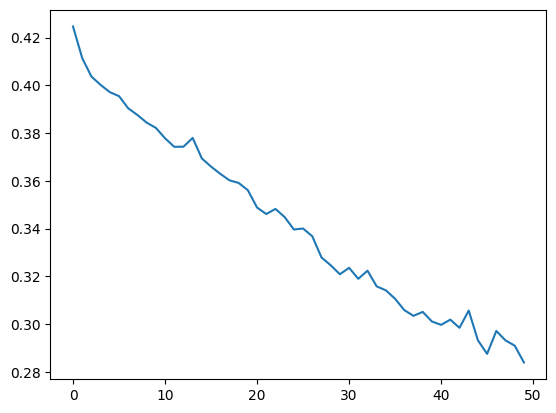

In [42]:
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.show()

## Generate notes

To use the model to generate notes, you will first need to provide a starting sequence of notes. The function below generates one note from a sequence of notes. 

For note pitch, it draws a sample from the softmax distribution of notes produced by the model, and does not simply pick the note with the highest probability.
Always picking the note with the highest probability would lead to repetitive sequences of notes being generated.

The `temperature` parameter can be used to control the randomness of notes generated. You can find more details on temperature in [Text generation with an RNN](https://www.tensorflow.org/text/tutorials/text_generation).

In [43]:
def predict_next_note(
    notes: np.ndarray, 
    keras_model: tf.keras.Model, 
    temperature: float = 1.0) -> tuple[int, float, float]:
  """Generates a note as a tuple of (pitch, step, duration), using a trained sequence model."""

  assert temperature > 0

  # Add batch dimension
  inputs = tf.expand_dims(notes, 0)

  predictions = model.predict(inputs)
  pitch_logits = predictions['pitch']
  step = predictions['step']
  duration = predictions['duration']
 
  pitch_logits /= temperature
  pitch = tf.random.categorical(pitch_logits, num_samples=1)
  pitch = tf.squeeze(pitch, axis=-1)
  duration = tf.squeeze(duration, axis=-1)
  step = tf.squeeze(step, axis=-1)

  # `step` and `duration` values should be non-negative
  step = tf.maximum(0, step)
  duration = tf.maximum(0, duration)

  return int(pitch), float(step), float(duration)

Now generate some notes. You can play around with temperature and the starting sequence in `next_notes` and see what happens.

In [44]:
temperature = 2.0
num_predictions = 120

sample_notes = np.stack([raw_notes[key] for key in key_order], axis=1)

# The initial sequence of notes; pitch is normalized similar to training
# sequences
input_notes = (
    sample_notes[:seq_length] / np.array([vocab_size, 1, 1]))

generated_notes = []
prev_start = 0
for _ in range(num_predictions):
  pitch, step, duration = predict_next_note(input_notes, model, temperature)
  start = prev_start + step
  end = start + duration
  input_note = (pitch, step, duration)
  generated_notes.append((*input_note, start, end))
  input_notes = np.delete(input_notes, 0, axis=0)
  input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
  prev_start = start

generated_notes = pd.DataFrame(
    generated_notes, columns=(*key_order, 'start', 'end'))

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 338ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


In [45]:
generated_notes.head(10)

pitch     step  duration    start       end
0     47  0.06948  0.443373  0.06948  0.512853
1    101  0.00000  0.935497  0.06948  1.004976
2    101  0.00000  0.872562  0.06948  0.942042
3    101  0.00000  0.839086  0.06948  0.908565
4    101  0.00000  0.829328  0.06948  0.898808
5    101  0.00000  0.823881  0.06948  0.893361
6    101  0.00000  0.821227  0.06948  0.890707
7    101  0.00000  0.812676  0.06948  0.882156
8    101  0.00000  0.815380  0.06948  0.884860
9    101  0.00000  0.817887  0.06948  0.887367

In [46]:
out_file = 'output.mid'
out_pm = notes_to_midi(
    generated_notes, out_file=out_file, instrument_name=instrument_name)
display_audio(out_pm)

fluidsynth: warning: SDL2 not initialized, SDL2 audio driver won't be usable
fluidsynth: error: Unknown integer parameter 'synth.sample-rate'


You can also download the audio file by adding the two lines below:

```
from google.colab import files
files.download(out_file)
```

Visualize the generated notes.

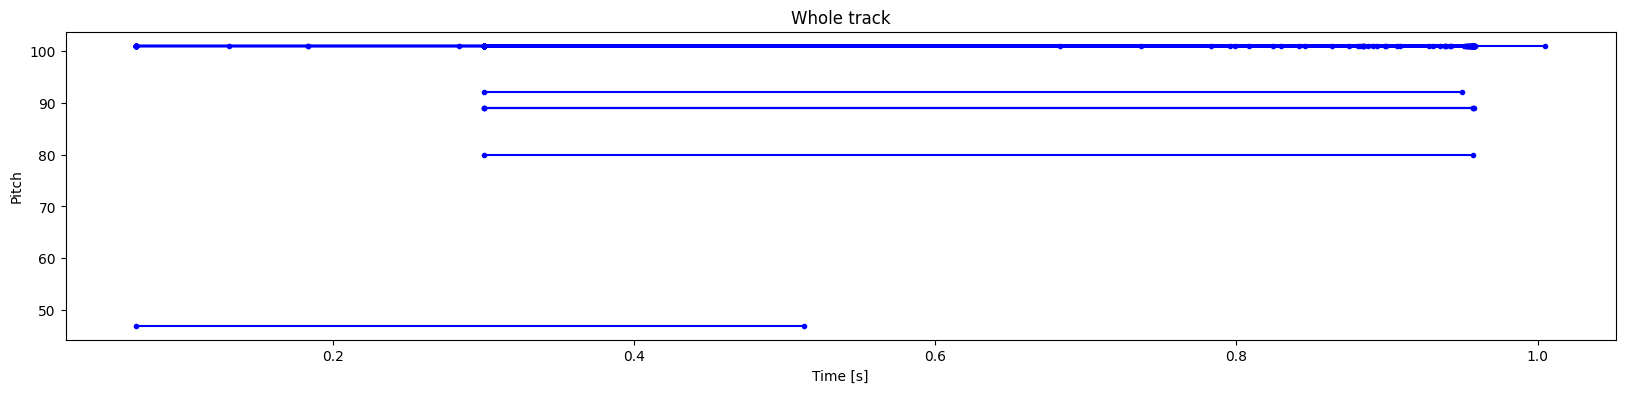

In [47]:
plot_piano_roll(generated_notes)

Check the distributions of `pitch`, `step` and `duration`.

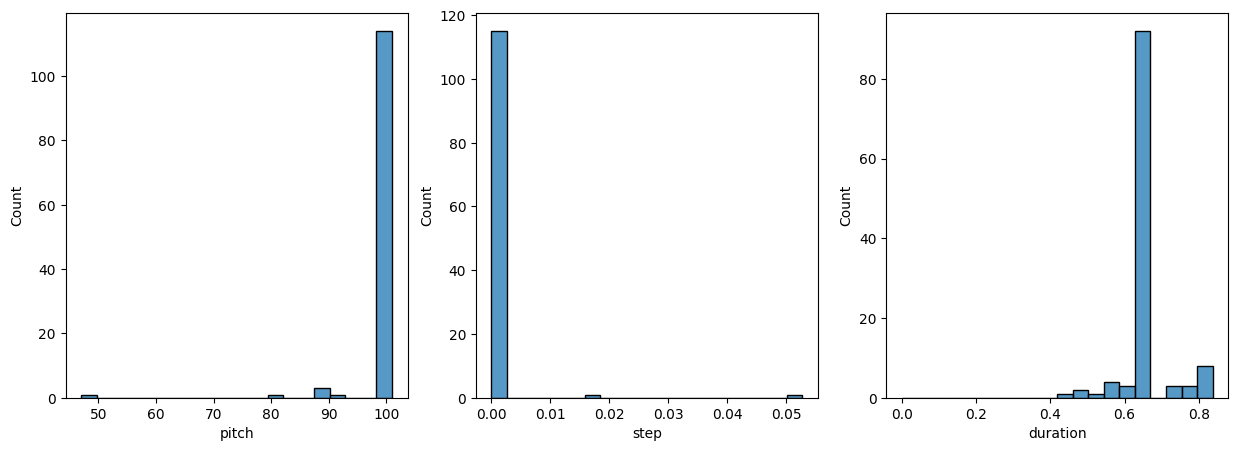

In [48]:
plot_distributions(generated_notes)

In the above plots, you will notice the change in distribution of the note variables.
Since there is a feedback loop between the model's outputs and inputs, the model tends to generate similar sequences of outputs to reduce the loss. 
This is particularly relevant for `step` and `duration`, which uses the MSE loss.
For `pitch`, you can increase the randomness by increasing the `temperature` in `predict_next_note`.


## Next steps

This tutorial demonstrated the mechanics of using an RNN to generate sequences of notes from a dataset of MIDI files. To learn more, you can visit the closely related [Text generation with an RNN](https://www.tensorflow.org/text/tutorials/text_generation) tutorial, which contains additional diagrams and explanations. 

One of the alternatives to using RNNs for music generation is using GANs. Rather than generating audio, a GAN-based approach can generate an entire sequence in parallel. The Magenta team has done impressive work on this approach with [GANSynth](https://magenta.tensorflow.org/gansynth). You can also find many wonderful music and art projects and open-source code on [Magenta project website](https://magenta.tensorflow.org/).